# Breast Cancer Classification 2/2

In [1]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt
from transferlearningmodel import Net
from DataLoader import Dataset
from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torchvision
import torchvision.transforms as transform

from sklearn.model_selection import train_test_split

import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import glob
import time

from PIL import Image
import os.path

import numpy as np
import matplotlib.pyplot as plt
from transferlearningmodel import Net
from DataLoader import Dataset
from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torchvision
import torchvision.transforms as transform
from torch.utils.data.sampler import SubsetRandomSampler

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [30]:
from torchvision.utils import make_grid
import time
import random
import seaborn as sns

In [3]:
from skimage import io
import pandas as pd
from torch.utils.data import Dataset, DataLoader,random_split

In [4]:
class Dataset(data.Dataset):
    """
    Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    def __init__(self, csv_file, transform = None):
        'Initialization'
        self.frame = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.frame)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        img_name = self.frame.iloc[index, 6]
        image = io.imread(img_name)
        
        PIL_image = Image.fromarray(image)
        
        label = self.frame.iloc[index, 3]
        # Load data and get label
        
        if self.transform:
            image = self.transform(PIL_image)
            
        return image, label

In [104]:
def train_model(train_loader, val_loader):

    # Define relevant testing parameters - the loss per iteration/epoch for training
    # and validation sets
    train_loss_per_iter = []
    train_epoch_loss = []
    val_loss_per_iter = []
    val_epoch_loss = []
    val_epoch_acc = []

    # Define the cnn model
    model = Net()

    # Define the cost function
    criterion = nn.BCELoss()

    # Define the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-5)

    best_val_loss = float('inf') 
    # hold off on variable for now (use this to check if the model loss is increasing x number of times)

    # Runs through one batch in the train_loader
    n_epoch = 10
    
    for epoch in range(n_epoch):
        print("epoch: ", epoch)
        # Define variables to accumulate the loss over the total epoch
        train_epoch_loss_var = 0
        val_epoch_loss_var = 0

        # This for loop is for the training set data
        # ********** Coordinate with the dataloader *************
        # this for loops is looking for a tuple(?) of images and labels
#         for imgs, (_, labels) in train_loader:
        for i, (imgs,labels) in enumerate(train_loader):
        
            print("minibatch: ", i, " out of ", len(train_loader))
            
            labels = labels.view(labels.size(0), 1)
            # Zeroes the gradients so they don't accumulate
            optimizer.zero_grad()

            # Pass one image forward through the cnn
            outputs = model(imgs)

            # Assigns the loss function to the outputs
            loss = criterion(outputs, labels.float())
#             clear(outputs)

            # Computes the gradients with respect to the cost function
            loss.backward()

            # Move in the direction of gradient descent
            optimizer.step()

            train_loss_per_iter.append(loss)
            train_epoch_loss_var += loss
            
            print("loss: ", loss)


        # This for loop is for the validation set data
        for  i, (imgs,labels) in enumerate(val_loader):
            
            labels = labels.view(labels.size(0), 1)
            # Pass one image forward through the cnn
            outputs = model(imgs)

            # Assigns the loss function to the outputs
            loss = criterion(outputs, labels.float())

            # Save loss per iteration
            val_loss_per_iter.append(loss)
            val_epoch_loss_var += loss

        # Save values of loss over total epoch
        train_epoch_loss.append(train_epoch_loss_var)
        val_epoch_loss.append(val_epoch_loss_var)
    
    torch.save(model, 'saved_model_5_lr.pt')
    
    return  train_loss_per_iter, train_epoch_loss, val_loss_per_iter, val_epoch_loss, val_epoch_acc

In [106]:
### Test test the transformation in the __getitem__ function

In [96]:
dataset = Dataset(csv_file = 'csv.csv', \
                 transform = transform.Compose([transform.Resize((100,100)), \
                                                transform.ToTensor(),\
                                               transform.Normalize((0.5, 0.5, 0.5), \
                                                                    (0.5, 0.5, 0.5))]))
dataset.__getitem__(0)

(tensor([[[0.7804, 0.8824, 0.8824,  ..., 0.7647, 0.6392, 0.6078],
          [0.6706, 0.8824, 0.9373,  ..., 0.7961, 0.6078, 0.7255],
          [0.7725, 0.8745, 0.9451,  ..., 0.5686, 0.8824, 0.9216],
          ...,
          [0.7255, 0.7647, 0.7647,  ..., 0.6314, 0.4039, 0.6941],
          [0.8196, 0.7333, 0.6549,  ..., 0.7255, 0.6000, 0.5059],
          [0.6235, 0.5922, 0.6863,  ..., 0.6784, 0.5686, 0.6863]],
 
         [[0.7569, 0.8745, 0.8902,  ..., 0.7490, 0.5608, 0.5137],
          [0.6078, 0.8824, 0.9608,  ..., 0.8039, 0.5922, 0.7255],
          [0.7255, 0.8902, 0.9529,  ..., 0.5216, 0.8980, 0.9686],
          ...,
          [0.6392, 0.7333, 0.7020,  ..., 0.4980, 0.2549, 0.6000],
          [0.7490, 0.6941, 0.5765,  ..., 0.6078, 0.4588, 0.3961],
          [0.5451, 0.5216, 0.6000,  ..., 0.5686, 0.4431, 0.6157]],
 
         [[0.7804, 0.8431, 0.8824,  ..., 0.7882, 0.6078, 0.5765],
          [0.6314, 0.8745, 0.9451,  ..., 0.8353, 0.6157, 0.7647],
          [0.7882, 0.9059, 0.9608,  ...,

In [14]:
batch_size = 2
def loadData():
 
    #Create the dataset
    dataset = Dataset(csv_file = 'csv.csv', \
                     transform = transform.Compose([transform.Resize((100,100)), \
                                                    transform.ToTensor(),\
                                                   transform.Normalize((0.5, 0.5, 0.5), \
                                                                        (0.5, 0.5, 0.5))]))
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    random.shuffle(indices)
    split1 = int(np.floor(.6 * dataset_size))
    split2 = int(np.floor(.8 * dataset_size))
    train_indices, val_indices, test_indices = indices[: split1], indices[split1: split2], indices[split2: ]
 
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(val_indices)
    test_sampler = SubsetRandomSampler(test_indices)
 
    trainloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                               sampler=train_sampler)
    valloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=valid_sampler)
    testloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                    sampler=test_sampler)
 
 
    return trainloader, valloader, testloader

In [15]:
train_loader, val_loader, test_loader = loadData()

In [21]:
def show_batch(images, labels):
 
        batch_size = len(images)
        im_size = images.size(0)
        grid_border_size = 3
     
        grid = make_grid(images)
        plt.imshow(grid.numpy().transpose())
        plt.title('Batch from dataloader')
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


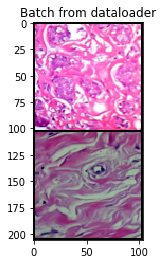

In [22]:
for imgs, (_, labels) in train_loader:
    show_batch(imgs, labels)
    break

In [102]:
#make sure they are in the correct format as tensor
for i, (images,labels) in enumerate(train_loader):
    print(images.double())
    print(labels)
    break

tensor([[[[ 0.4353,  0.4353,  0.4667,  ...,  0.5529,  0.5529,  0.5529],
          [ 0.4118,  0.4510,  0.4824,  ...,  0.5529,  0.5529,  0.5451],
          [ 0.3176,  0.4510,  0.4667,  ...,  0.5608,  0.5608,  0.5529],
          ...,
          [ 0.7647,  0.7176,  0.7490,  ...,  0.7255,  0.6314,  0.6941],
          [ 0.6471,  0.7098,  0.7569,  ...,  0.7804,  0.8275,  0.8039],
          [ 0.7490,  0.7255,  0.7490,  ...,  0.8510,  0.7725,  0.8353]],

         [[ 0.2706,  0.3412,  0.3725,  ...,  0.7725,  0.7647,  0.7647],
          [ 0.3098,  0.3725,  0.3961,  ...,  0.7725,  0.7725,  0.7647],
          [ 0.2392,  0.3412,  0.3490,  ...,  0.7882,  0.7882,  0.7804],
          ...,
          [ 0.6784,  0.6078,  0.6627,  ...,  0.6627,  0.6314,  0.6706],
          [ 0.4745,  0.5608,  0.6549,  ...,  0.7412,  0.7804,  0.7804],
          [ 0.6000,  0.6000,  0.6549,  ...,  0.8118,  0.7333,  0.8275]],

         [[ 0.4196,  0.4667,  0.4745,  ...,  0.7176,  0.7020,  0.6863],
          [ 0.4275,  0.4824,  

### Run the model with epoch = 20, learning rate = 1*e-3, model saved as 'saved_model.pt'

In [23]:
%%time
train_loss_per_iter10, train_epoch_loss10, val_loss_per_iter10, val_epoch_loss10, val_epoch_acc10 = \
train_model(train_loader, val_loader)

epoch:  0
minibatch:  0  out of  1165
loss:  tensor(0.7461, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1  out of  1165
loss:  tensor(0.6559, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  2  out of  1165
loss:  tensor(0.8187, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  3  out of  1165
loss:  tensor(0.6235, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  4  out of  1165
loss:  tensor(0.5498, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  5  out of  1165
loss:  tensor(1.0406, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  6  out of  1165
loss:  tensor(0.7041, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  7  out of  1165
loss:  tensor(1.2266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  8  out of  1165
loss:  tensor(0.9938, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  9  out of  1165
loss:  tensor(0.5196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  10  out of  1165
loss:  tensor(0.5244, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  11  out o

loss:  tensor(0.6231, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  93  out of  1165
loss:  tensor(0.8067, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  94  out of  1165
loss:  tensor(0.7849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  95  out of  1165
loss:  tensor(0.8197, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  96  out of  1165
loss:  tensor(0.5042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  97  out of  1165
loss:  tensor(0.4535, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  98  out of  1165
loss:  tensor(0.8525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  99  out of  1165
loss:  tensor(0.6795, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  100  out of  1165
loss:  tensor(0.9087, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  101  out of  1165
loss:  tensor(0.5886, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  102  out of  1165
loss:  tensor(0.5263, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  103  out of  1165
loss:  tensor(0.4

loss:  tensor(1.9587, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  185  out of  1165
loss:  tensor(0.7497, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  186  out of  1165
loss:  tensor(1.1262, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  187  out of  1165
loss:  tensor(0.3265, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  188  out of  1165
loss:  tensor(0.6712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  189  out of  1165
loss:  tensor(1.0132, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  190  out of  1165
loss:  tensor(1.2882, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  191  out of  1165
loss:  tensor(1.2383, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  192  out of  1165
loss:  tensor(1.1636, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  193  out of  1165
loss:  tensor(0.3748, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  194  out of  1165
loss:  tensor(0.5213, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  195  out of  1165
loss:  ten

loss:  tensor(0.4012, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  277  out of  1165
loss:  tensor(1.5563, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  278  out of  1165
loss:  tensor(0.2609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  279  out of  1165
loss:  tensor(1.0464, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  280  out of  1165
loss:  tensor(1.5053, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  281  out of  1165
loss:  tensor(0.3033, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  282  out of  1165
loss:  tensor(1.4106, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  283  out of  1165
loss:  tensor(0.5869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  284  out of  1165
loss:  tensor(0.5221, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  285  out of  1165
loss:  tensor(0.4922, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  286  out of  1165
loss:  tensor(0.2532, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  287  out of  1165
loss:  ten

loss:  tensor(0.2748, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  369  out of  1165
loss:  tensor(0.9791, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  370  out of  1165
loss:  tensor(0.9600, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  371  out of  1165
loss:  tensor(0.8322, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  372  out of  1165
loss:  tensor(0.4324, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  373  out of  1165
loss:  tensor(0.3575, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  374  out of  1165
loss:  tensor(0.3593, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  375  out of  1165
loss:  tensor(0.6114, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  376  out of  1165
loss:  tensor(1.2729, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  377  out of  1165
loss:  tensor(0.3727, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  378  out of  1165
loss:  tensor(0.3655, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  379  out of  1165
loss:  ten

loss:  tensor(0.4904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  461  out of  1165
loss:  tensor(0.3671, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  462  out of  1165
loss:  tensor(0.3707, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  463  out of  1165
loss:  tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  464  out of  1165
loss:  tensor(1.0530, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  465  out of  1165
loss:  tensor(0.5639, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  466  out of  1165
loss:  tensor(0.6015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  467  out of  1165
loss:  tensor(0.5729, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  468  out of  1165
loss:  tensor(0.4005, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  469  out of  1165
loss:  tensor(0.4473, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  470  out of  1165
loss:  tensor(0.3268, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  471  out of  1165
loss:  ten

loss:  tensor(0.5758, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  553  out of  1165
loss:  tensor(0.8027, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  554  out of  1165
loss:  tensor(0.6935, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  555  out of  1165
loss:  tensor(0.3814, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  556  out of  1165
loss:  tensor(0.5680, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  557  out of  1165
loss:  tensor(0.5179, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  558  out of  1165
loss:  tensor(0.5749, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  559  out of  1165
loss:  tensor(0.5210, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  560  out of  1165
loss:  tensor(0.6488, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  561  out of  1165
loss:  tensor(0.3975, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  562  out of  1165
loss:  tensor(0.7229, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  563  out of  1165
loss:  ten

loss:  tensor(0.5228, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  645  out of  1165
loss:  tensor(0.3642, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  646  out of  1165
loss:  tensor(0.3652, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  647  out of  1165
loss:  tensor(0.3792, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  648  out of  1165
loss:  tensor(0.3447, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  649  out of  1165
loss:  tensor(0.4155, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  650  out of  1165
loss:  tensor(1.2189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  651  out of  1165
loss:  tensor(0.3323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  652  out of  1165
loss:  tensor(0.4037, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  653  out of  1165
loss:  tensor(0.8505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  654  out of  1165
loss:  tensor(0.9625, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  655  out of  1165
loss:  ten

loss:  tensor(0.6719, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  737  out of  1165
loss:  tensor(0.2014, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  738  out of  1165
loss:  tensor(0.7683, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  739  out of  1165
loss:  tensor(0.2216, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  740  out of  1165
loss:  tensor(1.5808, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  741  out of  1165
loss:  tensor(0.4895, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  742  out of  1165
loss:  tensor(0.7176, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  743  out of  1165
loss:  tensor(1.3077, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  744  out of  1165
loss:  tensor(0.8369, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  745  out of  1165
loss:  tensor(0.7270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  746  out of  1165
loss:  tensor(0.2678, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  747  out of  1165
loss:  ten

loss:  tensor(0.9713, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  829  out of  1165
loss:  tensor(1.1456, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  830  out of  1165
loss:  tensor(0.3797, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  831  out of  1165
loss:  tensor(0.4147, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  832  out of  1165
loss:  tensor(0.8981, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  833  out of  1165
loss:  tensor(0.7661, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  834  out of  1165
loss:  tensor(0.4379, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  835  out of  1165
loss:  tensor(0.9055, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  836  out of  1165
loss:  tensor(0.6950, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  837  out of  1165
loss:  tensor(0.3149, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  838  out of  1165
loss:  tensor(1.6146, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  839  out of  1165
loss:  ten

loss:  tensor(0.8765, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  921  out of  1165
loss:  tensor(0.9613, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  922  out of  1165
loss:  tensor(3.1338, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  923  out of  1165
loss:  tensor(0.6615, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  924  out of  1165
loss:  tensor(0.6756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  925  out of  1165
loss:  tensor(0.8778, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  926  out of  1165
loss:  tensor(0.4430, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  927  out of  1165
loss:  tensor(0.4090, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  928  out of  1165
loss:  tensor(0.2739, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  929  out of  1165
loss:  tensor(0.5414, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  930  out of  1165
loss:  tensor(0.6505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  931  out of  1165
loss:  ten

loss:  tensor(0.4367, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1012  out of  1165
loss:  tensor(0.6990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1013  out of  1165
loss:  tensor(0.1793, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1014  out of  1165
loss:  tensor(0.4477, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1015  out of  1165
loss:  tensor(0.4982, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1016  out of  1165
loss:  tensor(0.4284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1017  out of  1165
loss:  tensor(0.2761, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1018  out of  1165
loss:  tensor(1.5989, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1019  out of  1165
loss:  tensor(0.2432, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1020  out of  1165
loss:  tensor(0.6115, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1021  out of  1165
loss:  tensor(1.5312, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1022  out of  1165

loss:  tensor(0.7748, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1103  out of  1165
loss:  tensor(1.4894, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1104  out of  1165
loss:  tensor(1.3592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1105  out of  1165
loss:  tensor(1.1566, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1106  out of  1165
loss:  tensor(0.6966, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1107  out of  1165
loss:  tensor(1.3342, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1108  out of  1165
loss:  tensor(1.1134, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1109  out of  1165
loss:  tensor(0.5091, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1110  out of  1165
loss:  tensor(0.3242, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1111  out of  1165
loss:  tensor(0.7193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1112  out of  1165
loss:  tensor(1.2611, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1113  out of  1165

loss:  tensor(0.6489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  29  out of  1165
loss:  tensor(0.5627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  30  out of  1165
loss:  tensor(0.1998, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  31  out of  1165
loss:  tensor(0.9588, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  32  out of  1165
loss:  tensor(1.6712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  33  out of  1165
loss:  tensor(2.4833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  34  out of  1165
loss:  tensor(0.1291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  35  out of  1165
loss:  tensor(0.1559, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  36  out of  1165
loss:  tensor(0.2163, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  37  out of  1165
loss:  tensor(0.5387, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  38  out of  1165
loss:  tensor(0.2646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  39  out of  1165
loss:  tensor(0.3867,

loss:  tensor(1.3938, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  121  out of  1165
loss:  tensor(0.4390, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  122  out of  1165
loss:  tensor(0.3850, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  123  out of  1165
loss:  tensor(0.1612, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  124  out of  1165
loss:  tensor(0.2699, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  125  out of  1165
loss:  tensor(0.8617, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  126  out of  1165
loss:  tensor(0.6900, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  127  out of  1165
loss:  tensor(0.2244, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  128  out of  1165
loss:  tensor(0.2383, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  129  out of  1165
loss:  tensor(0.3238, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  130  out of  1165
loss:  tensor(0.4831, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  131  out of  1165
loss:  ten

loss:  tensor(0.4976, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  213  out of  1165
loss:  tensor(0.4721, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  214  out of  1165
loss:  tensor(0.4507, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  215  out of  1165
loss:  tensor(1.5172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  216  out of  1165
loss:  tensor(1.4583, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  217  out of  1165
loss:  tensor(1.6403, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  218  out of  1165
loss:  tensor(1.5227, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  219  out of  1165
loss:  tensor(0.9740, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  220  out of  1165
loss:  tensor(0.0940, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  221  out of  1165
loss:  tensor(0.4019, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  222  out of  1165
loss:  tensor(0.4929, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  223  out of  1165
loss:  ten

loss:  tensor(0.1882, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  305  out of  1165
loss:  tensor(0.7463, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  306  out of  1165
loss:  tensor(0.2662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  307  out of  1165
loss:  tensor(0.4279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  308  out of  1165
loss:  tensor(0.6384, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  309  out of  1165
loss:  tensor(0.3457, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  310  out of  1165
loss:  tensor(0.5508, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  311  out of  1165
loss:  tensor(0.2838, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  312  out of  1165
loss:  tensor(0.4138, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  313  out of  1165
loss:  tensor(0.4914, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  314  out of  1165
loss:  tensor(1.1272, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  315  out of  1165
loss:  ten

loss:  tensor(1.0640, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  397  out of  1165
loss:  tensor(0.6478, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  398  out of  1165
loss:  tensor(0.5412, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  399  out of  1165
loss:  tensor(0.4103, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  400  out of  1165
loss:  tensor(0.2609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  401  out of  1165
loss:  tensor(0.5649, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  402  out of  1165
loss:  tensor(0.7094, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  403  out of  1165
loss:  tensor(2.4624, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  404  out of  1165
loss:  tensor(1.5209, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  405  out of  1165
loss:  tensor(0.6208, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  406  out of  1165
loss:  tensor(0.1415, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  407  out of  1165
loss:  ten

loss:  tensor(0.2447, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  489  out of  1165
loss:  tensor(1.6689, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  490  out of  1165
loss:  tensor(1.9224, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  491  out of  1165
loss:  tensor(0.3542, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  492  out of  1165
loss:  tensor(0.3149, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  493  out of  1165
loss:  tensor(1.5252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  494  out of  1165
loss:  tensor(0.7610, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  495  out of  1165
loss:  tensor(0.6835, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  496  out of  1165
loss:  tensor(0.4376, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  497  out of  1165
loss:  tensor(0.8384, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  498  out of  1165
loss:  tensor(0.6014, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  499  out of  1165
loss:  ten

loss:  tensor(0.4866, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  581  out of  1165
loss:  tensor(0.5115, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  582  out of  1165
loss:  tensor(0.8264, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  583  out of  1165
loss:  tensor(0.5550, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  584  out of  1165
loss:  tensor(0.6348, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  585  out of  1165
loss:  tensor(0.4855, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  586  out of  1165
loss:  tensor(0.6201, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  587  out of  1165
loss:  tensor(0.3538, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  588  out of  1165
loss:  tensor(1.7782, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  589  out of  1165
loss:  tensor(0.1693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  590  out of  1165
loss:  tensor(1.5153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  591  out of  1165
loss:  ten

loss:  tensor(0.2852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  673  out of  1165
loss:  tensor(0.9873, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  674  out of  1165
loss:  tensor(0.4166, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  675  out of  1165
loss:  tensor(0.1713, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  676  out of  1165
loss:  tensor(0.3034, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  677  out of  1165
loss:  tensor(0.2724, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  678  out of  1165
loss:  tensor(1.9401, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  679  out of  1165
loss:  tensor(1.8291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  680  out of  1165
loss:  tensor(0.2525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  681  out of  1165
loss:  tensor(1.7441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  682  out of  1165
loss:  tensor(1.6968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  683  out of  1165
loss:  ten

loss:  tensor(0.8341, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  765  out of  1165
loss:  tensor(0.7682, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  766  out of  1165
loss:  tensor(0.4407, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  767  out of  1165
loss:  tensor(0.7510, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  768  out of  1165
loss:  tensor(0.5453, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  769  out of  1165
loss:  tensor(0.6875, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  770  out of  1165
loss:  tensor(1.2778, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  771  out of  1165
loss:  tensor(0.2438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  772  out of  1165
loss:  tensor(1.1627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  773  out of  1165
loss:  tensor(0.5463, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  774  out of  1165
loss:  tensor(0.1789, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  775  out of  1165
loss:  ten

loss:  tensor(0.1185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  857  out of  1165
loss:  tensor(0.4077, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  858  out of  1165
loss:  tensor(1.1227, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  859  out of  1165
loss:  tensor(0.4640, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  860  out of  1165
loss:  tensor(0.3195, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  861  out of  1165
loss:  tensor(1.2439, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  862  out of  1165
loss:  tensor(1.0638, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  863  out of  1165
loss:  tensor(0.7429, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  864  out of  1165
loss:  tensor(0.1006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  865  out of  1165
loss:  tensor(0.8135, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  866  out of  1165
loss:  tensor(0.2422, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  867  out of  1165
loss:  ten

loss:  tensor(0.1945, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  949  out of  1165
loss:  tensor(0.8609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  950  out of  1165
loss:  tensor(0.4103, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  951  out of  1165
loss:  tensor(0.4844, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  952  out of  1165
loss:  tensor(1.1349, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  953  out of  1165
loss:  tensor(2.0205, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  954  out of  1165
loss:  tensor(1.6985, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  955  out of  1165
loss:  tensor(0.8003, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  956  out of  1165
loss:  tensor(0.3807, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  957  out of  1165
loss:  tensor(0.1943, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  958  out of  1165
loss:  tensor(1.0191, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  959  out of  1165
loss:  ten

loss:  tensor(0.5715, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1040  out of  1165
loss:  tensor(0.4811, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1041  out of  1165
loss:  tensor(0.4666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1042  out of  1165
loss:  tensor(0.2167, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1043  out of  1165
loss:  tensor(0.4482, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1044  out of  1165
loss:  tensor(0.2605, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1045  out of  1165
loss:  tensor(0.2128, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1046  out of  1165
loss:  tensor(0.2583, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1047  out of  1165
loss:  tensor(0.1664, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1048  out of  1165
loss:  tensor(1.0030, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1049  out of  1165
loss:  tensor(0.4612, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1050  out of  1165

loss:  tensor(1.1421, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1131  out of  1165
loss:  tensor(0.7949, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1132  out of  1165
loss:  tensor(0.1948, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1133  out of  1165
loss:  tensor(0.1359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1134  out of  1165
loss:  tensor(0.1055, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1135  out of  1165
loss:  tensor(0.8471, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1136  out of  1165
loss:  tensor(0.9247, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1137  out of  1165
loss:  tensor(0.7665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1138  out of  1165
loss:  tensor(0.7037, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1139  out of  1165
loss:  tensor(0.2545, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1140  out of  1165
loss:  tensor(0.4777, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1141  out of  1165

loss:  tensor(0.3601, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  58  out of  1165
loss:  tensor(0.9132, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  59  out of  1165
loss:  tensor(0.5260, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  60  out of  1165
loss:  tensor(0.2647, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  61  out of  1165
loss:  tensor(1.4539, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  62  out of  1165
loss:  tensor(0.2869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  63  out of  1165
loss:  tensor(0.3515, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  64  out of  1165
loss:  tensor(0.3424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  65  out of  1165
loss:  tensor(0.2953, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  66  out of  1165
loss:  tensor(0.3734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  67  out of  1165
loss:  tensor(0.2843, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  68  out of  1165
loss:  tensor(1.3809,

loss:  tensor(0.3015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  150  out of  1165
loss:  tensor(0.4576, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  151  out of  1165
loss:  tensor(0.3394, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  152  out of  1165
loss:  tensor(0.3962, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  153  out of  1165
loss:  tensor(1.6924, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  154  out of  1165
loss:  tensor(1.3453, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  155  out of  1165
loss:  tensor(0.8935, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  156  out of  1165
loss:  tensor(0.2372, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  157  out of  1165
loss:  tensor(0.5645, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  158  out of  1165
loss:  tensor(1.3449, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  159  out of  1165
loss:  tensor(0.8131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  160  out of  1165
loss:  ten

loss:  tensor(0.4343, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  242  out of  1165
loss:  tensor(0.4605, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  243  out of  1165
loss:  tensor(0.4677, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  244  out of  1165
loss:  tensor(0.7013, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  245  out of  1165
loss:  tensor(1.0781, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  246  out of  1165
loss:  tensor(0.2795, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  247  out of  1165
loss:  tensor(0.3098, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  248  out of  1165
loss:  tensor(0.1196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  249  out of  1165
loss:  tensor(0.4000, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  250  out of  1165
loss:  tensor(1.5769, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  251  out of  1165
loss:  tensor(0.2063, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  252  out of  1165
loss:  ten

loss:  tensor(0.6631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  334  out of  1165
loss:  tensor(0.3094, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  335  out of  1165
loss:  tensor(0.3722, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  336  out of  1165
loss:  tensor(0.3213, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  337  out of  1165
loss:  tensor(0.3979, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  338  out of  1165
loss:  tensor(0.3220, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  339  out of  1165
loss:  tensor(0.3503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  340  out of  1165
loss:  tensor(0.1428, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  341  out of  1165
loss:  tensor(0.3117, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  342  out of  1165
loss:  tensor(0.9463, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  343  out of  1165
loss:  tensor(0.6304, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  344  out of  1165
loss:  ten

loss:  tensor(0.3436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  426  out of  1165
loss:  tensor(0.1623, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  427  out of  1165
loss:  tensor(0.3424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  428  out of  1165
loss:  tensor(0.1575, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  429  out of  1165
loss:  tensor(2.4456, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  430  out of  1165
loss:  tensor(1.0938, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  431  out of  1165
loss:  tensor(0.8625, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  432  out of  1165
loss:  tensor(0.7020, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  433  out of  1165
loss:  tensor(0.2445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  434  out of  1165
loss:  tensor(0.1185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  435  out of  1165
loss:  tensor(0.4174, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  436  out of  1165
loss:  ten

loss:  tensor(1.3142, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  518  out of  1165
loss:  tensor(1.1236, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  519  out of  1165
loss:  tensor(0.1730, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  520  out of  1165
loss:  tensor(0.8339, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  521  out of  1165
loss:  tensor(0.6449, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  522  out of  1165
loss:  tensor(0.6290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  523  out of  1165
loss:  tensor(0.7078, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  524  out of  1165
loss:  tensor(0.2333, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  525  out of  1165
loss:  tensor(0.1691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  526  out of  1165
loss:  tensor(0.8233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  527  out of  1165
loss:  tensor(1.6033, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  528  out of  1165
loss:  ten

loss:  tensor(0.9817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  610  out of  1165
loss:  tensor(1.0487, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  611  out of  1165
loss:  tensor(0.2448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  612  out of  1165
loss:  tensor(0.8849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  613  out of  1165
loss:  tensor(0.8674, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  614  out of  1165
loss:  tensor(1.1396, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  615  out of  1165
loss:  tensor(0.7327, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  616  out of  1165
loss:  tensor(0.3237, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  617  out of  1165
loss:  tensor(1.1648, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  618  out of  1165
loss:  tensor(0.3148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  619  out of  1165
loss:  tensor(1.3824, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  620  out of  1165
loss:  ten

loss:  tensor(0.8505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  702  out of  1165
loss:  tensor(0.0435, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  703  out of  1165
loss:  tensor(0.3470, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  704  out of  1165
loss:  tensor(0.1682, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  705  out of  1165
loss:  tensor(0.8225, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  706  out of  1165
loss:  tensor(0.3982, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  707  out of  1165
loss:  tensor(0.3363, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  708  out of  1165
loss:  tensor(0.3389, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  709  out of  1165
loss:  tensor(0.4923, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  710  out of  1165
loss:  tensor(0.4414, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  711  out of  1165
loss:  tensor(0.1838, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  712  out of  1165
loss:  ten

loss:  tensor(0.8090, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  794  out of  1165
loss:  tensor(0.3542, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  795  out of  1165
loss:  tensor(0.4145, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  796  out of  1165
loss:  tensor(0.2977, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  797  out of  1165
loss:  tensor(0.9458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  798  out of  1165
loss:  tensor(1.0528, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  799  out of  1165
loss:  tensor(0.6444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  800  out of  1165
loss:  tensor(0.5285, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  801  out of  1165
loss:  tensor(0.5209, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  802  out of  1165
loss:  tensor(1.0100, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  803  out of  1165
loss:  tensor(1.0411, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  804  out of  1165
loss:  ten

loss:  tensor(0.8831, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  886  out of  1165
loss:  tensor(0.3171, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  887  out of  1165
loss:  tensor(0.8075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  888  out of  1165
loss:  tensor(0.2205, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  889  out of  1165
loss:  tensor(0.3557, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  890  out of  1165
loss:  tensor(0.3673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  891  out of  1165
loss:  tensor(0.1961, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  892  out of  1165
loss:  tensor(0.2425, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  893  out of  1165
loss:  tensor(0.3144, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  894  out of  1165
loss:  tensor(0.7036, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  895  out of  1165
loss:  tensor(0.2691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  896  out of  1165
loss:  ten

loss:  tensor(0.6284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  978  out of  1165
loss:  tensor(0.5415, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  979  out of  1165
loss:  tensor(0.6098, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  980  out of  1165
loss:  tensor(0.3509, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  981  out of  1165
loss:  tensor(0.1291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  982  out of  1165
loss:  tensor(0.4029, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  983  out of  1165
loss:  tensor(1.3389, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  984  out of  1165
loss:  tensor(1.2326, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  985  out of  1165
loss:  tensor(0.9581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  986  out of  1165
loss:  tensor(1.6171, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  987  out of  1165
loss:  tensor(0.8819, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  988  out of  1165
loss:  ten

loss:  tensor(0.9072, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1069  out of  1165
loss:  tensor(0.2706, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1070  out of  1165
loss:  tensor(0.3720, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1071  out of  1165
loss:  tensor(0.7403, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1072  out of  1165
loss:  tensor(0.5087, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1073  out of  1165
loss:  tensor(0.2201, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1074  out of  1165
loss:  tensor(0.7423, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1075  out of  1165
loss:  tensor(0.0745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1076  out of  1165
loss:  tensor(0.3853, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1077  out of  1165
loss:  tensor(0.6191, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1078  out of  1165
loss:  tensor(0.3660, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1079  out of  1165

loss:  tensor(0.1952, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1160  out of  1165
loss:  tensor(0.1767, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1161  out of  1165
loss:  tensor(1.9759, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1162  out of  1165
loss:  tensor(0.3003, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1163  out of  1165
loss:  tensor(0.2515, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1164  out of  1165
loss:  tensor(0.3047, grad_fn=<BinaryCrossEntropyBackward>)
epoch:  3
minibatch:  0  out of  1165
loss:  tensor(0.4279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1  out of  1165
loss:  tensor(1.6781, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  2  out of  1165
loss:  tensor(0.3771, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  3  out of  1165
loss:  tensor(0.4018, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  4  out of  1165
loss:  tensor(1.2564, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  5  out of  1165
loss:  

loss:  tensor(1.2442, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  87  out of  1165
loss:  tensor(0.8153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  88  out of  1165
loss:  tensor(0.4814, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  89  out of  1165
loss:  tensor(0.3204, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  90  out of  1165
loss:  tensor(0.1063, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  91  out of  1165
loss:  tensor(0.4048, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  92  out of  1165
loss:  tensor(0.8283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  93  out of  1165
loss:  tensor(0.4101, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  94  out of  1165
loss:  tensor(0.3394, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  95  out of  1165
loss:  tensor(0.4078, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  96  out of  1165
loss:  tensor(0.7099, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  97  out of  1165
loss:  tensor(0.6004,

loss:  tensor(1.8844, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  179  out of  1165
loss:  tensor(0.3820, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  180  out of  1165
loss:  tensor(1.6256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  181  out of  1165
loss:  tensor(0.5403, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  182  out of  1165
loss:  tensor(1.0082, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  183  out of  1165
loss:  tensor(0.1150, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  184  out of  1165
loss:  tensor(0.6833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  185  out of  1165
loss:  tensor(0.1592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  186  out of  1165
loss:  tensor(0.2795, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  187  out of  1165
loss:  tensor(0.7517, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  188  out of  1165
loss:  tensor(0.2196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  189  out of  1165
loss:  ten

loss:  tensor(0.1718, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  271  out of  1165
loss:  tensor(0.5782, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  272  out of  1165
loss:  tensor(0.4631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  273  out of  1165
loss:  tensor(0.1844, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  274  out of  1165
loss:  tensor(0.4753, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  275  out of  1165
loss:  tensor(0.3042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  276  out of  1165
loss:  tensor(0.3636, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  277  out of  1165
loss:  tensor(0.2355, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  278  out of  1165
loss:  tensor(0.2563, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  279  out of  1165
loss:  tensor(0.2509, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  280  out of  1165
loss:  tensor(0.2393, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  281  out of  1165
loss:  ten

loss:  tensor(1.0131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  363  out of  1165
loss:  tensor(0.4303, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  364  out of  1165
loss:  tensor(1.2986, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  365  out of  1165
loss:  tensor(0.5529, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  366  out of  1165
loss:  tensor(1.0138, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  367  out of  1165
loss:  tensor(0.9647, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  368  out of  1165
loss:  tensor(0.8105, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  369  out of  1165
loss:  tensor(0.0765, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  370  out of  1165
loss:  tensor(0.8183, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  371  out of  1165
loss:  tensor(0.7124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  372  out of  1165
loss:  tensor(0.5771, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  373  out of  1165
loss:  ten

loss:  tensor(0.3445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  455  out of  1165
loss:  tensor(0.8640, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  456  out of  1165
loss:  tensor(0.2376, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  457  out of  1165
loss:  tensor(0.1355, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  458  out of  1165
loss:  tensor(0.0993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  459  out of  1165
loss:  tensor(0.4522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  460  out of  1165
loss:  tensor(1.2545, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  461  out of  1165
loss:  tensor(1.1999, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  462  out of  1165
loss:  tensor(0.0521, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  463  out of  1165
loss:  tensor(0.1513, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  464  out of  1165
loss:  tensor(0.2024, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  465  out of  1165
loss:  ten

loss:  tensor(0.9149, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  547  out of  1165
loss:  tensor(0.9600, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  548  out of  1165
loss:  tensor(0.6586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  549  out of  1165
loss:  tensor(0.2503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  550  out of  1165
loss:  tensor(0.2671, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  551  out of  1165
loss:  tensor(1.1386, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  552  out of  1165
loss:  tensor(0.7277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  553  out of  1165
loss:  tensor(0.2252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  554  out of  1165
loss:  tensor(0.8543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  555  out of  1165
loss:  tensor(0.1485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  556  out of  1165
loss:  tensor(0.3174, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  557  out of  1165
loss:  ten

loss:  tensor(0.1287, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  639  out of  1165
loss:  tensor(0.9887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  640  out of  1165
loss:  tensor(0.1256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  641  out of  1165
loss:  tensor(0.8258, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  642  out of  1165
loss:  tensor(0.5745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  643  out of  1165
loss:  tensor(0.0570, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  644  out of  1165
loss:  tensor(1.8290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  645  out of  1165
loss:  tensor(0.0586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  646  out of  1165
loss:  tensor(0.8605, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  647  out of  1165
loss:  tensor(0.3292, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  648  out of  1165
loss:  tensor(1.8133, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  649  out of  1165
loss:  ten

loss:  tensor(0.5765, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  731  out of  1165
loss:  tensor(0.5867, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  732  out of  1165
loss:  tensor(0.9768, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  733  out of  1165
loss:  tensor(0.7726, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  734  out of  1165
loss:  tensor(0.6172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  735  out of  1165
loss:  tensor(0.1936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  736  out of  1165
loss:  tensor(0.2948, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  737  out of  1165
loss:  tensor(0.0340, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  738  out of  1165
loss:  tensor(1.4129, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  739  out of  1165
loss:  tensor(0.8679, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  740  out of  1165
loss:  tensor(0.1085, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  741  out of  1165
loss:  ten

loss:  tensor(0.1290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  823  out of  1165
loss:  tensor(0.9587, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  824  out of  1165
loss:  tensor(0.1346, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  825  out of  1165
loss:  tensor(0.7784, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  826  out of  1165
loss:  tensor(0.4470, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  827  out of  1165
loss:  tensor(0.1801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  828  out of  1165
loss:  tensor(0.3559, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  829  out of  1165
loss:  tensor(0.1486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  830  out of  1165
loss:  tensor(0.6993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  831  out of  1165
loss:  tensor(0.5264, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  832  out of  1165
loss:  tensor(0.4067, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  833  out of  1165
loss:  ten

loss:  tensor(0.4124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  915  out of  1165
loss:  tensor(1.6484, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  916  out of  1165
loss:  tensor(0.4015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  917  out of  1165
loss:  tensor(1.0530, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  918  out of  1165
loss:  tensor(0.0912, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  919  out of  1165
loss:  tensor(0.3344, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  920  out of  1165
loss:  tensor(0.2811, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  921  out of  1165
loss:  tensor(0.7565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  922  out of  1165
loss:  tensor(0.7698, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  923  out of  1165
loss:  tensor(0.7378, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  924  out of  1165
loss:  tensor(0.1224, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  925  out of  1165
loss:  ten

loss:  tensor(0.0963, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1006  out of  1165
loss:  tensor(0.4089, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1007  out of  1165
loss:  tensor(1.7538, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1008  out of  1165
loss:  tensor(1.1733, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1009  out of  1165
loss:  tensor(0.2291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1010  out of  1165
loss:  tensor(0.7324, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1011  out of  1165
loss:  tensor(0.7288, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1012  out of  1165
loss:  tensor(0.6770, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1013  out of  1165
loss:  tensor(0.7081, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1014  out of  1165
loss:  tensor(0.3004, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1015  out of  1165
loss:  tensor(0.2277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1016  out of  1165

loss:  tensor(0.6439, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1097  out of  1165
loss:  tensor(0.0631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1098  out of  1165
loss:  tensor(0.0947, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1099  out of  1165
loss:  tensor(0.6248, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1100  out of  1165
loss:  tensor(0.1114, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1101  out of  1165
loss:  tensor(0.7304, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1102  out of  1165
loss:  tensor(0.1494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1103  out of  1165
loss:  tensor(1.0322, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1104  out of  1165
loss:  tensor(0.1603, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1105  out of  1165
loss:  tensor(2.8578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1106  out of  1165
loss:  tensor(0.0807, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1107  out of  1165

loss:  tensor(0.2160, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  23  out of  1165
loss:  tensor(0.0789, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  24  out of  1165
loss:  tensor(0.5015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  25  out of  1165
loss:  tensor(0.1538, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  26  out of  1165
loss:  tensor(1.0616, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  27  out of  1165
loss:  tensor(0.2684, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  28  out of  1165
loss:  tensor(0.3399, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  29  out of  1165
loss:  tensor(0.1854, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  30  out of  1165
loss:  tensor(0.0541, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  31  out of  1165
loss:  tensor(0.5716, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  32  out of  1165
loss:  tensor(0.2045, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  33  out of  1165
loss:  tensor(0.1528,

loss:  tensor(0.5170, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  115  out of  1165
loss:  tensor(0.2558, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  116  out of  1165
loss:  tensor(0.5756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  117  out of  1165
loss:  tensor(0.4101, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  118  out of  1165
loss:  tensor(1.3730, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  119  out of  1165
loss:  tensor(0.3572, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  120  out of  1165
loss:  tensor(0.3590, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  121  out of  1165
loss:  tensor(0.2808, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  122  out of  1165
loss:  tensor(0.2869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  123  out of  1165
loss:  tensor(0.2536, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  124  out of  1165
loss:  tensor(0.4910, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  125  out of  1165
loss:  ten

loss:  tensor(0.2163, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  207  out of  1165
loss:  tensor(0.4977, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  208  out of  1165
loss:  tensor(0.7274, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  209  out of  1165
loss:  tensor(1.0517, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  210  out of  1165
loss:  tensor(0.1421, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  211  out of  1165
loss:  tensor(0.9984, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  212  out of  1165
loss:  tensor(0.9994, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  213  out of  1165
loss:  tensor(0.8852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  214  out of  1165
loss:  tensor(0.1648, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  215  out of  1165
loss:  tensor(0.6581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  216  out of  1165
loss:  tensor(0.1575, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  217  out of  1165
loss:  ten

loss:  tensor(1.3708, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  299  out of  1165
loss:  tensor(1.4516, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  300  out of  1165
loss:  tensor(0.6301, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  301  out of  1165
loss:  tensor(0.7545, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  302  out of  1165
loss:  tensor(0.3068, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  303  out of  1165
loss:  tensor(0.6819, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  304  out of  1165
loss:  tensor(0.1260, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  305  out of  1165
loss:  tensor(1.2144, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  306  out of  1165
loss:  tensor(1.3143, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  307  out of  1165
loss:  tensor(0.8734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  308  out of  1165
loss:  tensor(0.4603, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  309  out of  1165
loss:  ten

loss:  tensor(1.0505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  391  out of  1165
loss:  tensor(0.8860, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  392  out of  1165
loss:  tensor(0.6157, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  393  out of  1165
loss:  tensor(0.7158, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  394  out of  1165
loss:  tensor(0.1665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  395  out of  1165
loss:  tensor(0.2251, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  396  out of  1165
loss:  tensor(0.9188, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  397  out of  1165
loss:  tensor(0.1756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  398  out of  1165
loss:  tensor(0.6413, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  399  out of  1165
loss:  tensor(0.9072, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  400  out of  1165
loss:  tensor(0.5165, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  401  out of  1165
loss:  ten

loss:  tensor(0.4021, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  483  out of  1165
loss:  tensor(0.6077, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  484  out of  1165
loss:  tensor(2.2574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  485  out of  1165
loss:  tensor(0.4105, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  486  out of  1165
loss:  tensor(0.7818, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  487  out of  1165
loss:  tensor(0.5752, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  488  out of  1165
loss:  tensor(0.7689, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  489  out of  1165
loss:  tensor(0.4341, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  490  out of  1165
loss:  tensor(0.0461, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  491  out of  1165
loss:  tensor(0.8937, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  492  out of  1165
loss:  tensor(0.6560, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  493  out of  1165
loss:  ten

loss:  tensor(0.3374, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  575  out of  1165
loss:  tensor(0.9308, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  576  out of  1165
loss:  tensor(0.0543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  577  out of  1165
loss:  tensor(0.8887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  578  out of  1165
loss:  tensor(0.2439, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  579  out of  1165
loss:  tensor(0.8339, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  580  out of  1165
loss:  tensor(0.7448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  581  out of  1165
loss:  tensor(0.7026, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  582  out of  1165
loss:  tensor(0.6219, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  583  out of  1165
loss:  tensor(0.6158, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  584  out of  1165
loss:  tensor(0.4189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  585  out of  1165
loss:  ten

loss:  tensor(0.3127, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  667  out of  1165
loss:  tensor(0.6996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  668  out of  1165
loss:  tensor(0.1321, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  669  out of  1165
loss:  tensor(2.1053, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  670  out of  1165
loss:  tensor(0.1284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  671  out of  1165
loss:  tensor(0.1412, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  672  out of  1165
loss:  tensor(0.7252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  673  out of  1165
loss:  tensor(0.3915, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  674  out of  1165
loss:  tensor(1.8831, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  675  out of  1165
loss:  tensor(0.4886, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  676  out of  1165
loss:  tensor(0.3153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  677  out of  1165
loss:  ten

loss:  tensor(0.9061, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  759  out of  1165
loss:  tensor(0.6998, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  760  out of  1165
loss:  tensor(0.5833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  761  out of  1165
loss:  tensor(0.0811, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  762  out of  1165
loss:  tensor(0.4020, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  763  out of  1165
loss:  tensor(0.4298, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  764  out of  1165
loss:  tensor(0.0957, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  765  out of  1165
loss:  tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  766  out of  1165
loss:  tensor(0.3852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  767  out of  1165
loss:  tensor(0.3198, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  768  out of  1165
loss:  tensor(0.6283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  769  out of  1165
loss:  ten

loss:  tensor(0.2292, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  851  out of  1165
loss:  tensor(1.9037, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  852  out of  1165
loss:  tensor(0.5412, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  853  out of  1165
loss:  tensor(0.4336, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  854  out of  1165
loss:  tensor(0.9578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  855  out of  1165
loss:  tensor(0.1600, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  856  out of  1165
loss:  tensor(0.1498, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  857  out of  1165
loss:  tensor(0.0555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  858  out of  1165
loss:  tensor(0.6141, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  859  out of  1165
loss:  tensor(0.6270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  860  out of  1165
loss:  tensor(0.4031, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  861  out of  1165
loss:  ten

loss:  tensor(2.1493, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  943  out of  1165
loss:  tensor(0.6089, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  944  out of  1165
loss:  tensor(0.3311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  945  out of  1165
loss:  tensor(0.0974, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  946  out of  1165
loss:  tensor(0.0931, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  947  out of  1165
loss:  tensor(0.1471, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  948  out of  1165
loss:  tensor(0.8045, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  949  out of  1165
loss:  tensor(0.4450, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  950  out of  1165
loss:  tensor(0.1318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  951  out of  1165
loss:  tensor(1.9544, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  952  out of  1165
loss:  tensor(0.1078, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  953  out of  1165
loss:  ten

loss:  tensor(0.3173, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1034  out of  1165
loss:  tensor(0.2751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1035  out of  1165
loss:  tensor(1.5580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1036  out of  1165
loss:  tensor(0.8318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1037  out of  1165
loss:  tensor(0.1338, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1038  out of  1165
loss:  tensor(0.2201, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1039  out of  1165
loss:  tensor(1.1662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1040  out of  1165
loss:  tensor(0.0887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1041  out of  1165
loss:  tensor(1.3565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1042  out of  1165
loss:  tensor(0.1650, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1043  out of  1165
loss:  tensor(0.7735, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1044  out of  1165

loss:  tensor(0.9424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1125  out of  1165
loss:  tensor(0.5051, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1126  out of  1165
loss:  tensor(0.4506, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1127  out of  1165
loss:  tensor(1.3231, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1128  out of  1165
loss:  tensor(0.6264, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1129  out of  1165
loss:  tensor(0.4080, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1130  out of  1165
loss:  tensor(0.4576, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1131  out of  1165
loss:  tensor(2.5312, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1132  out of  1165
loss:  tensor(0.3323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1133  out of  1165
loss:  tensor(0.5860, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1134  out of  1165
loss:  tensor(0.7352, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1135  out of  1165

loss:  tensor(2.0993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  52  out of  1165
loss:  tensor(0.1409, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  53  out of  1165
loss:  tensor(1.0581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  54  out of  1165
loss:  tensor(2.0148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  55  out of  1165
loss:  tensor(0.2012, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  56  out of  1165
loss:  tensor(0.3492, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  57  out of  1165
loss:  tensor(0.3795, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  58  out of  1165
loss:  tensor(0.0969, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  59  out of  1165
loss:  tensor(0.4078, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  60  out of  1165
loss:  tensor(1.2715, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  61  out of  1165
loss:  tensor(0.3217, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  62  out of  1165
loss:  tensor(0.5847,

loss:  tensor(0.4327, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  144  out of  1165
loss:  tensor(0.4625, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  145  out of  1165
loss:  tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  146  out of  1165
loss:  tensor(0.1648, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  147  out of  1165
loss:  tensor(0.1614, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  148  out of  1165
loss:  tensor(0.0655, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  149  out of  1165
loss:  tensor(2.3984, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  150  out of  1165
loss:  tensor(0.5249, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  151  out of  1165
loss:  tensor(0.0380, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  152  out of  1165
loss:  tensor(3.5489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  153  out of  1165
loss:  tensor(0.0390, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  154  out of  1165
loss:  ten

loss:  tensor(0.6080, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  236  out of  1165
loss:  tensor(0.2170, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  237  out of  1165
loss:  tensor(1.4783, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  238  out of  1165
loss:  tensor(0.2812, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  239  out of  1165
loss:  tensor(0.2335, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  240  out of  1165
loss:  tensor(0.2728, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  241  out of  1165
loss:  tensor(0.1571, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  242  out of  1165
loss:  tensor(0.2124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  243  out of  1165
loss:  tensor(1.7006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  244  out of  1165
loss:  tensor(1.5995, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  245  out of  1165
loss:  tensor(0.0756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  246  out of  1165
loss:  ten

loss:  tensor(1.6089, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  328  out of  1165
loss:  tensor(0.2792, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  329  out of  1165
loss:  tensor(0.2157, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  330  out of  1165
loss:  tensor(0.6655, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  331  out of  1165
loss:  tensor(1.4555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  332  out of  1165
loss:  tensor(0.2793, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  333  out of  1165
loss:  tensor(1.0465, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  334  out of  1165
loss:  tensor(0.1918, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  335  out of  1165
loss:  tensor(0.1943, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  336  out of  1165
loss:  tensor(0.1526, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  337  out of  1165
loss:  tensor(0.7633, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  338  out of  1165
loss:  ten

loss:  tensor(0.7384, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  420  out of  1165
loss:  tensor(0.6656, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  421  out of  1165
loss:  tensor(0.1275, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  422  out of  1165
loss:  tensor(0.6712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  423  out of  1165
loss:  tensor(0.1305, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  424  out of  1165
loss:  tensor(0.3169, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  425  out of  1165
loss:  tensor(0.5133, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  426  out of  1165
loss:  tensor(1.0991, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  427  out of  1165
loss:  tensor(0.4024, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  428  out of  1165
loss:  tensor(0.4232, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  429  out of  1165
loss:  tensor(0.7508, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  430  out of  1165
loss:  ten

loss:  tensor(0.2045, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  512  out of  1165
loss:  tensor(1.2213, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  513  out of  1165
loss:  tensor(0.6859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  514  out of  1165
loss:  tensor(0.2833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  515  out of  1165
loss:  tensor(0.1784, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  516  out of  1165
loss:  tensor(0.5066, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  517  out of  1165
loss:  tensor(1.1705, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  518  out of  1165
loss:  tensor(0.2412, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  519  out of  1165
loss:  tensor(0.6662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  520  out of  1165
loss:  tensor(0.9171, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  521  out of  1165
loss:  tensor(1.2286, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  522  out of  1165
loss:  ten

loss:  tensor(0.6196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  604  out of  1165
loss:  tensor(0.5491, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  605  out of  1165
loss:  tensor(0.1133, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  606  out of  1165
loss:  tensor(0.4473, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  607  out of  1165
loss:  tensor(1.0485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  608  out of  1165
loss:  tensor(2.8090, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  609  out of  1165
loss:  tensor(0.9501, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  610  out of  1165
loss:  tensor(0.1343, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  611  out of  1165
loss:  tensor(0.2417, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  612  out of  1165
loss:  tensor(0.3121, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  613  out of  1165
loss:  tensor(0.3470, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  614  out of  1165
loss:  ten

loss:  tensor(1.0588, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  696  out of  1165
loss:  tensor(0.1025, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  697  out of  1165
loss:  tensor(0.1150, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  698  out of  1165
loss:  tensor(0.9960, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  699  out of  1165
loss:  tensor(0.4759, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  700  out of  1165
loss:  tensor(0.1413, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  701  out of  1165
loss:  tensor(0.3075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  702  out of  1165
loss:  tensor(0.1198, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  703  out of  1165
loss:  tensor(0.5222, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  704  out of  1165
loss:  tensor(0.5226, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  705  out of  1165
loss:  tensor(0.7002, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  706  out of  1165
loss:  ten

loss:  tensor(1.6805, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  788  out of  1165
loss:  tensor(0.4017, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  789  out of  1165
loss:  tensor(0.6154, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  790  out of  1165
loss:  tensor(0.5723, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  791  out of  1165
loss:  tensor(1.5928, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  792  out of  1165
loss:  tensor(0.1356, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  793  out of  1165
loss:  tensor(0.9092, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  794  out of  1165
loss:  tensor(0.6676, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  795  out of  1165
loss:  tensor(0.0796, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  796  out of  1165
loss:  tensor(0.9090, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  797  out of  1165
loss:  tensor(0.9677, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  798  out of  1165
loss:  ten

loss:  tensor(1.1251, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  880  out of  1165
loss:  tensor(0.7802, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  881  out of  1165
loss:  tensor(0.8030, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  882  out of  1165
loss:  tensor(0.7303, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  883  out of  1165
loss:  tensor(0.2334, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  884  out of  1165
loss:  tensor(1.1979, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  885  out of  1165
loss:  tensor(0.0674, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  886  out of  1165
loss:  tensor(0.1453, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  887  out of  1165
loss:  tensor(0.5320, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  888  out of  1165
loss:  tensor(0.5471, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  889  out of  1165
loss:  tensor(0.4309, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  890  out of  1165
loss:  ten

loss:  tensor(0.3372, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  972  out of  1165
loss:  tensor(0.9446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  973  out of  1165
loss:  tensor(0.1449, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  974  out of  1165
loss:  tensor(0.2141, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  975  out of  1165
loss:  tensor(0.2476, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  976  out of  1165
loss:  tensor(0.4039, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  977  out of  1165
loss:  tensor(0.2425, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  978  out of  1165
loss:  tensor(0.2491, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  979  out of  1165
loss:  tensor(0.3821, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  980  out of  1165
loss:  tensor(0.3615, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  981  out of  1165
loss:  tensor(0.2527, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  982  out of  1165
loss:  ten

loss:  tensor(0.2776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1063  out of  1165
loss:  tensor(0.6550, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1064  out of  1165
loss:  tensor(2.3555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1065  out of  1165
loss:  tensor(0.1481, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1066  out of  1165
loss:  tensor(0.4453, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1067  out of  1165
loss:  tensor(0.1304, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1068  out of  1165
loss:  tensor(0.3593, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1069  out of  1165
loss:  tensor(0.3859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1070  out of  1165
loss:  tensor(0.2101, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1071  out of  1165
loss:  tensor(0.1887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1072  out of  1165
loss:  tensor(0.7810, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1073  out of  1165

loss:  tensor(0.5006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1154  out of  1165
loss:  tensor(0.5366, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1155  out of  1165
loss:  tensor(0.9363, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1156  out of  1165
loss:  tensor(0.2436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1157  out of  1165
loss:  tensor(0.1248, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1158  out of  1165
loss:  tensor(0.4466, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1159  out of  1165
loss:  tensor(1.4895, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1160  out of  1165
loss:  tensor(1.1785, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1161  out of  1165
loss:  tensor(0.3193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1162  out of  1165
loss:  tensor(0.5047, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1163  out of  1165
loss:  tensor(1.0885, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1164  out of  1165

loss:  tensor(0.1355, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  81  out of  1165
loss:  tensor(0.5719, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  82  out of  1165
loss:  tensor(0.5809, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  83  out of  1165
loss:  tensor(0.3993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  84  out of  1165
loss:  tensor(0.7826, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  85  out of  1165
loss:  tensor(0.3369, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  86  out of  1165
loss:  tensor(0.4171, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  87  out of  1165
loss:  tensor(0.3662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  88  out of  1165
loss:  tensor(0.1672, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  89  out of  1165
loss:  tensor(0.1487, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  90  out of  1165
loss:  tensor(0.0767, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  91  out of  1165
loss:  tensor(2.8649,

loss:  tensor(0.8947, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  173  out of  1165
loss:  tensor(1.3989, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  174  out of  1165
loss:  tensor(0.5489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  175  out of  1165
loss:  tensor(0.7952, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  176  out of  1165
loss:  tensor(1.1219, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  177  out of  1165
loss:  tensor(0.6322, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  178  out of  1165
loss:  tensor(0.3310, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  179  out of  1165
loss:  tensor(0.4311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  180  out of  1165
loss:  tensor(0.7443, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  181  out of  1165
loss:  tensor(0.2288, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  182  out of  1165
loss:  tensor(1.5045, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  183  out of  1165
loss:  ten

loss:  tensor(0.8290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  265  out of  1165
loss:  tensor(0.8651, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  266  out of  1165
loss:  tensor(0.8975, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  267  out of  1165
loss:  tensor(0.9869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  268  out of  1165
loss:  tensor(0.6532, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  269  out of  1165
loss:  tensor(0.4684, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  270  out of  1165
loss:  tensor(0.2717, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  271  out of  1165
loss:  tensor(0.0593, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  272  out of  1165
loss:  tensor(0.3040, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  273  out of  1165
loss:  tensor(0.2898, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  274  out of  1165
loss:  tensor(0.5977, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  275  out of  1165
loss:  ten

loss:  tensor(2.4509, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  357  out of  1165
loss:  tensor(0.4160, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  358  out of  1165
loss:  tensor(0.1738, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  359  out of  1165
loss:  tensor(1.5117, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  360  out of  1165
loss:  tensor(0.1807, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  361  out of  1165
loss:  tensor(0.2576, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  362  out of  1165
loss:  tensor(0.5541, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  363  out of  1165
loss:  tensor(0.5722, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  364  out of  1165
loss:  tensor(0.6170, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  365  out of  1165
loss:  tensor(0.4868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  366  out of  1165
loss:  tensor(0.1190, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  367  out of  1165
loss:  ten

loss:  tensor(0.3810, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  449  out of  1165
loss:  tensor(0.3572, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  450  out of  1165
loss:  tensor(0.3775, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  451  out of  1165
loss:  tensor(0.5955, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  452  out of  1165
loss:  tensor(1.8475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  453  out of  1165
loss:  tensor(0.2137, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  454  out of  1165
loss:  tensor(1.7572, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  455  out of  1165
loss:  tensor(0.7310, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  456  out of  1165
loss:  tensor(0.6566, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  457  out of  1165
loss:  tensor(0.4863, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  458  out of  1165
loss:  tensor(0.4141, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  459  out of  1165
loss:  ten

loss:  tensor(0.8491, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  541  out of  1165
loss:  tensor(1.1947, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  542  out of  1165
loss:  tensor(0.0868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  543  out of  1165
loss:  tensor(0.3463, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  544  out of  1165
loss:  tensor(0.1507, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  545  out of  1165
loss:  tensor(0.3307, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  546  out of  1165
loss:  tensor(0.1389, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  547  out of  1165
loss:  tensor(0.4711, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  548  out of  1165
loss:  tensor(0.4845, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  549  out of  1165
loss:  tensor(0.7524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  550  out of  1165
loss:  tensor(0.6048, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  551  out of  1165
loss:  ten

loss:  tensor(0.4730, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  633  out of  1165
loss:  tensor(0.3223, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  634  out of  1165
loss:  tensor(0.1403, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  635  out of  1165
loss:  tensor(0.2210, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  636  out of  1165
loss:  tensor(0.6705, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  637  out of  1165
loss:  tensor(0.1733, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  638  out of  1165
loss:  tensor(1.4616, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  639  out of  1165
loss:  tensor(0.1394, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  640  out of  1165
loss:  tensor(0.5665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  641  out of  1165
loss:  tensor(0.7178, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  642  out of  1165
loss:  tensor(1.1715, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  643  out of  1165
loss:  ten

loss:  tensor(0.3222, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  725  out of  1165
loss:  tensor(0.7303, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  726  out of  1165
loss:  tensor(0.7494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  727  out of  1165
loss:  tensor(0.8402, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  728  out of  1165
loss:  tensor(0.3977, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  729  out of  1165
loss:  tensor(0.5699, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  730  out of  1165
loss:  tensor(0.1183, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  731  out of  1165
loss:  tensor(0.1380, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  732  out of  1165
loss:  tensor(1.3398, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  733  out of  1165
loss:  tensor(0.1463, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  734  out of  1165
loss:  tensor(0.3657, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  735  out of  1165
loss:  ten

loss:  tensor(0.7668, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  817  out of  1165
loss:  tensor(0.8574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  818  out of  1165
loss:  tensor(0.4787, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  819  out of  1165
loss:  tensor(0.3408, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  820  out of  1165
loss:  tensor(0.3333, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  821  out of  1165
loss:  tensor(1.3025, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  822  out of  1165
loss:  tensor(2.3487, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  823  out of  1165
loss:  tensor(0.9383, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  824  out of  1165
loss:  tensor(2.2416, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  825  out of  1165
loss:  tensor(0.1612, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  826  out of  1165
loss:  tensor(0.4480, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  827  out of  1165
loss:  ten

loss:  tensor(0.0993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  909  out of  1165
loss:  tensor(0.1020, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  910  out of  1165
loss:  tensor(1.0347, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  911  out of  1165
loss:  tensor(0.2200, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  912  out of  1165
loss:  tensor(0.1823, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  913  out of  1165
loss:  tensor(0.2440, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  914  out of  1165
loss:  tensor(1.2691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  915  out of  1165
loss:  tensor(0.2585, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  916  out of  1165
loss:  tensor(0.1480, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  917  out of  1165
loss:  tensor(0.2802, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  918  out of  1165
loss:  tensor(0.3896, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  919  out of  1165
loss:  ten

loss:  tensor(0.2125, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1001  out of  1165
loss:  tensor(0.4221, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1002  out of  1165
loss:  tensor(0.2444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1003  out of  1165
loss:  tensor(0.1760, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1004  out of  1165
loss:  tensor(0.1673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1005  out of  1165
loss:  tensor(0.6631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1006  out of  1165
loss:  tensor(1.0475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1007  out of  1165
loss:  tensor(0.1773, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1008  out of  1165
loss:  tensor(0.1741, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1009  out of  1165
loss:  tensor(0.2348, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1010  out of  1165
loss:  tensor(0.1608, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1011  out of  1165

loss:  tensor(0.5153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1092  out of  1165
loss:  tensor(0.7111, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1093  out of  1165
loss:  tensor(0.4397, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1094  out of  1165
loss:  tensor(0.8607, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1095  out of  1165
loss:  tensor(0.1488, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1096  out of  1165
loss:  tensor(1.0813, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1097  out of  1165
loss:  tensor(0.2576, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1098  out of  1165
loss:  tensor(1.1782, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1099  out of  1165
loss:  tensor(1.1574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1100  out of  1165
loss:  tensor(0.5584, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1101  out of  1165
loss:  tensor(1.2013, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1102  out of  1165

loss:  tensor(0.3101, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  18  out of  1165
loss:  tensor(0.4090, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  19  out of  1165
loss:  tensor(0.1404, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  20  out of  1165
loss:  tensor(0.2253, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  21  out of  1165
loss:  tensor(0.2246, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  22  out of  1165
loss:  tensor(0.1293, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  23  out of  1165
loss:  tensor(0.4162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  24  out of  1165
loss:  tensor(1.1521, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  25  out of  1165
loss:  tensor(2.5049, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  26  out of  1165
loss:  tensor(0.9606, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  27  out of  1165
loss:  tensor(0.6167, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  28  out of  1165
loss:  tensor(0.3028,

loss:  tensor(2.3496, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  110  out of  1165
loss:  tensor(0.4433, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  111  out of  1165
loss:  tensor(0.1580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  112  out of  1165
loss:  tensor(0.3162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  113  out of  1165
loss:  tensor(1.5777, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  114  out of  1165
loss:  tensor(0.5275, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  115  out of  1165
loss:  tensor(0.2553, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  116  out of  1165
loss:  tensor(0.7415, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  117  out of  1165
loss:  tensor(1.0329, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  118  out of  1165
loss:  tensor(0.5817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  119  out of  1165
loss:  tensor(0.3186, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  120  out of  1165
loss:  ten

loss:  tensor(0.2772, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  202  out of  1165
loss:  tensor(0.1638, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  203  out of  1165
loss:  tensor(0.3864, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  204  out of  1165
loss:  tensor(0.5742, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  205  out of  1165
loss:  tensor(1.0275, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  206  out of  1165
loss:  tensor(0.0955, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  207  out of  1165
loss:  tensor(0.2632, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  208  out of  1165
loss:  tensor(0.7519, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  209  out of  1165
loss:  tensor(0.3336, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  210  out of  1165
loss:  tensor(0.4906, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  211  out of  1165
loss:  tensor(0.1097, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  212  out of  1165
loss:  ten

loss:  tensor(0.2693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  294  out of  1165
loss:  tensor(0.2252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  295  out of  1165
loss:  tensor(1.4047, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  296  out of  1165
loss:  tensor(0.4840, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  297  out of  1165
loss:  tensor(1.2185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  298  out of  1165
loss:  tensor(0.5259, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  299  out of  1165
loss:  tensor(1.4520, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  300  out of  1165
loss:  tensor(1.1924, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  301  out of  1165
loss:  tensor(0.8159, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  302  out of  1165
loss:  tensor(0.7898, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  303  out of  1165
loss:  tensor(1.1511, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  304  out of  1165
loss:  ten

loss:  tensor(0.1127, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  386  out of  1165
loss:  tensor(0.5196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  387  out of  1165
loss:  tensor(0.3721, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  388  out of  1165
loss:  tensor(0.4136, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  389  out of  1165
loss:  tensor(0.2278, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  390  out of  1165
loss:  tensor(1.1318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  391  out of  1165
loss:  tensor(1.1626, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  392  out of  1165
loss:  tensor(0.4057, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  393  out of  1165
loss:  tensor(0.4776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  394  out of  1165
loss:  tensor(0.8344, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  395  out of  1165
loss:  tensor(0.7752, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  396  out of  1165
loss:  ten

loss:  tensor(0.3148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  478  out of  1165
loss:  tensor(0.4081, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  479  out of  1165
loss:  tensor(0.2545, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  480  out of  1165
loss:  tensor(1.4528, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  481  out of  1165
loss:  tensor(0.8316, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  482  out of  1165
loss:  tensor(1.5835, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  483  out of  1165
loss:  tensor(1.5841, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  484  out of  1165
loss:  tensor(0.4599, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  485  out of  1165
loss:  tensor(0.1514, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  486  out of  1165
loss:  tensor(0.1818, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  487  out of  1165
loss:  tensor(0.5920, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  488  out of  1165
loss:  ten

loss:  tensor(0.8171, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  570  out of  1165
loss:  tensor(0.2187, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  571  out of  1165
loss:  tensor(0.4126, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  572  out of  1165
loss:  tensor(1.3352, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  573  out of  1165
loss:  tensor(0.3571, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  574  out of  1165
loss:  tensor(0.4297, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  575  out of  1165
loss:  tensor(0.9270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  576  out of  1165
loss:  tensor(0.4065, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  577  out of  1165
loss:  tensor(0.1745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  578  out of  1165
loss:  tensor(0.1944, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  579  out of  1165
loss:  tensor(0.2425, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  580  out of  1165
loss:  ten

loss:  tensor(0.9344, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  662  out of  1165
loss:  tensor(0.4367, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  663  out of  1165
loss:  tensor(0.7764, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  664  out of  1165
loss:  tensor(0.2519, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  665  out of  1165
loss:  tensor(0.1961, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  666  out of  1165
loss:  tensor(0.3462, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  667  out of  1165
loss:  tensor(0.1468, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  668  out of  1165
loss:  tensor(0.1065, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  669  out of  1165
loss:  tensor(0.5221, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  670  out of  1165
loss:  tensor(2.7438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  671  out of  1165
loss:  tensor(2.8021, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  672  out of  1165
loss:  ten

loss:  tensor(0.4731, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  754  out of  1165
loss:  tensor(0.3304, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  755  out of  1165
loss:  tensor(0.8564, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  756  out of  1165
loss:  tensor(0.4967, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  757  out of  1165
loss:  tensor(0.5936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  758  out of  1165
loss:  tensor(0.8320, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  759  out of  1165
loss:  tensor(0.2039, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  760  out of  1165
loss:  tensor(0.2695, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  761  out of  1165
loss:  tensor(0.2980, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  762  out of  1165
loss:  tensor(0.1118, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  763  out of  1165
loss:  tensor(0.1017, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  764  out of  1165
loss:  ten

loss:  tensor(0.3111, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  846  out of  1165
loss:  tensor(0.4813, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  847  out of  1165
loss:  tensor(0.6390, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  848  out of  1165
loss:  tensor(0.2779, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  849  out of  1165
loss:  tensor(0.3231, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  850  out of  1165
loss:  tensor(0.2549, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  851  out of  1165
loss:  tensor(0.5109, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  852  out of  1165
loss:  tensor(0.6141, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  853  out of  1165
loss:  tensor(0.2751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  854  out of  1165
loss:  tensor(0.6026, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  855  out of  1165
loss:  tensor(1.8921, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  856  out of  1165
loss:  ten

loss:  tensor(0.2271, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  938  out of  1165
loss:  tensor(0.0880, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  939  out of  1165
loss:  tensor(0.5588, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  940  out of  1165
loss:  tensor(0.3717, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  941  out of  1165
loss:  tensor(0.3178, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  942  out of  1165
loss:  tensor(1.1709, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  943  out of  1165
loss:  tensor(0.4668, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  944  out of  1165
loss:  tensor(1.6368, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  945  out of  1165
loss:  tensor(0.2647, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  946  out of  1165
loss:  tensor(0.3631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  947  out of  1165
loss:  tensor(0.3854, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  948  out of  1165
loss:  ten

loss:  tensor(0.7036, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1029  out of  1165
loss:  tensor(0.1012, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1030  out of  1165
loss:  tensor(0.3523, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1031  out of  1165
loss:  tensor(0.3770, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1032  out of  1165
loss:  tensor(0.1448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1033  out of  1165
loss:  tensor(0.2904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1034  out of  1165
loss:  tensor(0.4235, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1035  out of  1165
loss:  tensor(0.4776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1036  out of  1165
loss:  tensor(0.4181, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1037  out of  1165
loss:  tensor(0.2357, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1038  out of  1165
loss:  tensor(1.4486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1039  out of  1165

loss:  tensor(0.1848, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1120  out of  1165
loss:  tensor(0.3055, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1121  out of  1165
loss:  tensor(0.0970, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1122  out of  1165
loss:  tensor(0.2079, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1123  out of  1165
loss:  tensor(0.7549, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1124  out of  1165
loss:  tensor(0.9546, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1125  out of  1165
loss:  tensor(0.1899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1126  out of  1165
loss:  tensor(1.1049, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1127  out of  1165
loss:  tensor(1.0390, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1128  out of  1165
loss:  tensor(0.8815, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1129  out of  1165
loss:  tensor(0.6871, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1130  out of  1165

loss:  tensor(0.2149, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  47  out of  1165
loss:  tensor(0.2921, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  48  out of  1165
loss:  tensor(1.6679, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  49  out of  1165
loss:  tensor(0.8668, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  50  out of  1165
loss:  tensor(1.2859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  51  out of  1165
loss:  tensor(0.2990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  52  out of  1165
loss:  tensor(0.3166, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  53  out of  1165
loss:  tensor(0.4979, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  54  out of  1165
loss:  tensor(0.0849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  55  out of  1165
loss:  tensor(0.5449, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  56  out of  1165
loss:  tensor(0.2253, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  57  out of  1165
loss:  tensor(1.7597,

loss:  tensor(0.3704, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  139  out of  1165
loss:  tensor(0.1563, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  140  out of  1165
loss:  tensor(0.9086, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  141  out of  1165
loss:  tensor(0.0592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  142  out of  1165
loss:  tensor(0.7909, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  143  out of  1165
loss:  tensor(0.7580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  144  out of  1165
loss:  tensor(0.6744, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  145  out of  1165
loss:  tensor(0.1820, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  146  out of  1165
loss:  tensor(0.3107, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  147  out of  1165
loss:  tensor(0.3081, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  148  out of  1165
loss:  tensor(1.5238, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  149  out of  1165
loss:  ten

loss:  tensor(2.4537, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  231  out of  1165
loss:  tensor(0.8591, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  232  out of  1165
loss:  tensor(0.1800, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  233  out of  1165
loss:  tensor(0.3360, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  234  out of  1165
loss:  tensor(0.2928, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  235  out of  1165
loss:  tensor(1.5598, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  236  out of  1165
loss:  tensor(0.3354, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  237  out of  1165
loss:  tensor(1.1751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  238  out of  1165
loss:  tensor(0.1753, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  239  out of  1165
loss:  tensor(0.6500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  240  out of  1165
loss:  tensor(0.3066, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  241  out of  1165
loss:  ten

loss:  tensor(0.2468, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  323  out of  1165
loss:  tensor(0.3010, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  324  out of  1165
loss:  tensor(0.8566, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  325  out of  1165
loss:  tensor(0.1140, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  326  out of  1165
loss:  tensor(2.7714, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  327  out of  1165
loss:  tensor(1.0069, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  328  out of  1165
loss:  tensor(2.3375, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  329  out of  1165
loss:  tensor(0.4818, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  330  out of  1165
loss:  tensor(1.8344, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  331  out of  1165
loss:  tensor(0.6061, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  332  out of  1165
loss:  tensor(1.1283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  333  out of  1165
loss:  ten

loss:  tensor(0.2731, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  415  out of  1165
loss:  tensor(0.0870, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  416  out of  1165
loss:  tensor(0.2664, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  417  out of  1165
loss:  tensor(0.1252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  418  out of  1165
loss:  tensor(0.5161, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  419  out of  1165
loss:  tensor(0.2541, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  420  out of  1165
loss:  tensor(1.4448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  421  out of  1165
loss:  tensor(0.3720, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  422  out of  1165
loss:  tensor(0.3809, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  423  out of  1165
loss:  tensor(0.3100, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  424  out of  1165
loss:  tensor(0.3857, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  425  out of  1165
loss:  ten

loss:  tensor(0.1691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  507  out of  1165
loss:  tensor(0.4952, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  508  out of  1165
loss:  tensor(0.5264, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  509  out of  1165
loss:  tensor(0.3633, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  510  out of  1165
loss:  tensor(0.3100, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  511  out of  1165
loss:  tensor(0.3039, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  512  out of  1165
loss:  tensor(0.3094, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  513  out of  1165
loss:  tensor(0.3602, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  514  out of  1165
loss:  tensor(0.2136, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  515  out of  1165
loss:  tensor(0.2245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  516  out of  1165
loss:  tensor(0.0592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  517  out of  1165
loss:  ten

loss:  tensor(0.2015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  599  out of  1165
loss:  tensor(0.5101, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  600  out of  1165
loss:  tensor(0.2320, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  601  out of  1165
loss:  tensor(1.3467, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  602  out of  1165
loss:  tensor(1.0499, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  603  out of  1165
loss:  tensor(0.2245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  604  out of  1165
loss:  tensor(1.1542, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  605  out of  1165
loss:  tensor(0.7963, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  606  out of  1165
loss:  tensor(0.6583, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  607  out of  1165
loss:  tensor(0.7485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  608  out of  1165
loss:  tensor(1.1495, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  609  out of  1165
loss:  ten

loss:  tensor(0.5913, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  691  out of  1165
loss:  tensor(0.1627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  692  out of  1165
loss:  tensor(0.4213, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  693  out of  1165
loss:  tensor(1.0881, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  694  out of  1165
loss:  tensor(0.7288, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  695  out of  1165
loss:  tensor(0.5540, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  696  out of  1165
loss:  tensor(0.3286, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  697  out of  1165
loss:  tensor(1.6349, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  698  out of  1165
loss:  tensor(0.2565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  699  out of  1165
loss:  tensor(0.2141, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  700  out of  1165
loss:  tensor(0.2488, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  701  out of  1165
loss:  ten

loss:  tensor(0.4227, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  783  out of  1165
loss:  tensor(1.0547, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  784  out of  1165
loss:  tensor(0.5634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  785  out of  1165
loss:  tensor(0.6159, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  786  out of  1165
loss:  tensor(0.2778, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  787  out of  1165
loss:  tensor(1.0182, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  788  out of  1165
loss:  tensor(0.6166, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  789  out of  1165
loss:  tensor(0.4145, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  790  out of  1165
loss:  tensor(0.9204, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  791  out of  1165
loss:  tensor(0.3482, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  792  out of  1165
loss:  tensor(0.1220, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  793  out of  1165
loss:  ten

loss:  tensor(0.8063, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  875  out of  1165
loss:  tensor(0.5020, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  876  out of  1165
loss:  tensor(0.4200, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  877  out of  1165
loss:  tensor(2.0610, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  878  out of  1165
loss:  tensor(2.2364, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  879  out of  1165
loss:  tensor(2.0837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  880  out of  1165
loss:  tensor(0.2219, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  881  out of  1165
loss:  tensor(0.0770, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  882  out of  1165
loss:  tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  883  out of  1165
loss:  tensor(0.0672, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  884  out of  1165
loss:  tensor(0.5642, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  885  out of  1165
loss:  ten

loss:  tensor(0.0919, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  967  out of  1165
loss:  tensor(0.5444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  968  out of  1165
loss:  tensor(0.4079, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  969  out of  1165
loss:  tensor(0.4810, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  970  out of  1165
loss:  tensor(0.0367, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  971  out of  1165
loss:  tensor(0.3202, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  972  out of  1165
loss:  tensor(0.2308, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  973  out of  1165
loss:  tensor(0.3955, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  974  out of  1165
loss:  tensor(1.9274, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  975  out of  1165
loss:  tensor(0.5092, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  976  out of  1165
loss:  tensor(0.3771, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  977  out of  1165
loss:  ten

loss:  tensor(0.0350, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1058  out of  1165
loss:  tensor(0.3445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1059  out of  1165
loss:  tensor(0.8142, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1060  out of  1165
loss:  tensor(0.5054, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1061  out of  1165
loss:  tensor(0.5188, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1062  out of  1165
loss:  tensor(0.2243, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1063  out of  1165
loss:  tensor(1.8077, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1064  out of  1165
loss:  tensor(0.1329, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1065  out of  1165
loss:  tensor(0.3128, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1066  out of  1165
loss:  tensor(0.1612, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1067  out of  1165
loss:  tensor(1.9670, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1068  out of  1165

loss:  tensor(0.2878, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1149  out of  1165
loss:  tensor(0.7512, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1150  out of  1165
loss:  tensor(0.8696, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1151  out of  1165
loss:  tensor(0.6127, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1152  out of  1165
loss:  tensor(0.7498, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1153  out of  1165
loss:  tensor(0.1190, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1154  out of  1165
loss:  tensor(0.5493, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1155  out of  1165
loss:  tensor(0.5405, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1156  out of  1165
loss:  tensor(0.5683, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1157  out of  1165
loss:  tensor(0.2855, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1158  out of  1165
loss:  tensor(0.3968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1159  out of  1165

loss:  tensor(0.7594, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  76  out of  1165
loss:  tensor(0.6495, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  77  out of  1165
loss:  tensor(0.4490, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  78  out of  1165
loss:  tensor(0.1146, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  79  out of  1165
loss:  tensor(0.6499, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  80  out of  1165
loss:  tensor(1.4657, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  81  out of  1165
loss:  tensor(0.4836, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  82  out of  1165
loss:  tensor(0.2686, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  83  out of  1165
loss:  tensor(0.4026, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  84  out of  1165
loss:  tensor(1.7042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  85  out of  1165
loss:  tensor(0.6446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  86  out of  1165
loss:  tensor(0.1183,

loss:  tensor(0.6507, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  168  out of  1165
loss:  tensor(0.3410, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  169  out of  1165
loss:  tensor(1.7974, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  170  out of  1165
loss:  tensor(0.4237, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  171  out of  1165
loss:  tensor(0.2116, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  172  out of  1165
loss:  tensor(1.7280, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  173  out of  1165
loss:  tensor(0.3939, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  174  out of  1165
loss:  tensor(0.2424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  175  out of  1165
loss:  tensor(1.0247, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  176  out of  1165
loss:  tensor(0.3805, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  177  out of  1165
loss:  tensor(0.3790, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  178  out of  1165
loss:  ten

loss:  tensor(0.5587, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  260  out of  1165
loss:  tensor(0.2467, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  261  out of  1165
loss:  tensor(0.1495, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  262  out of  1165
loss:  tensor(0.3878, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  263  out of  1165
loss:  tensor(0.0638, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  264  out of  1165
loss:  tensor(2.0168, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  265  out of  1165
loss:  tensor(0.2022, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  266  out of  1165
loss:  tensor(0.8258, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  267  out of  1165
loss:  tensor(0.4138, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  268  out of  1165
loss:  tensor(0.6130, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  269  out of  1165
loss:  tensor(0.3511, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  270  out of  1165
loss:  ten

loss:  tensor(0.2334, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  352  out of  1165
loss:  tensor(0.9883, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  353  out of  1165
loss:  tensor(0.5489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  354  out of  1165
loss:  tensor(0.3688, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  355  out of  1165
loss:  tensor(0.3524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  356  out of  1165
loss:  tensor(1.7437, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  357  out of  1165
loss:  tensor(0.2167, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  358  out of  1165
loss:  tensor(0.2931, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  359  out of  1165
loss:  tensor(0.9742, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  360  out of  1165
loss:  tensor(0.1788, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  361  out of  1165
loss:  tensor(1.2274, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  362  out of  1165
loss:  ten

loss:  tensor(0.2123, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  444  out of  1165
loss:  tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  445  out of  1165
loss:  tensor(0.2020, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  446  out of  1165
loss:  tensor(1.0617, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  447  out of  1165
loss:  tensor(0.3917, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  448  out of  1165
loss:  tensor(0.5445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  449  out of  1165
loss:  tensor(1.2103, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  450  out of  1165
loss:  tensor(1.9843, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  451  out of  1165
loss:  tensor(1.0914, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  452  out of  1165
loss:  tensor(0.3311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  453  out of  1165
loss:  tensor(0.5165, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  454  out of  1165
loss:  ten

loss:  tensor(0.5335, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  536  out of  1165
loss:  tensor(0.2880, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  537  out of  1165
loss:  tensor(0.2110, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  538  out of  1165
loss:  tensor(1.6602, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  539  out of  1165
loss:  tensor(0.1952, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  540  out of  1165
loss:  tensor(0.4683, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  541  out of  1165
loss:  tensor(0.8970, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  542  out of  1165
loss:  tensor(0.7457, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  543  out of  1165
loss:  tensor(0.2886, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  544  out of  1165
loss:  tensor(0.2504, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  545  out of  1165
loss:  tensor(0.1408, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  546  out of  1165
loss:  ten

loss:  tensor(0.7442, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  628  out of  1165
loss:  tensor(0.0707, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  629  out of  1165
loss:  tensor(0.1277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  630  out of  1165
loss:  tensor(0.1712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  631  out of  1165
loss:  tensor(0.6130, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  632  out of  1165
loss:  tensor(0.9697, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  633  out of  1165
loss:  tensor(0.4529, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  634  out of  1165
loss:  tensor(1.3654, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  635  out of  1165
loss:  tensor(0.5977, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  636  out of  1165
loss:  tensor(1.0625, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  637  out of  1165
loss:  tensor(0.4337, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  638  out of  1165
loss:  ten

loss:  tensor(0.1461, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  720  out of  1165
loss:  tensor(0.2471, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  721  out of  1165
loss:  tensor(0.1676, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  722  out of  1165
loss:  tensor(0.0282, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  723  out of  1165
loss:  tensor(0.9124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  724  out of  1165
loss:  tensor(0.1854, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  725  out of  1165
loss:  tensor(0.6445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  726  out of  1165
loss:  tensor(0.7311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  727  out of  1165
loss:  tensor(0.1573, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  728  out of  1165
loss:  tensor(0.6617, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  729  out of  1165
loss:  tensor(1.7528, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  730  out of  1165
loss:  ten

loss:  tensor(0.5343, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  812  out of  1165
loss:  tensor(0.3895, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  813  out of  1165
loss:  tensor(0.3188, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  814  out of  1165
loss:  tensor(0.1693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  815  out of  1165
loss:  tensor(1.6550, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  816  out of  1165
loss:  tensor(0.4504, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  817  out of  1165
loss:  tensor(1.6866, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  818  out of  1165
loss:  tensor(0.3041, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  819  out of  1165
loss:  tensor(0.3255, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  820  out of  1165
loss:  tensor(0.3526, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  821  out of  1165
loss:  tensor(0.3741, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  822  out of  1165
loss:  ten

loss:  tensor(0.2211, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  904  out of  1165
loss:  tensor(0.4474, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  905  out of  1165
loss:  tensor(0.2565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  906  out of  1165
loss:  tensor(0.2828, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  907  out of  1165
loss:  tensor(1.3352, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  908  out of  1165
loss:  tensor(0.1760, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  909  out of  1165
loss:  tensor(0.2171, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  910  out of  1165
loss:  tensor(0.0982, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  911  out of  1165
loss:  tensor(0.6368, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  912  out of  1165
loss:  tensor(0.5714, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  913  out of  1165
loss:  tensor(1.9279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  914  out of  1165
loss:  ten

loss:  tensor(0.3101, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  996  out of  1165
loss:  tensor(1.6394, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  997  out of  1165
loss:  tensor(0.0864, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  998  out of  1165
loss:  tensor(1.1859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  999  out of  1165
loss:  tensor(0.7859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1000  out of  1165
loss:  tensor(1.4084, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1001  out of  1165
loss:  tensor(0.9615, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1002  out of  1165
loss:  tensor(0.0781, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1003  out of  1165
loss:  tensor(0.2482, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1004  out of  1165
loss:  tensor(1.0663, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1005  out of  1165
loss:  tensor(1.0901, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1006  out of  1165
los

loss:  tensor(0.3666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1087  out of  1165
loss:  tensor(0.3812, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1088  out of  1165
loss:  tensor(0.1948, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1089  out of  1165
loss:  tensor(0.2916, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1090  out of  1165
loss:  tensor(0.2061, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1091  out of  1165
loss:  tensor(0.2702, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1092  out of  1165
loss:  tensor(0.4352, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1093  out of  1165
loss:  tensor(0.4028, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1094  out of  1165
loss:  tensor(0.3079, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1095  out of  1165
loss:  tensor(0.1726, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1096  out of  1165
loss:  tensor(0.1439, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1097  out of  1165

loss:  tensor(0.7822, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  13  out of  1165
loss:  tensor(0.6720, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  14  out of  1165
loss:  tensor(0.1881, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  15  out of  1165
loss:  tensor(0.1560, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  16  out of  1165
loss:  tensor(0.1994, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  17  out of  1165
loss:  tensor(0.0669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  18  out of  1165
loss:  tensor(0.3742, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  19  out of  1165
loss:  tensor(0.6830, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  20  out of  1165
loss:  tensor(1.0591, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  21  out of  1165
loss:  tensor(0.4522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  22  out of  1165
loss:  tensor(0.3486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  23  out of  1165
loss:  tensor(0.5351,

loss:  tensor(0.2337, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  105  out of  1165
loss:  tensor(0.0879, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  106  out of  1165
loss:  tensor(0.1908, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  107  out of  1165
loss:  tensor(0.5645, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  108  out of  1165
loss:  tensor(1.7749, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  109  out of  1165
loss:  tensor(0.3720, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  110  out of  1165
loss:  tensor(0.4397, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  111  out of  1165
loss:  tensor(0.3414, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  112  out of  1165
loss:  tensor(0.3052, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  113  out of  1165
loss:  tensor(0.6873, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  114  out of  1165
loss:  tensor(0.5260, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  115  out of  1165
loss:  ten

loss:  tensor(1.0188, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  197  out of  1165
loss:  tensor(0.8607, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  198  out of  1165
loss:  tensor(2.0034, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  199  out of  1165
loss:  tensor(2.3245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  200  out of  1165
loss:  tensor(2.1846, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  201  out of  1165
loss:  tensor(1.6184, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  202  out of  1165
loss:  tensor(0.2999, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  203  out of  1165
loss:  tensor(0.0727, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  204  out of  1165
loss:  tensor(0.6719, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  205  out of  1165
loss:  tensor(0.3803, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  206  out of  1165
loss:  tensor(0.6795, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  207  out of  1165
loss:  ten

loss:  tensor(0.4013, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  289  out of  1165
loss:  tensor(0.1361, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  290  out of  1165
loss:  tensor(0.1168, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  291  out of  1165
loss:  tensor(0.1071, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  292  out of  1165
loss:  tensor(0.6436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  293  out of  1165
loss:  tensor(0.1869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  294  out of  1165
loss:  tensor(0.6738, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  295  out of  1165
loss:  tensor(0.6885, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  296  out of  1165
loss:  tensor(0.1643, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  297  out of  1165
loss:  tensor(0.3468, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  298  out of  1165
loss:  tensor(0.6554, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  299  out of  1165
loss:  ten

loss:  tensor(0.9272, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  381  out of  1165
loss:  tensor(0.9878, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  382  out of  1165
loss:  tensor(1.1083, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  383  out of  1165
loss:  tensor(0.7464, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  384  out of  1165
loss:  tensor(0.7760, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  385  out of  1165
loss:  tensor(0.0676, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  386  out of  1165
loss:  tensor(0.6920, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  387  out of  1165
loss:  tensor(0.7817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  388  out of  1165
loss:  tensor(0.1376, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  389  out of  1165
loss:  tensor(1.3484, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  390  out of  1165
loss:  tensor(0.0630, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  391  out of  1165
loss:  ten

loss:  tensor(1.1309, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  473  out of  1165
loss:  tensor(0.4522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  474  out of  1165
loss:  tensor(0.1885, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  475  out of  1165
loss:  tensor(0.5681, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  476  out of  1165
loss:  tensor(0.7225, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  477  out of  1165
loss:  tensor(0.1614, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  478  out of  1165
loss:  tensor(0.6805, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  479  out of  1165
loss:  tensor(0.4665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  480  out of  1165
loss:  tensor(0.5499, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  481  out of  1165
loss:  tensor(0.3599, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  482  out of  1165
loss:  tensor(0.4918, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  483  out of  1165
loss:  ten

loss:  tensor(2.4397, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  565  out of  1165
loss:  tensor(0.1764, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  566  out of  1165
loss:  tensor(0.4446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  567  out of  1165
loss:  tensor(0.1890, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  568  out of  1165
loss:  tensor(1.0565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  569  out of  1165
loss:  tensor(1.0015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  570  out of  1165
loss:  tensor(0.1957, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  571  out of  1165
loss:  tensor(1.5411, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  572  out of  1165
loss:  tensor(1.0959, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  573  out of  1165
loss:  tensor(0.8220, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  574  out of  1165
loss:  tensor(0.5683, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  575  out of  1165
loss:  ten

loss:  tensor(0.3793, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  657  out of  1165
loss:  tensor(2.2740, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  658  out of  1165
loss:  tensor(0.3385, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  659  out of  1165
loss:  tensor(0.1976, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  660  out of  1165
loss:  tensor(0.1844, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  661  out of  1165
loss:  tensor(0.5711, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  662  out of  1165
loss:  tensor(0.2587, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  663  out of  1165
loss:  tensor(0.1580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  664  out of  1165
loss:  tensor(0.7726, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  665  out of  1165
loss:  tensor(0.3274, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  666  out of  1165
loss:  tensor(0.4763, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  667  out of  1165
loss:  ten

loss:  tensor(0.1513, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  749  out of  1165
loss:  tensor(0.3378, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  750  out of  1165
loss:  tensor(0.3252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  751  out of  1165
loss:  tensor(0.4964, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  752  out of  1165
loss:  tensor(0.1610, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  753  out of  1165
loss:  tensor(0.5882, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  754  out of  1165
loss:  tensor(0.1578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  755  out of  1165
loss:  tensor(0.3146, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  756  out of  1165
loss:  tensor(0.0499, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  757  out of  1165
loss:  tensor(0.8020, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  758  out of  1165
loss:  tensor(0.3181, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  759  out of  1165
loss:  ten

loss:  tensor(0.4943, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  841  out of  1165
loss:  tensor(1.9302, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  842  out of  1165
loss:  tensor(1.9316, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  843  out of  1165
loss:  tensor(0.2025, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  844  out of  1165
loss:  tensor(0.3936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  845  out of  1165
loss:  tensor(0.3936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  846  out of  1165
loss:  tensor(2.0306, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  847  out of  1165
loss:  tensor(0.2489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  848  out of  1165
loss:  tensor(0.4787, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  849  out of  1165
loss:  tensor(0.5936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  850  out of  1165
loss:  tensor(0.0505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  851  out of  1165
loss:  ten

loss:  tensor(0.5200, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  933  out of  1165
loss:  tensor(0.2117, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  934  out of  1165
loss:  tensor(0.3298, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  935  out of  1165
loss:  tensor(0.3422, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  936  out of  1165
loss:  tensor(0.1157, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  937  out of  1165
loss:  tensor(0.1710, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  938  out of  1165
loss:  tensor(0.1745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  939  out of  1165
loss:  tensor(0.2373, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  940  out of  1165
loss:  tensor(0.6988, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  941  out of  1165
loss:  tensor(0.9569, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  942  out of  1165
loss:  tensor(2.1217, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  943  out of  1165
loss:  ten

loss:  tensor(0.2465, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1024  out of  1165
loss:  tensor(0.3857, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1025  out of  1165
loss:  tensor(0.4259, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1026  out of  1165
loss:  tensor(0.2506, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1027  out of  1165
loss:  tensor(1.6536, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1028  out of  1165
loss:  tensor(0.9511, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1029  out of  1165
loss:  tensor(0.8201, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1030  out of  1165
loss:  tensor(0.1115, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1031  out of  1165
loss:  tensor(1.3554, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1032  out of  1165
loss:  tensor(0.0801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1033  out of  1165
loss:  tensor(1.4701, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1034  out of  1165

loss:  tensor(0.6284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1115  out of  1165
loss:  tensor(0.1110, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1116  out of  1165
loss:  tensor(0.1631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1117  out of  1165
loss:  tensor(0.2866, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1118  out of  1165
loss:  tensor(0.2389, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1119  out of  1165
loss:  tensor(0.5008, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1120  out of  1165
loss:  tensor(0.6231, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1121  out of  1165
loss:  tensor(0.9741, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1122  out of  1165
loss:  tensor(0.6446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1123  out of  1165
loss:  tensor(0.7858, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1124  out of  1165
loss:  tensor(0.8185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1125  out of  1165

loss:  tensor(0.1723, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  41  out of  1165
loss:  tensor(0.1698, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  42  out of  1165
loss:  tensor(0.4063, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  43  out of  1165
loss:  tensor(3.2088, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  44  out of  1165
loss:  tensor(0.0869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  45  out of  1165
loss:  tensor(0.8014, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  46  out of  1165
loss:  tensor(3.2689, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  47  out of  1165
loss:  tensor(0.9703, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  48  out of  1165
loss:  tensor(1.3862, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  49  out of  1165
loss:  tensor(2.1801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  50  out of  1165
loss:  tensor(0.3056, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  51  out of  1165
loss:  tensor(0.2512,

loss:  tensor(1.2375, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  133  out of  1165
loss:  tensor(0.3094, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  134  out of  1165
loss:  tensor(0.2238, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  135  out of  1165
loss:  tensor(0.3656, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  136  out of  1165
loss:  tensor(1.0479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  137  out of  1165
loss:  tensor(0.4173, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  138  out of  1165
loss:  tensor(1.1962, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  139  out of  1165
loss:  tensor(0.1724, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  140  out of  1165
loss:  tensor(0.5841, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  141  out of  1165
loss:  tensor(0.4673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  142  out of  1165
loss:  tensor(0.6068, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  143  out of  1165
loss:  ten

loss:  tensor(0.9266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  225  out of  1165
loss:  tensor(0.4794, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  226  out of  1165
loss:  tensor(0.7925, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  227  out of  1165
loss:  tensor(0.3447, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  228  out of  1165
loss:  tensor(0.7261, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  229  out of  1165
loss:  tensor(0.4218, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  230  out of  1165
loss:  tensor(0.1362, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  231  out of  1165
loss:  tensor(0.8509, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  232  out of  1165
loss:  tensor(0.8848, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  233  out of  1165
loss:  tensor(0.8076, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  234  out of  1165
loss:  tensor(0.6202, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  235  out of  1165
loss:  ten

loss:  tensor(0.7175, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  317  out of  1165
loss:  tensor(0.3346, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  318  out of  1165
loss:  tensor(0.7696, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  319  out of  1165
loss:  tensor(0.5340, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  320  out of  1165
loss:  tensor(1.0756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  321  out of  1165
loss:  tensor(0.1509, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  322  out of  1165
loss:  tensor(0.2040, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  323  out of  1165
loss:  tensor(0.2867, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  324  out of  1165
loss:  tensor(0.3372, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  325  out of  1165
loss:  tensor(0.8209, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  326  out of  1165
loss:  tensor(0.2698, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  327  out of  1165
loss:  ten

loss:  tensor(0.3586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  409  out of  1165
loss:  tensor(0.2811, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  410  out of  1165
loss:  tensor(0.2350, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  411  out of  1165
loss:  tensor(0.1866, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  412  out of  1165
loss:  tensor(0.1681, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  413  out of  1165
loss:  tensor(0.1901, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  414  out of  1165
loss:  tensor(1.3050, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  415  out of  1165
loss:  tensor(0.1626, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  416  out of  1165
loss:  tensor(0.2038, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  417  out of  1165
loss:  tensor(0.2232, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  418  out of  1165
loss:  tensor(0.2972, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  419  out of  1165
loss:  ten

loss:  tensor(0.4153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  501  out of  1165
loss:  tensor(0.4249, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  502  out of  1165
loss:  tensor(0.1427, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  503  out of  1165
loss:  tensor(0.6713, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  504  out of  1165
loss:  tensor(0.1602, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  505  out of  1165
loss:  tensor(0.3922, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  506  out of  1165
loss:  tensor(0.7272, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  507  out of  1165
loss:  tensor(0.3075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  508  out of  1165
loss:  tensor(0.1022, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  509  out of  1165
loss:  tensor(0.0802, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  510  out of  1165
loss:  tensor(1.0413, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  511  out of  1165
loss:  ten

loss:  tensor(0.2686, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  593  out of  1165
loss:  tensor(2.2343, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  594  out of  1165
loss:  tensor(0.6751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  595  out of  1165
loss:  tensor(0.8369, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  596  out of  1165
loss:  tensor(0.1820, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  597  out of  1165
loss:  tensor(0.2940, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  598  out of  1165
loss:  tensor(0.4379, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  599  out of  1165
loss:  tensor(0.1311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  600  out of  1165
loss:  tensor(1.0419, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  601  out of  1165
loss:  tensor(0.0669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  602  out of  1165
loss:  tensor(0.7542, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  603  out of  1165
loss:  ten

loss:  tensor(0.2186, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  685  out of  1165
loss:  tensor(0.2308, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  686  out of  1165
loss:  tensor(0.6366, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  687  out of  1165
loss:  tensor(0.4787, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  688  out of  1165
loss:  tensor(0.4634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  689  out of  1165
loss:  tensor(2.0788, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  690  out of  1165
loss:  tensor(0.3941, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  691  out of  1165
loss:  tensor(0.1334, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  692  out of  1165
loss:  tensor(0.1410, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  693  out of  1165
loss:  tensor(0.1850, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  694  out of  1165
loss:  tensor(0.2828, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  695  out of  1165
loss:  ten

loss:  tensor(0.8277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  777  out of  1165
loss:  tensor(0.0697, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  778  out of  1165
loss:  tensor(0.4923, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  779  out of  1165
loss:  tensor(0.8570, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  780  out of  1165
loss:  tensor(0.1373, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  781  out of  1165
loss:  tensor(0.1877, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  782  out of  1165
loss:  tensor(1.6261, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  783  out of  1165
loss:  tensor(1.4117, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  784  out of  1165
loss:  tensor(1.2309, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  785  out of  1165
loss:  tensor(0.1938, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  786  out of  1165
loss:  tensor(0.1084, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  787  out of  1165
loss:  ten

loss:  tensor(0.5245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  869  out of  1165
loss:  tensor(0.5045, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  870  out of  1165
loss:  tensor(0.5083, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  871  out of  1165
loss:  tensor(0.1299, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  872  out of  1165
loss:  tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  873  out of  1165
loss:  tensor(0.4466, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  874  out of  1165
loss:  tensor(0.4632, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  875  out of  1165
loss:  tensor(0.4274, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  876  out of  1165
loss:  tensor(0.2297, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  877  out of  1165
loss:  tensor(0.2737, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  878  out of  1165
loss:  tensor(0.2364, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  879  out of  1165
loss:  ten

loss:  tensor(0.4751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  961  out of  1165
loss:  tensor(0.3071, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  962  out of  1165
loss:  tensor(0.7644, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  963  out of  1165
loss:  tensor(0.6239, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  964  out of  1165
loss:  tensor(0.5106, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  965  out of  1165
loss:  tensor(0.2188, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  966  out of  1165
loss:  tensor(0.4126, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  967  out of  1165
loss:  tensor(0.7247, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  968  out of  1165
loss:  tensor(0.2936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  969  out of  1165
loss:  tensor(0.9653, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  970  out of  1165
loss:  tensor(0.1580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  971  out of  1165
loss:  ten

loss:  tensor(0.1314, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1052  out of  1165
loss:  tensor(0.6448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1053  out of  1165
loss:  tensor(1.8313, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1054  out of  1165
loss:  tensor(0.0985, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1055  out of  1165
loss:  tensor(0.4127, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1056  out of  1165
loss:  tensor(0.3622, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1057  out of  1165
loss:  tensor(0.5995, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1058  out of  1165
loss:  tensor(0.8020, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1059  out of  1165
loss:  tensor(0.4218, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1060  out of  1165
loss:  tensor(0.4390, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1061  out of  1165
loss:  tensor(1.5276, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1062  out of  1165

loss:  tensor(0.5560, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1143  out of  1165
loss:  tensor(0.0567, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1144  out of  1165
loss:  tensor(1.0825, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1145  out of  1165
loss:  tensor(1.0131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1146  out of  1165
loss:  tensor(1.1971, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1147  out of  1165
loss:  tensor(0.1636, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1148  out of  1165
loss:  tensor(1.0678, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1149  out of  1165
loss:  tensor(0.0471, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1150  out of  1165
loss:  tensor(0.4991, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1151  out of  1165
loss:  tensor(0.3330, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1152  out of  1165
loss:  tensor(0.0480, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1153  out of  1165

loss:  tensor(0.7849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  70  out of  1165
loss:  tensor(0.1373, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  71  out of  1165
loss:  tensor(0.3690, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  72  out of  1165
loss:  tensor(0.3205, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  73  out of  1165
loss:  tensor(0.3729, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  74  out of  1165
loss:  tensor(1.2415, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  75  out of  1165
loss:  tensor(0.0680, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  76  out of  1165
loss:  tensor(0.6590, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  77  out of  1165
loss:  tensor(0.1150, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  78  out of  1165
loss:  tensor(0.9858, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  79  out of  1165
loss:  tensor(0.6195, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  80  out of  1165
loss:  tensor(0.6120,

loss:  tensor(0.1772, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  162  out of  1165
loss:  tensor(0.3799, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  163  out of  1165
loss:  tensor(0.2891, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  164  out of  1165
loss:  tensor(0.2681, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  165  out of  1165
loss:  tensor(2.0247, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  166  out of  1165
loss:  tensor(1.6514, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  167  out of  1165
loss:  tensor(0.4141, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  168  out of  1165
loss:  tensor(0.8968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  169  out of  1165
loss:  tensor(0.5111, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  170  out of  1165
loss:  tensor(0.1309, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  171  out of  1165
loss:  tensor(0.5692, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  172  out of  1165
loss:  ten

loss:  tensor(1.2483, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  254  out of  1165
loss:  tensor(0.1751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  255  out of  1165
loss:  tensor(2.0263, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  256  out of  1165
loss:  tensor(0.5665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  257  out of  1165
loss:  tensor(0.6447, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  258  out of  1165
loss:  tensor(1.2814, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  259  out of  1165
loss:  tensor(0.6094, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  260  out of  1165
loss:  tensor(0.7619, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  261  out of  1165
loss:  tensor(0.2825, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  262  out of  1165
loss:  tensor(0.9164, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  263  out of  1165
loss:  tensor(0.5521, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  264  out of  1165
loss:  ten

loss:  tensor(0.7778, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  346  out of  1165
loss:  tensor(0.1630, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  347  out of  1165
loss:  tensor(0.2852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  348  out of  1165
loss:  tensor(0.1433, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  349  out of  1165
loss:  tensor(0.1120, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  350  out of  1165
loss:  tensor(0.1335, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  351  out of  1165
loss:  tensor(0.7690, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  352  out of  1165
loss:  tensor(0.0789, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  353  out of  1165
loss:  tensor(0.8382, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  354  out of  1165
loss:  tensor(1.4057, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  355  out of  1165
loss:  tensor(1.2673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  356  out of  1165
loss:  ten

loss:  tensor(0.4444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  438  out of  1165
loss:  tensor(0.0870, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  439  out of  1165
loss:  tensor(0.1694, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  440  out of  1165
loss:  tensor(0.3467, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  441  out of  1165
loss:  tensor(0.6905, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  442  out of  1165
loss:  tensor(0.2338, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  443  out of  1165
loss:  tensor(0.7488, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  444  out of  1165
loss:  tensor(0.2256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  445  out of  1165
loss:  tensor(1.5334, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  446  out of  1165
loss:  tensor(0.1913, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  447  out of  1165
loss:  tensor(0.2667, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  448  out of  1165
loss:  ten

loss:  tensor(0.0980, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  530  out of  1165
loss:  tensor(1.2250, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  531  out of  1165
loss:  tensor(0.1227, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  532  out of  1165
loss:  tensor(0.3997, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  533  out of  1165
loss:  tensor(0.5852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  534  out of  1165
loss:  tensor(0.3376, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  535  out of  1165
loss:  tensor(1.3460, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  536  out of  1165
loss:  tensor(0.0996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  537  out of  1165
loss:  tensor(0.3137, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  538  out of  1165
loss:  tensor(0.5159, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  539  out of  1165
loss:  tensor(0.9699, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  540  out of  1165
loss:  ten

loss:  tensor(0.1609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  622  out of  1165
loss:  tensor(0.2169, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  623  out of  1165
loss:  tensor(0.7318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  624  out of  1165
loss:  tensor(0.5306, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  625  out of  1165
loss:  tensor(0.4008, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  626  out of  1165
loss:  tensor(0.1376, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  627  out of  1165
loss:  tensor(0.3407, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  628  out of  1165
loss:  tensor(0.6319, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  629  out of  1165
loss:  tensor(0.2634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  630  out of  1165
loss:  tensor(0.1731, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  631  out of  1165
loss:  tensor(0.3221, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  632  out of  1165
loss:  ten

loss:  tensor(0.1948, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  714  out of  1165
loss:  tensor(0.1192, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  715  out of  1165
loss:  tensor(2.2735, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  716  out of  1165
loss:  tensor(0.2608, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  717  out of  1165
loss:  tensor(2.3929, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  718  out of  1165
loss:  tensor(0.2761, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  719  out of  1165
loss:  tensor(0.6914, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  720  out of  1165
loss:  tensor(0.6646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  721  out of  1165
loss:  tensor(1.4641, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  722  out of  1165
loss:  tensor(0.5471, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  723  out of  1165
loss:  tensor(0.4741, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  724  out of  1165
loss:  ten

loss:  tensor(0.1042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  806  out of  1165
loss:  tensor(1.9456, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  807  out of  1165
loss:  tensor(0.1723, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  808  out of  1165
loss:  tensor(0.0749, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  809  out of  1165
loss:  tensor(0.1127, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  810  out of  1165
loss:  tensor(0.1993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  811  out of  1165
loss:  tensor(0.1956, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  812  out of  1165
loss:  tensor(0.2661, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  813  out of  1165
loss:  tensor(0.2868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  814  out of  1165
loss:  tensor(0.5246, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  815  out of  1165
loss:  tensor(0.3445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  816  out of  1165
loss:  ten

loss:  tensor(0.5752, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  898  out of  1165
loss:  tensor(0.5162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  899  out of  1165
loss:  tensor(1.3102, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  900  out of  1165
loss:  tensor(0.5177, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  901  out of  1165
loss:  tensor(0.2883, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  902  out of  1165
loss:  tensor(1.1112, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  903  out of  1165
loss:  tensor(1.1193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  904  out of  1165
loss:  tensor(0.4276, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  905  out of  1165
loss:  tensor(0.2492, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  906  out of  1165
loss:  tensor(1.1727, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  907  out of  1165
loss:  tensor(0.1256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  908  out of  1165
loss:  ten

loss:  tensor(0.0735, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  990  out of  1165
loss:  tensor(0.3500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  991  out of  1165
loss:  tensor(0.6337, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  992  out of  1165
loss:  tensor(0.3130, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  993  out of  1165
loss:  tensor(0.8236, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  994  out of  1165
loss:  tensor(0.4260, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  995  out of  1165
loss:  tensor(0.3298, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  996  out of  1165
loss:  tensor(0.3195, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  997  out of  1165
loss:  tensor(0.2635, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  998  out of  1165
loss:  tensor(0.1283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  999  out of  1165
loss:  tensor(0.3194, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1000  out of  1165
loss:  te

loss:  tensor(0.0284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1081  out of  1165
loss:  tensor(0.1764, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1082  out of  1165
loss:  tensor(1.6867, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1083  out of  1165
loss:  tensor(0.5357, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1084  out of  1165
loss:  tensor(0.1717, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1085  out of  1165
loss:  tensor(3.7100, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1086  out of  1165
loss:  tensor(0.0455, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1087  out of  1165
loss:  tensor(0.6266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1088  out of  1165
loss:  tensor(0.3715, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1089  out of  1165
loss:  tensor(0.5113, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1090  out of  1165
loss:  tensor(0.2026, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1091  out of  1165

loss:  tensor(1.6842, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  7  out of  1165
loss:  tensor(0.0432, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  8  out of  1165
loss:  tensor(0.2949, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  9  out of  1165
loss:  tensor(0.0488, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  10  out of  1165
loss:  tensor(0.1058, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  11  out of  1165
loss:  tensor(0.0659, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  12  out of  1165
loss:  tensor(0.4077, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  13  out of  1165
loss:  tensor(0.0479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  14  out of  1165
loss:  tensor(0.0775, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  15  out of  1165
loss:  tensor(0.0860, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  16  out of  1165
loss:  tensor(0.0691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  17  out of  1165
loss:  tensor(0.3241, gr

loss:  tensor(0.8762, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  100  out of  1165
loss:  tensor(0.5123, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  101  out of  1165
loss:  tensor(1.2653, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  102  out of  1165
loss:  tensor(0.3568, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  103  out of  1165
loss:  tensor(0.0937, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  104  out of  1165
loss:  tensor(0.1679, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  105  out of  1165
loss:  tensor(0.8812, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  106  out of  1165
loss:  tensor(0.1746, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  107  out of  1165
loss:  tensor(0.0413, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  108  out of  1165
loss:  tensor(0.7910, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  109  out of  1165
loss:  tensor(0.5733, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  110  out of  1165
loss:  ten

loss:  tensor(0.6837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  192  out of  1165
loss:  tensor(0.2215, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  193  out of  1165
loss:  tensor(0.2135, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  194  out of  1165
loss:  tensor(0.4716, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  195  out of  1165
loss:  tensor(0.2981, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  196  out of  1165
loss:  tensor(0.0894, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  197  out of  1165
loss:  tensor(0.1968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  198  out of  1165
loss:  tensor(0.2981, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  199  out of  1165
loss:  tensor(0.2710, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  200  out of  1165
loss:  tensor(0.5101, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  201  out of  1165
loss:  tensor(0.3323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  202  out of  1165
loss:  ten

loss:  tensor(0.1010, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  284  out of  1165
loss:  tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  285  out of  1165
loss:  tensor(0.2926, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  286  out of  1165
loss:  tensor(0.1369, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  287  out of  1165
loss:  tensor(0.9094, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  288  out of  1165
loss:  tensor(2.1762, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  289  out of  1165
loss:  tensor(0.2111, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  290  out of  1165
loss:  tensor(0.5376, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  291  out of  1165
loss:  tensor(0.0702, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  292  out of  1165
loss:  tensor(0.3440, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  293  out of  1165
loss:  tensor(0.1223, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  294  out of  1165
loss:  ten

loss:  tensor(0.1080, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  376  out of  1165
loss:  tensor(2.4769, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  377  out of  1165
loss:  tensor(0.3086, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  378  out of  1165
loss:  tensor(0.1824, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  379  out of  1165
loss:  tensor(0.1650, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  380  out of  1165
loss:  tensor(0.4475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  381  out of  1165
loss:  tensor(0.3007, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  382  out of  1165
loss:  tensor(0.4436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  383  out of  1165
loss:  tensor(0.5533, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  384  out of  1165
loss:  tensor(1.5094, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  385  out of  1165
loss:  tensor(1.1794, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  386  out of  1165
loss:  ten

loss:  tensor(0.2700, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  468  out of  1165
loss:  tensor(0.5524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  469  out of  1165
loss:  tensor(0.1630, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  470  out of  1165
loss:  tensor(0.1012, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  471  out of  1165
loss:  tensor(0.2525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  472  out of  1165
loss:  tensor(0.0504, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  473  out of  1165
loss:  tensor(0.4117, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  474  out of  1165
loss:  tensor(0.0664, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  475  out of  1165
loss:  tensor(0.6395, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  476  out of  1165
loss:  tensor(0.5951, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  477  out of  1165
loss:  tensor(1.0172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  478  out of  1165
loss:  ten

loss:  tensor(0.5281, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  560  out of  1165
loss:  tensor(0.1501, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  561  out of  1165
loss:  tensor(2.1888, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  562  out of  1165
loss:  tensor(0.1426, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  563  out of  1165
loss:  tensor(0.1441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  564  out of  1165
loss:  tensor(0.1687, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  565  out of  1165
loss:  tensor(0.2927, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  566  out of  1165
loss:  tensor(2.2440, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  567  out of  1165
loss:  tensor(0.1239, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  568  out of  1165
loss:  tensor(0.3503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  569  out of  1165
loss:  tensor(0.2510, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  570  out of  1165
loss:  ten

loss:  tensor(0.1480, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  652  out of  1165
loss:  tensor(2.3495, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  653  out of  1165
loss:  tensor(0.5703, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  654  out of  1165
loss:  tensor(0.4381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  655  out of  1165
loss:  tensor(0.4874, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  656  out of  1165
loss:  tensor(0.2155, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  657  out of  1165
loss:  tensor(0.1610, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  658  out of  1165
loss:  tensor(1.5288, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  659  out of  1165
loss:  tensor(0.1302, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  660  out of  1165
loss:  tensor(0.0802, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  661  out of  1165
loss:  tensor(1.2987, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  662  out of  1165
loss:  ten

loss:  tensor(0.4108, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  744  out of  1165
loss:  tensor(0.5397, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  745  out of  1165
loss:  tensor(0.8816, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  746  out of  1165
loss:  tensor(0.4627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  747  out of  1165
loss:  tensor(1.1008, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  748  out of  1165
loss:  tensor(0.5043, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  749  out of  1165
loss:  tensor(0.7651, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  750  out of  1165
loss:  tensor(0.3097, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  751  out of  1165
loss:  tensor(1.6539, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  752  out of  1165
loss:  tensor(0.5355, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  753  out of  1165
loss:  tensor(0.6996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  754  out of  1165
loss:  ten

loss:  tensor(1.2868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  836  out of  1165
loss:  tensor(0.4662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  837  out of  1165
loss:  tensor(0.9140, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  838  out of  1165
loss:  tensor(0.7768, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  839  out of  1165
loss:  tensor(1.0186, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  840  out of  1165
loss:  tensor(0.5647, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  841  out of  1165
loss:  tensor(1.2713, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  842  out of  1165
loss:  tensor(1.6751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  843  out of  1165
loss:  tensor(1.0086, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  844  out of  1165
loss:  tensor(0.9987, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  845  out of  1165
loss:  tensor(0.8569, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  846  out of  1165
loss:  ten

loss:  tensor(0.1731, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  928  out of  1165
loss:  tensor(0.6761, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  929  out of  1165
loss:  tensor(0.6568, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  930  out of  1165
loss:  tensor(0.5381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  931  out of  1165
loss:  tensor(0.1674, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  932  out of  1165
loss:  tensor(1.5772, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  933  out of  1165
loss:  tensor(0.4479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  934  out of  1165
loss:  tensor(0.4387, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  935  out of  1165
loss:  tensor(0.3844, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  936  out of  1165
loss:  tensor(0.4732, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  937  out of  1165
loss:  tensor(0.2511, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  938  out of  1165
loss:  ten

loss:  tensor(2.0899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1019  out of  1165
loss:  tensor(0.1849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1020  out of  1165
loss:  tensor(2.1908, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1021  out of  1165
loss:  tensor(0.0685, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1022  out of  1165
loss:  tensor(0.1534, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1023  out of  1165
loss:  tensor(1.6243, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1024  out of  1165
loss:  tensor(0.1530, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1025  out of  1165
loss:  tensor(0.4266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1026  out of  1165
loss:  tensor(0.1541, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1027  out of  1165
loss:  tensor(0.8266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1028  out of  1165
loss:  tensor(1.0194, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1029  out of  1165

loss:  tensor(0.2027, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1110  out of  1165
loss:  tensor(0.2044, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1111  out of  1165
loss:  tensor(0.3218, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1112  out of  1165
loss:  tensor(1.0140, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1113  out of  1165
loss:  tensor(0.2809, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1114  out of  1165
loss:  tensor(0.5733, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1115  out of  1165
loss:  tensor(0.2806, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1116  out of  1165
loss:  tensor(1.4587, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1117  out of  1165
loss:  tensor(0.0936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1118  out of  1165
loss:  tensor(0.4868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1119  out of  1165
loss:  tensor(0.3430, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1120  out of  1165

loss:  tensor(0.5270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  36  out of  1165
loss:  tensor(0.5529, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  37  out of  1165
loss:  tensor(0.1993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  38  out of  1165
loss:  tensor(0.1582, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  39  out of  1165
loss:  tensor(0.3572, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  40  out of  1165
loss:  tensor(0.5825, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  41  out of  1165
loss:  tensor(2.4086, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  42  out of  1165
loss:  tensor(1.5723, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  43  out of  1165
loss:  tensor(0.2614, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  44  out of  1165
loss:  tensor(0.1485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  45  out of  1165
loss:  tensor(0.1856, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  46  out of  1165
loss:  tensor(0.2558,

loss:  tensor(0.7921, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  128  out of  1165
loss:  tensor(0.9272, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  129  out of  1165
loss:  tensor(0.2818, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  130  out of  1165
loss:  tensor(0.5690, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  131  out of  1165
loss:  tensor(0.6351, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  132  out of  1165
loss:  tensor(0.3958, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  133  out of  1165
loss:  tensor(2.4428, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  134  out of  1165
loss:  tensor(0.0888, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  135  out of  1165
loss:  tensor(0.2329, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  136  out of  1165
loss:  tensor(0.1571, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  137  out of  1165
loss:  tensor(0.1032, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  138  out of  1165
loss:  ten

loss:  tensor(0.3840, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  220  out of  1165
loss:  tensor(1.7306, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  221  out of  1165
loss:  tensor(0.2203, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  222  out of  1165
loss:  tensor(0.3124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  223  out of  1165
loss:  tensor(0.1769, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  224  out of  1165
loss:  tensor(1.1837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  225  out of  1165
loss:  tensor(0.4543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  226  out of  1165
loss:  tensor(0.4507, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  227  out of  1165
loss:  tensor(0.9644, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  228  out of  1165
loss:  tensor(0.9848, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  229  out of  1165
loss:  tensor(0.9595, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  230  out of  1165
loss:  ten

loss:  tensor(1.0368, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  312  out of  1165
loss:  tensor(0.6012, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  313  out of  1165
loss:  tensor(0.4994, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  314  out of  1165
loss:  tensor(0.2232, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  315  out of  1165
loss:  tensor(0.0972, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  316  out of  1165
loss:  tensor(0.3819, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  317  out of  1165
loss:  tensor(0.1367, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  318  out of  1165
loss:  tensor(0.7223, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  319  out of  1165
loss:  tensor(0.8688, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  320  out of  1165
loss:  tensor(0.8841, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  321  out of  1165
loss:  tensor(0.1883, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  322  out of  1165
loss:  ten

loss:  tensor(0.9220, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  404  out of  1165
loss:  tensor(0.8601, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  405  out of  1165
loss:  tensor(0.7316, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  406  out of  1165
loss:  tensor(0.0909, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  407  out of  1165
loss:  tensor(0.3526, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  408  out of  1165
loss:  tensor(0.1259, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  409  out of  1165
loss:  tensor(0.4001, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  410  out of  1165
loss:  tensor(0.2432, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  411  out of  1165
loss:  tensor(0.2408, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  412  out of  1165
loss:  tensor(0.2288, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  413  out of  1165
loss:  tensor(2.7299, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  414  out of  1165
loss:  ten

loss:  tensor(0.0876, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  496  out of  1165
loss:  tensor(1.1714, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  497  out of  1165
loss:  tensor(1.0421, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  498  out of  1165
loss:  tensor(1.1195, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  499  out of  1165
loss:  tensor(0.6597, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  500  out of  1165
loss:  tensor(0.6292, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  501  out of  1165
loss:  tensor(0.4253, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  502  out of  1165
loss:  tensor(0.5886, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  503  out of  1165
loss:  tensor(0.4534, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  504  out of  1165
loss:  tensor(0.1877, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  505  out of  1165
loss:  tensor(0.5403, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  506  out of  1165
loss:  ten

loss:  tensor(0.7597, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  588  out of  1165
loss:  tensor(0.7726, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  589  out of  1165
loss:  tensor(0.7910, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  590  out of  1165
loss:  tensor(0.8003, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  591  out of  1165
loss:  tensor(0.5204, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  592  out of  1165
loss:  tensor(0.2194, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  593  out of  1165
loss:  tensor(0.2634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  594  out of  1165
loss:  tensor(0.1688, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  595  out of  1165
loss:  tensor(0.5279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  596  out of  1165
loss:  tensor(2.4930, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  597  out of  1165
loss:  tensor(0.2827, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  598  out of  1165
loss:  ten

loss:  tensor(0.7175, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  680  out of  1165
loss:  tensor(0.9668, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  681  out of  1165
loss:  tensor(0.7996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  682  out of  1165
loss:  tensor(0.3214, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  683  out of  1165
loss:  tensor(1.0911, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  684  out of  1165
loss:  tensor(1.4056, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  685  out of  1165
loss:  tensor(0.2065, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  686  out of  1165
loss:  tensor(0.4409, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  687  out of  1165
loss:  tensor(0.1629, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  688  out of  1165
loss:  tensor(0.2473, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  689  out of  1165
loss:  tensor(0.1873, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  690  out of  1165
loss:  ten

loss:  tensor(0.9712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  772  out of  1165
loss:  tensor(0.7374, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  773  out of  1165
loss:  tensor(0.7864, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  774  out of  1165
loss:  tensor(0.1626, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  775  out of  1165
loss:  tensor(0.7882, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  776  out of  1165
loss:  tensor(0.7826, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  777  out of  1165
loss:  tensor(0.1761, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  778  out of  1165
loss:  tensor(1.6325, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  779  out of  1165
loss:  tensor(0.1937, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  780  out of  1165
loss:  tensor(1.8765, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  781  out of  1165
loss:  tensor(0.1699, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  782  out of  1165
loss:  ten

loss:  tensor(0.9599, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  864  out of  1165
loss:  tensor(0.7838, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  865  out of  1165
loss:  tensor(0.6104, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  866  out of  1165
loss:  tensor(1.3476, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  867  out of  1165
loss:  tensor(1.4234, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  868  out of  1165
loss:  tensor(1.5022, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  869  out of  1165
loss:  tensor(1.2571, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  870  out of  1165
loss:  tensor(0.4208, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  871  out of  1165
loss:  tensor(1.0241, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  872  out of  1165
loss:  tensor(0.0852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  873  out of  1165
loss:  tensor(0.6773, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  874  out of  1165
loss:  ten

loss:  tensor(0.0789, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  956  out of  1165
loss:  tensor(0.6946, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  957  out of  1165
loss:  tensor(0.4658, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  958  out of  1165
loss:  tensor(0.5520, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  959  out of  1165
loss:  tensor(1.2141, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  960  out of  1165
loss:  tensor(0.0829, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  961  out of  1165
loss:  tensor(0.9903, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  962  out of  1165
loss:  tensor(0.2049, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  963  out of  1165
loss:  tensor(0.3627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  964  out of  1165
loss:  tensor(0.7290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  965  out of  1165
loss:  tensor(0.4615, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  966  out of  1165
loss:  ten

loss:  tensor(0.0862, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1047  out of  1165
loss:  tensor(0.1461, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1048  out of  1165
loss:  tensor(0.2006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1049  out of  1165
loss:  tensor(1.3799, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1050  out of  1165
loss:  tensor(0.4270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1051  out of  1165
loss:  tensor(1.1379, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1052  out of  1165
loss:  tensor(0.1304, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1053  out of  1165
loss:  tensor(0.7378, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1054  out of  1165
loss:  tensor(0.5886, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1055  out of  1165
loss:  tensor(0.4369, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1056  out of  1165
loss:  tensor(0.3265, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1057  out of  1165

loss:  tensor(0.1398, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1138  out of  1165
loss:  tensor(0.1015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1139  out of  1165
loss:  tensor(0.1312, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1140  out of  1165
loss:  tensor(0.3086, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1141  out of  1165
loss:  tensor(0.9874, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1142  out of  1165
loss:  tensor(1.1778, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1143  out of  1165
loss:  tensor(2.6160, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1144  out of  1165
loss:  tensor(0.0962, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1145  out of  1165
loss:  tensor(0.3529, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1146  out of  1165
loss:  tensor(1.8485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1147  out of  1165
loss:  tensor(0.5869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1148  out of  1165

loss:  tensor(0.5285, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  65  out of  1165
loss:  tensor(0.4663, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  66  out of  1165
loss:  tensor(0.3767, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  67  out of  1165
loss:  tensor(0.3366, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  68  out of  1165
loss:  tensor(0.2862, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  69  out of  1165
loss:  tensor(0.1441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  70  out of  1165
loss:  tensor(0.4242, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  71  out of  1165
loss:  tensor(1.9974, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  72  out of  1165
loss:  tensor(0.3039, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  73  out of  1165
loss:  tensor(0.2110, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  74  out of  1165
loss:  tensor(0.2036, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  75  out of  1165
loss:  tensor(0.3165,

loss:  tensor(0.5592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  157  out of  1165
loss:  tensor(0.1460, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  158  out of  1165
loss:  tensor(0.6064, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  159  out of  1165
loss:  tensor(0.0566, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  160  out of  1165
loss:  tensor(1.4831, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  161  out of  1165
loss:  tensor(0.3112, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  162  out of  1165
loss:  tensor(0.3824, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  163  out of  1165
loss:  tensor(0.9939, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  164  out of  1165
loss:  tensor(0.3693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  165  out of  1165
loss:  tensor(0.0830, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  166  out of  1165
loss:  tensor(1.1970, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  167  out of  1165
loss:  ten

loss:  tensor(0.6356, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  249  out of  1165
loss:  tensor(0.0511, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  250  out of  1165
loss:  tensor(0.5837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  251  out of  1165
loss:  tensor(0.5813, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  252  out of  1165
loss:  tensor(1.5608, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  253  out of  1165
loss:  tensor(1.4486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  254  out of  1165
loss:  tensor(0.3494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  255  out of  1165
loss:  tensor(0.1074, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  256  out of  1165
loss:  tensor(0.4395, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  257  out of  1165
loss:  tensor(0.0974, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  258  out of  1165
loss:  tensor(0.5327, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  259  out of  1165
loss:  ten

loss:  tensor(0.6182, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  341  out of  1165
loss:  tensor(0.2235, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  342  out of  1165
loss:  tensor(0.6715, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  343  out of  1165
loss:  tensor(0.1466, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  344  out of  1165
loss:  tensor(2.1826, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  345  out of  1165
loss:  tensor(0.1251, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  346  out of  1165
loss:  tensor(0.3148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  347  out of  1165
loss:  tensor(0.1774, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  348  out of  1165
loss:  tensor(1.0590, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  349  out of  1165
loss:  tensor(0.7174, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  350  out of  1165
loss:  tensor(0.3127, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  351  out of  1165
loss:  ten

loss:  tensor(1.7022, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  433  out of  1165
loss:  tensor(0.2476, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  434  out of  1165
loss:  tensor(0.9786, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  435  out of  1165
loss:  tensor(0.5505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  436  out of  1165
loss:  tensor(0.6538, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  437  out of  1165
loss:  tensor(0.6380, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  438  out of  1165
loss:  tensor(0.0945, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  439  out of  1165
loss:  tensor(0.7615, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  440  out of  1165
loss:  tensor(0.1592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  441  out of  1165
loss:  tensor(1.1778, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  442  out of  1165
loss:  tensor(0.2503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  443  out of  1165
loss:  ten

loss:  tensor(0.3761, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  525  out of  1165
loss:  tensor(1.5089, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  526  out of  1165
loss:  tensor(0.4423, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  527  out of  1165
loss:  tensor(0.2679, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  528  out of  1165
loss:  tensor(0.4839, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  529  out of  1165
loss:  tensor(0.3779, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  530  out of  1165
loss:  tensor(1.1730, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  531  out of  1165
loss:  tensor(0.1885, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  532  out of  1165
loss:  tensor(0.7451, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  533  out of  1165
loss:  tensor(0.8096, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  534  out of  1165
loss:  tensor(0.8646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  535  out of  1165
loss:  ten

loss:  tensor(0.2249, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  617  out of  1165
loss:  tensor(0.5287, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  618  out of  1165
loss:  tensor(0.1484, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  619  out of  1165
loss:  tensor(0.8759, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  620  out of  1165
loss:  tensor(0.2312, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  621  out of  1165
loss:  tensor(0.4731, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  622  out of  1165
loss:  tensor(0.8703, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  623  out of  1165
loss:  tensor(0.2352, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  624  out of  1165
loss:  tensor(0.1642, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  625  out of  1165
loss:  tensor(0.1647, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  626  out of  1165
loss:  tensor(0.7892, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  627  out of  1165
loss:  ten

loss:  tensor(1.0444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  709  out of  1165
loss:  tensor(0.2552, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  710  out of  1165
loss:  tensor(0.1547, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  711  out of  1165
loss:  tensor(0.0306, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  712  out of  1165
loss:  tensor(0.7666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  713  out of  1165
loss:  tensor(1.1713, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  714  out of  1165
loss:  tensor(0.3916, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  715  out of  1165
loss:  tensor(0.2873, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  716  out of  1165
loss:  tensor(1.0598, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  717  out of  1165
loss:  tensor(0.2053, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  718  out of  1165
loss:  tensor(0.9465, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  719  out of  1165
loss:  ten

loss:  tensor(0.8618, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  801  out of  1165
loss:  tensor(0.5469, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  802  out of  1165
loss:  tensor(0.5999, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  803  out of  1165
loss:  tensor(1.6035, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  804  out of  1165
loss:  tensor(0.4053, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  805  out of  1165
loss:  tensor(0.4071, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  806  out of  1165
loss:  tensor(0.2564, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  807  out of  1165
loss:  tensor(0.1857, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  808  out of  1165
loss:  tensor(0.5502, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  809  out of  1165
loss:  tensor(0.2157, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  810  out of  1165
loss:  tensor(0.3303, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  811  out of  1165
loss:  ten

loss:  tensor(1.6868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  893  out of  1165
loss:  tensor(0.9518, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  894  out of  1165
loss:  tensor(0.4178, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  895  out of  1165
loss:  tensor(1.2869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  896  out of  1165
loss:  tensor(0.3208, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  897  out of  1165
loss:  tensor(0.6555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  898  out of  1165
loss:  tensor(0.2953, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  899  out of  1165
loss:  tensor(0.7770, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  900  out of  1165
loss:  tensor(0.7153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  901  out of  1165
loss:  tensor(1.0448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  902  out of  1165
loss:  tensor(0.0485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  903  out of  1165
loss:  ten

loss:  tensor(1.7624, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  985  out of  1165
loss:  tensor(0.5669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  986  out of  1165
loss:  tensor(0.6088, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  987  out of  1165
loss:  tensor(0.3644, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  988  out of  1165
loss:  tensor(0.3512, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  989  out of  1165
loss:  tensor(0.0766, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  990  out of  1165
loss:  tensor(0.4833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  991  out of  1165
loss:  tensor(0.2669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  992  out of  1165
loss:  tensor(0.6634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  993  out of  1165
loss:  tensor(0.4348, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  994  out of  1165
loss:  tensor(0.6895, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  995  out of  1165
loss:  ten

loss:  tensor(0.7189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1076  out of  1165
loss:  tensor(1.7688, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1077  out of  1165
loss:  tensor(0.2564, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1078  out of  1165
loss:  tensor(0.3377, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1079  out of  1165
loss:  tensor(0.2066, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1080  out of  1165
loss:  tensor(1.8582, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1081  out of  1165
loss:  tensor(0.3876, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1082  out of  1165
loss:  tensor(1.1839, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1083  out of  1165
loss:  tensor(0.5245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1084  out of  1165
loss:  tensor(1.1809, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1085  out of  1165
loss:  tensor(0.0611, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1086  out of  1165

loss:  tensor(0.1024, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1  out of  1165
loss:  tensor(0.6670, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  2  out of  1165
loss:  tensor(1.3898, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  3  out of  1165
loss:  tensor(0.4474, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  4  out of  1165
loss:  tensor(1.4548, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  5  out of  1165
loss:  tensor(0.3353, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  6  out of  1165
loss:  tensor(1.9839, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  7  out of  1165
loss:  tensor(1.4787, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  8  out of  1165
loss:  tensor(0.8982, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  9  out of  1165
loss:  tensor(1.0739, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  10  out of  1165
loss:  tensor(1.0486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  11  out of  1165
loss:  tensor(0.0869, grad_fn=

loss:  tensor(0.1911, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  94  out of  1165
loss:  tensor(0.1452, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  95  out of  1165
loss:  tensor(0.4013, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  96  out of  1165
loss:  tensor(0.2710, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  97  out of  1165
loss:  tensor(1.6781, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  98  out of  1165
loss:  tensor(1.0123, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  99  out of  1165
loss:  tensor(0.3439, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  100  out of  1165
loss:  tensor(1.3974, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  101  out of  1165
loss:  tensor(0.3606, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  102  out of  1165
loss:  tensor(0.4902, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  103  out of  1165
loss:  tensor(0.5039, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  104  out of  1165
loss:  tensor(0.

loss:  tensor(0.2100, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  186  out of  1165
loss:  tensor(1.0245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  187  out of  1165
loss:  tensor(0.3864, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  188  out of  1165
loss:  tensor(0.3524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  189  out of  1165
loss:  tensor(0.5693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  190  out of  1165
loss:  tensor(1.4838, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  191  out of  1165
loss:  tensor(1.5362, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  192  out of  1165
loss:  tensor(0.2772, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  193  out of  1165
loss:  tensor(0.3218, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  194  out of  1165
loss:  tensor(0.4488, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  195  out of  1165
loss:  tensor(0.5327, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  196  out of  1165
loss:  ten

loss:  tensor(0.8214, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  278  out of  1165
loss:  tensor(1.1409, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  279  out of  1165
loss:  tensor(0.1031, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  280  out of  1165
loss:  tensor(1.7558, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  281  out of  1165
loss:  tensor(0.4386, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  282  out of  1165
loss:  tensor(0.3662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  283  out of  1165
loss:  tensor(0.1285, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  284  out of  1165
loss:  tensor(0.1497, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  285  out of  1165
loss:  tensor(0.1962, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  286  out of  1165
loss:  tensor(1.0587, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  287  out of  1165
loss:  tensor(0.6471, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  288  out of  1165
loss:  ten

loss:  tensor(2.6498, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  370  out of  1165
loss:  tensor(0.4705, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  371  out of  1165
loss:  tensor(0.3746, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  372  out of  1165
loss:  tensor(0.5379, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  373  out of  1165
loss:  tensor(0.1043, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  374  out of  1165
loss:  tensor(0.8036, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  375  out of  1165
loss:  tensor(0.1046, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  376  out of  1165
loss:  tensor(0.1436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  377  out of  1165
loss:  tensor(1.2996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  378  out of  1165
loss:  tensor(0.3395, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  379  out of  1165
loss:  tensor(1.7738, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  380  out of  1165
loss:  ten

loss:  tensor(1.6544, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  462  out of  1165
loss:  tensor(1.9712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  463  out of  1165
loss:  tensor(0.9801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  464  out of  1165
loss:  tensor(0.1513, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  465  out of  1165
loss:  tensor(0.7138, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  466  out of  1165
loss:  tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  467  out of  1165
loss:  tensor(0.3386, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  468  out of  1165
loss:  tensor(0.0561, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  469  out of  1165
loss:  tensor(0.6450, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  470  out of  1165
loss:  tensor(0.3948, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  471  out of  1165
loss:  tensor(2.3691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  472  out of  1165
loss:  ten

loss:  tensor(0.2740, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  554  out of  1165
loss:  tensor(0.2473, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  555  out of  1165
loss:  tensor(0.0958, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  556  out of  1165
loss:  tensor(1.0163, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  557  out of  1165
loss:  tensor(0.6756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  558  out of  1165
loss:  tensor(0.3837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  559  out of  1165
loss:  tensor(0.7859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  560  out of  1165
loss:  tensor(0.3350, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  561  out of  1165
loss:  tensor(1.4461, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  562  out of  1165
loss:  tensor(1.2624, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  563  out of  1165
loss:  tensor(0.6622, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  564  out of  1165
loss:  ten

loss:  tensor(0.2162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  646  out of  1165
loss:  tensor(0.9284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  647  out of  1165
loss:  tensor(0.9666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  648  out of  1165
loss:  tensor(2.8109, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  649  out of  1165
loss:  tensor(0.0977, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  650  out of  1165
loss:  tensor(0.2968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  651  out of  1165
loss:  tensor(2.2027, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  652  out of  1165
loss:  tensor(0.2242, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  653  out of  1165
loss:  tensor(0.4704, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  654  out of  1165
loss:  tensor(0.9066, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  655  out of  1165
loss:  tensor(0.3883, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  656  out of  1165
loss:  ten

loss:  tensor(0.2225, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  738  out of  1165
loss:  tensor(0.3359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  739  out of  1165
loss:  tensor(0.2557, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  740  out of  1165
loss:  tensor(0.5789, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  741  out of  1165
loss:  tensor(0.1717, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  742  out of  1165
loss:  tensor(0.6885, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  743  out of  1165
loss:  tensor(0.7776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  744  out of  1165
loss:  tensor(0.1086, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  745  out of  1165
loss:  tensor(0.7173, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  746  out of  1165
loss:  tensor(0.3832, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  747  out of  1165
loss:  tensor(0.6391, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  748  out of  1165
loss:  ten

loss:  tensor(0.4857, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  830  out of  1165
loss:  tensor(0.3908, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  831  out of  1165
loss:  tensor(0.2588, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  832  out of  1165
loss:  tensor(0.3424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  833  out of  1165
loss:  tensor(0.6528, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  834  out of  1165
loss:  tensor(0.4534, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  835  out of  1165
loss:  tensor(0.7962, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  836  out of  1165
loss:  tensor(0.2148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  837  out of  1165
loss:  tensor(0.2347, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  838  out of  1165
loss:  tensor(0.2252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  839  out of  1165
loss:  tensor(0.0693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  840  out of  1165
loss:  ten

loss:  tensor(0.3199, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  922  out of  1165
loss:  tensor(1.3052, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  923  out of  1165
loss:  tensor(0.9217, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  924  out of  1165
loss:  tensor(0.0931, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  925  out of  1165
loss:  tensor(0.8975, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  926  out of  1165
loss:  tensor(0.0240, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  927  out of  1165
loss:  tensor(0.3279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  928  out of  1165
loss:  tensor(0.3645, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  929  out of  1165
loss:  tensor(0.8240, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  930  out of  1165
loss:  tensor(0.8282, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  931  out of  1165
loss:  tensor(0.7163, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  932  out of  1165
loss:  ten

loss:  tensor(0.2411, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1013  out of  1165
loss:  tensor(0.6571, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1014  out of  1165
loss:  tensor(0.9391, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1015  out of  1165
loss:  tensor(0.0431, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1016  out of  1165
loss:  tensor(0.0786, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1017  out of  1165
loss:  tensor(0.0233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1018  out of  1165
loss:  tensor(0.0235, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1019  out of  1165
loss:  tensor(0.0169, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1020  out of  1165
loss:  tensor(0.0152, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1021  out of  1165
loss:  tensor(0.0784, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1022  out of  1165
loss:  tensor(0.0121, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1023  out of  1165

loss:  tensor(0.6001, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1104  out of  1165
loss:  tensor(1.0744, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1105  out of  1165
loss:  tensor(0.1113, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1106  out of  1165
loss:  tensor(0.4757, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1107  out of  1165
loss:  tensor(0.0656, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1108  out of  1165
loss:  tensor(0.4197, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1109  out of  1165
loss:  tensor(1.1865, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1110  out of  1165
loss:  tensor(0.5251, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1111  out of  1165
loss:  tensor(0.5940, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1112  out of  1165
loss:  tensor(0.5929, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1113  out of  1165
loss:  tensor(0.3048, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1114  out of  1165

loss:  tensor(1.2083, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  30  out of  1165
loss:  tensor(0.6777, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  31  out of  1165
loss:  tensor(0.0932, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  32  out of  1165
loss:  tensor(0.1766, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  33  out of  1165
loss:  tensor(0.4924, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  34  out of  1165
loss:  tensor(0.2840, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  35  out of  1165
loss:  tensor(0.2218, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  36  out of  1165
loss:  tensor(0.6644, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  37  out of  1165
loss:  tensor(1.0456, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  38  out of  1165
loss:  tensor(0.4743, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  39  out of  1165
loss:  tensor(0.1178, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  40  out of  1165
loss:  tensor(1.0585,

loss:  tensor(0.1148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  122  out of  1165
loss:  tensor(0.1557, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  123  out of  1165
loss:  tensor(0.3581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  124  out of  1165
loss:  tensor(0.2546, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  125  out of  1165
loss:  tensor(0.5198, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  126  out of  1165
loss:  tensor(1.4718, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  127  out of  1165
loss:  tensor(0.4828, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  128  out of  1165
loss:  tensor(0.3030, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  129  out of  1165
loss:  tensor(0.4717, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  130  out of  1165
loss:  tensor(0.3023, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  131  out of  1165
loss:  tensor(0.3099, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  132  out of  1165
loss:  ten

loss:  tensor(0.4261, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  214  out of  1165
loss:  tensor(1.9892, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  215  out of  1165
loss:  tensor(0.3698, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  216  out of  1165
loss:  tensor(0.0882, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  217  out of  1165
loss:  tensor(0.5241, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  218  out of  1165
loss:  tensor(0.1013, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  219  out of  1165
loss:  tensor(1.2429, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  220  out of  1165
loss:  tensor(1.0494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  221  out of  1165
loss:  tensor(0.7609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  222  out of  1165
loss:  tensor(0.3289, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  223  out of  1165
loss:  tensor(0.3177, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  224  out of  1165
loss:  ten

loss:  tensor(1.6663, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  306  out of  1165
loss:  tensor(1.0525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  307  out of  1165
loss:  tensor(0.5889, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  308  out of  1165
loss:  tensor(0.6366, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  309  out of  1165
loss:  tensor(0.4800, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  310  out of  1165
loss:  tensor(0.4756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  311  out of  1165
loss:  tensor(0.7052, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  312  out of  1165
loss:  tensor(0.5777, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  313  out of  1165
loss:  tensor(0.4516, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  314  out of  1165
loss:  tensor(0.3720, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  315  out of  1165
loss:  tensor(0.2005, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  316  out of  1165
loss:  ten

loss:  tensor(1.1689, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  398  out of  1165
loss:  tensor(1.2498, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  399  out of  1165
loss:  tensor(0.5460, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  400  out of  1165
loss:  tensor(0.9500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  401  out of  1165
loss:  tensor(0.6515, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  402  out of  1165
loss:  tensor(0.5912, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  403  out of  1165
loss:  tensor(0.2375, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  404  out of  1165
loss:  tensor(0.5314, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  405  out of  1165
loss:  tensor(0.4451, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  406  out of  1165
loss:  tensor(0.1567, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  407  out of  1165
loss:  tensor(0.1514, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  408  out of  1165
loss:  ten

loss:  tensor(0.6119, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  490  out of  1165
loss:  tensor(1.2676, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  491  out of  1165
loss:  tensor(0.3933, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  492  out of  1165
loss:  tensor(1.0875, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  493  out of  1165
loss:  tensor(0.0582, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  494  out of  1165
loss:  tensor(1.2812, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  495  out of  1165
loss:  tensor(0.1284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  496  out of  1165
loss:  tensor(0.5953, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  497  out of  1165
loss:  tensor(0.5947, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  498  out of  1165
loss:  tensor(1.5517, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  499  out of  1165
loss:  tensor(0.3438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  500  out of  1165
loss:  ten

loss:  tensor(0.0791, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  582  out of  1165
loss:  tensor(0.9582, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  583  out of  1165
loss:  tensor(3.0454, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  584  out of  1165
loss:  tensor(1.2239, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  585  out of  1165
loss:  tensor(1.4051, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  586  out of  1165
loss:  tensor(1.0565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  587  out of  1165
loss:  tensor(2.1222, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  588  out of  1165
loss:  tensor(1.8479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  589  out of  1165
loss:  tensor(0.2771, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  590  out of  1165
loss:  tensor(0.0715, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  591  out of  1165
loss:  tensor(0.2686, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  592  out of  1165
loss:  ten

loss:  tensor(1.9009, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  674  out of  1165
loss:  tensor(0.0586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  675  out of  1165
loss:  tensor(0.0624, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  676  out of  1165
loss:  tensor(0.6524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  677  out of  1165
loss:  tensor(0.8110, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  678  out of  1165
loss:  tensor(0.8084, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  679  out of  1165
loss:  tensor(0.0609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  680  out of  1165
loss:  tensor(0.3166, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  681  out of  1165
loss:  tensor(0.5593, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  682  out of  1165
loss:  tensor(0.7355, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  683  out of  1165
loss:  tensor(0.3322, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  684  out of  1165
loss:  ten

loss:  tensor(0.1740, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  766  out of  1165
loss:  tensor(0.0277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  767  out of  1165
loss:  tensor(0.9449, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  768  out of  1165
loss:  tensor(0.5510, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  769  out of  1165
loss:  tensor(0.8668, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  770  out of  1165
loss:  tensor(1.0485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  771  out of  1165
loss:  tensor(0.0914, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  772  out of  1165
loss:  tensor(0.2583, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  773  out of  1165
loss:  tensor(0.5279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  774  out of  1165
loss:  tensor(0.2675, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  775  out of  1165
loss:  tensor(0.0516, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  776  out of  1165
loss:  ten

loss:  tensor(0.1821, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  858  out of  1165
loss:  tensor(0.2079, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  859  out of  1165
loss:  tensor(0.3129, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  860  out of  1165
loss:  tensor(0.2761, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  861  out of  1165
loss:  tensor(0.5151, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  862  out of  1165
loss:  tensor(0.5947, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  863  out of  1165
loss:  tensor(0.9608, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  864  out of  1165
loss:  tensor(1.0082, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  865  out of  1165
loss:  tensor(0.8455, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  866  out of  1165
loss:  tensor(0.8447, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  867  out of  1165
loss:  tensor(0.3021, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  868  out of  1165
loss:  ten

loss:  tensor(0.8965, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  950  out of  1165
loss:  tensor(0.1773, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  951  out of  1165
loss:  tensor(0.7137, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  952  out of  1165
loss:  tensor(0.0685, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  953  out of  1165
loss:  tensor(0.5672, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  954  out of  1165
loss:  tensor(0.2806, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  955  out of  1165
loss:  tensor(0.5555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  956  out of  1165
loss:  tensor(0.6314, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  957  out of  1165
loss:  tensor(0.3018, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  958  out of  1165
loss:  tensor(0.3365, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  959  out of  1165
loss:  tensor(0.1362, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  960  out of  1165
loss:  ten

loss:  tensor(0.2270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1041  out of  1165
loss:  tensor(0.4788, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1042  out of  1165
loss:  tensor(0.4544, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1043  out of  1165
loss:  tensor(0.6359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1044  out of  1165
loss:  tensor(0.9487, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1045  out of  1165
loss:  tensor(0.2458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1046  out of  1165
loss:  tensor(0.5403, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1047  out of  1165
loss:  tensor(0.3407, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1048  out of  1165
loss:  tensor(0.1196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1049  out of  1165
loss:  tensor(0.4066, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1050  out of  1165
loss:  tensor(0.3515, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1051  out of  1165

loss:  tensor(0.1740, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1132  out of  1165
loss:  tensor(0.2343, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1133  out of  1165
loss:  tensor(0.1784, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1134  out of  1165
loss:  tensor(0.3062, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1135  out of  1165
loss:  tensor(0.7591, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1136  out of  1165
loss:  tensor(0.7868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1137  out of  1165
loss:  tensor(0.4158, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1138  out of  1165
loss:  tensor(0.4742, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1139  out of  1165
loss:  tensor(0.8530, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1140  out of  1165
loss:  tensor(0.3466, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1141  out of  1165
loss:  tensor(0.0333, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1142  out of  1165

loss:  tensor(0.5936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  59  out of  1165
loss:  tensor(0.8617, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  60  out of  1165
loss:  tensor(0.2034, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  61  out of  1165
loss:  tensor(0.2455, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  62  out of  1165
loss:  tensor(0.3221, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  63  out of  1165
loss:  tensor(0.4272, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  64  out of  1165
loss:  tensor(0.4347, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  65  out of  1165
loss:  tensor(0.5854, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  66  out of  1165
loss:  tensor(0.2372, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  67  out of  1165
loss:  tensor(0.0825, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  68  out of  1165
loss:  tensor(1.2434, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  69  out of  1165
loss:  tensor(0.4277,

loss:  tensor(0.6779, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  151  out of  1165
loss:  tensor(0.5153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  152  out of  1165
loss:  tensor(0.2648, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  153  out of  1165
loss:  tensor(0.4712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  154  out of  1165
loss:  tensor(0.2096, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  155  out of  1165
loss:  tensor(1.1533, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  156  out of  1165
loss:  tensor(0.1542, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  157  out of  1165
loss:  tensor(0.0941, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  158  out of  1165
loss:  tensor(0.1771, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  159  out of  1165
loss:  tensor(1.5933, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  160  out of  1165
loss:  tensor(0.6884, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  161  out of  1165
loss:  ten

loss:  tensor(0.1359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  243  out of  1165
loss:  tensor(0.8626, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  244  out of  1165
loss:  tensor(0.2592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  245  out of  1165
loss:  tensor(0.4939, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  246  out of  1165
loss:  tensor(0.1425, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  247  out of  1165
loss:  tensor(0.2083, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  248  out of  1165
loss:  tensor(0.1773, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  249  out of  1165
loss:  tensor(0.3540, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  250  out of  1165
loss:  tensor(2.2010, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  251  out of  1165
loss:  tensor(0.0910, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  252  out of  1165
loss:  tensor(0.2318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  253  out of  1165
loss:  ten

loss:  tensor(0.6353, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  335  out of  1165
loss:  tensor(0.8193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  336  out of  1165
loss:  tensor(0.2167, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  337  out of  1165
loss:  tensor(0.0624, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  338  out of  1165
loss:  tensor(0.5377, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  339  out of  1165
loss:  tensor(0.5492, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  340  out of  1165
loss:  tensor(0.3478, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  341  out of  1165
loss:  tensor(1.4326, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  342  out of  1165
loss:  tensor(0.4741, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  343  out of  1165
loss:  tensor(0.3561, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  344  out of  1165
loss:  tensor(0.1476, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  345  out of  1165
loss:  ten

loss:  tensor(0.7823, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  427  out of  1165
loss:  tensor(0.6755, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  428  out of  1165
loss:  tensor(1.2888, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  429  out of  1165
loss:  tensor(0.2066, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  430  out of  1165
loss:  tensor(1.5121, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  431  out of  1165
loss:  tensor(1.8782, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  432  out of  1165
loss:  tensor(1.4707, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  433  out of  1165
loss:  tensor(1.1763, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  434  out of  1165
loss:  tensor(0.5037, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  435  out of  1165
loss:  tensor(0.6758, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  436  out of  1165
loss:  tensor(0.5263, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  437  out of  1165
loss:  ten

loss:  tensor(0.4059, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  519  out of  1165
loss:  tensor(1.9935, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  520  out of  1165
loss:  tensor(0.2177, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  521  out of  1165
loss:  tensor(1.1040, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  522  out of  1165
loss:  tensor(1.5946, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  523  out of  1165
loss:  tensor(0.7686, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  524  out of  1165
loss:  tensor(0.2003, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  525  out of  1165
loss:  tensor(0.1076, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  526  out of  1165
loss:  tensor(0.5622, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  527  out of  1165
loss:  tensor(0.6004, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  528  out of  1165
loss:  tensor(1.8859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  529  out of  1165
loss:  ten

loss:  tensor(0.0787, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  611  out of  1165
loss:  tensor(0.3963, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  612  out of  1165
loss:  tensor(0.3117, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  613  out of  1165
loss:  tensor(0.3147, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  614  out of  1165
loss:  tensor(0.1886, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  615  out of  1165
loss:  tensor(1.5254, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  616  out of  1165
loss:  tensor(0.4164, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  617  out of  1165
loss:  tensor(0.9883, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  618  out of  1165
loss:  tensor(0.0875, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  619  out of  1165
loss:  tensor(2.0974, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  620  out of  1165
loss:  tensor(0.2881, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  621  out of  1165
loss:  ten

loss:  tensor(0.1317, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  703  out of  1165
loss:  tensor(0.1853, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  704  out of  1165
loss:  tensor(0.1550, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  705  out of  1165
loss:  tensor(0.3254, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  706  out of  1165
loss:  tensor(0.9159, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  707  out of  1165
loss:  tensor(0.4696, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  708  out of  1165
loss:  tensor(0.1982, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  709  out of  1165
loss:  tensor(0.6937, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  710  out of  1165
loss:  tensor(1.7688, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  711  out of  1165
loss:  tensor(0.2921, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  712  out of  1165
loss:  tensor(0.3003, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  713  out of  1165
loss:  ten

loss:  tensor(0.7032, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  795  out of  1165
loss:  tensor(0.4684, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  796  out of  1165
loss:  tensor(0.2318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  797  out of  1165
loss:  tensor(0.1625, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  798  out of  1165
loss:  tensor(0.1943, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  799  out of  1165
loss:  tensor(0.1081, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  800  out of  1165
loss:  tensor(0.4567, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  801  out of  1165
loss:  tensor(0.0668, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  802  out of  1165
loss:  tensor(3.3913, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  803  out of  1165
loss:  tensor(1.2520, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  804  out of  1165
loss:  tensor(0.0383, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  805  out of  1165
loss:  ten

loss:  tensor(0.5246, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  887  out of  1165
loss:  tensor(1.3317, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  888  out of  1165
loss:  tensor(0.1173, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  889  out of  1165
loss:  tensor(2.5628, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  890  out of  1165
loss:  tensor(0.2781, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  891  out of  1165
loss:  tensor(0.8717, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  892  out of  1165
loss:  tensor(0.5442, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  893  out of  1165
loss:  tensor(0.2734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  894  out of  1165
loss:  tensor(0.0870, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  895  out of  1165
loss:  tensor(0.6487, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  896  out of  1165
loss:  tensor(0.4775, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  897  out of  1165
loss:  ten

loss:  tensor(2.1954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  979  out of  1165
loss:  tensor(0.1672, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  980  out of  1165
loss:  tensor(0.3752, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  981  out of  1165
loss:  tensor(0.7462, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  982  out of  1165
loss:  tensor(0.2442, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  983  out of  1165
loss:  tensor(0.2452, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  984  out of  1165
loss:  tensor(2.1392, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  985  out of  1165
loss:  tensor(0.1012, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  986  out of  1165
loss:  tensor(0.1307, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  987  out of  1165
loss:  tensor(0.8381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  988  out of  1165
loss:  tensor(0.0736, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  989  out of  1165
loss:  ten

loss:  tensor(0.4082, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1070  out of  1165
loss:  tensor(0.3494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1071  out of  1165
loss:  tensor(0.3899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1072  out of  1165
loss:  tensor(1.6252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1073  out of  1165
loss:  tensor(1.4858, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1074  out of  1165
loss:  tensor(0.6934, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1075  out of  1165
loss:  tensor(1.0103, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1076  out of  1165
loss:  tensor(0.1856, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1077  out of  1165
loss:  tensor(0.3270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1078  out of  1165
loss:  tensor(0.9443, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1079  out of  1165
loss:  tensor(0.5175, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1080  out of  1165

loss:  tensor(0.4000, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1161  out of  1165
loss:  tensor(0.2792, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1162  out of  1165
loss:  tensor(0.2041, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1163  out of  1165
loss:  tensor(0.4250, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1164  out of  1165
loss:  tensor(2.0922, grad_fn=<BinaryCrossEntropyBackward>)
epoch:  19
minibatch:  0  out of  1165
loss:  tensor(0.8555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1  out of  1165
loss:  tensor(0.1907, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  2  out of  1165
loss:  tensor(0.1589, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  3  out of  1165
loss:  tensor(0.1657, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  4  out of  1165
loss:  tensor(0.7100, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  5  out of  1165
loss:  tensor(0.3017, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  6  out of  1165
loss:  te

loss:  tensor(0.2354, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  88  out of  1165
loss:  tensor(0.1970, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  89  out of  1165
loss:  tensor(0.8773, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  90  out of  1165
loss:  tensor(2.1604, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  91  out of  1165
loss:  tensor(0.1296, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  92  out of  1165
loss:  tensor(0.8470, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  93  out of  1165
loss:  tensor(0.5552, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  94  out of  1165
loss:  tensor(0.1908, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  95  out of  1165
loss:  tensor(0.2230, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  96  out of  1165
loss:  tensor(0.3604, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  97  out of  1165
loss:  tensor(0.2490, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  98  out of  1165
loss:  tensor(0.2337,

loss:  tensor(0.0874, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  180  out of  1165
loss:  tensor(0.2669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  181  out of  1165
loss:  tensor(0.3913, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  182  out of  1165
loss:  tensor(0.2996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  183  out of  1165
loss:  tensor(1.7122, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  184  out of  1165
loss:  tensor(1.7899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  185  out of  1165
loss:  tensor(0.2591, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  186  out of  1165
loss:  tensor(0.3005, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  187  out of  1165
loss:  tensor(0.8792, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  188  out of  1165
loss:  tensor(0.1703, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  189  out of  1165
loss:  tensor(0.6258, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  190  out of  1165
loss:  ten

loss:  tensor(0.4968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  272  out of  1165
loss:  tensor(0.4861, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  273  out of  1165
loss:  tensor(0.6076, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  274  out of  1165
loss:  tensor(0.3914, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  275  out of  1165
loss:  tensor(0.1943, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  276  out of  1165
loss:  tensor(0.2435, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  277  out of  1165
loss:  tensor(0.3647, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  278  out of  1165
loss:  tensor(0.5272, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  279  out of  1165
loss:  tensor(0.0707, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  280  out of  1165
loss:  tensor(0.1296, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  281  out of  1165
loss:  tensor(0.1704, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  282  out of  1165
loss:  ten

loss:  tensor(0.5680, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  364  out of  1165
loss:  tensor(0.5759, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  365  out of  1165
loss:  tensor(0.6414, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  366  out of  1165
loss:  tensor(0.6210, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  367  out of  1165
loss:  tensor(0.4801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  368  out of  1165
loss:  tensor(0.3921, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  369  out of  1165
loss:  tensor(0.3186, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  370  out of  1165
loss:  tensor(0.5099, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  371  out of  1165
loss:  tensor(0.1256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  372  out of  1165
loss:  tensor(0.1414, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  373  out of  1165
loss:  tensor(0.2239, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  374  out of  1165
loss:  ten

loss:  tensor(0.3415, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  456  out of  1165
loss:  tensor(0.4649, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  457  out of  1165
loss:  tensor(0.5305, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  458  out of  1165
loss:  tensor(0.3401, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  459  out of  1165
loss:  tensor(0.4833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  460  out of  1165
loss:  tensor(1.0483, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  461  out of  1165
loss:  tensor(0.2035, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  462  out of  1165
loss:  tensor(0.2024, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  463  out of  1165
loss:  tensor(0.3037, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  464  out of  1165
loss:  tensor(0.2921, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  465  out of  1165
loss:  tensor(0.4817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  466  out of  1165
loss:  ten

loss:  tensor(0.4264, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  548  out of  1165
loss:  tensor(2.1480, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  549  out of  1165
loss:  tensor(0.1985, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  550  out of  1165
loss:  tensor(0.1563, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  551  out of  1165
loss:  tensor(1.9116, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  552  out of  1165
loss:  tensor(1.7002, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  553  out of  1165
loss:  tensor(0.7944, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  554  out of  1165
loss:  tensor(0.1182, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  555  out of  1165
loss:  tensor(0.5203, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  556  out of  1165
loss:  tensor(0.6771, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  557  out of  1165
loss:  tensor(0.9138, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  558  out of  1165
loss:  ten

loss:  tensor(0.4334, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  640  out of  1165
loss:  tensor(0.4842, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  641  out of  1165
loss:  tensor(0.2301, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  642  out of  1165
loss:  tensor(0.3813, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  643  out of  1165
loss:  tensor(0.2625, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  644  out of  1165
loss:  tensor(0.6376, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  645  out of  1165
loss:  tensor(0.1964, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  646  out of  1165
loss:  tensor(0.3369, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  647  out of  1165
loss:  tensor(2.4609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  648  out of  1165
loss:  tensor(0.3470, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  649  out of  1165
loss:  tensor(0.2569, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  650  out of  1165
loss:  ten

loss:  tensor(0.0856, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  732  out of  1165
loss:  tensor(0.9608, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  733  out of  1165
loss:  tensor(0.7348, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  734  out of  1165
loss:  tensor(0.0339, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  735  out of  1165
loss:  tensor(0.0486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  736  out of  1165
loss:  tensor(1.5376, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  737  out of  1165
loss:  tensor(0.0388, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  738  out of  1165
loss:  tensor(0.0295, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  739  out of  1165
loss:  tensor(3.6893, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  740  out of  1165
loss:  tensor(0.7280, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  741  out of  1165
loss:  tensor(0.0662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  742  out of  1165
loss:  ten

loss:  tensor(0.4860, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  824  out of  1165
loss:  tensor(0.0979, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  825  out of  1165
loss:  tensor(0.6568, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  826  out of  1165
loss:  tensor(0.3762, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  827  out of  1165
loss:  tensor(0.1352, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  828  out of  1165
loss:  tensor(0.9040, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  829  out of  1165
loss:  tensor(0.8612, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  830  out of  1165
loss:  tensor(0.2472, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  831  out of  1165
loss:  tensor(0.4995, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  832  out of  1165
loss:  tensor(0.6522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  833  out of  1165
loss:  tensor(1.4795, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  834  out of  1165
loss:  ten

loss:  tensor(0.2406, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  916  out of  1165
loss:  tensor(0.4067, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  917  out of  1165
loss:  tensor(0.4317, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  918  out of  1165
loss:  tensor(0.2287, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  919  out of  1165
loss:  tensor(0.3858, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  920  out of  1165
loss:  tensor(0.5629, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  921  out of  1165
loss:  tensor(0.0599, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  922  out of  1165
loss:  tensor(0.2129, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  923  out of  1165
loss:  tensor(0.1854, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  924  out of  1165
loss:  tensor(0.1553, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  925  out of  1165
loss:  tensor(0.1082, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  926  out of  1165
loss:  ten

loss:  tensor(0.7102, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1007  out of  1165
loss:  tensor(0.5725, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1008  out of  1165
loss:  tensor(0.1578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1009  out of  1165
loss:  tensor(0.6606, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1010  out of  1165
loss:  tensor(0.4414, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1011  out of  1165
loss:  tensor(0.9522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1012  out of  1165
loss:  tensor(0.4318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1013  out of  1165
loss:  tensor(0.1251, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1014  out of  1165
loss:  tensor(0.4000, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1015  out of  1165
loss:  tensor(0.4808, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1016  out of  1165
loss:  tensor(1.5269, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1017  out of  1165

loss:  tensor(0.5887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1098  out of  1165
loss:  tensor(0.3039, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1099  out of  1165
loss:  tensor(0.6210, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1100  out of  1165
loss:  tensor(1.3505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1101  out of  1165
loss:  tensor(0.2179, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1102  out of  1165
loss:  tensor(0.0547, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1103  out of  1165
loss:  tensor(0.6085, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1104  out of  1165
loss:  tensor(0.3628, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1105  out of  1165
loss:  tensor(0.2607, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1106  out of  1165
loss:  tensor(0.2675, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1107  out of  1165
loss:  tensor(0.4873, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1108  out of  1165

In [67]:
results = pd.DataFrame()
results['train_epoch_loss10'] = train_epoch_loss10
results['val_epoch_loss_10'] = val_epoch_loss10

In [68]:
results['epoch'] = results.index
results['train_epoch_loss10'] = results['train_epoch_loss10'].astype(float)
results['val_epoch_loss10'] = results['val_epoch_loss_10'].astype(float)

In [74]:
len(train_loss_per_iter10), len(val_loss_per_iter10), len(val_epoch_acc10)

(23300, 7780, 0)

Text(0.5, 1.0, 'Train epoch loss')

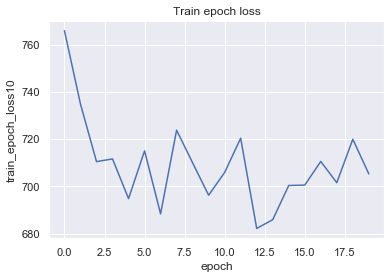

In [69]:
sns.set(style='darkgrid')
sns.lineplot(y='train_epoch_loss10', x = 'epoch', data=results).set_title('Train epoch loss')

Text(0.5, 1.0, 'Val epoch loss')

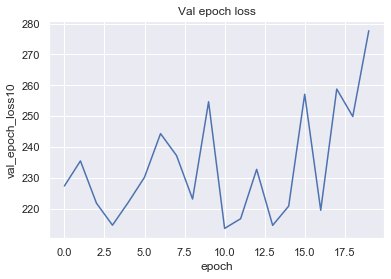

In [70]:
sns.set(style='darkgrid')
sns.lineplot(y='val_epoch_loss10', x = 'epoch', data=results).set_title('Val epoch loss')

### Run the model with epoch = 20, learning rate = 1*e-4, model saved as 'saved_model_4_lr.pt'

In [79]:
%%time
train_loss_per_iter20, train_epoch_loss20, val_loss_per_iter20, val_epoch_loss20, val_epoch_acc20 = \
train_model(train_loader, val_loader)

epoch:  0
minibatch:  0  out of  1165
loss:  tensor(0.6109, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1  out of  1165
loss:  tensor(0.7842, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  2  out of  1165
loss:  tensor(0.7576, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  3  out of  1165
loss:  tensor(0.6956, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  4  out of  1165
loss:  tensor(0.6951, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  5  out of  1165
loss:  tensor(0.7185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  6  out of  1165
loss:  tensor(0.5993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  7  out of  1165
loss:  tensor(0.6602, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  8  out of  1165
loss:  tensor(0.5515, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  9  out of  1165
loss:  tensor(0.6386, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  10  out of  1165
loss:  tensor(0.6374, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  11  out o

loss:  tensor(0.6200, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  93  out of  1165
loss:  tensor(0.3049, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  94  out of  1165
loss:  tensor(0.8406, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  95  out of  1165
loss:  tensor(0.3103, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  96  out of  1165
loss:  tensor(0.3095, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  97  out of  1165
loss:  tensor(0.8447, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  98  out of  1165
loss:  tensor(0.7962, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  99  out of  1165
loss:  tensor(0.3076, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  100  out of  1165
loss:  tensor(0.3395, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  101  out of  1165
loss:  tensor(0.3044, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  102  out of  1165
loss:  tensor(0.6968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  103  out of  1165
loss:  tensor(0.7

loss:  tensor(1.2619, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  185  out of  1165
loss:  tensor(1.2655, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  186  out of  1165
loss:  tensor(0.8049, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  187  out of  1165
loss:  tensor(0.7708, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  188  out of  1165
loss:  tensor(0.7479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  189  out of  1165
loss:  tensor(1.1760, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  190  out of  1165
loss:  tensor(0.3768, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  191  out of  1165
loss:  tensor(1.1664, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  192  out of  1165
loss:  tensor(0.6503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  193  out of  1165
loss:  tensor(0.4256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  194  out of  1165
loss:  tensor(0.4396, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  195  out of  1165
loss:  ten

loss:  tensor(0.8204, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  277  out of  1165
loss:  tensor(0.7850, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  278  out of  1165
loss:  tensor(0.6524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  279  out of  1165
loss:  tensor(0.6331, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  280  out of  1165
loss:  tensor(0.5745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  281  out of  1165
loss:  tensor(0.6966, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  282  out of  1165
loss:  tensor(0.7244, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  283  out of  1165
loss:  tensor(0.6057, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  284  out of  1165
loss:  tensor(0.6775, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  285  out of  1165
loss:  tensor(0.6821, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  286  out of  1165
loss:  tensor(0.6554, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  287  out of  1165
loss:  ten

loss:  tensor(0.4706, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  369  out of  1165
loss:  tensor(0.9987, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  370  out of  1165
loss:  tensor(0.6081, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  371  out of  1165
loss:  tensor(0.4899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  372  out of  1165
loss:  tensor(0.5708, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  373  out of  1165
loss:  tensor(0.5050, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  374  out of  1165
loss:  tensor(0.6292, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  375  out of  1165
loss:  tensor(0.5510, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  376  out of  1165
loss:  tensor(0.4985, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  377  out of  1165
loss:  tensor(0.6821, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  378  out of  1165
loss:  tensor(0.5058, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  379  out of  1165
loss:  ten

loss:  tensor(0.3263, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  461  out of  1165
loss:  tensor(0.8526, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  462  out of  1165
loss:  tensor(0.3227, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  463  out of  1165
loss:  tensor(0.7903, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  464  out of  1165
loss:  tensor(0.8316, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  465  out of  1165
loss:  tensor(0.3209, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  466  out of  1165
loss:  tensor(1.3249, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  467  out of  1165
loss:  tensor(0.7971, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  468  out of  1165
loss:  tensor(1.2842, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  469  out of  1165
loss:  tensor(0.7859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  470  out of  1165
loss:  tensor(0.7800, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  471  out of  1165
loss:  ten

loss:  tensor(0.5413, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  553  out of  1165
loss:  tensor(0.8581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  554  out of  1165
loss:  tensor(0.5222, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  555  out of  1165
loss:  tensor(0.4523, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  556  out of  1165
loss:  tensor(0.6478, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  557  out of  1165
loss:  tensor(0.5680, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  558  out of  1165
loss:  tensor(0.5499, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  559  out of  1165
loss:  tensor(0.5177, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  560  out of  1165
loss:  tensor(0.5383, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  561  out of  1165
loss:  tensor(0.8956, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  562  out of  1165
loss:  tensor(0.5475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  563  out of  1165
loss:  ten

minibatch:  644  out of  1165
loss:  tensor(0.7257, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  645  out of  1165
loss:  tensor(0.3279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  646  out of  1165
loss:  tensor(0.8225, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  647  out of  1165
loss:  tensor(0.3086, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  648  out of  1165
loss:  tensor(1.3291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  649  out of  1165
loss:  tensor(0.7085, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  650  out of  1165
loss:  tensor(0.6567, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  651  out of  1165
loss:  tensor(1.3390, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  652  out of  1165
loss:  tensor(0.3125, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  653  out of  1165
loss:  tensor(0.5816, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  654  out of  1165
loss:  tensor(0.7125, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:

loss:  tensor(0.6075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  736  out of  1165
loss:  tensor(0.6185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  737  out of  1165
loss:  tensor(0.8420, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  738  out of  1165
loss:  tensor(0.6049, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  739  out of  1165
loss:  tensor(0.6112, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  740  out of  1165
loss:  tensor(0.6027, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  741  out of  1165
loss:  tensor(0.5770, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  742  out of  1165
loss:  tensor(0.5665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  743  out of  1165
loss:  tensor(0.7082, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  744  out of  1165
loss:  tensor(0.5409, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  745  out of  1165
loss:  tensor(0.5305, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  746  out of  1165
loss:  ten

loss:  tensor(0.4875, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  828  out of  1165
loss:  tensor(0.6287, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  829  out of  1165
loss:  tensor(0.8887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  830  out of  1165
loss:  tensor(0.8913, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  831  out of  1165
loss:  tensor(0.9012, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  832  out of  1165
loss:  tensor(0.4574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  833  out of  1165
loss:  tensor(0.5836, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  834  out of  1165
loss:  tensor(0.6479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  835  out of  1165
loss:  tensor(0.6043, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  836  out of  1165
loss:  tensor(0.6071, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  837  out of  1165
loss:  tensor(0.6077, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  838  out of  1165
loss:  ten

loss:  tensor(0.9924, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  920  out of  1165
loss:  tensor(0.7308, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  921  out of  1165
loss:  tensor(0.4446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  922  out of  1165
loss:  tensor(0.4477, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  923  out of  1165
loss:  tensor(0.4421, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  924  out of  1165
loss:  tensor(0.5848, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  925  out of  1165
loss:  tensor(0.5963, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  926  out of  1165
loss:  tensor(0.6373, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  927  out of  1165
loss:  tensor(0.8154, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  928  out of  1165
loss:  tensor(0.5009, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  929  out of  1165
loss:  tensor(0.6319, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  930  out of  1165
loss:  ten

loss:  tensor(0.4557, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1011  out of  1165
loss:  tensor(0.5080, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1012  out of  1165
loss:  tensor(0.6942, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1013  out of  1165
loss:  tensor(0.4487, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1014  out of  1165
loss:  tensor(0.6929, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1015  out of  1165
loss:  tensor(0.4305, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1016  out of  1165
loss:  tensor(0.9552, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1017  out of  1165
loss:  tensor(0.4682, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1018  out of  1165
loss:  tensor(0.5200, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1019  out of  1165
loss:  tensor(1.1174, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1020  out of  1165
loss:  tensor(0.6085, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1021  out of  1165

loss:  tensor(0.4028, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1102  out of  1165
loss:  tensor(0.3504, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1103  out of  1165
loss:  tensor(0.9645, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1104  out of  1165
loss:  tensor(1.2581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1105  out of  1165
loss:  tensor(0.4442, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1106  out of  1165
loss:  tensor(0.5381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1107  out of  1165
loss:  tensor(0.5764, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1108  out of  1165
loss:  tensor(1.2916, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1109  out of  1165
loss:  tensor(0.5650, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1110  out of  1165
loss:  tensor(0.3191, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1111  out of  1165
loss:  tensor(0.7269, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1112  out of  1165

loss:  tensor(0.5282, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  28  out of  1165
loss:  tensor(0.6559, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  29  out of  1165
loss:  tensor(0.4926, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  30  out of  1165
loss:  tensor(0.9747, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  31  out of  1165
loss:  tensor(0.8340, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  32  out of  1165
loss:  tensor(0.6925, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  33  out of  1165
loss:  tensor(0.5020, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  34  out of  1165
loss:  tensor(0.4784, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  35  out of  1165
loss:  tensor(0.7023, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  36  out of  1165
loss:  tensor(1.0206, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  37  out of  1165
loss:  tensor(0.4563, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  38  out of  1165
loss:  tensor(0.4759,

loss:  tensor(1.3899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  120  out of  1165
loss:  tensor(0.3014, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  121  out of  1165
loss:  tensor(0.5552, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  122  out of  1165
loss:  tensor(0.3432, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  123  out of  1165
loss:  tensor(1.3064, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  124  out of  1165
loss:  tensor(0.3509, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  125  out of  1165
loss:  tensor(1.2679, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  126  out of  1165
loss:  tensor(0.3223, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  127  out of  1165
loss:  tensor(0.3528, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  128  out of  1165
loss:  tensor(0.3361, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  129  out of  1165
loss:  tensor(0.3612, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  130  out of  1165
loss:  ten

loss:  tensor(0.2797, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  212  out of  1165
loss:  tensor(0.8320, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  213  out of  1165
loss:  tensor(0.8054, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  214  out of  1165
loss:  tensor(1.4543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  215  out of  1165
loss:  tensor(0.2855, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  216  out of  1165
loss:  tensor(0.6133, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  217  out of  1165
loss:  tensor(0.6559, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  218  out of  1165
loss:  tensor(0.5004, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  219  out of  1165
loss:  tensor(0.3012, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  220  out of  1165
loss:  tensor(0.3082, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  221  out of  1165
loss:  tensor(0.3148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  222  out of  1165
loss:  ten

loss:  tensor(0.4636, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  304  out of  1165
loss:  tensor(1.0805, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  305  out of  1165
loss:  tensor(0.4563, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  306  out of  1165
loss:  tensor(0.4683, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  307  out of  1165
loss:  tensor(1.1283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  308  out of  1165
loss:  tensor(0.3861, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  309  out of  1165
loss:  tensor(0.6591, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  310  out of  1165
loss:  tensor(1.1649, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  311  out of  1165
loss:  tensor(0.4695, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  312  out of  1165
loss:  tensor(0.4262, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  313  out of  1165
loss:  tensor(0.4933, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  314  out of  1165
loss:  ten

loss:  tensor(0.4155, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  396  out of  1165
loss:  tensor(0.3582, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  397  out of  1165
loss:  tensor(0.4178, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  398  out of  1165
loss:  tensor(0.5270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  399  out of  1165
loss:  tensor(0.4627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  400  out of  1165
loss:  tensor(0.5997, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  401  out of  1165
loss:  tensor(0.3750, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  402  out of  1165
loss:  tensor(1.1620, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  403  out of  1165
loss:  tensor(0.8292, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  404  out of  1165
loss:  tensor(1.1789, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  405  out of  1165
loss:  tensor(0.6846, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  406  out of  1165
loss:  ten

loss:  tensor(1.0666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  488  out of  1165
loss:  tensor(0.6269, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  489  out of  1165
loss:  tensor(0.4090, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  490  out of  1165
loss:  tensor(0.4321, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  491  out of  1165
loss:  tensor(0.5644, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  492  out of  1165
loss:  tensor(0.4278, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  493  out of  1165
loss:  tensor(0.4019, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  494  out of  1165
loss:  tensor(0.4443, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  495  out of  1165
loss:  tensor(0.6112, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  496  out of  1165
loss:  tensor(1.0091, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  497  out of  1165
loss:  tensor(0.4278, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  498  out of  1165
loss:  ten

loss:  tensor(0.3205, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  580  out of  1165
loss:  tensor(0.8172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  581  out of  1165
loss:  tensor(0.8715, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  582  out of  1165
loss:  tensor(0.5262, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  583  out of  1165
loss:  tensor(0.3349, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  584  out of  1165
loss:  tensor(0.3315, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  585  out of  1165
loss:  tensor(0.6446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  586  out of  1165
loss:  tensor(0.7082, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  587  out of  1165
loss:  tensor(0.6487, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  588  out of  1165
loss:  tensor(0.3890, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  589  out of  1165
loss:  tensor(0.4777, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  590  out of  1165
loss:  ten

loss:  tensor(0.3475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  672  out of  1165
loss:  tensor(0.3183, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  673  out of  1165
loss:  tensor(0.3120, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  674  out of  1165
loss:  tensor(0.7489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  675  out of  1165
loss:  tensor(1.3742, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  676  out of  1165
loss:  tensor(0.2954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  677  out of  1165
loss:  tensor(0.3645, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  678  out of  1165
loss:  tensor(1.1447, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  679  out of  1165
loss:  tensor(0.3257, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  680  out of  1165
loss:  tensor(0.5355, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  681  out of  1165
loss:  tensor(0.8891, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  682  out of  1165
loss:  ten

loss:  tensor(0.4756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  764  out of  1165
loss:  tensor(0.4140, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  765  out of  1165
loss:  tensor(0.4131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  766  out of  1165
loss:  tensor(0.4146, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  767  out of  1165
loss:  tensor(0.9863, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  768  out of  1165
loss:  tensor(1.0044, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  769  out of  1165
loss:  tensor(0.4169, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  770  out of  1165
loss:  tensor(0.5004, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  771  out of  1165
loss:  tensor(0.5659, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  772  out of  1165
loss:  tensor(0.5760, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  773  out of  1165
loss:  tensor(0.7801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  774  out of  1165
loss:  ten

loss:  tensor(0.5088, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  856  out of  1165
loss:  tensor(0.3862, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  857  out of  1165
loss:  tensor(0.4187, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  858  out of  1165
loss:  tensor(1.1017, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  859  out of  1165
loss:  tensor(1.0913, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  860  out of  1165
loss:  tensor(0.4561, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  861  out of  1165
loss:  tensor(0.4546, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  862  out of  1165
loss:  tensor(1.0554, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  863  out of  1165
loss:  tensor(0.5158, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  864  out of  1165
loss:  tensor(0.3290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  865  out of  1165
loss:  tensor(0.4929, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  866  out of  1165
loss:  ten

loss:  tensor(0.4002, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  948  out of  1165
loss:  tensor(0.3990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  949  out of  1165
loss:  tensor(0.3955, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  950  out of  1165
loss:  tensor(0.3738, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  951  out of  1165
loss:  tensor(0.6549, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  952  out of  1165
loss:  tensor(0.3924, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  953  out of  1165
loss:  tensor(1.1393, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  954  out of  1165
loss:  tensor(0.7351, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  955  out of  1165
loss:  tensor(0.4182, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  956  out of  1165
loss:  tensor(1.1265, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  957  out of  1165
loss:  tensor(0.4060, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  958  out of  1165
loss:  ten

loss:  tensor(0.3641, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1039  out of  1165
loss:  tensor(0.4086, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1040  out of  1165
loss:  tensor(0.3095, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1041  out of  1165
loss:  tensor(0.3026, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1042  out of  1165
loss:  tensor(0.3228, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1043  out of  1165
loss:  tensor(0.5033, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1044  out of  1165
loss:  tensor(1.4111, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1045  out of  1165
loss:  tensor(0.8514, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1046  out of  1165
loss:  tensor(0.9199, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1047  out of  1165
loss:  tensor(0.3523, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1048  out of  1165
loss:  tensor(0.2963, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1049  out of  1165

loss:  tensor(0.4402, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1130  out of  1165
loss:  tensor(0.3118, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1131  out of  1165
loss:  tensor(0.4906, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1132  out of  1165
loss:  tensor(0.5198, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1133  out of  1165
loss:  tensor(0.3904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1134  out of  1165
loss:  tensor(0.6539, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1135  out of  1165
loss:  tensor(1.0068, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1136  out of  1165
loss:  tensor(0.5082, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1137  out of  1165
loss:  tensor(0.5805, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1138  out of  1165
loss:  tensor(0.9639, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1139  out of  1165
loss:  tensor(0.5193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1140  out of  1165

loss:  tensor(1.0009, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  57  out of  1165
loss:  tensor(0.5525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  58  out of  1165
loss:  tensor(0.5323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  59  out of  1165
loss:  tensor(0.8541, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  60  out of  1165
loss:  tensor(0.6010, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  61  out of  1165
loss:  tensor(0.6477, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  62  out of  1165
loss:  tensor(0.5765, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  63  out of  1165
loss:  tensor(0.4621, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  64  out of  1165
loss:  tensor(0.3731, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  65  out of  1165
loss:  tensor(0.3095, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  66  out of  1165
loss:  tensor(0.3027, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  67  out of  1165
loss:  tensor(0.5197,

loss:  tensor(0.3827, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  149  out of  1165
loss:  tensor(0.4239, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  150  out of  1165
loss:  tensor(0.6731, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  151  out of  1165
loss:  tensor(0.4781, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  152  out of  1165
loss:  tensor(1.2559, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  153  out of  1165
loss:  tensor(0.4372, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  154  out of  1165
loss:  tensor(0.5823, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  155  out of  1165
loss:  tensor(0.6249, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  156  out of  1165
loss:  tensor(0.8760, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  157  out of  1165
loss:  tensor(0.5388, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  158  out of  1165
loss:  tensor(0.9993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  159  out of  1165
loss:  ten

loss:  tensor(0.5594, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  241  out of  1165
loss:  tensor(0.5825, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  242  out of  1165
loss:  tensor(0.3880, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  243  out of  1165
loss:  tensor(0.9589, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  244  out of  1165
loss:  tensor(0.8875, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  245  out of  1165
loss:  tensor(0.9067, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  246  out of  1165
loss:  tensor(0.4949, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  247  out of  1165
loss:  tensor(0.5572, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  248  out of  1165
loss:  tensor(0.3297, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  249  out of  1165
loss:  tensor(0.3607, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  250  out of  1165
loss:  tensor(0.5844, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  251  out of  1165
loss:  ten

loss:  tensor(0.4898, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  333  out of  1165
loss:  tensor(1.1197, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  334  out of  1165
loss:  tensor(0.7288, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  335  out of  1165
loss:  tensor(0.9185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  336  out of  1165
loss:  tensor(0.4712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  337  out of  1165
loss:  tensor(0.4837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  338  out of  1165
loss:  tensor(0.5931, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  339  out of  1165
loss:  tensor(0.2769, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  340  out of  1165
loss:  tensor(0.2798, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  341  out of  1165
loss:  tensor(0.5387, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  342  out of  1165
loss:  tensor(0.4143, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  343  out of  1165
loss:  ten

loss:  tensor(0.4118, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  425  out of  1165
loss:  tensor(0.4167, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  426  out of  1165
loss:  tensor(0.4131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  427  out of  1165
loss:  tensor(0.4295, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  428  out of  1165
loss:  tensor(0.3594, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  429  out of  1165
loss:  tensor(0.4299, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  430  out of  1165
loss:  tensor(1.0159, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  431  out of  1165
loss:  tensor(0.6378, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  432  out of  1165
loss:  tensor(0.4500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  433  out of  1165
loss:  tensor(1.1238, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  434  out of  1165
loss:  tensor(1.1439, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  435  out of  1165
loss:  ten

loss:  tensor(0.4218, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  517  out of  1165
loss:  tensor(0.4508, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  518  out of  1165
loss:  tensor(0.6819, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  519  out of  1165
loss:  tensor(0.8069, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  520  out of  1165
loss:  tensor(0.7862, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  521  out of  1165
loss:  tensor(0.6403, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  522  out of  1165
loss:  tensor(0.3250, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  523  out of  1165
loss:  tensor(0.4955, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  524  out of  1165
loss:  tensor(0.4830, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  525  out of  1165
loss:  tensor(0.6663, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  526  out of  1165
loss:  tensor(0.7197, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  527  out of  1165
loss:  ten

loss:  tensor(1.0996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  609  out of  1165
loss:  tensor(0.4240, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  610  out of  1165
loss:  tensor(0.6320, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  611  out of  1165
loss:  tensor(0.5304, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  612  out of  1165
loss:  tensor(1.1258, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  613  out of  1165
loss:  tensor(0.4904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  614  out of  1165
loss:  tensor(0.7823, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  615  out of  1165
loss:  tensor(0.5055, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  616  out of  1165
loss:  tensor(0.4441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  617  out of  1165
loss:  tensor(0.4828, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  618  out of  1165
loss:  tensor(0.5011, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  619  out of  1165
loss:  ten

loss:  tensor(0.7238, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  701  out of  1165
loss:  tensor(0.9673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  702  out of  1165
loss:  tensor(0.4147, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  703  out of  1165
loss:  tensor(0.6891, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  704  out of  1165
loss:  tensor(0.9010, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  705  out of  1165
loss:  tensor(0.3165, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  706  out of  1165
loss:  tensor(0.2179, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  707  out of  1165
loss:  tensor(0.6297, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  708  out of  1165
loss:  tensor(0.2814, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  709  out of  1165
loss:  tensor(0.8580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  710  out of  1165
loss:  tensor(0.6142, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  711  out of  1165
loss:  ten

loss:  tensor(0.3648, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  793  out of  1165
loss:  tensor(0.2374, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  794  out of  1165
loss:  tensor(0.4535, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  795  out of  1165
loss:  tensor(0.8441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  796  out of  1165
loss:  tensor(0.4698, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  797  out of  1165
loss:  tensor(0.7905, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  798  out of  1165
loss:  tensor(0.4063, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  799  out of  1165
loss:  tensor(0.3524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  800  out of  1165
loss:  tensor(0.3786, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  801  out of  1165
loss:  tensor(0.4151, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  802  out of  1165
loss:  tensor(0.3653, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  803  out of  1165
loss:  ten

loss:  tensor(0.5578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  885  out of  1165
loss:  tensor(0.7272, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  886  out of  1165
loss:  tensor(0.4508, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  887  out of  1165
loss:  tensor(0.5160, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  888  out of  1165
loss:  tensor(0.5427, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  889  out of  1165
loss:  tensor(0.4335, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  890  out of  1165
loss:  tensor(0.7267, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  891  out of  1165
loss:  tensor(0.3298, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  892  out of  1165
loss:  tensor(0.4000, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  893  out of  1165
loss:  tensor(1.2138, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  894  out of  1165
loss:  tensor(0.4985, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  895  out of  1165
loss:  ten

loss:  tensor(0.6997, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  977  out of  1165
loss:  tensor(0.5642, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  978  out of  1165
loss:  tensor(0.7118, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  979  out of  1165
loss:  tensor(0.5390, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  980  out of  1165
loss:  tensor(0.3134, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  981  out of  1165
loss:  tensor(0.3584, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  982  out of  1165
loss:  tensor(0.4952, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  983  out of  1165
loss:  tensor(0.6378, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  984  out of  1165
loss:  tensor(0.4842, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  985  out of  1165
loss:  tensor(0.4717, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  986  out of  1165
loss:  tensor(0.4746, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  987  out of  1165
loss:  ten

loss:  tensor(0.2734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1068  out of  1165
loss:  tensor(0.3433, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1069  out of  1165
loss:  tensor(0.4694, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1070  out of  1165
loss:  tensor(0.4522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1071  out of  1165
loss:  tensor(0.3381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1072  out of  1165
loss:  tensor(0.4872, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1073  out of  1165
loss:  tensor(0.4615, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1074  out of  1165
loss:  tensor(0.5399, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1075  out of  1165
loss:  tensor(0.4948, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1076  out of  1165
loss:  tensor(0.4530, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1077  out of  1165
loss:  tensor(0.5673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1078  out of  1165

loss:  tensor(0.4536, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1159  out of  1165
loss:  tensor(1.4465, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1160  out of  1165
loss:  tensor(0.4112, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1161  out of  1165
loss:  tensor(0.3420, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1162  out of  1165
loss:  tensor(1.0329, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1163  out of  1165
loss:  tensor(1.3832, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1164  out of  1165
loss:  tensor(0.3452, grad_fn=<BinaryCrossEntropyBackward>)
epoch:  3
minibatch:  0  out of  1165
loss:  tensor(0.3559, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1  out of  1165
loss:  tensor(0.7937, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  2  out of  1165
loss:  tensor(0.8811, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  3  out of  1165
loss:  tensor(1.1875, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  4  out of  1165
loss

loss:  tensor(0.6339, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  86  out of  1165
loss:  tensor(0.7266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  87  out of  1165
loss:  tensor(0.7474, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  88  out of  1165
loss:  tensor(0.3062, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  89  out of  1165
loss:  tensor(0.6061, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  90  out of  1165
loss:  tensor(0.6904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  91  out of  1165
loss:  tensor(0.7191, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  92  out of  1165
loss:  tensor(1.0452, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  93  out of  1165
loss:  tensor(0.5233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  94  out of  1165
loss:  tensor(0.4239, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  95  out of  1165
loss:  tensor(0.6318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  96  out of  1165
loss:  tensor(0.5286,

loss:  tensor(0.3512, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  178  out of  1165
loss:  tensor(0.3785, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  179  out of  1165
loss:  tensor(0.5950, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  180  out of  1165
loss:  tensor(1.2193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  181  out of  1165
loss:  tensor(0.5745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  182  out of  1165
loss:  tensor(0.8608, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  183  out of  1165
loss:  tensor(0.4278, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  184  out of  1165
loss:  tensor(1.3703, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  185  out of  1165
loss:  tensor(0.4094, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  186  out of  1165
loss:  tensor(1.1751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  187  out of  1165
loss:  tensor(0.5252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  188  out of  1165
loss:  ten

loss:  tensor(0.3983, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  270  out of  1165
loss:  tensor(1.1249, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  271  out of  1165
loss:  tensor(0.2751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  272  out of  1165
loss:  tensor(0.3649, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  273  out of  1165
loss:  tensor(0.4197, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  274  out of  1165
loss:  tensor(0.4228, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  275  out of  1165
loss:  tensor(0.4037, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  276  out of  1165
loss:  tensor(0.3663, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  277  out of  1165
loss:  tensor(0.5702, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  278  out of  1165
loss:  tensor(0.4034, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  279  out of  1165
loss:  tensor(0.3942, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  280  out of  1165
loss:  ten

loss:  tensor(0.4514, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  362  out of  1165
loss:  tensor(0.5990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  363  out of  1165
loss:  tensor(0.4888, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  364  out of  1165
loss:  tensor(0.2962, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  365  out of  1165
loss:  tensor(0.4826, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  366  out of  1165
loss:  tensor(0.3662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  367  out of  1165
loss:  tensor(1.2331, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  368  out of  1165
loss:  tensor(1.1530, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  369  out of  1165
loss:  tensor(0.4858, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  370  out of  1165
loss:  tensor(0.3808, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  371  out of  1165
loss:  tensor(0.4547, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  372  out of  1165
loss:  ten

loss:  tensor(0.3013, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  454  out of  1165
loss:  tensor(0.5174, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  455  out of  1165
loss:  tensor(0.3611, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  456  out of  1165
loss:  tensor(1.4792, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  457  out of  1165
loss:  tensor(0.4700, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  458  out of  1165
loss:  tensor(0.6553, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  459  out of  1165
loss:  tensor(0.3660, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  460  out of  1165
loss:  tensor(0.6811, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  461  out of  1165
loss:  tensor(0.2873, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  462  out of  1165
loss:  tensor(0.6029, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  463  out of  1165
loss:  tensor(0.3945, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  464  out of  1165
loss:  ten

loss:  tensor(0.4150, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  546  out of  1165
loss:  tensor(0.3975, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  547  out of  1165
loss:  tensor(1.1952, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  548  out of  1165
loss:  tensor(0.5464, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  549  out of  1165
loss:  tensor(0.4815, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  550  out of  1165
loss:  tensor(0.3727, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  551  out of  1165
loss:  tensor(1.1327, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  552  out of  1165
loss:  tensor(1.2221, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  553  out of  1165
loss:  tensor(0.3801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  554  out of  1165
loss:  tensor(0.4503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  555  out of  1165
loss:  tensor(1.1269, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  556  out of  1165
loss:  ten

loss:  tensor(0.5615, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  638  out of  1165
loss:  tensor(0.6210, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  639  out of  1165
loss:  tensor(0.2898, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  640  out of  1165
loss:  tensor(0.5233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  641  out of  1165
loss:  tensor(0.4777, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  642  out of  1165
loss:  tensor(0.3592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  643  out of  1165
loss:  tensor(0.4824, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  644  out of  1165
loss:  tensor(0.4729, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  645  out of  1165
loss:  tensor(0.3692, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  646  out of  1165
loss:  tensor(0.3340, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  647  out of  1165
loss:  tensor(0.4692, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  648  out of  1165
loss:  ten

loss:  tensor(1.4502, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  730  out of  1165
loss:  tensor(0.3911, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  731  out of  1165
loss:  tensor(1.4917, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  732  out of  1165
loss:  tensor(0.4337, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  733  out of  1165
loss:  tensor(1.4161, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  734  out of  1165
loss:  tensor(0.3904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  735  out of  1165
loss:  tensor(0.4001, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  736  out of  1165
loss:  tensor(1.2527, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  737  out of  1165
loss:  tensor(0.4733, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  738  out of  1165
loss:  tensor(0.5769, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  739  out of  1165
loss:  tensor(0.5576, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  740  out of  1165
loss:  ten

loss:  tensor(1.2652, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  822  out of  1165
loss:  tensor(1.2333, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  823  out of  1165
loss:  tensor(0.4722, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  824  out of  1165
loss:  tensor(0.9410, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  825  out of  1165
loss:  tensor(0.5904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  826  out of  1165
loss:  tensor(0.1658, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  827  out of  1165
loss:  tensor(0.3751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  828  out of  1165
loss:  tensor(0.4696, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  829  out of  1165
loss:  tensor(0.2974, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  830  out of  1165
loss:  tensor(0.5251, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  831  out of  1165
loss:  tensor(1.1436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  832  out of  1165
loss:  ten

loss:  tensor(0.4284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  914  out of  1165
loss:  tensor(0.4091, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  915  out of  1165
loss:  tensor(0.4220, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  916  out of  1165
loss:  tensor(0.2423, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  917  out of  1165
loss:  tensor(0.6206, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  918  out of  1165
loss:  tensor(0.4359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  919  out of  1165
loss:  tensor(0.5321, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  920  out of  1165
loss:  tensor(0.3651, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  921  out of  1165
loss:  tensor(0.7537, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  922  out of  1165
loss:  tensor(0.4349, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  923  out of  1165
loss:  tensor(0.3834, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  924  out of  1165
loss:  ten

loss:  tensor(0.3897, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1005  out of  1165
loss:  tensor(0.5762, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1006  out of  1165
loss:  tensor(0.9015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1007  out of  1165
loss:  tensor(0.8823, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1008  out of  1165
loss:  tensor(0.5414, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1009  out of  1165
loss:  tensor(0.6890, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1010  out of  1165
loss:  tensor(0.2368, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1011  out of  1165
loss:  tensor(0.7114, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1012  out of  1165
loss:  tensor(0.5314, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1013  out of  1165
loss:  tensor(0.9176, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1014  out of  1165
loss:  tensor(0.2042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1015  out of  1165

loss:  tensor(0.7894, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1096  out of  1165
loss:  tensor(1.2444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1097  out of  1165
loss:  tensor(0.3594, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1098  out of  1165
loss:  tensor(0.8581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1099  out of  1165
loss:  tensor(0.3739, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1100  out of  1165
loss:  tensor(0.4198, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1101  out of  1165
loss:  tensor(0.3669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1102  out of  1165
loss:  tensor(0.4172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1103  out of  1165
loss:  tensor(0.8438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1104  out of  1165
loss:  tensor(0.4220, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1105  out of  1165
loss:  tensor(0.3588, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1106  out of  1165

loss:  tensor(0.3303, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  22  out of  1165
loss:  tensor(0.3041, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  23  out of  1165
loss:  tensor(1.3391, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  24  out of  1165
loss:  tensor(1.2937, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  25  out of  1165
loss:  tensor(0.3688, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  26  out of  1165
loss:  tensor(0.3569, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  27  out of  1165
loss:  tensor(0.6560, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  28  out of  1165
loss:  tensor(0.4168, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  29  out of  1165
loss:  tensor(0.4516, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  30  out of  1165
loss:  tensor(0.8177, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  31  out of  1165
loss:  tensor(0.3794, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  32  out of  1165
loss:  tensor(0.4150,

loss:  tensor(0.6489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  114  out of  1165
loss:  tensor(0.5929, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  115  out of  1165
loss:  tensor(0.2925, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  116  out of  1165
loss:  tensor(0.5083, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  117  out of  1165
loss:  tensor(0.3326, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  118  out of  1165
loss:  tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  119  out of  1165
loss:  tensor(0.3050, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  120  out of  1165
loss:  tensor(0.3089, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  121  out of  1165
loss:  tensor(0.3041, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  122  out of  1165
loss:  tensor(0.4680, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  123  out of  1165
loss:  tensor(1.4507, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  124  out of  1165
loss:  ten

loss:  tensor(0.3130, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  206  out of  1165
loss:  tensor(0.3685, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  207  out of  1165
loss:  tensor(0.4662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  208  out of  1165
loss:  tensor(0.1880, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  209  out of  1165
loss:  tensor(0.2332, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  210  out of  1165
loss:  tensor(0.5087, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  211  out of  1165
loss:  tensor(0.7522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  212  out of  1165
loss:  tensor(0.5756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  213  out of  1165
loss:  tensor(1.0268, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  214  out of  1165
loss:  tensor(0.4708, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  215  out of  1165
loss:  tensor(0.4706, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  216  out of  1165
loss:  ten

loss:  tensor(1.2765, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  298  out of  1165
loss:  tensor(0.7993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  299  out of  1165
loss:  tensor(0.3866, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  300  out of  1165
loss:  tensor(0.4040, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  301  out of  1165
loss:  tensor(0.3701, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  302  out of  1165
loss:  tensor(0.3951, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  303  out of  1165
loss:  tensor(0.3331, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  304  out of  1165
loss:  tensor(0.3285, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  305  out of  1165
loss:  tensor(1.3118, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  306  out of  1165
loss:  tensor(1.3262, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  307  out of  1165
loss:  tensor(0.4419, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  308  out of  1165
loss:  ten

loss:  tensor(0.4764, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  390  out of  1165
loss:  tensor(0.4236, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  391  out of  1165
loss:  tensor(0.4578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  392  out of  1165
loss:  tensor(1.0752, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  393  out of  1165
loss:  tensor(1.1196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  394  out of  1165
loss:  tensor(1.1492, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  395  out of  1165
loss:  tensor(0.2260, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  396  out of  1165
loss:  tensor(0.5570, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  397  out of  1165
loss:  tensor(0.4451, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  398  out of  1165
loss:  tensor(1.0803, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  399  out of  1165
loss:  tensor(0.6315, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  400  out of  1165
loss:  ten

loss:  tensor(0.6202, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  482  out of  1165
loss:  tensor(0.3069, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  483  out of  1165
loss:  tensor(0.5596, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  484  out of  1165
loss:  tensor(0.3131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  485  out of  1165
loss:  tensor(0.4666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  486  out of  1165
loss:  tensor(0.2860, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  487  out of  1165
loss:  tensor(0.8228, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  488  out of  1165
loss:  tensor(1.4971, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  489  out of  1165
loss:  tensor(0.2889, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  490  out of  1165
loss:  tensor(0.3326, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  491  out of  1165
loss:  tensor(0.5323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  492  out of  1165
loss:  ten

loss:  tensor(0.9281, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  574  out of  1165
loss:  tensor(1.1253, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  575  out of  1165
loss:  tensor(0.3409, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  576  out of  1165
loss:  tensor(0.3909, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  577  out of  1165
loss:  tensor(0.6590, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  578  out of  1165
loss:  tensor(0.6533, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  579  out of  1165
loss:  tensor(0.6410, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  580  out of  1165
loss:  tensor(0.5234, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  581  out of  1165
loss:  tensor(1.0015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  582  out of  1165
loss:  tensor(0.3351, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  583  out of  1165
loss:  tensor(0.6932, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  584  out of  1165
loss:  ten

loss:  tensor(0.8774, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  666  out of  1165
loss:  tensor(0.2894, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  667  out of  1165
loss:  tensor(0.7970, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  668  out of  1165
loss:  tensor(0.5756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  669  out of  1165
loss:  tensor(0.6306, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  670  out of  1165
loss:  tensor(0.9631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  671  out of  1165
loss:  tensor(1.0216, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  672  out of  1165
loss:  tensor(0.3163, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  673  out of  1165
loss:  tensor(0.5113, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  674  out of  1165
loss:  tensor(0.6152, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  675  out of  1165
loss:  tensor(0.3149, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  676  out of  1165
loss:  ten

loss:  tensor(0.9849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  758  out of  1165
loss:  tensor(0.6774, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  759  out of  1165
loss:  tensor(0.5452, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  760  out of  1165
loss:  tensor(0.5869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  761  out of  1165
loss:  tensor(0.5353, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  762  out of  1165
loss:  tensor(0.5196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  763  out of  1165
loss:  tensor(0.9756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  764  out of  1165
loss:  tensor(0.4897, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  765  out of  1165
loss:  tensor(0.4766, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  766  out of  1165
loss:  tensor(0.9798, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  767  out of  1165
loss:  tensor(0.5656, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  768  out of  1165
loss:  ten

loss:  tensor(0.2928, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  850  out of  1165
loss:  tensor(0.4266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  851  out of  1165
loss:  tensor(0.4148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  852  out of  1165
loss:  tensor(0.4689, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  853  out of  1165
loss:  tensor(0.3914, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  854  out of  1165
loss:  tensor(0.3959, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  855  out of  1165
loss:  tensor(1.3661, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  856  out of  1165
loss:  tensor(0.3184, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  857  out of  1165
loss:  tensor(0.5253, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  858  out of  1165
loss:  tensor(0.3280, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  859  out of  1165
loss:  tensor(0.2942, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  860  out of  1165
loss:  ten

loss:  tensor(0.4424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  942  out of  1165
loss:  tensor(1.1587, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  943  out of  1165
loss:  tensor(0.4203, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  944  out of  1165
loss:  tensor(0.2679, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  945  out of  1165
loss:  tensor(0.4738, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  946  out of  1165
loss:  tensor(0.5383, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  947  out of  1165
loss:  tensor(0.3839, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  948  out of  1165
loss:  tensor(0.5721, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  949  out of  1165
loss:  tensor(0.5129, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  950  out of  1165
loss:  tensor(0.2266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  951  out of  1165
loss:  tensor(0.2096, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  952  out of  1165
loss:  ten

loss:  tensor(0.3224, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1033  out of  1165
loss:  tensor(0.5261, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1034  out of  1165
loss:  tensor(0.5981, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1035  out of  1165
loss:  tensor(0.6617, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1036  out of  1165
loss:  tensor(0.2044, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1037  out of  1165
loss:  tensor(0.7626, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1038  out of  1165
loss:  tensor(0.5382, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1039  out of  1165
loss:  tensor(0.9927, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1040  out of  1165
loss:  tensor(0.6207, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1041  out of  1165
loss:  tensor(0.5834, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1042  out of  1165
loss:  tensor(0.3989, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1043  out of  1165

loss:  tensor(0.4293, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1124  out of  1165
loss:  tensor(0.4222, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1125  out of  1165
loss:  tensor(0.1988, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1126  out of  1165
loss:  tensor(0.7402, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1127  out of  1165
loss:  tensor(0.3422, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1128  out of  1165
loss:  tensor(0.3433, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1129  out of  1165
loss:  tensor(0.3586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1130  out of  1165
loss:  tensor(0.3443, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1131  out of  1165
loss:  tensor(0.5877, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1132  out of  1165
loss:  tensor(1.2833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1133  out of  1165
loss:  tensor(0.3522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1134  out of  1165

loss:  tensor(0.5131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  51  out of  1165
loss:  tensor(0.4218, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  52  out of  1165
loss:  tensor(0.4253, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  53  out of  1165
loss:  tensor(0.4398, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  54  out of  1165
loss:  tensor(0.4735, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  55  out of  1165
loss:  tensor(0.4008, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  56  out of  1165
loss:  tensor(0.5547, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  57  out of  1165
loss:  tensor(0.5904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  58  out of  1165
loss:  tensor(0.2701, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  59  out of  1165
loss:  tensor(0.5613, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  60  out of  1165
loss:  tensor(0.3755, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  61  out of  1165
loss:  tensor(1.2356,

loss:  tensor(0.1986, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  143  out of  1165
loss:  tensor(0.2949, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  144  out of  1165
loss:  tensor(0.3797, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  145  out of  1165
loss:  tensor(1.1669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  146  out of  1165
loss:  tensor(0.6154, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  147  out of  1165
loss:  tensor(0.5016, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  148  out of  1165
loss:  tensor(0.6174, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  149  out of  1165
loss:  tensor(0.4968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  150  out of  1165
loss:  tensor(0.2224, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  151  out of  1165
loss:  tensor(1.1407, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  152  out of  1165
loss:  tensor(0.5124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  153  out of  1165
loss:  ten

loss:  tensor(0.6757, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  235  out of  1165
loss:  tensor(0.2649, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  236  out of  1165
loss:  tensor(0.4055, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  237  out of  1165
loss:  tensor(0.6472, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  238  out of  1165
loss:  tensor(0.7785, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  239  out of  1165
loss:  tensor(0.8560, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  240  out of  1165
loss:  tensor(0.7552, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  241  out of  1165
loss:  tensor(0.6732, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  242  out of  1165
loss:  tensor(0.6479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  243  out of  1165
loss:  tensor(0.4144, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  244  out of  1165
loss:  tensor(0.2877, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  245  out of  1165
loss:  ten

loss:  tensor(0.3072, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  327  out of  1165
loss:  tensor(0.6318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  328  out of  1165
loss:  tensor(0.5366, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  329  out of  1165
loss:  tensor(0.5394, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  330  out of  1165
loss:  tensor(0.8732, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  331  out of  1165
loss:  tensor(0.6257, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  332  out of  1165
loss:  tensor(0.2725, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  333  out of  1165
loss:  tensor(0.5754, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  334  out of  1165
loss:  tensor(0.5417, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  335  out of  1165
loss:  tensor(0.8857, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  336  out of  1165
loss:  tensor(0.5745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  337  out of  1165
loss:  ten

loss:  tensor(1.1822, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  419  out of  1165
loss:  tensor(0.4650, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  420  out of  1165
loss:  tensor(0.3465, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  421  out of  1165
loss:  tensor(0.6337, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  422  out of  1165
loss:  tensor(0.5746, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  423  out of  1165
loss:  tensor(0.2277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  424  out of  1165
loss:  tensor(1.1519, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  425  out of  1165
loss:  tensor(0.5773, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  426  out of  1165
loss:  tensor(0.4421, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  427  out of  1165
loss:  tensor(0.4202, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  428  out of  1165
loss:  tensor(0.4380, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  429  out of  1165
loss:  ten

loss:  tensor(0.4739, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  511  out of  1165
loss:  tensor(0.4809, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  512  out of  1165
loss:  tensor(0.4038, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  513  out of  1165
loss:  tensor(0.2515, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  514  out of  1165
loss:  tensor(0.5096, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  515  out of  1165
loss:  tensor(0.4348, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  516  out of  1165
loss:  tensor(0.4257, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  517  out of  1165
loss:  tensor(0.4656, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  518  out of  1165
loss:  tensor(0.5150, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  519  out of  1165
loss:  tensor(0.3946, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  520  out of  1165
loss:  tensor(0.3861, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  521  out of  1165
loss:  ten

loss:  tensor(0.6262, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  603  out of  1165
loss:  tensor(0.7629, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  604  out of  1165
loss:  tensor(0.3287, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  605  out of  1165
loss:  tensor(0.3422, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  606  out of  1165
loss:  tensor(0.3173, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  607  out of  1165
loss:  tensor(1.3114, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  608  out of  1165
loss:  tensor(0.3179, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  609  out of  1165
loss:  tensor(0.3697, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  610  out of  1165
loss:  tensor(0.4910, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  611  out of  1165
loss:  tensor(0.3519, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  612  out of  1165
loss:  tensor(0.3954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  613  out of  1165
loss:  ten

loss:  tensor(1.0879, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  695  out of  1165
loss:  tensor(1.0860, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  696  out of  1165
loss:  tensor(0.5555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  697  out of  1165
loss:  tensor(0.3055, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  698  out of  1165
loss:  tensor(0.4075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  699  out of  1165
loss:  tensor(1.4059, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  700  out of  1165
loss:  tensor(0.4816, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  701  out of  1165
loss:  tensor(0.5678, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  702  out of  1165
loss:  tensor(0.4806, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  703  out of  1165
loss:  tensor(1.1022, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  704  out of  1165
loss:  tensor(0.6915, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  705  out of  1165
loss:  ten

loss:  tensor(0.2112, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  787  out of  1165
loss:  tensor(1.0377, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  788  out of  1165
loss:  tensor(0.3189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  789  out of  1165
loss:  tensor(0.4685, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  790  out of  1165
loss:  tensor(1.0781, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  791  out of  1165
loss:  tensor(0.3921, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  792  out of  1165
loss:  tensor(0.7614, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  793  out of  1165
loss:  tensor(0.5117, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  794  out of  1165
loss:  tensor(0.5788, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  795  out of  1165
loss:  tensor(0.6232, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  796  out of  1165
loss:  tensor(0.4162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  797  out of  1165
loss:  ten

loss:  tensor(0.5207, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  879  out of  1165
loss:  tensor(0.4606, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  880  out of  1165
loss:  tensor(0.5841, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  881  out of  1165
loss:  tensor(1.1190, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  882  out of  1165
loss:  tensor(0.4257, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  883  out of  1165
loss:  tensor(0.4171, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  884  out of  1165
loss:  tensor(0.2934, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  885  out of  1165
loss:  tensor(1.3776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  886  out of  1165
loss:  tensor(0.3931, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  887  out of  1165
loss:  tensor(1.1076, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  888  out of  1165
loss:  tensor(0.2573, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  889  out of  1165
loss:  ten

loss:  tensor(0.9828, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  971  out of  1165
loss:  tensor(0.5799, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  972  out of  1165
loss:  tensor(0.5153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  973  out of  1165
loss:  tensor(0.9483, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  974  out of  1165
loss:  tensor(0.5369, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  975  out of  1165
loss:  tensor(0.5520, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  976  out of  1165
loss:  tensor(0.3834, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  977  out of  1165
loss:  tensor(0.6807, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  978  out of  1165
loss:  tensor(0.3982, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  979  out of  1165
loss:  tensor(0.2916, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  980  out of  1165
loss:  tensor(0.9037, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  981  out of  1165
loss:  ten

loss:  tensor(0.3596, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1062  out of  1165
loss:  tensor(1.3124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1063  out of  1165
loss:  tensor(0.6551, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1064  out of  1165
loss:  tensor(0.4993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1065  out of  1165
loss:  tensor(0.3207, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1066  out of  1165
loss:  tensor(0.2774, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1067  out of  1165
loss:  tensor(1.1359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1068  out of  1165
loss:  tensor(1.3132, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1069  out of  1165
loss:  tensor(0.3071, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1070  out of  1165
loss:  tensor(0.5254, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1071  out of  1165
loss:  tensor(0.4578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1072  out of  1165

loss:  tensor(0.6909, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1153  out of  1165
loss:  tensor(0.2759, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1154  out of  1165
loss:  tensor(0.8854, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1155  out of  1165
loss:  tensor(0.8333, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1156  out of  1165
loss:  tensor(0.2515, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1157  out of  1165
loss:  tensor(0.6665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1158  out of  1165
loss:  tensor(0.8028, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1159  out of  1165
loss:  tensor(0.3356, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1160  out of  1165
loss:  tensor(0.5892, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1161  out of  1165
loss:  tensor(0.2393, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1162  out of  1165
loss:  tensor(1.0350, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1163  out of  1165

loss:  tensor(0.1836, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  80  out of  1165
loss:  tensor(0.7889, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  81  out of  1165
loss:  tensor(0.4860, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  82  out of  1165
loss:  tensor(0.3167, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  83  out of  1165
loss:  tensor(0.8194, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  84  out of  1165
loss:  tensor(1.0337, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  85  out of  1165
loss:  tensor(0.2125, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  86  out of  1165
loss:  tensor(0.5520, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  87  out of  1165
loss:  tensor(0.6029, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  88  out of  1165
loss:  tensor(0.5655, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  89  out of  1165
loss:  tensor(0.5586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  90  out of  1165
loss:  tensor(0.6991,

loss:  tensor(0.5028, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  172  out of  1165
loss:  tensor(0.2574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  173  out of  1165
loss:  tensor(0.4776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  174  out of  1165
loss:  tensor(0.3487, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  175  out of  1165
loss:  tensor(0.3483, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  176  out of  1165
loss:  tensor(0.4071, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  177  out of  1165
loss:  tensor(0.3391, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  178  out of  1165
loss:  tensor(0.3925, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  179  out of  1165
loss:  tensor(0.3338, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  180  out of  1165
loss:  tensor(0.4415, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  181  out of  1165
loss:  tensor(0.4834, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  182  out of  1165
loss:  ten

loss:  tensor(1.1077, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  264  out of  1165
loss:  tensor(0.6261, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  265  out of  1165
loss:  tensor(0.4005, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  266  out of  1165
loss:  tensor(1.2389, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  267  out of  1165
loss:  tensor(0.4189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  268  out of  1165
loss:  tensor(0.2431, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  269  out of  1165
loss:  tensor(0.3803, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  270  out of  1165
loss:  tensor(1.2138, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  271  out of  1165
loss:  tensor(0.5833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  272  out of  1165
loss:  tensor(0.6114, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  273  out of  1165
loss:  tensor(0.6139, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  274  out of  1165
loss:  ten

loss:  tensor(1.3373, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  356  out of  1165
loss:  tensor(1.3858, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  357  out of  1165
loss:  tensor(0.6395, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  358  out of  1165
loss:  tensor(0.4671, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  359  out of  1165
loss:  tensor(0.6628, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  360  out of  1165
loss:  tensor(0.3890, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  361  out of  1165
loss:  tensor(0.4208, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  362  out of  1165
loss:  tensor(0.3723, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  363  out of  1165
loss:  tensor(0.3938, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  364  out of  1165
loss:  tensor(0.4887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  365  out of  1165
loss:  tensor(0.5291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  366  out of  1165
loss:  ten

loss:  tensor(0.6066, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  448  out of  1165
loss:  tensor(0.5644, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  449  out of  1165
loss:  tensor(0.7255, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  450  out of  1165
loss:  tensor(0.3824, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  451  out of  1165
loss:  tensor(0.4494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  452  out of  1165
loss:  tensor(1.2624, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  453  out of  1165
loss:  tensor(1.3075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  454  out of  1165
loss:  tensor(0.1811, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  455  out of  1165
loss:  tensor(0.4018, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  456  out of  1165
loss:  tensor(0.3818, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  457  out of  1165
loss:  tensor(0.3904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  458  out of  1165
loss:  ten

loss:  tensor(0.4852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  540  out of  1165
loss:  tensor(0.3474, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  541  out of  1165
loss:  tensor(0.4543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  542  out of  1165
loss:  tensor(0.4874, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  543  out of  1165
loss:  tensor(0.7095, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  544  out of  1165
loss:  tensor(0.4817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  545  out of  1165
loss:  tensor(0.3065, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  546  out of  1165
loss:  tensor(0.4397, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  547  out of  1165
loss:  tensor(1.2693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  548  out of  1165
loss:  tensor(0.4817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  549  out of  1165
loss:  tensor(0.4274, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  550  out of  1165
loss:  ten

loss:  tensor(0.8739, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  632  out of  1165
loss:  tensor(1.1059, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  633  out of  1165
loss:  tensor(0.1999, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  634  out of  1165
loss:  tensor(0.3006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  635  out of  1165
loss:  tensor(0.4523, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  636  out of  1165
loss:  tensor(0.1292, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  637  out of  1165
loss:  tensor(0.2938, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  638  out of  1165
loss:  tensor(0.5123, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  639  out of  1165
loss:  tensor(0.5148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  640  out of  1165
loss:  tensor(0.8122, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  641  out of  1165
loss:  tensor(0.1923, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  642  out of  1165
loss:  ten

loss:  tensor(0.5967, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  724  out of  1165
loss:  tensor(0.3801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  725  out of  1165
loss:  tensor(0.3327, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  726  out of  1165
loss:  tensor(1.2921, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  727  out of  1165
loss:  tensor(1.3905, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  728  out of  1165
loss:  tensor(0.2834, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  729  out of  1165
loss:  tensor(0.4557, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  730  out of  1165
loss:  tensor(0.3048, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  731  out of  1165
loss:  tensor(0.4322, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  732  out of  1165
loss:  tensor(0.3931, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  733  out of  1165
loss:  tensor(0.4444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  734  out of  1165
loss:  ten

loss:  tensor(0.1428, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  816  out of  1165
loss:  tensor(1.0449, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  817  out of  1165
loss:  tensor(0.4224, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  818  out of  1165
loss:  tensor(0.6625, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  819  out of  1165
loss:  tensor(0.7678, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  820  out of  1165
loss:  tensor(0.2836, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  821  out of  1165
loss:  tensor(0.2409, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  822  out of  1165
loss:  tensor(0.9500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  823  out of  1165
loss:  tensor(0.3266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  824  out of  1165
loss:  tensor(0.2762, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  825  out of  1165
loss:  tensor(0.8963, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  826  out of  1165
loss:  ten

loss:  tensor(0.2342, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  908  out of  1165
loss:  tensor(0.4934, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  909  out of  1165
loss:  tensor(0.3614, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  910  out of  1165
loss:  tensor(0.2494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  911  out of  1165
loss:  tensor(0.2502, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  912  out of  1165
loss:  tensor(1.6868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  913  out of  1165
loss:  tensor(1.5927, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  914  out of  1165
loss:  tensor(1.7029, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  915  out of  1165
loss:  tensor(0.5374, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  916  out of  1165
loss:  tensor(1.8033, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  917  out of  1165
loss:  tensor(0.2538, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  918  out of  1165
loss:  ten

loss:  tensor(0.3049, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1000  out of  1165
loss:  tensor(0.3774, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1001  out of  1165
loss:  tensor(0.3040, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1002  out of  1165
loss:  tensor(0.4640, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1003  out of  1165
loss:  tensor(0.4276, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1004  out of  1165
loss:  tensor(0.7389, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1005  out of  1165
loss:  tensor(0.5979, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1006  out of  1165
loss:  tensor(0.3992, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1007  out of  1165
loss:  tensor(0.3947, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1008  out of  1165
loss:  tensor(0.5398, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1009  out of  1165
loss:  tensor(0.3736, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1010  out of  1165

loss:  tensor(0.3674, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1091  out of  1165
loss:  tensor(0.3854, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1092  out of  1165
loss:  tensor(0.4637, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1093  out of  1165
loss:  tensor(0.4710, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1094  out of  1165
loss:  tensor(0.4180, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1095  out of  1165
loss:  tensor(0.2242, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1096  out of  1165
loss:  tensor(0.2508, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1097  out of  1165
loss:  tensor(1.3014, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1098  out of  1165
loss:  tensor(1.1009, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1099  out of  1165
loss:  tensor(0.1866, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1100  out of  1165
loss:  tensor(0.3087, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1101  out of  1165

loss:  tensor(0.3753, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  17  out of  1165
loss:  tensor(0.2757, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  18  out of  1165
loss:  tensor(0.7700, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  19  out of  1165
loss:  tensor(0.5138, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  20  out of  1165
loss:  tensor(0.6314, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  21  out of  1165
loss:  tensor(0.6254, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  22  out of  1165
loss:  tensor(0.4712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  23  out of  1165
loss:  tensor(1.2028, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  24  out of  1165
loss:  tensor(0.4057, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  25  out of  1165
loss:  tensor(0.0853, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  26  out of  1165
loss:  tensor(0.5240, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  27  out of  1165
loss:  tensor(0.2684,

loss:  tensor(0.8259, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  109  out of  1165
loss:  tensor(0.6129, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  110  out of  1165
loss:  tensor(1.1016, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  111  out of  1165
loss:  tensor(0.4107, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  112  out of  1165
loss:  tensor(0.5275, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  113  out of  1165
loss:  tensor(0.4996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  114  out of  1165
loss:  tensor(0.4313, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  115  out of  1165
loss:  tensor(0.7049, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  116  out of  1165
loss:  tensor(0.4641, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  117  out of  1165
loss:  tensor(0.4992, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  118  out of  1165
loss:  tensor(0.5825, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  119  out of  1165
loss:  ten

loss:  tensor(0.3025, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  201  out of  1165
loss:  tensor(1.2283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  202  out of  1165
loss:  tensor(0.3994, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  203  out of  1165
loss:  tensor(0.3872, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  204  out of  1165
loss:  tensor(0.3889, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  205  out of  1165
loss:  tensor(0.3667, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  206  out of  1165
loss:  tensor(1.1933, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  207  out of  1165
loss:  tensor(0.2299, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  208  out of  1165
loss:  tensor(1.1130, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  209  out of  1165
loss:  tensor(0.5264, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  210  out of  1165
loss:  tensor(1.1165, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  211  out of  1165
loss:  ten

loss:  tensor(0.3459, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  293  out of  1165
loss:  tensor(1.2913, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  294  out of  1165
loss:  tensor(0.4631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  295  out of  1165
loss:  tensor(0.4555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  296  out of  1165
loss:  tensor(0.2916, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  297  out of  1165
loss:  tensor(0.3920, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  298  out of  1165
loss:  tensor(0.5030, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  299  out of  1165
loss:  tensor(1.2894, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  300  out of  1165
loss:  tensor(0.6197, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  301  out of  1165
loss:  tensor(0.4889, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  302  out of  1165
loss:  tensor(0.3956, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  303  out of  1165
loss:  ten

loss:  tensor(0.5124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  385  out of  1165
loss:  tensor(0.6595, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  386  out of  1165
loss:  tensor(0.4768, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  387  out of  1165
loss:  tensor(0.3797, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  388  out of  1165
loss:  tensor(0.4480, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  389  out of  1165
loss:  tensor(1.1546, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  390  out of  1165
loss:  tensor(0.2594, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  391  out of  1165
loss:  tensor(0.5640, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  392  out of  1165
loss:  tensor(0.6042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  393  out of  1165
loss:  tensor(0.4525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  394  out of  1165
loss:  tensor(0.3679, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  395  out of  1165
loss:  ten

loss:  tensor(0.6480, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  477  out of  1165
loss:  tensor(0.6444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  478  out of  1165
loss:  tensor(0.6282, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  479  out of  1165
loss:  tensor(1.4233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  480  out of  1165
loss:  tensor(1.0275, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  481  out of  1165
loss:  tensor(0.6525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  482  out of  1165
loss:  tensor(0.7141, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  483  out of  1165
loss:  tensor(0.5992, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  484  out of  1165
loss:  tensor(0.5681, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  485  out of  1165
loss:  tensor(0.5995, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  486  out of  1165
loss:  tensor(0.5479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  487  out of  1165
loss:  ten

loss:  tensor(0.5287, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  569  out of  1165
loss:  tensor(0.7622, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  570  out of  1165
loss:  tensor(0.7660, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  571  out of  1165
loss:  tensor(1.0542, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  572  out of  1165
loss:  tensor(0.4420, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  573  out of  1165
loss:  tensor(0.4646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  574  out of  1165
loss:  tensor(0.4273, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  575  out of  1165
loss:  tensor(1.1434, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  576  out of  1165
loss:  tensor(0.4500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  577  out of  1165
loss:  tensor(0.4150, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  578  out of  1165
loss:  tensor(0.4444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  579  out of  1165
loss:  ten

loss:  tensor(0.7201, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  661  out of  1165
loss:  tensor(0.8013, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  662  out of  1165
loss:  tensor(0.4183, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  663  out of  1165
loss:  tensor(0.8153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  664  out of  1165
loss:  tensor(0.2659, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  665  out of  1165
loss:  tensor(0.9908, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  666  out of  1165
loss:  tensor(1.0116, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  667  out of  1165
loss:  tensor(0.3363, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  668  out of  1165
loss:  tensor(0.5954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  669  out of  1165
loss:  tensor(0.7382, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  670  out of  1165
loss:  tensor(0.9505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  671  out of  1165
loss:  ten

loss:  tensor(0.5226, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  753  out of  1165
loss:  tensor(0.9534, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  754  out of  1165
loss:  tensor(0.4209, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  755  out of  1165
loss:  tensor(0.2461, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  756  out of  1165
loss:  tensor(0.3828, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  757  out of  1165
loss:  tensor(0.2441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  758  out of  1165
loss:  tensor(1.5684, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  759  out of  1165
loss:  tensor(0.2885, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  760  out of  1165
loss:  tensor(0.3179, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  761  out of  1165
loss:  tensor(0.5019, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  762  out of  1165
loss:  tensor(0.9413, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  763  out of  1165
loss:  ten

loss:  tensor(0.3722, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  845  out of  1165
loss:  tensor(0.4707, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  846  out of  1165
loss:  tensor(0.8225, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  847  out of  1165
loss:  tensor(0.5981, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  848  out of  1165
loss:  tensor(0.4702, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  849  out of  1165
loss:  tensor(0.5474, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  850  out of  1165
loss:  tensor(1.1231, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  851  out of  1165
loss:  tensor(0.3546, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  852  out of  1165
loss:  tensor(1.1703, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  853  out of  1165
loss:  tensor(1.1768, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  854  out of  1165
loss:  tensor(0.4917, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  855  out of  1165
loss:  ten

loss:  tensor(0.5577, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  937  out of  1165
loss:  tensor(0.4775, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  938  out of  1165
loss:  tensor(0.4051, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  939  out of  1165
loss:  tensor(0.3996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  940  out of  1165
loss:  tensor(0.7148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  941  out of  1165
loss:  tensor(0.2562, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  942  out of  1165
loss:  tensor(0.3766, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  943  out of  1165
loss:  tensor(0.2611, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  944  out of  1165
loss:  tensor(0.4193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  945  out of  1165
loss:  tensor(0.6227, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  946  out of  1165
loss:  tensor(0.2249, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  947  out of  1165
loss:  ten

loss:  tensor(0.5028, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1028  out of  1165
loss:  tensor(0.4903, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1029  out of  1165
loss:  tensor(0.4979, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1030  out of  1165
loss:  tensor(0.6100, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1031  out of  1165
loss:  tensor(0.4934, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1032  out of  1165
loss:  tensor(0.4796, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1033  out of  1165
loss:  tensor(1.0745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1034  out of  1165
loss:  tensor(0.4868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1035  out of  1165
loss:  tensor(1.5436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1036  out of  1165
loss:  tensor(1.0869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1037  out of  1165
loss:  tensor(0.1127, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1038  out of  1165

loss:  tensor(0.3400, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1119  out of  1165
loss:  tensor(0.4470, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1120  out of  1165
loss:  tensor(0.4701, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1121  out of  1165
loss:  tensor(1.1531, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1122  out of  1165
loss:  tensor(0.3599, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1123  out of  1165
loss:  tensor(0.3165, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1124  out of  1165
loss:  tensor(1.3431, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1125  out of  1165
loss:  tensor(0.4329, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1126  out of  1165
loss:  tensor(0.3393, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1127  out of  1165
loss:  tensor(0.2926, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1128  out of  1165
loss:  tensor(1.3959, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1129  out of  1165

loss:  tensor(0.3427, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  46  out of  1165
loss:  tensor(0.7635, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  47  out of  1165
loss:  tensor(0.3474, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  48  out of  1165
loss:  tensor(1.3545, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  49  out of  1165
loss:  tensor(0.3793, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  50  out of  1165
loss:  tensor(0.4251, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  51  out of  1165
loss:  tensor(0.5761, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  52  out of  1165
loss:  tensor(0.3658, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  53  out of  1165
loss:  tensor(0.3200, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  54  out of  1165
loss:  tensor(0.3584, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  55  out of  1165
loss:  tensor(0.3107, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  56  out of  1165
loss:  tensor(0.3176,

loss:  tensor(0.4417, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  138  out of  1165
loss:  tensor(0.5540, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  139  out of  1165
loss:  tensor(0.3914, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  140  out of  1165
loss:  tensor(0.6024, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  141  out of  1165
loss:  tensor(0.3777, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  142  out of  1165
loss:  tensor(0.6429, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  143  out of  1165
loss:  tensor(0.5292, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  144  out of  1165
loss:  tensor(0.7117, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  145  out of  1165
loss:  tensor(1.1245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  146  out of  1165
loss:  tensor(0.3958, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  147  out of  1165
loss:  tensor(0.4019, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  148  out of  1165
loss:  ten

loss:  tensor(0.3760, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  230  out of  1165
loss:  tensor(0.4773, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  231  out of  1165
loss:  tensor(0.2874, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  232  out of  1165
loss:  tensor(0.4877, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  233  out of  1165
loss:  tensor(0.2386, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  234  out of  1165
loss:  tensor(1.0062, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  235  out of  1165
loss:  tensor(0.8548, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  236  out of  1165
loss:  tensor(1.1271, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  237  out of  1165
loss:  tensor(0.3590, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  238  out of  1165
loss:  tensor(0.9818, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  239  out of  1165
loss:  tensor(0.4736, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  240  out of  1165
loss:  ten

loss:  tensor(0.1841, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  322  out of  1165
loss:  tensor(0.3536, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  323  out of  1165
loss:  tensor(0.3438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  324  out of  1165
loss:  tensor(0.4147, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  325  out of  1165
loss:  tensor(0.2236, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  326  out of  1165
loss:  tensor(0.6137, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  327  out of  1165
loss:  tensor(0.5545, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  328  out of  1165
loss:  tensor(0.1436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  329  out of  1165
loss:  tensor(0.3492, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  330  out of  1165
loss:  tensor(0.2979, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  331  out of  1165
loss:  tensor(0.3253, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  332  out of  1165
loss:  ten

loss:  tensor(0.5928, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  414  out of  1165
loss:  tensor(0.7151, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  415  out of  1165
loss:  tensor(0.5045, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  416  out of  1165
loss:  tensor(0.3991, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  417  out of  1165
loss:  tensor(0.3035, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  418  out of  1165
loss:  tensor(0.3506, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  419  out of  1165
loss:  tensor(0.5082, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  420  out of  1165
loss:  tensor(0.4207, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  421  out of  1165
loss:  tensor(1.3176, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  422  out of  1165
loss:  tensor(0.3706, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  423  out of  1165
loss:  tensor(0.3755, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  424  out of  1165
loss:  ten

loss:  tensor(1.2229, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  506  out of  1165
loss:  tensor(0.6468, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  507  out of  1165
loss:  tensor(0.3919, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  508  out of  1165
loss:  tensor(0.3753, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  509  out of  1165
loss:  tensor(1.1997, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  510  out of  1165
loss:  tensor(0.2375, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  511  out of  1165
loss:  tensor(0.8719, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  512  out of  1165
loss:  tensor(0.3970, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  513  out of  1165
loss:  tensor(0.3897, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  514  out of  1165
loss:  tensor(1.2821, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  515  out of  1165
loss:  tensor(0.4169, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  516  out of  1165
loss:  ten

loss:  tensor(0.3640, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  598  out of  1165
loss:  tensor(0.3494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  599  out of  1165
loss:  tensor(0.2954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  600  out of  1165
loss:  tensor(0.3998, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  601  out of  1165
loss:  tensor(0.4580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  602  out of  1165
loss:  tensor(0.3193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  603  out of  1165
loss:  tensor(0.4302, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  604  out of  1165
loss:  tensor(0.2161, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  605  out of  1165
loss:  tensor(0.6649, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  606  out of  1165
loss:  tensor(0.2763, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  607  out of  1165
loss:  tensor(0.4540, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  608  out of  1165
loss:  ten

loss:  tensor(0.2738, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  690  out of  1165
loss:  tensor(0.5122, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  691  out of  1165
loss:  tensor(0.4946, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  692  out of  1165
loss:  tensor(0.3048, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  693  out of  1165
loss:  tensor(0.4060, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  694  out of  1165
loss:  tensor(0.2320, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  695  out of  1165
loss:  tensor(0.1992, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  696  out of  1165
loss:  tensor(0.2927, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  697  out of  1165
loss:  tensor(0.8716, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  698  out of  1165
loss:  tensor(0.7786, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  699  out of  1165
loss:  tensor(0.5023, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  700  out of  1165
loss:  ten

loss:  tensor(0.7047, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  782  out of  1165
loss:  tensor(0.6786, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  783  out of  1165
loss:  tensor(0.3272, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  784  out of  1165
loss:  tensor(0.4609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  785  out of  1165
loss:  tensor(0.7576, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  786  out of  1165
loss:  tensor(0.5424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  787  out of  1165
loss:  tensor(0.2670, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  788  out of  1165
loss:  tensor(0.5464, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  789  out of  1165
loss:  tensor(0.5405, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  790  out of  1165
loss:  tensor(0.4444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  791  out of  1165
loss:  tensor(1.3041, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  792  out of  1165
loss:  ten

loss:  tensor(1.0766, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  874  out of  1165
loss:  tensor(0.4210, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  875  out of  1165
loss:  tensor(0.5164, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  876  out of  1165
loss:  tensor(0.4204, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  877  out of  1165
loss:  tensor(0.7504, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  878  out of  1165
loss:  tensor(0.3426, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  879  out of  1165
loss:  tensor(1.3384, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  880  out of  1165
loss:  tensor(1.0469, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  881  out of  1165
loss:  tensor(0.5001, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  882  out of  1165
loss:  tensor(0.4867, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  883  out of  1165
loss:  tensor(0.6107, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  884  out of  1165
loss:  ten

loss:  tensor(0.3456, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  966  out of  1165
loss:  tensor(1.3784, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  967  out of  1165
loss:  tensor(0.2604, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  968  out of  1165
loss:  tensor(0.2759, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  969  out of  1165
loss:  tensor(0.3457, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  970  out of  1165
loss:  tensor(0.3677, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  971  out of  1165
loss:  tensor(0.5167, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  972  out of  1165
loss:  tensor(0.2318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  973  out of  1165
loss:  tensor(0.3457, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  974  out of  1165
loss:  tensor(0.6110, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  975  out of  1165
loss:  tensor(0.4619, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  976  out of  1165
loss:  ten

loss:  tensor(0.6286, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1057  out of  1165
loss:  tensor(0.3980, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1058  out of  1165
loss:  tensor(0.7396, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1059  out of  1165
loss:  tensor(0.5242, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1060  out of  1165
loss:  tensor(0.3485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1061  out of  1165
loss:  tensor(0.3991, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1062  out of  1165
loss:  tensor(0.5800, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1063  out of  1165
loss:  tensor(0.1477, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1064  out of  1165
loss:  tensor(0.3850, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1065  out of  1165
loss:  tensor(0.5935, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1066  out of  1165
loss:  tensor(0.4591, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1067  out of  1165

loss:  tensor(0.3534, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1148  out of  1165
loss:  tensor(0.7954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1149  out of  1165
loss:  tensor(0.6038, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1150  out of  1165
loss:  tensor(0.1144, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1151  out of  1165
loss:  tensor(0.4651, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1152  out of  1165
loss:  tensor(0.2796, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1153  out of  1165
loss:  tensor(1.0856, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1154  out of  1165
loss:  tensor(0.5831, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1155  out of  1165
loss:  tensor(0.9678, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1156  out of  1165
loss:  tensor(0.4910, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1157  out of  1165
loss:  tensor(0.5014, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1158  out of  1165

loss:  tensor(0.5820, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  75  out of  1165
loss:  tensor(0.3467, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  76  out of  1165
loss:  tensor(0.2421, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  77  out of  1165
loss:  tensor(0.9937, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  78  out of  1165
loss:  tensor(0.1651, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  79  out of  1165
loss:  tensor(0.8849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  80  out of  1165
loss:  tensor(0.6580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  81  out of  1165
loss:  tensor(0.5455, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  82  out of  1165
loss:  tensor(0.0971, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  83  out of  1165
loss:  tensor(0.5760, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  84  out of  1165
loss:  tensor(0.6024, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  85  out of  1165
loss:  tensor(0.6172,

loss:  tensor(0.2577, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  167  out of  1165
loss:  tensor(0.5306, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  168  out of  1165
loss:  tensor(0.5100, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  169  out of  1165
loss:  tensor(0.3598, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  170  out of  1165
loss:  tensor(1.1114, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  171  out of  1165
loss:  tensor(0.3255, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  172  out of  1165
loss:  tensor(0.3276, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  173  out of  1165
loss:  tensor(0.5839, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  174  out of  1165
loss:  tensor(0.4855, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  175  out of  1165
loss:  tensor(0.3269, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  176  out of  1165
loss:  tensor(1.5191, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  177  out of  1165
loss:  ten

loss:  tensor(0.5132, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  259  out of  1165
loss:  tensor(0.6322, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  260  out of  1165
loss:  tensor(0.3849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  261  out of  1165
loss:  tensor(0.2983, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  262  out of  1165
loss:  tensor(1.2042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  263  out of  1165
loss:  tensor(1.2123, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  264  out of  1165
loss:  tensor(0.3700, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  265  out of  1165
loss:  tensor(0.1631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  266  out of  1165
loss:  tensor(0.3890, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  267  out of  1165
loss:  tensor(0.4067, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  268  out of  1165
loss:  tensor(0.2887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  269  out of  1165
loss:  ten

loss:  tensor(0.6273, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  351  out of  1165
loss:  tensor(0.4146, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  352  out of  1165
loss:  tensor(0.6669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  353  out of  1165
loss:  tensor(0.5517, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  354  out of  1165
loss:  tensor(0.7177, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  355  out of  1165
loss:  tensor(0.8489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  356  out of  1165
loss:  tensor(1.2422, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  357  out of  1165
loss:  tensor(1.0533, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  358  out of  1165
loss:  tensor(0.2053, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  359  out of  1165
loss:  tensor(0.3403, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  360  out of  1165
loss:  tensor(1.1329, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  361  out of  1165
loss:  ten

loss:  tensor(0.6309, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  443  out of  1165
loss:  tensor(0.1393, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  444  out of  1165
loss:  tensor(0.5184, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  445  out of  1165
loss:  tensor(0.9408, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  446  out of  1165
loss:  tensor(0.6140, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  447  out of  1165
loss:  tensor(0.9430, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  448  out of  1165
loss:  tensor(0.4297, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  449  out of  1165
loss:  tensor(0.4980, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  450  out of  1165
loss:  tensor(0.2936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  451  out of  1165
loss:  tensor(0.5788, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  452  out of  1165
loss:  tensor(0.5175, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  453  out of  1165
loss:  ten

loss:  tensor(0.6301, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  535  out of  1165
loss:  tensor(0.9222, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  536  out of  1165
loss:  tensor(0.3183, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  537  out of  1165
loss:  tensor(0.4194, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  538  out of  1165
loss:  tensor(0.5466, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  539  out of  1165
loss:  tensor(0.2626, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  540  out of  1165
loss:  tensor(0.4574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  541  out of  1165
loss:  tensor(0.2524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  542  out of  1165
loss:  tensor(0.4320, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  543  out of  1165
loss:  tensor(0.5646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  544  out of  1165
loss:  tensor(0.2611, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  545  out of  1165
loss:  ten

loss:  tensor(1.0912, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  627  out of  1165
loss:  tensor(0.2691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  628  out of  1165
loss:  tensor(0.7149, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  629  out of  1165
loss:  tensor(1.0719, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  630  out of  1165
loss:  tensor(0.3420, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  631  out of  1165
loss:  tensor(0.2279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  632  out of  1165
loss:  tensor(0.5339, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  633  out of  1165
loss:  tensor(0.2877, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  634  out of  1165
loss:  tensor(0.1794, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  635  out of  1165
loss:  tensor(0.6284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  636  out of  1165
loss:  tensor(0.7983, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  637  out of  1165
loss:  ten

loss:  tensor(1.1108, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  719  out of  1165
loss:  tensor(1.1778, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  720  out of  1165
loss:  tensor(0.4433, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  721  out of  1165
loss:  tensor(0.3381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  722  out of  1165
loss:  tensor(0.2267, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  723  out of  1165
loss:  tensor(0.5563, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  724  out of  1165
loss:  tensor(0.6713, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  725  out of  1165
loss:  tensor(0.3901, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  726  out of  1165
loss:  tensor(1.1275, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  727  out of  1165
loss:  tensor(0.4742, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  728  out of  1165
loss:  tensor(0.6257, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  729  out of  1165
loss:  ten

loss:  tensor(0.2714, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  811  out of  1165
loss:  tensor(1.5581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  812  out of  1165
loss:  tensor(0.4930, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  813  out of  1165
loss:  tensor(1.3173, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  814  out of  1165
loss:  tensor(0.3846, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  815  out of  1165
loss:  tensor(0.4734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  816  out of  1165
loss:  tensor(0.7628, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  817  out of  1165
loss:  tensor(0.4504, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  818  out of  1165
loss:  tensor(0.3924, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  819  out of  1165
loss:  tensor(0.4136, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  820  out of  1165
loss:  tensor(0.6202, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  821  out of  1165
loss:  ten

loss:  tensor(0.4306, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  903  out of  1165
loss:  tensor(0.3631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  904  out of  1165
loss:  tensor(0.4716, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  905  out of  1165
loss:  tensor(0.3980, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  906  out of  1165
loss:  tensor(0.3669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  907  out of  1165
loss:  tensor(0.3460, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  908  out of  1165
loss:  tensor(0.3256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  909  out of  1165
loss:  tensor(0.4551, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  910  out of  1165
loss:  tensor(0.2006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  911  out of  1165
loss:  tensor(0.8748, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  912  out of  1165
loss:  tensor(0.3087, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  913  out of  1165
loss:  ten

loss:  tensor(0.3515, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  995  out of  1165
loss:  tensor(0.1056, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  996  out of  1165
loss:  tensor(0.2172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  997  out of  1165
loss:  tensor(0.3817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  998  out of  1165
loss:  tensor(0.4674, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  999  out of  1165
loss:  tensor(0.4395, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1000  out of  1165
loss:  tensor(0.6065, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1001  out of  1165
loss:  tensor(0.2696, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1002  out of  1165
loss:  tensor(0.7872, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1003  out of  1165
loss:  tensor(0.3285, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1004  out of  1165
loss:  tensor(0.5331, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1005  out of  1165
loss

loss:  tensor(0.4704, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1086  out of  1165
loss:  tensor(0.4556, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1087  out of  1165
loss:  tensor(0.4256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1088  out of  1165
loss:  tensor(0.8567, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1089  out of  1165
loss:  tensor(0.9797, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1090  out of  1165
loss:  tensor(0.2419, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1091  out of  1165
loss:  tensor(0.3798, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1092  out of  1165
loss:  tensor(1.2279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1093  out of  1165
loss:  tensor(0.3541, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1094  out of  1165
loss:  tensor(0.1655, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1095  out of  1165
loss:  tensor(0.5182, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1096  out of  1165

loss:  tensor(0.4193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  12  out of  1165
loss:  tensor(0.5279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  13  out of  1165
loss:  tensor(0.5579, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  14  out of  1165
loss:  tensor(0.5347, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  15  out of  1165
loss:  tensor(0.4807, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  16  out of  1165
loss:  tensor(0.5840, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  17  out of  1165
loss:  tensor(0.8302, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  18  out of  1165
loss:  tensor(0.5016, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  19  out of  1165
loss:  tensor(0.2517, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  20  out of  1165
loss:  tensor(0.5165, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  21  out of  1165
loss:  tensor(0.4597, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  22  out of  1165
loss:  tensor(0.5274,

loss:  tensor(0.4398, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  105  out of  1165
loss:  tensor(1.1548, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  106  out of  1165
loss:  tensor(0.1779, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  107  out of  1165
loss:  tensor(0.4735, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  108  out of  1165
loss:  tensor(0.4559, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  109  out of  1165
loss:  tensor(0.5324, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  110  out of  1165
loss:  tensor(0.4711, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  111  out of  1165
loss:  tensor(0.4863, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  112  out of  1165
loss:  tensor(1.0229, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  113  out of  1165
loss:  tensor(0.1866, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  114  out of  1165
loss:  tensor(0.4363, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  115  out of  1165
loss:  ten

loss:  tensor(1.1257, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  197  out of  1165
loss:  tensor(0.4926, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  198  out of  1165
loss:  tensor(1.0298, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  199  out of  1165
loss:  tensor(0.5314, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  200  out of  1165
loss:  tensor(0.6284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  201  out of  1165
loss:  tensor(0.2093, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  202  out of  1165
loss:  tensor(0.5845, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  203  out of  1165
loss:  tensor(0.4874, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  204  out of  1165
loss:  tensor(0.5609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  205  out of  1165
loss:  tensor(0.4599, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  206  out of  1165
loss:  tensor(0.4746, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  207  out of  1165
loss:  ten

loss:  tensor(1.1697, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  289  out of  1165
loss:  tensor(0.6980, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  290  out of  1165
loss:  tensor(0.5119, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  291  out of  1165
loss:  tensor(0.4248, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  292  out of  1165
loss:  tensor(0.6239, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  293  out of  1165
loss:  tensor(0.4024, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  294  out of  1165
loss:  tensor(0.3244, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  295  out of  1165
loss:  tensor(0.1441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  296  out of  1165
loss:  tensor(0.4232, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  297  out of  1165
loss:  tensor(1.0875, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  298  out of  1165
loss:  tensor(0.3807, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  299  out of  1165
loss:  ten

loss:  tensor(0.4229, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  381  out of  1165
loss:  tensor(0.6028, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  382  out of  1165
loss:  tensor(0.4267, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  383  out of  1165
loss:  tensor(0.4629, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  384  out of  1165
loss:  tensor(1.2506, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  385  out of  1165
loss:  tensor(1.4950, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  386  out of  1165
loss:  tensor(0.4886, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  387  out of  1165
loss:  tensor(0.4656, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  388  out of  1165
loss:  tensor(0.4500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  389  out of  1165
loss:  tensor(0.2508, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  390  out of  1165
loss:  tensor(1.2378, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  391  out of  1165
loss:  ten

loss:  tensor(1.1977, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  473  out of  1165
loss:  tensor(0.5145, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  474  out of  1165
loss:  tensor(0.6052, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  475  out of  1165
loss:  tensor(0.3772, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  476  out of  1165
loss:  tensor(0.5432, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  477  out of  1165
loss:  tensor(0.3203, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  478  out of  1165
loss:  tensor(0.4461, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  479  out of  1165
loss:  tensor(0.4046, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  480  out of  1165
loss:  tensor(0.2976, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  481  out of  1165
loss:  tensor(1.1522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  482  out of  1165
loss:  tensor(0.4471, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  483  out of  1165
loss:  ten

loss:  tensor(1.0402, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  565  out of  1165
loss:  tensor(0.4881, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  566  out of  1165
loss:  tensor(0.4230, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  567  out of  1165
loss:  tensor(0.1710, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  568  out of  1165
loss:  tensor(0.5486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  569  out of  1165
loss:  tensor(0.4029, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  570  out of  1165
loss:  tensor(0.4926, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  571  out of  1165
loss:  tensor(0.7718, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  572  out of  1165
loss:  tensor(0.3871, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  573  out of  1165
loss:  tensor(0.3770, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  574  out of  1165
loss:  tensor(0.4486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  575  out of  1165
loss:  ten

loss:  tensor(1.2579, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  657  out of  1165
loss:  tensor(0.3542, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  658  out of  1165
loss:  tensor(0.3709, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  659  out of  1165
loss:  tensor(0.2696, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  660  out of  1165
loss:  tensor(0.3623, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  661  out of  1165
loss:  tensor(0.3555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  662  out of  1165
loss:  tensor(0.4575, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  663  out of  1165
loss:  tensor(0.5282, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  664  out of  1165
loss:  tensor(0.3627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  665  out of  1165
loss:  tensor(1.4003, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  666  out of  1165
loss:  tensor(0.8543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  667  out of  1165
loss:  ten

loss:  tensor(0.4925, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  749  out of  1165
loss:  tensor(0.5973, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  750  out of  1165
loss:  tensor(0.1650, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  751  out of  1165
loss:  tensor(0.4650, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  752  out of  1165
loss:  tensor(0.4326, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  753  out of  1165
loss:  tensor(0.4890, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  754  out of  1165
loss:  tensor(0.4685, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  755  out of  1165
loss:  tensor(0.5348, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  756  out of  1165
loss:  tensor(0.3495, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  757  out of  1165
loss:  tensor(0.4648, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  758  out of  1165
loss:  tensor(0.5408, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  759  out of  1165
loss:  ten

loss:  tensor(0.4851, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  841  out of  1165
loss:  tensor(1.1683, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  842  out of  1165
loss:  tensor(0.4212, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  843  out of  1165
loss:  tensor(0.5019, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  844  out of  1165
loss:  tensor(0.3982, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  845  out of  1165
loss:  tensor(1.2644, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  846  out of  1165
loss:  tensor(0.3897, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  847  out of  1165
loss:  tensor(1.1158, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  848  out of  1165
loss:  tensor(0.6038, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  849  out of  1165
loss:  tensor(0.2276, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  850  out of  1165
loss:  tensor(0.4110, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  851  out of  1165
loss:  ten

loss:  tensor(0.3473, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  933  out of  1165
loss:  tensor(0.8925, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  934  out of  1165
loss:  tensor(0.8637, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  935  out of  1165
loss:  tensor(0.9054, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  936  out of  1165
loss:  tensor(1.0302, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  937  out of  1165
loss:  tensor(0.5454, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  938  out of  1165
loss:  tensor(0.4565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  939  out of  1165
loss:  tensor(0.5787, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  940  out of  1165
loss:  tensor(1.0139, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  941  out of  1165
loss:  tensor(0.2847, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  942  out of  1165
loss:  tensor(0.3006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  943  out of  1165
loss:  ten

loss:  tensor(0.4681, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1024  out of  1165
loss:  tensor(0.4938, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1025  out of  1165
loss:  tensor(0.3465, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1026  out of  1165
loss:  tensor(1.3760, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1027  out of  1165
loss:  tensor(0.3276, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1028  out of  1165
loss:  tensor(0.4911, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1029  out of  1165
loss:  tensor(1.3505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1030  out of  1165
loss:  tensor(1.3722, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1031  out of  1165
loss:  tensor(0.5170, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1032  out of  1165
loss:  tensor(0.6745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1033  out of  1165
loss:  tensor(0.3852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1034  out of  1165

loss:  tensor(0.4472, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1115  out of  1165
loss:  tensor(0.8889, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1116  out of  1165
loss:  tensor(0.8850, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1117  out of  1165
loss:  tensor(0.1587, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1118  out of  1165
loss:  tensor(0.3365, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1119  out of  1165
loss:  tensor(0.9346, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1120  out of  1165
loss:  tensor(0.8484, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1121  out of  1165
loss:  tensor(0.6374, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1122  out of  1165
loss:  tensor(0.6284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1123  out of  1165
loss:  tensor(0.4763, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1124  out of  1165
loss:  tensor(0.5751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1125  out of  1165

loss:  tensor(0.2185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  41  out of  1165
loss:  tensor(0.4241, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  42  out of  1165
loss:  tensor(0.1601, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  43  out of  1165
loss:  tensor(0.4732, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  44  out of  1165
loss:  tensor(0.6908, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  45  out of  1165
loss:  tensor(0.6444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  46  out of  1165
loss:  tensor(0.2868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  47  out of  1165
loss:  tensor(0.6223, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  48  out of  1165
loss:  tensor(0.4090, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  49  out of  1165
loss:  tensor(0.6670, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  50  out of  1165
loss:  tensor(0.7928, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  51  out of  1165
loss:  tensor(0.2700,

loss:  tensor(0.5638, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  133  out of  1165
loss:  tensor(0.7145, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  134  out of  1165
loss:  tensor(0.4090, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  135  out of  1165
loss:  tensor(0.6442, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  136  out of  1165
loss:  tensor(0.6030, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  137  out of  1165
loss:  tensor(0.5917, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  138  out of  1165
loss:  tensor(0.3301, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  139  out of  1165
loss:  tensor(1.1293, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  140  out of  1165
loss:  tensor(0.3023, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  141  out of  1165
loss:  tensor(0.4385, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  142  out of  1165
loss:  tensor(0.5125, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  143  out of  1165
loss:  ten

loss:  tensor(0.4873, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  225  out of  1165
loss:  tensor(0.4675, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  226  out of  1165
loss:  tensor(0.5954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  227  out of  1165
loss:  tensor(0.3768, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  228  out of  1165
loss:  tensor(1.2254, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  229  out of  1165
loss:  tensor(0.5740, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  230  out of  1165
loss:  tensor(0.2476, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  231  out of  1165
loss:  tensor(0.7185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  232  out of  1165
loss:  tensor(0.3734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  233  out of  1165
loss:  tensor(0.5674, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  234  out of  1165
loss:  tensor(0.3853, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  235  out of  1165
loss:  ten

loss:  tensor(0.1335, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  317  out of  1165
loss:  tensor(0.3452, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  318  out of  1165
loss:  tensor(0.7490, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  319  out of  1165
loss:  tensor(0.5055, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  320  out of  1165
loss:  tensor(0.6771, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  321  out of  1165
loss:  tensor(0.6287, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  322  out of  1165
loss:  tensor(0.6069, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  323  out of  1165
loss:  tensor(0.8389, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  324  out of  1165
loss:  tensor(0.3780, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  325  out of  1165
loss:  tensor(1.0603, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  326  out of  1165
loss:  tensor(0.6696, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  327  out of  1165
loss:  ten

loss:  tensor(0.4252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  409  out of  1165
loss:  tensor(0.8534, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  410  out of  1165
loss:  tensor(0.4438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  411  out of  1165
loss:  tensor(0.3793, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  412  out of  1165
loss:  tensor(0.3381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  413  out of  1165
loss:  tensor(0.6588, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  414  out of  1165
loss:  tensor(0.3664, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  415  out of  1165
loss:  tensor(0.4743, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  416  out of  1165
loss:  tensor(0.2522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  417  out of  1165
loss:  tensor(1.4075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  418  out of  1165
loss:  tensor(0.3873, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  419  out of  1165
loss:  ten

loss:  tensor(0.5775, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  501  out of  1165
loss:  tensor(1.4538, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  502  out of  1165
loss:  tensor(0.4042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  503  out of  1165
loss:  tensor(0.3738, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  504  out of  1165
loss:  tensor(0.3139, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  505  out of  1165
loss:  tensor(0.2936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  506  out of  1165
loss:  tensor(0.7056, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  507  out of  1165
loss:  tensor(0.3261, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  508  out of  1165
loss:  tensor(0.3671, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  509  out of  1165
loss:  tensor(0.3220, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  510  out of  1165
loss:  tensor(1.3899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  511  out of  1165
loss:  ten

loss:  tensor(0.2848, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  593  out of  1165
loss:  tensor(0.2465, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  594  out of  1165
loss:  tensor(0.3153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  595  out of  1165
loss:  tensor(0.5678, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  596  out of  1165
loss:  tensor(0.3099, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  597  out of  1165
loss:  tensor(0.2206, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  598  out of  1165
loss:  tensor(1.4409, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  599  out of  1165
loss:  tensor(0.3265, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  600  out of  1165
loss:  tensor(0.2406, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  601  out of  1165
loss:  tensor(0.3644, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  602  out of  1165
loss:  tensor(0.5843, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  603  out of  1165
loss:  ten

loss:  tensor(0.4233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  685  out of  1165
loss:  tensor(0.2781, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  686  out of  1165
loss:  tensor(0.8934, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  687  out of  1165
loss:  tensor(0.8003, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  688  out of  1165
loss:  tensor(0.4189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  689  out of  1165
loss:  tensor(0.5305, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  690  out of  1165
loss:  tensor(0.5445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  691  out of  1165
loss:  tensor(0.6104, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  692  out of  1165
loss:  tensor(0.4968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  693  out of  1165
loss:  tensor(0.4788, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  694  out of  1165
loss:  tensor(1.2203, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  695  out of  1165
loss:  ten

loss:  tensor(0.1061, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  777  out of  1165
loss:  tensor(0.2206, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  778  out of  1165
loss:  tensor(0.5098, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  779  out of  1165
loss:  tensor(0.2155, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  780  out of  1165
loss:  tensor(0.3256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  781  out of  1165
loss:  tensor(0.4326, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  782  out of  1165
loss:  tensor(0.6077, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  783  out of  1165
loss:  tensor(0.5351, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  784  out of  1165
loss:  tensor(1.3417, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  785  out of  1165
loss:  tensor(0.3505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  786  out of  1165
loss:  tensor(0.1997, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  787  out of  1165
loss:  ten

loss:  tensor(0.2475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  869  out of  1165
loss:  tensor(0.6124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  870  out of  1165
loss:  tensor(0.4026, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  871  out of  1165
loss:  tensor(1.0915, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  872  out of  1165
loss:  tensor(0.4019, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  873  out of  1165
loss:  tensor(0.4624, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  874  out of  1165
loss:  tensor(0.4649, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  875  out of  1165
loss:  tensor(0.3627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  876  out of  1165
loss:  tensor(0.3575, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  877  out of  1165
loss:  tensor(0.4654, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  878  out of  1165
loss:  tensor(0.3460, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  879  out of  1165
loss:  ten

loss:  tensor(0.4852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  961  out of  1165
loss:  tensor(0.3099, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  962  out of  1165
loss:  tensor(0.4290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  963  out of  1165
loss:  tensor(0.4514, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  964  out of  1165
loss:  tensor(0.3034, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  965  out of  1165
loss:  tensor(0.2994, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  966  out of  1165
loss:  tensor(0.7248, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  967  out of  1165
loss:  tensor(0.2319, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  968  out of  1165
loss:  tensor(0.5015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  969  out of  1165
loss:  tensor(0.4678, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  970  out of  1165
loss:  tensor(0.2545, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  971  out of  1165
loss:  ten

loss:  tensor(0.8273, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1052  out of  1165
loss:  tensor(0.1767, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1053  out of  1165
loss:  tensor(0.2438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1054  out of  1165
loss:  tensor(0.7989, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1055  out of  1165
loss:  tensor(0.8270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1056  out of  1165
loss:  tensor(0.8262, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1057  out of  1165
loss:  tensor(0.8436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1058  out of  1165
loss:  tensor(0.7628, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1059  out of  1165
loss:  tensor(0.2426, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1060  out of  1165
loss:  tensor(0.8129, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1061  out of  1165
loss:  tensor(0.6476, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1062  out of  1165

loss:  tensor(0.4287, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1143  out of  1165
loss:  tensor(0.4001, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1144  out of  1165
loss:  tensor(0.5334, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1145  out of  1165
loss:  tensor(0.3965, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1146  out of  1165
loss:  tensor(0.3175, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1147  out of  1165
loss:  tensor(1.4072, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1148  out of  1165
loss:  tensor(0.4356, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1149  out of  1165
loss:  tensor(0.4069, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1150  out of  1165
loss:  tensor(0.3617, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1151  out of  1165
loss:  tensor(1.4901, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1152  out of  1165
loss:  tensor(0.6640, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1153  out of  1165

loss:  tensor(0.3777, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  70  out of  1165
loss:  tensor(0.3448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  71  out of  1165
loss:  tensor(0.5595, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  72  out of  1165
loss:  tensor(0.3486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  73  out of  1165
loss:  tensor(1.1951, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  74  out of  1165
loss:  tensor(0.4746, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  75  out of  1165
loss:  tensor(0.3543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  76  out of  1165
loss:  tensor(0.2195, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  77  out of  1165
loss:  tensor(0.5871, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  78  out of  1165
loss:  tensor(0.4613, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  79  out of  1165
loss:  tensor(0.6568, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  80  out of  1165
loss:  tensor(0.3478,

loss:  tensor(0.5365, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  162  out of  1165
loss:  tensor(0.5013, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  163  out of  1165
loss:  tensor(0.6313, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  164  out of  1165
loss:  tensor(0.6630, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  165  out of  1165
loss:  tensor(0.4214, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  166  out of  1165
loss:  tensor(0.6487, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  167  out of  1165
loss:  tensor(1.0931, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  168  out of  1165
loss:  tensor(0.3807, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  169  out of  1165
loss:  tensor(1.1198, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  170  out of  1165
loss:  tensor(0.6036, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  171  out of  1165
loss:  tensor(0.8052, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  172  out of  1165
loss:  ten

loss:  tensor(0.2395, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  254  out of  1165
loss:  tensor(0.5073, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  255  out of  1165
loss:  tensor(0.4742, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  256  out of  1165
loss:  tensor(1.0462, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  257  out of  1165
loss:  tensor(0.2175, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  258  out of  1165
loss:  tensor(0.1731, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  259  out of  1165
loss:  tensor(1.2690, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  260  out of  1165
loss:  tensor(0.8270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  261  out of  1165
loss:  tensor(0.3016, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  262  out of  1165
loss:  tensor(0.5196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  263  out of  1165
loss:  tensor(0.5064, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  264  out of  1165
loss:  ten

loss:  tensor(0.2297, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  346  out of  1165
loss:  tensor(0.5140, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  347  out of  1165
loss:  tensor(0.2823, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  348  out of  1165
loss:  tensor(0.4806, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  349  out of  1165
loss:  tensor(0.6260, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  350  out of  1165
loss:  tensor(0.1989, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  351  out of  1165
loss:  tensor(0.9142, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  352  out of  1165
loss:  tensor(0.5593, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  353  out of  1165
loss:  tensor(0.4969, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  354  out of  1165
loss:  tensor(0.4739, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  355  out of  1165
loss:  tensor(1.0335, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  356  out of  1165
loss:  ten

loss:  tensor(0.4852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  438  out of  1165
loss:  tensor(0.4834, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  439  out of  1165
loss:  tensor(0.5275, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  440  out of  1165
loss:  tensor(0.5005, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  441  out of  1165
loss:  tensor(0.6146, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  442  out of  1165
loss:  tensor(0.7045, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  443  out of  1165
loss:  tensor(0.4998, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  444  out of  1165
loss:  tensor(0.4152, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  445  out of  1165
loss:  tensor(0.3532, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  446  out of  1165
loss:  tensor(0.5147, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  447  out of  1165
loss:  tensor(0.5941, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  448  out of  1165
loss:  ten

loss:  tensor(1.1927, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  530  out of  1165
loss:  tensor(0.3790, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  531  out of  1165
loss:  tensor(0.4446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  532  out of  1165
loss:  tensor(0.2384, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  533  out of  1165
loss:  tensor(0.5362, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  534  out of  1165
loss:  tensor(0.5024, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  535  out of  1165
loss:  tensor(0.5858, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  536  out of  1165
loss:  tensor(0.3843, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  537  out of  1165
loss:  tensor(0.4693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  538  out of  1165
loss:  tensor(0.2887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  539  out of  1165
loss:  tensor(0.5567, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  540  out of  1165
loss:  ten

loss:  tensor(0.2773, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  622  out of  1165
loss:  tensor(0.2280, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  623  out of  1165
loss:  tensor(0.2965, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  624  out of  1165
loss:  tensor(0.3152, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  625  out of  1165
loss:  tensor(1.6038, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  626  out of  1165
loss:  tensor(0.2801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  627  out of  1165
loss:  tensor(0.4477, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  628  out of  1165
loss:  tensor(0.3038, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  629  out of  1165
loss:  tensor(0.3124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  630  out of  1165
loss:  tensor(0.2923, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  631  out of  1165
loss:  tensor(0.2840, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  632  out of  1165
loss:  ten

loss:  tensor(0.2733, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  714  out of  1165
loss:  tensor(0.3514, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  715  out of  1165
loss:  tensor(1.3427, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  716  out of  1165
loss:  tensor(0.3170, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  717  out of  1165
loss:  tensor(1.3936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  718  out of  1165
loss:  tensor(0.4962, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  719  out of  1165
loss:  tensor(0.1971, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  720  out of  1165
loss:  tensor(0.4092, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  721  out of  1165
loss:  tensor(0.2993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  722  out of  1165
loss:  tensor(0.2721, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  723  out of  1165
loss:  tensor(0.2882, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  724  out of  1165
loss:  ten

loss:  tensor(0.3403, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  806  out of  1165
loss:  tensor(0.4088, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  807  out of  1165
loss:  tensor(1.3351, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  808  out of  1165
loss:  tensor(0.3330, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  809  out of  1165
loss:  tensor(0.4740, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  810  out of  1165
loss:  tensor(0.2154, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  811  out of  1165
loss:  tensor(0.4069, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  812  out of  1165
loss:  tensor(0.3204, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  813  out of  1165
loss:  tensor(0.3042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  814  out of  1165
loss:  tensor(0.4069, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  815  out of  1165
loss:  tensor(0.4131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  816  out of  1165
loss:  ten

loss:  tensor(0.4072, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  898  out of  1165
loss:  tensor(0.4097, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  899  out of  1165
loss:  tensor(0.5439, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  900  out of  1165
loss:  tensor(0.4139, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  901  out of  1165
loss:  tensor(0.4782, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  902  out of  1165
loss:  tensor(0.3743, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  903  out of  1165
loss:  tensor(0.2470, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  904  out of  1165
loss:  tensor(0.4836, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  905  out of  1165
loss:  tensor(1.1240, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  906  out of  1165
loss:  tensor(0.4091, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  907  out of  1165
loss:  tensor(0.2033, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  908  out of  1165
loss:  ten

loss:  tensor(0.4891, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  990  out of  1165
loss:  tensor(0.3670, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  991  out of  1165
loss:  tensor(0.3875, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  992  out of  1165
loss:  tensor(1.2240, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  993  out of  1165
loss:  tensor(0.4723, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  994  out of  1165
loss:  tensor(0.4539, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  995  out of  1165
loss:  tensor(0.6727, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  996  out of  1165
loss:  tensor(0.4318, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  997  out of  1165
loss:  tensor(0.3592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  998  out of  1165
loss:  tensor(0.4119, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  999  out of  1165
loss:  tensor(0.4844, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1000  out of  1165
loss:  te

loss:  tensor(0.1673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1081  out of  1165
loss:  tensor(0.6728, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1082  out of  1165
loss:  tensor(0.2226, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1083  out of  1165
loss:  tensor(0.2887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1084  out of  1165
loss:  tensor(0.0972, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1085  out of  1165
loss:  tensor(0.4210, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1086  out of  1165
loss:  tensor(0.3670, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1087  out of  1165
loss:  tensor(0.5085, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1088  out of  1165
loss:  tensor(0.6275, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1089  out of  1165
loss:  tensor(0.5440, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1090  out of  1165
loss:  tensor(0.3144, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1091  out of  1165

loss:  tensor(0.4864, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  7  out of  1165
loss:  tensor(0.3750, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  8  out of  1165
loss:  tensor(1.2464, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  9  out of  1165
loss:  tensor(0.3969, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  10  out of  1165
loss:  tensor(0.4691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  11  out of  1165
loss:  tensor(0.4328, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  12  out of  1165
loss:  tensor(0.3752, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  13  out of  1165
loss:  tensor(0.6092, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  14  out of  1165
loss:  tensor(0.4984, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  15  out of  1165
loss:  tensor(0.3662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  16  out of  1165
loss:  tensor(0.9360, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  17  out of  1165
loss:  tensor(0.5046, gr

loss:  tensor(0.5967, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  100  out of  1165
loss:  tensor(0.5055, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  101  out of  1165
loss:  tensor(1.3840, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  102  out of  1165
loss:  tensor(1.1505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  103  out of  1165
loss:  tensor(0.4658, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  104  out of  1165
loss:  tensor(1.1316, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  105  out of  1165
loss:  tensor(0.5269, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  106  out of  1165
loss:  tensor(0.4458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  107  out of  1165
loss:  tensor(1.0074, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  108  out of  1165
loss:  tensor(0.8664, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  109  out of  1165
loss:  tensor(0.5693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  110  out of  1165
loss:  ten

loss:  tensor(0.5360, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  192  out of  1165
loss:  tensor(1.0728, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  193  out of  1165
loss:  tensor(0.4469, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  194  out of  1165
loss:  tensor(0.4973, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  195  out of  1165
loss:  tensor(0.1658, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  196  out of  1165
loss:  tensor(0.2928, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  197  out of  1165
loss:  tensor(1.1693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  198  out of  1165
loss:  tensor(0.4253, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  199  out of  1165
loss:  tensor(0.2869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  200  out of  1165
loss:  tensor(0.8561, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  201  out of  1165
loss:  tensor(0.1246, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  202  out of  1165
loss:  ten

loss:  tensor(0.8352, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  284  out of  1165
loss:  tensor(0.7200, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  285  out of  1165
loss:  tensor(0.1533, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  286  out of  1165
loss:  tensor(0.4780, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  287  out of  1165
loss:  tensor(0.6372, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  288  out of  1165
loss:  tensor(0.5679, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  289  out of  1165
loss:  tensor(0.3305, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  290  out of  1165
loss:  tensor(0.5020, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  291  out of  1165
loss:  tensor(0.4107, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  292  out of  1165
loss:  tensor(0.3361, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  293  out of  1165
loss:  tensor(0.3088, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  294  out of  1165
loss:  ten

loss:  tensor(0.5678, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  376  out of  1165
loss:  tensor(0.1659, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  377  out of  1165
loss:  tensor(0.2716, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  378  out of  1165
loss:  tensor(0.2657, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  379  out of  1165
loss:  tensor(0.2793, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  380  out of  1165
loss:  tensor(1.4878, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  381  out of  1165
loss:  tensor(0.2894, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  382  out of  1165
loss:  tensor(0.3039, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  383  out of  1165
loss:  tensor(1.4996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  384  out of  1165
loss:  tensor(1.4902, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  385  out of  1165
loss:  tensor(0.3051, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  386  out of  1165
loss:  ten

loss:  tensor(0.4810, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  468  out of  1165
loss:  tensor(0.2261, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  469  out of  1165
loss:  tensor(0.5135, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  470  out of  1165
loss:  tensor(0.5687, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  471  out of  1165
loss:  tensor(0.2387, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  472  out of  1165
loss:  tensor(0.5452, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  473  out of  1165
loss:  tensor(1.1513, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  474  out of  1165
loss:  tensor(0.5083, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  475  out of  1165
loss:  tensor(1.0971, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  476  out of  1165
loss:  tensor(0.4412, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  477  out of  1165
loss:  tensor(0.4309, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  478  out of  1165
loss:  ten

loss:  tensor(0.1580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  560  out of  1165
loss:  tensor(0.4155, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  561  out of  1165
loss:  tensor(0.3098, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  562  out of  1165
loss:  tensor(0.5636, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  563  out of  1165
loss:  tensor(0.5215, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  564  out of  1165
loss:  tensor(0.5549, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  565  out of  1165
loss:  tensor(0.6363, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  566  out of  1165
loss:  tensor(0.5448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  567  out of  1165
loss:  tensor(0.9754, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  568  out of  1165
loss:  tensor(1.3220, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  569  out of  1165
loss:  tensor(0.3114, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  570  out of  1165
loss:  ten

loss:  tensor(0.7407, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  652  out of  1165
loss:  tensor(0.6945, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  653  out of  1165
loss:  tensor(0.3163, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  654  out of  1165
loss:  tensor(0.6189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  655  out of  1165
loss:  tensor(0.6996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  656  out of  1165
loss:  tensor(0.2545, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  657  out of  1165
loss:  tensor(1.0329, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  658  out of  1165
loss:  tensor(0.9506, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  659  out of  1165
loss:  tensor(0.2709, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  660  out of  1165
loss:  tensor(0.4913, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  661  out of  1165
loss:  tensor(0.3009, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  662  out of  1165
loss:  ten

loss:  tensor(0.8032, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  744  out of  1165
loss:  tensor(0.5121, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  745  out of  1165
loss:  tensor(0.3190, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  746  out of  1165
loss:  tensor(0.5692, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  747  out of  1165
loss:  tensor(0.2850, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  748  out of  1165
loss:  tensor(0.4993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  749  out of  1165
loss:  tensor(0.3410, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  750  out of  1165
loss:  tensor(0.5673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  751  out of  1165
loss:  tensor(0.6054, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  752  out of  1165
loss:  tensor(0.2785, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  753  out of  1165
loss:  tensor(0.2839, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  754  out of  1165
loss:  ten

loss:  tensor(0.9638, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  836  out of  1165
loss:  tensor(1.0479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  837  out of  1165
loss:  tensor(0.4850, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  838  out of  1165
loss:  tensor(0.9991, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  839  out of  1165
loss:  tensor(0.5263, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  840  out of  1165
loss:  tensor(0.5482, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  841  out of  1165
loss:  tensor(0.4166, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  842  out of  1165
loss:  tensor(0.4966, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  843  out of  1165
loss:  tensor(0.6252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  844  out of  1165
loss:  tensor(1.2442, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  845  out of  1165
loss:  tensor(0.4443, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  846  out of  1165
loss:  ten

loss:  tensor(1.1251, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  928  out of  1165
loss:  tensor(0.9243, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  929  out of  1165
loss:  tensor(1.0809, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  930  out of  1165
loss:  tensor(0.4759, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  931  out of  1165
loss:  tensor(0.5238, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  932  out of  1165
loss:  tensor(0.2502, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  933  out of  1165
loss:  tensor(0.2495, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  934  out of  1165
loss:  tensor(0.1985, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  935  out of  1165
loss:  tensor(0.2766, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  936  out of  1165
loss:  tensor(0.2076, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  937  out of  1165
loss:  tensor(0.4920, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  938  out of  1165
loss:  ten

loss:  tensor(0.3242, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1019  out of  1165
loss:  tensor(0.4568, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1020  out of  1165
loss:  tensor(0.3747, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1021  out of  1165
loss:  tensor(0.3189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1022  out of  1165
loss:  tensor(0.2899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1023  out of  1165
loss:  tensor(1.3842, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1024  out of  1165
loss:  tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1025  out of  1165
loss:  tensor(0.3095, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1026  out of  1165
loss:  tensor(0.3634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1027  out of  1165
loss:  tensor(0.2388, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1028  out of  1165
loss:  tensor(0.3129, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1029  out of  1165

loss:  tensor(0.2779, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1110  out of  1165
loss:  tensor(0.3949, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1111  out of  1165
loss:  tensor(0.3885, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1112  out of  1165
loss:  tensor(1.1470, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1113  out of  1165
loss:  tensor(1.1323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1114  out of  1165
loss:  tensor(1.0402, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1115  out of  1165
loss:  tensor(0.3070, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1116  out of  1165
loss:  tensor(0.4415, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1117  out of  1165
loss:  tensor(0.5386, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1118  out of  1165
loss:  tensor(0.5265, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1119  out of  1165
loss:  tensor(0.5227, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1120  out of  1165

loss:  tensor(1.0621, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  36  out of  1165
loss:  tensor(0.4808, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  37  out of  1165
loss:  tensor(0.2855, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  38  out of  1165
loss:  tensor(0.2277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  39  out of  1165
loss:  tensor(0.4392, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  40  out of  1165
loss:  tensor(0.9821, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  41  out of  1165
loss:  tensor(0.5418, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  42  out of  1165
loss:  tensor(0.4841, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  43  out of  1165
loss:  tensor(0.9385, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  44  out of  1165
loss:  tensor(0.4439, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  45  out of  1165
loss:  tensor(0.5931, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  46  out of  1165
loss:  tensor(0.6863,

loss:  tensor(0.5449, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  128  out of  1165
loss:  tensor(0.3382, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  129  out of  1165
loss:  tensor(0.4084, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  130  out of  1165
loss:  tensor(1.0046, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  131  out of  1165
loss:  tensor(0.5861, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  132  out of  1165
loss:  tensor(0.1560, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  133  out of  1165
loss:  tensor(0.5666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  134  out of  1165
loss:  tensor(0.2638, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  135  out of  1165
loss:  tensor(0.4607, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  136  out of  1165
loss:  tensor(0.1520, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  137  out of  1165
loss:  tensor(0.6257, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  138  out of  1165
loss:  ten

loss:  tensor(0.4802, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  220  out of  1165
loss:  tensor(0.3509, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  221  out of  1165
loss:  tensor(0.2902, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  222  out of  1165
loss:  tensor(0.2828, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  223  out of  1165
loss:  tensor(0.4811, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  224  out of  1165
loss:  tensor(0.3237, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  225  out of  1165
loss:  tensor(0.3989, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  226  out of  1165
loss:  tensor(1.5356, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  227  out of  1165
loss:  tensor(0.4295, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  228  out of  1165
loss:  tensor(0.2466, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  229  out of  1165
loss:  tensor(0.4589, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  230  out of  1165
loss:  ten

loss:  tensor(1.3229, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  312  out of  1165
loss:  tensor(0.2592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  313  out of  1165
loss:  tensor(0.5497, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  314  out of  1165
loss:  tensor(0.4862, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  315  out of  1165
loss:  tensor(0.4574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  316  out of  1165
loss:  tensor(0.6274, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  317  out of  1165
loss:  tensor(1.5291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  318  out of  1165
loss:  tensor(0.3551, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  319  out of  1165
loss:  tensor(0.5793, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  320  out of  1165
loss:  tensor(0.1536, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  321  out of  1165
loss:  tensor(0.3010, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  322  out of  1165
loss:  ten

loss:  tensor(1.4502, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  404  out of  1165
loss:  tensor(0.5053, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  405  out of  1165
loss:  tensor(1.3936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  406  out of  1165
loss:  tensor(1.5224, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  407  out of  1165
loss:  tensor(0.3934, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  408  out of  1165
loss:  tensor(0.8164, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  409  out of  1165
loss:  tensor(0.4383, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  410  out of  1165
loss:  tensor(0.6242, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  411  out of  1165
loss:  tensor(0.3634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  412  out of  1165
loss:  tensor(0.5430, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  413  out of  1165
loss:  tensor(0.2655, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  414  out of  1165
loss:  ten

loss:  tensor(0.7753, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  496  out of  1165
loss:  tensor(1.2418, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  497  out of  1165
loss:  tensor(0.2859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  498  out of  1165
loss:  tensor(0.3912, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  499  out of  1165
loss:  tensor(0.3804, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  500  out of  1165
loss:  tensor(1.2667, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  501  out of  1165
loss:  tensor(0.3011, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  502  out of  1165
loss:  tensor(0.4322, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  503  out of  1165
loss:  tensor(0.2321, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  504  out of  1165
loss:  tensor(0.3355, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  505  out of  1165
loss:  tensor(0.2524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  506  out of  1165
loss:  ten

loss:  tensor(1.6283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  588  out of  1165
loss:  tensor(0.2880, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  589  out of  1165
loss:  tensor(0.3167, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  590  out of  1165
loss:  tensor(1.6315, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  591  out of  1165
loss:  tensor(0.2802, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  592  out of  1165
loss:  tensor(1.6478, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  593  out of  1165
loss:  tensor(0.4296, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  594  out of  1165
loss:  tensor(0.1737, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  595  out of  1165
loss:  tensor(0.2914, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  596  out of  1165
loss:  tensor(0.3859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  597  out of  1165
loss:  tensor(0.2946, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  598  out of  1165
loss:  ten

loss:  tensor(0.9031, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  680  out of  1165
loss:  tensor(1.0957, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  681  out of  1165
loss:  tensor(0.1813, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  682  out of  1165
loss:  tensor(0.2164, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  683  out of  1165
loss:  tensor(0.2042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  684  out of  1165
loss:  tensor(1.0222, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  685  out of  1165
loss:  tensor(0.6508, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  686  out of  1165
loss:  tensor(0.9919, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  687  out of  1165
loss:  tensor(0.4046, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  688  out of  1165
loss:  tensor(0.9817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  689  out of  1165
loss:  tensor(0.6139, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  690  out of  1165
loss:  ten

loss:  tensor(0.2924, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  772  out of  1165
loss:  tensor(0.4179, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  773  out of  1165
loss:  tensor(0.4172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  774  out of  1165
loss:  tensor(0.3484, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  775  out of  1165
loss:  tensor(0.4474, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  776  out of  1165
loss:  tensor(0.2659, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  777  out of  1165
loss:  tensor(0.3346, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  778  out of  1165
loss:  tensor(0.2627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  779  out of  1165
loss:  tensor(1.5233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  780  out of  1165
loss:  tensor(1.6658, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  781  out of  1165
loss:  tensor(0.2473, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  782  out of  1165
loss:  ten

loss:  tensor(0.4283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  864  out of  1165
loss:  tensor(0.1234, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  865  out of  1165
loss:  tensor(0.7735, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  866  out of  1165
loss:  tensor(0.4673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  867  out of  1165
loss:  tensor(0.3348, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  868  out of  1165
loss:  tensor(0.4360, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  869  out of  1165
loss:  tensor(0.2423, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  870  out of  1165
loss:  tensor(0.1756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  871  out of  1165
loss:  tensor(0.8420, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  872  out of  1165
loss:  tensor(1.2903, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  873  out of  1165
loss:  tensor(0.2320, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  874  out of  1165
loss:  ten

loss:  tensor(0.4381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  956  out of  1165
loss:  tensor(0.1590, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  957  out of  1165
loss:  tensor(0.6149, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  958  out of  1165
loss:  tensor(0.6573, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  959  out of  1165
loss:  tensor(0.4920, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  960  out of  1165
loss:  tensor(0.5482, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  961  out of  1165
loss:  tensor(0.4311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  962  out of  1165
loss:  tensor(0.4681, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  963  out of  1165
loss:  tensor(0.4392, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  964  out of  1165
loss:  tensor(0.7321, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  965  out of  1165
loss:  tensor(0.2346, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  966  out of  1165
loss:  ten

loss:  tensor(0.1805, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1047  out of  1165
loss:  tensor(1.1891, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1048  out of  1165
loss:  tensor(0.1790, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1049  out of  1165
loss:  tensor(1.0944, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1050  out of  1165
loss:  tensor(1.1290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1051  out of  1165
loss:  tensor(0.5909, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1052  out of  1165
loss:  tensor(0.4736, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1053  out of  1165
loss:  tensor(0.6642, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1054  out of  1165
loss:  tensor(0.4609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1055  out of  1165
loss:  tensor(0.5802, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1056  out of  1165
loss:  tensor(1.0630, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1057  out of  1165

loss:  tensor(0.2679, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1138  out of  1165
loss:  tensor(0.3340, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1139  out of  1165
loss:  tensor(0.3236, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1140  out of  1165
loss:  tensor(0.3703, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1141  out of  1165
loss:  tensor(0.3124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1142  out of  1165
loss:  tensor(0.4284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1143  out of  1165
loss:  tensor(0.4192, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1144  out of  1165
loss:  tensor(0.3083, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1145  out of  1165
loss:  tensor(0.2988, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1146  out of  1165
loss:  tensor(0.2524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1147  out of  1165
loss:  tensor(0.3137, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1148  out of  1165

loss:  tensor(0.3658, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  65  out of  1165
loss:  tensor(1.2680, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  66  out of  1165
loss:  tensor(0.3976, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  67  out of  1165
loss:  tensor(0.4476, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  68  out of  1165
loss:  tensor(0.2005, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  69  out of  1165
loss:  tensor(0.4823, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  70  out of  1165
loss:  tensor(0.4510, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  71  out of  1165
loss:  tensor(0.4470, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  72  out of  1165
loss:  tensor(0.5345, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  73  out of  1165
loss:  tensor(1.4691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  74  out of  1165
loss:  tensor(1.2594, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  75  out of  1165
loss:  tensor(0.4495,

loss:  tensor(0.3414, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  157  out of  1165
loss:  tensor(0.3561, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  158  out of  1165
loss:  tensor(0.3784, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  159  out of  1165
loss:  tensor(0.5812, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  160  out of  1165
loss:  tensor(0.4368, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  161  out of  1165
loss:  tensor(0.4075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  162  out of  1165
loss:  tensor(1.1980, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  163  out of  1165
loss:  tensor(0.4340, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  164  out of  1165
loss:  tensor(0.5419, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  165  out of  1165
loss:  tensor(0.4815, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  166  out of  1165
loss:  tensor(1.2934, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  167  out of  1165
loss:  ten

loss:  tensor(0.4483, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  249  out of  1165
loss:  tensor(0.4666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  250  out of  1165
loss:  tensor(0.4607, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  251  out of  1165
loss:  tensor(0.3282, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  252  out of  1165
loss:  tensor(0.4138, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  253  out of  1165
loss:  tensor(1.0416, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  254  out of  1165
loss:  tensor(0.4099, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  255  out of  1165
loss:  tensor(1.0637, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  256  out of  1165
loss:  tensor(0.4531, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  257  out of  1165
loss:  tensor(0.3712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  258  out of  1165
loss:  tensor(0.2555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  259  out of  1165
loss:  ten

loss:  tensor(1.0077, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  341  out of  1165
loss:  tensor(0.5883, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  342  out of  1165
loss:  tensor(0.8869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  343  out of  1165
loss:  tensor(0.4359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  344  out of  1165
loss:  tensor(0.5517, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  345  out of  1165
loss:  tensor(0.2233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  346  out of  1165
loss:  tensor(0.1507, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  347  out of  1165
loss:  tensor(0.5296, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  348  out of  1165
loss:  tensor(0.5684, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  349  out of  1165
loss:  tensor(0.3172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  350  out of  1165
loss:  tensor(1.0873, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  351  out of  1165
loss:  ten

loss:  tensor(0.3940, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  433  out of  1165
loss:  tensor(0.3997, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  434  out of  1165
loss:  tensor(0.3654, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  435  out of  1165
loss:  tensor(0.3837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  436  out of  1165
loss:  tensor(1.2876, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  437  out of  1165
loss:  tensor(0.3397, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  438  out of  1165
loss:  tensor(0.4462, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  439  out of  1165
loss:  tensor(0.1880, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  440  out of  1165
loss:  tensor(1.2918, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  441  out of  1165
loss:  tensor(0.6093, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  442  out of  1165
loss:  tensor(0.3700, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  443  out of  1165
loss:  ten

loss:  tensor(0.2949, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  525  out of  1165
loss:  tensor(0.1707, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  526  out of  1165
loss:  tensor(0.3146, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  527  out of  1165
loss:  tensor(0.3462, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  528  out of  1165
loss:  tensor(0.4267, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  529  out of  1165
loss:  tensor(1.3618, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  530  out of  1165
loss:  tensor(0.1863, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  531  out of  1165
loss:  tensor(0.2144, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  532  out of  1165
loss:  tensor(1.3924, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  533  out of  1165
loss:  tensor(0.3453, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  534  out of  1165
loss:  tensor(0.1751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  535  out of  1165
loss:  ten

loss:  tensor(0.2750, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  617  out of  1165
loss:  tensor(0.4216, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  618  out of  1165
loss:  tensor(0.2661, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  619  out of  1165
loss:  tensor(0.6601, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  620  out of  1165
loss:  tensor(0.4824, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  621  out of  1165
loss:  tensor(0.2446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  622  out of  1165
loss:  tensor(0.6340, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  623  out of  1165
loss:  tensor(0.3447, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  624  out of  1165
loss:  tensor(0.8311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  625  out of  1165
loss:  tensor(0.2604, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  626  out of  1165
loss:  tensor(0.2627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  627  out of  1165
loss:  ten

loss:  tensor(1.0359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  709  out of  1165
loss:  tensor(1.4983, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  710  out of  1165
loss:  tensor(0.4704, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  711  out of  1165
loss:  tensor(0.3506, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  712  out of  1165
loss:  tensor(0.7961, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  713  out of  1165
loss:  tensor(0.3560, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  714  out of  1165
loss:  tensor(0.4034, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  715  out of  1165
loss:  tensor(0.5202, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  716  out of  1165
loss:  tensor(0.1437, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  717  out of  1165
loss:  tensor(0.4758, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  718  out of  1165
loss:  tensor(0.4979, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  719  out of  1165
loss:  ten

loss:  tensor(0.2860, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  801  out of  1165
loss:  tensor(0.2038, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  802  out of  1165
loss:  tensor(0.3580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  803  out of  1165
loss:  tensor(0.2172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  804  out of  1165
loss:  tensor(0.4075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  805  out of  1165
loss:  tensor(0.3491, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  806  out of  1165
loss:  tensor(0.1940, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  807  out of  1165
loss:  tensor(0.1586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  808  out of  1165
loss:  tensor(0.4699, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  809  out of  1165
loss:  tensor(0.4236, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  810  out of  1165
loss:  tensor(0.8198, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  811  out of  1165
loss:  ten

loss:  tensor(0.3995, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  893  out of  1165
loss:  tensor(0.4656, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  894  out of  1165
loss:  tensor(0.2719, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  895  out of  1165
loss:  tensor(0.2867, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  896  out of  1165
loss:  tensor(0.3198, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  897  out of  1165
loss:  tensor(0.6472, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  898  out of  1165
loss:  tensor(0.4381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  899  out of  1165
loss:  tensor(0.4037, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  900  out of  1165
loss:  tensor(0.3829, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  901  out of  1165
loss:  tensor(0.2862, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  902  out of  1165
loss:  tensor(0.6500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  903  out of  1165
loss:  ten

loss:  tensor(0.2649, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  985  out of  1165
loss:  tensor(0.4536, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  986  out of  1165
loss:  tensor(0.4160, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  987  out of  1165
loss:  tensor(0.3580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  988  out of  1165
loss:  tensor(0.4843, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  989  out of  1165
loss:  tensor(0.4392, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  990  out of  1165
loss:  tensor(0.3632, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  991  out of  1165
loss:  tensor(0.5695, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  992  out of  1165
loss:  tensor(0.3974, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  993  out of  1165
loss:  tensor(0.2055, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  994  out of  1165
loss:  tensor(0.3299, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  995  out of  1165
loss:  ten

loss:  tensor(0.5063, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1076  out of  1165
loss:  tensor(0.4369, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1077  out of  1165
loss:  tensor(1.2191, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1078  out of  1165
loss:  tensor(0.4043, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1079  out of  1165
loss:  tensor(0.3849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1080  out of  1165
loss:  tensor(0.5267, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1081  out of  1165
loss:  tensor(0.3131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1082  out of  1165
loss:  tensor(0.2024, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1083  out of  1165
loss:  tensor(1.2494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1084  out of  1165
loss:  tensor(1.1140, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1085  out of  1165
loss:  tensor(0.7081, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1086  out of  1165

loss:  tensor(0.8047, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1  out of  1165
loss:  tensor(0.4000, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  2  out of  1165
loss:  tensor(0.4685, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  3  out of  1165
loss:  tensor(0.3414, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  4  out of  1165
loss:  tensor(0.4467, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  5  out of  1165
loss:  tensor(0.3533, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  6  out of  1165
loss:  tensor(0.5927, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  7  out of  1165
loss:  tensor(0.3717, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  8  out of  1165
loss:  tensor(0.1990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  9  out of  1165
loss:  tensor(0.5321, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  10  out of  1165
loss:  tensor(0.3540, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  11  out of  1165
loss:  tensor(0.4843, grad_fn=

loss:  tensor(0.4175, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  94  out of  1165
loss:  tensor(0.1847, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  95  out of  1165
loss:  tensor(0.4909, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  96  out of  1165
loss:  tensor(0.7617, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  97  out of  1165
loss:  tensor(0.1578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  98  out of  1165
loss:  tensor(0.2607, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  99  out of  1165
loss:  tensor(1.1932, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  100  out of  1165
loss:  tensor(0.9869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  101  out of  1165
loss:  tensor(0.9278, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  102  out of  1165
loss:  tensor(0.4968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  103  out of  1165
loss:  tensor(0.9096, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  104  out of  1165
loss:  tensor(0.

loss:  tensor(0.4355, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  186  out of  1165
loss:  tensor(0.2315, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  187  out of  1165
loss:  tensor(0.2452, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  188  out of  1165
loss:  tensor(0.5854, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  189  out of  1165
loss:  tensor(0.2508, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  190  out of  1165
loss:  tensor(0.3969, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  191  out of  1165
loss:  tensor(0.4801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  192  out of  1165
loss:  tensor(0.3915, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  193  out of  1165
loss:  tensor(0.7547, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  194  out of  1165
loss:  tensor(0.1230, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  195  out of  1165
loss:  tensor(0.5347, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  196  out of  1165
loss:  ten

loss:  tensor(0.5045, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  278  out of  1165
loss:  tensor(0.4982, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  279  out of  1165
loss:  tensor(0.4671, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  280  out of  1165
loss:  tensor(0.4949, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  281  out of  1165
loss:  tensor(0.4564, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  282  out of  1165
loss:  tensor(0.4702, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  283  out of  1165
loss:  tensor(0.4307, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  284  out of  1165
loss:  tensor(0.3952, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  285  out of  1165
loss:  tensor(0.4365, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  286  out of  1165
loss:  tensor(0.4350, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  287  out of  1165
loss:  tensor(0.2399, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  288  out of  1165
loss:  ten

loss:  tensor(0.9166, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  370  out of  1165
loss:  tensor(1.0521, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  371  out of  1165
loss:  tensor(0.5640, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  372  out of  1165
loss:  tensor(0.5522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  373  out of  1165
loss:  tensor(0.9626, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  374  out of  1165
loss:  tensor(0.8686, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  375  out of  1165
loss:  tensor(0.5245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  376  out of  1165
loss:  tensor(0.3800, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  377  out of  1165
loss:  tensor(0.2528, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  378  out of  1165
loss:  tensor(1.0422, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  379  out of  1165
loss:  tensor(0.5310, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  380  out of  1165
loss:  ten

loss:  tensor(0.3037, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  462  out of  1165
loss:  tensor(0.3046, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  463  out of  1165
loss:  tensor(0.3233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  464  out of  1165
loss:  tensor(0.2881, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  465  out of  1165
loss:  tensor(0.2662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  466  out of  1165
loss:  tensor(0.2102, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  467  out of  1165
loss:  tensor(0.2205, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  468  out of  1165
loss:  tensor(0.2954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  469  out of  1165
loss:  tensor(0.2380, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  470  out of  1165
loss:  tensor(0.2810, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  471  out of  1165
loss:  tensor(0.2412, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  472  out of  1165
loss:  ten

loss:  tensor(0.5936, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  554  out of  1165
loss:  tensor(0.1992, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  555  out of  1165
loss:  tensor(0.1969, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  556  out of  1165
loss:  tensor(0.4609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  557  out of  1165
loss:  tensor(0.3638, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  558  out of  1165
loss:  tensor(1.2369, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  559  out of  1165
loss:  tensor(0.5054, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  560  out of  1165
loss:  tensor(0.4798, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  561  out of  1165
loss:  tensor(0.4534, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  562  out of  1165
loss:  tensor(0.7266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  563  out of  1165
loss:  tensor(1.2532, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  564  out of  1165
loss:  ten

loss:  tensor(0.2516, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  646  out of  1165
loss:  tensor(0.2468, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  647  out of  1165
loss:  tensor(0.5921, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  648  out of  1165
loss:  tensor(1.1913, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  649  out of  1165
loss:  tensor(0.4530, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  650  out of  1165
loss:  tensor(1.0699, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  651  out of  1165
loss:  tensor(0.4559, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  652  out of  1165
loss:  tensor(1.0323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  653  out of  1165
loss:  tensor(0.5985, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  654  out of  1165
loss:  tensor(0.4368, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  655  out of  1165
loss:  tensor(1.0864, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  656  out of  1165
loss:  ten

loss:  tensor(0.5911, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  738  out of  1165
loss:  tensor(0.9583, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  739  out of  1165
loss:  tensor(0.5093, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  740  out of  1165
loss:  tensor(0.3788, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  741  out of  1165
loss:  tensor(1.3898, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  742  out of  1165
loss:  tensor(0.5231, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  743  out of  1165
loss:  tensor(0.6050, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  744  out of  1165
loss:  tensor(0.1584, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  745  out of  1165
loss:  tensor(1.3014, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  746  out of  1165
loss:  tensor(0.3285, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  747  out of  1165
loss:  tensor(0.3371, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  748  out of  1165
loss:  ten

loss:  tensor(0.4260, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  830  out of  1165
loss:  tensor(1.2475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  831  out of  1165
loss:  tensor(0.4899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  832  out of  1165
loss:  tensor(0.6006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  833  out of  1165
loss:  tensor(1.0544, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  834  out of  1165
loss:  tensor(0.3588, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  835  out of  1165
loss:  tensor(0.6115, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  836  out of  1165
loss:  tensor(0.6128, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  837  out of  1165
loss:  tensor(0.0833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  838  out of  1165
loss:  tensor(0.3321, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  839  out of  1165
loss:  tensor(1.5484, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  840  out of  1165
loss:  ten

loss:  tensor(0.3983, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  922  out of  1165
loss:  tensor(0.3905, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  923  out of  1165
loss:  tensor(0.3791, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  924  out of  1165
loss:  tensor(0.3882, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  925  out of  1165
loss:  tensor(0.1870, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  926  out of  1165
loss:  tensor(1.3458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  927  out of  1165
loss:  tensor(0.3668, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  928  out of  1165
loss:  tensor(0.1555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  929  out of  1165
loss:  tensor(0.7543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  930  out of  1165
loss:  tensor(0.4989, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  931  out of  1165
loss:  tensor(0.1918, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  932  out of  1165
loss:  ten

loss:  tensor(0.1038, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1013  out of  1165
loss:  tensor(0.4233, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1014  out of  1165
loss:  tensor(0.4955, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1015  out of  1165
loss:  tensor(0.5195, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1016  out of  1165
loss:  tensor(0.1941, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1017  out of  1165
loss:  tensor(0.9348, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1018  out of  1165
loss:  tensor(0.7374, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1019  out of  1165
loss:  tensor(0.7374, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1020  out of  1165
loss:  tensor(0.9755, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1021  out of  1165
loss:  tensor(0.9833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1022  out of  1165
loss:  tensor(0.6727, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1023  out of  1165

loss:  tensor(1.5101, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1104  out of  1165
loss:  tensor(0.2723, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1105  out of  1165
loss:  tensor(0.2068, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1106  out of  1165
loss:  tensor(0.3688, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1107  out of  1165
loss:  tensor(0.9330, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1108  out of  1165
loss:  tensor(0.4939, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1109  out of  1165
loss:  tensor(0.3353, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1110  out of  1165
loss:  tensor(0.2142, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1111  out of  1165
loss:  tensor(0.2528, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1112  out of  1165
loss:  tensor(0.2290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1113  out of  1165
loss:  tensor(0.7833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1114  out of  1165

loss:  tensor(0.1479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  30  out of  1165
loss:  tensor(1.5718, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  31  out of  1165
loss:  tensor(0.2531, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  32  out of  1165
loss:  tensor(0.3238, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  33  out of  1165
loss:  tensor(0.2958, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  34  out of  1165
loss:  tensor(0.2649, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  35  out of  1165
loss:  tensor(1.5639, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  36  out of  1165
loss:  tensor(0.7769, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  37  out of  1165
loss:  tensor(0.3178, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  38  out of  1165
loss:  tensor(0.3653, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  39  out of  1165
loss:  tensor(0.3280, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  40  out of  1165
loss:  tensor(0.5082,

loss:  tensor(1.0614, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  122  out of  1165
loss:  tensor(0.2456, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  123  out of  1165
loss:  tensor(0.1786, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  124  out of  1165
loss:  tensor(0.5651, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  125  out of  1165
loss:  tensor(0.1565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  126  out of  1165
loss:  tensor(0.7960, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  127  out of  1165
loss:  tensor(0.2335, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  128  out of  1165
loss:  tensor(0.4967, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  129  out of  1165
loss:  tensor(0.9199, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  130  out of  1165
loss:  tensor(0.6551, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  131  out of  1165
loss:  tensor(0.5267, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  132  out of  1165
loss:  ten

loss:  tensor(0.7747, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  214  out of  1165
loss:  tensor(0.1888, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  215  out of  1165
loss:  tensor(0.2907, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  216  out of  1165
loss:  tensor(0.7630, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  217  out of  1165
loss:  tensor(0.3599, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  218  out of  1165
loss:  tensor(0.6157, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  219  out of  1165
loss:  tensor(0.7772, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  220  out of  1165
loss:  tensor(0.6108, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  221  out of  1165
loss:  tensor(0.7952, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  222  out of  1165
loss:  tensor(0.3375, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  223  out of  1165
loss:  tensor(0.2429, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  224  out of  1165
loss:  ten

loss:  tensor(0.4959, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  306  out of  1165
loss:  tensor(0.2993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  307  out of  1165
loss:  tensor(1.3210, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  308  out of  1165
loss:  tensor(0.3817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  309  out of  1165
loss:  tensor(0.4004, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  310  out of  1165
loss:  tensor(0.4532, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  311  out of  1165
loss:  tensor(1.2380, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  312  out of  1165
loss:  tensor(0.4849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  313  out of  1165
loss:  tensor(0.6333, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  314  out of  1165
loss:  tensor(1.1563, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  315  out of  1165
loss:  tensor(0.3976, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  316  out of  1165
loss:  ten

loss:  tensor(0.4123, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  398  out of  1165
loss:  tensor(0.8280, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  399  out of  1165
loss:  tensor(0.3175, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  400  out of  1165
loss:  tensor(0.5057, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  401  out of  1165
loss:  tensor(0.4068, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  402  out of  1165
loss:  tensor(0.2882, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  403  out of  1165
loss:  tensor(0.3404, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  404  out of  1165
loss:  tensor(0.3467, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  405  out of  1165
loss:  tensor(0.4981, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  406  out of  1165
loss:  tensor(1.2397, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  407  out of  1165
loss:  tensor(1.3709, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  408  out of  1165
loss:  ten

loss:  tensor(0.9121, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  490  out of  1165
loss:  tensor(0.1957, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  491  out of  1165
loss:  tensor(0.2688, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  492  out of  1165
loss:  tensor(0.3897, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  493  out of  1165
loss:  tensor(1.3485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  494  out of  1165
loss:  tensor(0.4709, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  495  out of  1165
loss:  tensor(0.3904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  496  out of  1165
loss:  tensor(1.3295, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  497  out of  1165
loss:  tensor(1.2603, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  498  out of  1165
loss:  tensor(0.3929, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  499  out of  1165
loss:  tensor(0.4979, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  500  out of  1165
loss:  ten

loss:  tensor(1.1359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  582  out of  1165
loss:  tensor(0.3855, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  583  out of  1165
loss:  tensor(1.2744, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  584  out of  1165
loss:  tensor(0.3189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  585  out of  1165
loss:  tensor(0.2006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  586  out of  1165
loss:  tensor(1.5605, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  587  out of  1165
loss:  tensor(0.3157, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  588  out of  1165
loss:  tensor(0.5701, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  589  out of  1165
loss:  tensor(0.6535, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  590  out of  1165
loss:  tensor(0.2421, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  591  out of  1165
loss:  tensor(0.2783, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  592  out of  1165
loss:  ten

loss:  tensor(0.4223, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  674  out of  1165
loss:  tensor(0.5124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  675  out of  1165
loss:  tensor(0.5482, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  676  out of  1165
loss:  tensor(0.2115, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  677  out of  1165
loss:  tensor(1.2990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  678  out of  1165
loss:  tensor(0.5361, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  679  out of  1165
loss:  tensor(0.4945, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  680  out of  1165
loss:  tensor(0.1385, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  681  out of  1165
loss:  tensor(0.1137, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  682  out of  1165
loss:  tensor(0.9754, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  683  out of  1165
loss:  tensor(0.2378, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  684  out of  1165
loss:  ten

loss:  tensor(0.4755, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  766  out of  1165
loss:  tensor(0.7415, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  767  out of  1165
loss:  tensor(0.4303, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  768  out of  1165
loss:  tensor(0.1329, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  769  out of  1165
loss:  tensor(0.2068, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  770  out of  1165
loss:  tensor(0.4005, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  771  out of  1165
loss:  tensor(0.4672, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  772  out of  1165
loss:  tensor(0.9291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  773  out of  1165
loss:  tensor(1.0857, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  774  out of  1165
loss:  tensor(0.3787, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  775  out of  1165
loss:  tensor(0.4446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  776  out of  1165
loss:  ten

loss:  tensor(0.3932, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  858  out of  1165
loss:  tensor(0.4642, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  859  out of  1165
loss:  tensor(0.4954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  860  out of  1165
loss:  tensor(0.3828, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  861  out of  1165
loss:  tensor(1.2594, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  862  out of  1165
loss:  tensor(0.3342, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  863  out of  1165
loss:  tensor(0.5136, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  864  out of  1165
loss:  tensor(1.0328, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  865  out of  1165
loss:  tensor(0.0817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  866  out of  1165
loss:  tensor(0.8905, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  867  out of  1165
loss:  tensor(0.1585, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  868  out of  1165
loss:  ten

loss:  tensor(0.4596, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  950  out of  1165
loss:  tensor(0.4606, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  951  out of  1165
loss:  tensor(1.0878, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  952  out of  1165
loss:  tensor(0.4240, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  953  out of  1165
loss:  tensor(0.3466, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  954  out of  1165
loss:  tensor(0.4137, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  955  out of  1165
loss:  tensor(0.2596, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  956  out of  1165
loss:  tensor(0.4964, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  957  out of  1165
loss:  tensor(1.2122, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  958  out of  1165
loss:  tensor(0.3809, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  959  out of  1165
loss:  tensor(0.5145, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  960  out of  1165
loss:  ten

loss:  tensor(0.4062, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1041  out of  1165
loss:  tensor(0.3689, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1042  out of  1165
loss:  tensor(1.2439, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1043  out of  1165
loss:  tensor(0.8285, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1044  out of  1165
loss:  tensor(0.3906, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1045  out of  1165
loss:  tensor(1.4131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1046  out of  1165
loss:  tensor(0.2997, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1047  out of  1165
loss:  tensor(0.2463, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1048  out of  1165
loss:  tensor(1.6457, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1049  out of  1165
loss:  tensor(1.3168, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1050  out of  1165
loss:  tensor(0.3994, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1051  out of  1165

loss:  tensor(0.2438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1132  out of  1165
loss:  tensor(0.2627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1133  out of  1165
loss:  tensor(1.3099, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1134  out of  1165
loss:  tensor(0.4584, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1135  out of  1165
loss:  tensor(0.9575, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1136  out of  1165
loss:  tensor(0.2690, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1137  out of  1165
loss:  tensor(0.1990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1138  out of  1165
loss:  tensor(0.2312, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1139  out of  1165
loss:  tensor(0.4375, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1140  out of  1165
loss:  tensor(0.2900, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1141  out of  1165
loss:  tensor(1.1798, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1142  out of  1165

loss:  tensor(0.2754, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  59  out of  1165
loss:  tensor(1.8159, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  60  out of  1165
loss:  tensor(0.3567, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  61  out of  1165
loss:  tensor(0.3833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  62  out of  1165
loss:  tensor(0.4519, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  63  out of  1165
loss:  tensor(0.1615, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  64  out of  1165
loss:  tensor(0.6752, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  65  out of  1165
loss:  tensor(0.2068, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  66  out of  1165
loss:  tensor(0.5686, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  67  out of  1165
loss:  tensor(0.4676, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  68  out of  1165
loss:  tensor(0.6845, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  69  out of  1165
loss:  tensor(0.1656,

loss:  tensor(0.2242, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  151  out of  1165
loss:  tensor(1.0919, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  152  out of  1165
loss:  tensor(0.2932, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  153  out of  1165
loss:  tensor(0.4443, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  154  out of  1165
loss:  tensor(0.2684, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  155  out of  1165
loss:  tensor(0.4291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  156  out of  1165
loss:  tensor(1.1593, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  157  out of  1165
loss:  tensor(0.5962, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  158  out of  1165
loss:  tensor(0.4530, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  159  out of  1165
loss:  tensor(0.2837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  160  out of  1165
loss:  tensor(1.3861, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  161  out of  1165
loss:  ten

loss:  tensor(0.6154, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  243  out of  1165
loss:  tensor(0.6765, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  244  out of  1165
loss:  tensor(0.6288, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  245  out of  1165
loss:  tensor(0.6317, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  246  out of  1165
loss:  tensor(0.5852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  247  out of  1165
loss:  tensor(0.5389, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  248  out of  1165
loss:  tensor(0.6131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  249  out of  1165
loss:  tensor(0.6239, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  250  out of  1165
loss:  tensor(0.2541, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  251  out of  1165
loss:  tensor(0.5992, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  252  out of  1165
loss:  tensor(0.5387, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  253  out of  1165
loss:  ten

loss:  tensor(0.3411, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  335  out of  1165
loss:  tensor(1.3163, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  336  out of  1165
loss:  tensor(0.2121, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  337  out of  1165
loss:  tensor(1.3146, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  338  out of  1165
loss:  tensor(0.4482, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  339  out of  1165
loss:  tensor(0.2933, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  340  out of  1165
loss:  tensor(0.3371, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  341  out of  1165
loss:  tensor(0.3865, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  342  out of  1165
loss:  tensor(0.5409, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  343  out of  1165
loss:  tensor(0.3469, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  344  out of  1165
loss:  tensor(0.3647, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  345  out of  1165
loss:  ten

loss:  tensor(1.0445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  427  out of  1165
loss:  tensor(0.2976, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  428  out of  1165
loss:  tensor(0.6744, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  429  out of  1165
loss:  tensor(0.7098, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  430  out of  1165
loss:  tensor(0.4698, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  431  out of  1165
loss:  tensor(0.1838, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  432  out of  1165
loss:  tensor(0.6056, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  433  out of  1165
loss:  tensor(0.1975, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  434  out of  1165
loss:  tensor(0.7221, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  435  out of  1165
loss:  tensor(0.6207, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  436  out of  1165
loss:  tensor(0.4695, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  437  out of  1165
loss:  ten

loss:  tensor(0.1785, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  519  out of  1165
loss:  tensor(1.3611, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  520  out of  1165
loss:  tensor(0.3353, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  521  out of  1165
loss:  tensor(0.1458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  522  out of  1165
loss:  tensor(0.4539, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  523  out of  1165
loss:  tensor(1.2754, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  524  out of  1165
loss:  tensor(0.4935, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  525  out of  1165
loss:  tensor(0.1713, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  526  out of  1165
loss:  tensor(1.2234, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  527  out of  1165
loss:  tensor(0.1821, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  528  out of  1165
loss:  tensor(1.0737, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  529  out of  1165
loss:  ten

loss:  tensor(1.0196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  611  out of  1165
loss:  tensor(1.1693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  612  out of  1165
loss:  tensor(0.2419, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  613  out of  1165
loss:  tensor(0.2552, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  614  out of  1165
loss:  tensor(0.0840, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  615  out of  1165
loss:  tensor(1.1341, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  616  out of  1165
loss:  tensor(0.6492, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  617  out of  1165
loss:  tensor(0.2311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  618  out of  1165
loss:  tensor(0.4665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  619  out of  1165
loss:  tensor(0.1356, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  620  out of  1165
loss:  tensor(0.2776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  621  out of  1165
loss:  ten

loss:  tensor(0.4305, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  703  out of  1165
loss:  tensor(1.1566, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  704  out of  1165
loss:  tensor(1.1125, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  705  out of  1165
loss:  tensor(0.2912, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  706  out of  1165
loss:  tensor(1.1208, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  707  out of  1165
loss:  tensor(0.4214, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  708  out of  1165
loss:  tensor(0.2820, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  709  out of  1165
loss:  tensor(0.9986, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  710  out of  1165
loss:  tensor(0.5592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  711  out of  1165
loss:  tensor(0.4583, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  712  out of  1165
loss:  tensor(1.0993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  713  out of  1165
loss:  ten

loss:  tensor(0.4034, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  795  out of  1165
loss:  tensor(0.4550, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  796  out of  1165
loss:  tensor(0.2906, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  797  out of  1165
loss:  tensor(0.0861, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  798  out of  1165
loss:  tensor(0.6184, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  799  out of  1165
loss:  tensor(0.3831, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  800  out of  1165
loss:  tensor(0.3586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  801  out of  1165
loss:  tensor(0.3267, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  802  out of  1165
loss:  tensor(0.3231, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  803  out of  1165
loss:  tensor(0.3518, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  804  out of  1165
loss:  tensor(0.8441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  805  out of  1165
loss:  ten

loss:  tensor(0.2114, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  887  out of  1165
loss:  tensor(0.6722, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  888  out of  1165
loss:  tensor(0.7427, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  889  out of  1165
loss:  tensor(0.6336, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  890  out of  1165
loss:  tensor(0.1330, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  891  out of  1165
loss:  tensor(0.1395, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  892  out of  1165
loss:  tensor(0.1129, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  893  out of  1165
loss:  tensor(0.1296, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  894  out of  1165
loss:  tensor(0.4830, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  895  out of  1165
loss:  tensor(1.0167, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  896  out of  1165
loss:  tensor(0.2434, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  897  out of  1165
loss:  ten

loss:  tensor(0.4440, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  979  out of  1165
loss:  tensor(1.1335, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  980  out of  1165
loss:  tensor(0.2455, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  981  out of  1165
loss:  tensor(0.6320, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  982  out of  1165
loss:  tensor(0.5474, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  983  out of  1165
loss:  tensor(0.9702, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  984  out of  1165
loss:  tensor(0.9186, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  985  out of  1165
loss:  tensor(0.6971, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  986  out of  1165
loss:  tensor(0.6036, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  987  out of  1165
loss:  tensor(0.5995, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  988  out of  1165
loss:  tensor(0.3220, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  989  out of  1165
loss:  ten

loss:  tensor(0.4634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1070  out of  1165
loss:  tensor(0.3861, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1071  out of  1165
loss:  tensor(0.4819, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1072  out of  1165
loss:  tensor(0.7419, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1073  out of  1165
loss:  tensor(0.5883, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1074  out of  1165
loss:  tensor(0.3341, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1075  out of  1165
loss:  tensor(0.3455, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1076  out of  1165
loss:  tensor(1.3271, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1077  out of  1165
loss:  tensor(0.4662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1078  out of  1165
loss:  tensor(0.3268, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1079  out of  1165
loss:  tensor(0.3373, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1080  out of  1165

loss:  tensor(0.3154, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1161  out of  1165
loss:  tensor(0.4964, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1162  out of  1165
loss:  tensor(0.4637, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1163  out of  1165
loss:  tensor(1.4152, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1164  out of  1165
loss:  tensor(0.2882, grad_fn=<BinaryCrossEntropyBackward>)
epoch:  19
minibatch:  0  out of  1165
loss:  tensor(0.2883, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1  out of  1165
loss:  tensor(0.3122, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  2  out of  1165
loss:  tensor(0.7417, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  3  out of  1165
loss:  tensor(0.4720, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  4  out of  1165
loss:  tensor(1.3823, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  5  out of  1165
loss:  tensor(0.2871, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  6  out of  1165
loss:  te

loss:  tensor(0.5575, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  88  out of  1165
loss:  tensor(0.3969, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  89  out of  1165
loss:  tensor(0.4837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  90  out of  1165
loss:  tensor(0.2968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  91  out of  1165
loss:  tensor(1.2065, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  92  out of  1165
loss:  tensor(0.3536, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  93  out of  1165
loss:  tensor(0.4486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  94  out of  1165
loss:  tensor(0.3070, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  95  out of  1165
loss:  tensor(0.4680, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  96  out of  1165
loss:  tensor(0.5249, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  97  out of  1165
loss:  tensor(0.2417, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  98  out of  1165
loss:  tensor(0.4255,

loss:  tensor(0.1535, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  180  out of  1165
loss:  tensor(0.3642, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  181  out of  1165
loss:  tensor(0.3041, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  182  out of  1165
loss:  tensor(0.3140, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  183  out of  1165
loss:  tensor(0.3689, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  184  out of  1165
loss:  tensor(0.3594, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  185  out of  1165
loss:  tensor(1.0487, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  186  out of  1165
loss:  tensor(1.3481, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  187  out of  1165
loss:  tensor(0.4446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  188  out of  1165
loss:  tensor(0.4258, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  189  out of  1165
loss:  tensor(0.3380, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  190  out of  1165
loss:  ten

loss:  tensor(0.2970, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  272  out of  1165
loss:  tensor(0.3595, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  273  out of  1165
loss:  tensor(0.3459, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  274  out of  1165
loss:  tensor(1.1987, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  275  out of  1165
loss:  tensor(0.1820, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  276  out of  1165
loss:  tensor(0.4488, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  277  out of  1165
loss:  tensor(0.3687, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  278  out of  1165
loss:  tensor(0.6239, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  279  out of  1165
loss:  tensor(1.3046, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  280  out of  1165
loss:  tensor(0.4990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  281  out of  1165
loss:  tensor(1.2688, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  282  out of  1165
loss:  ten

loss:  tensor(0.6514, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  364  out of  1165
loss:  tensor(0.3313, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  365  out of  1165
loss:  tensor(0.0990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  366  out of  1165
loss:  tensor(1.1120, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  367  out of  1165
loss:  tensor(0.7719, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  368  out of  1165
loss:  tensor(0.4064, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  369  out of  1165
loss:  tensor(0.5030, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  370  out of  1165
loss:  tensor(0.5016, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  371  out of  1165
loss:  tensor(0.5687, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  372  out of  1165
loss:  tensor(0.4495, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  373  out of  1165
loss:  tensor(0.5618, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  374  out of  1165
loss:  ten

loss:  tensor(0.4728, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  456  out of  1165
loss:  tensor(0.2574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  457  out of  1165
loss:  tensor(1.1075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  458  out of  1165
loss:  tensor(0.9876, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  459  out of  1165
loss:  tensor(0.1990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  460  out of  1165
loss:  tensor(0.3662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  461  out of  1165
loss:  tensor(0.6161, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  462  out of  1165
loss:  tensor(0.5484, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  463  out of  1165
loss:  tensor(0.5293, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  464  out of  1165
loss:  tensor(0.6658, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  465  out of  1165
loss:  tensor(0.6150, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  466  out of  1165
loss:  ten

loss:  tensor(0.2851, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  548  out of  1165
loss:  tensor(0.6143, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  549  out of  1165
loss:  tensor(0.8491, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  550  out of  1165
loss:  tensor(0.6058, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  551  out of  1165
loss:  tensor(0.8988, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  552  out of  1165
loss:  tensor(0.1259, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  553  out of  1165
loss:  tensor(0.5241, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  554  out of  1165
loss:  tensor(0.6291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  555  out of  1165
loss:  tensor(0.2243, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  556  out of  1165
loss:  tensor(0.7734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  557  out of  1165
loss:  tensor(0.5386, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  558  out of  1165
loss:  ten

loss:  tensor(0.5002, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  640  out of  1165
loss:  tensor(0.2740, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  641  out of  1165
loss:  tensor(1.1817, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  642  out of  1165
loss:  tensor(0.5110, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  643  out of  1165
loss:  tensor(0.4706, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  644  out of  1165
loss:  tensor(0.6544, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  645  out of  1165
loss:  tensor(0.3208, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  646  out of  1165
loss:  tensor(0.5060, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  647  out of  1165
loss:  tensor(0.4479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  648  out of  1165
loss:  tensor(1.0160, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  649  out of  1165
loss:  tensor(0.4241, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  650  out of  1165
loss:  ten

loss:  tensor(0.4960, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  732  out of  1165
loss:  tensor(0.3473, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  733  out of  1165
loss:  tensor(1.3481, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  734  out of  1165
loss:  tensor(0.3669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  735  out of  1165
loss:  tensor(0.2853, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  736  out of  1165
loss:  tensor(0.3429, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  737  out of  1165
loss:  tensor(0.2154, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  738  out of  1165
loss:  tensor(0.7835, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  739  out of  1165
loss:  tensor(0.9440, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  740  out of  1165
loss:  tensor(0.3224, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  741  out of  1165
loss:  tensor(0.3219, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  742  out of  1165
loss:  ten

loss:  tensor(0.4855, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  824  out of  1165
loss:  tensor(0.4349, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  825  out of  1165
loss:  tensor(0.3582, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  826  out of  1165
loss:  tensor(0.3811, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  827  out of  1165
loss:  tensor(0.3042, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  828  out of  1165
loss:  tensor(0.2077, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  829  out of  1165
loss:  tensor(0.4676, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  830  out of  1165
loss:  tensor(0.4599, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  831  out of  1165
loss:  tensor(0.3327, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  832  out of  1165
loss:  tensor(0.3206, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  833  out of  1165
loss:  tensor(0.2945, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  834  out of  1165
loss:  ten

loss:  tensor(0.3644, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  916  out of  1165
loss:  tensor(1.1899, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  917  out of  1165
loss:  tensor(0.3887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  918  out of  1165
loss:  tensor(0.5360, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  919  out of  1165
loss:  tensor(0.3949, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  920  out of  1165
loss:  tensor(0.4128, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  921  out of  1165
loss:  tensor(0.5072, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  922  out of  1165
loss:  tensor(0.4748, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  923  out of  1165
loss:  tensor(1.2573, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  924  out of  1165
loss:  tensor(0.3788, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  925  out of  1165
loss:  tensor(0.6270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  926  out of  1165
loss:  ten

loss:  tensor(0.8390, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1007  out of  1165
loss:  tensor(0.4808, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1008  out of  1165
loss:  tensor(0.9986, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1009  out of  1165
loss:  tensor(0.5138, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1010  out of  1165
loss:  tensor(0.2611, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1011  out of  1165
loss:  tensor(0.2820, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1012  out of  1165
loss:  tensor(0.1383, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1013  out of  1165
loss:  tensor(0.4803, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1014  out of  1165
loss:  tensor(0.2775, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1015  out of  1165
loss:  tensor(0.6953, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1016  out of  1165
loss:  tensor(0.9160, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1017  out of  1165

loss:  tensor(1.0421, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1098  out of  1165
loss:  tensor(1.0136, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1099  out of  1165
loss:  tensor(0.6904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1100  out of  1165
loss:  tensor(0.1478, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1101  out of  1165
loss:  tensor(1.0162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1102  out of  1165
loss:  tensor(0.5202, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1103  out of  1165
loss:  tensor(1.0093, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1104  out of  1165
loss:  tensor(0.4868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1105  out of  1165
loss:  tensor(0.2959, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1106  out of  1165
loss:  tensor(0.4446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1107  out of  1165
loss:  tensor(0.1362, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1108  out of  1165

In [90]:
results2 = pd.DataFrame()
results2['train_epoch_loss20'] = train_epoch_loss20
results2['val_epoch_loss_20'] = val_epoch_loss20
results2['epoch'] = results2.index
results2['train_epoch_loss20'] = results2['train_epoch_loss20'].astype(float)
results2['val_epoch_loss20'] = results2['val_epoch_loss_20'].astype(float)

In [91]:
len(train_loss_per_iter20), len(val_loss_per_iter20), len(val_epoch_acc20)

(23300, 7780, 0)

Text(0.5, 1.0, 'Train epoch loss')

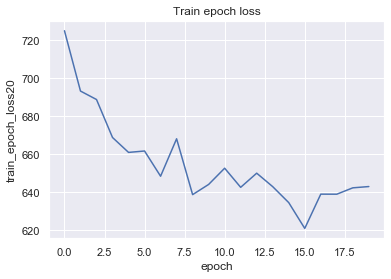

In [93]:
sns.set(style='darkgrid')
sns.lineplot(y='train_epoch_loss20', x = 'epoch', data=results2).set_title('Train epoch loss')

Text(0.5, 1.0, 'Val epoch loss')

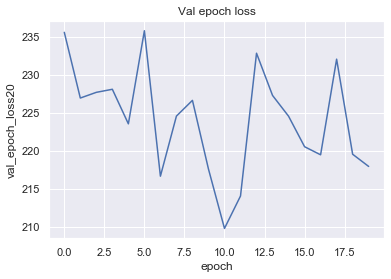

In [94]:
sns.set(style='darkgrid')
sns.lineplot(y='val_epoch_loss20', x = 'epoch', data=results2).set_title('Val epoch loss')

### Run the model with epoch = 10, learning rate = 1*e-5, model saved as 'saved_model_5_lr.pt'

In [105]:
%%time
train_loss_per_iter3, train_epoch_loss3, val_loss_per_iter3, val_epoch_loss3, val_epoch_acc3 = \
train_model(train_loader, val_loader)

epoch:  0
minibatch:  0  out of  1165
loss:  tensor(0.6590, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1  out of  1165
loss:  tensor(0.5467, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  2  out of  1165
loss:  tensor(0.5905, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  3  out of  1165
loss:  tensor(0.7311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  4  out of  1165
loss:  tensor(0.5729, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  5  out of  1165
loss:  tensor(0.6893, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  6  out of  1165
loss:  tensor(0.6453, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  7  out of  1165
loss:  tensor(0.7142, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  8  out of  1165
loss:  tensor(0.7102, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  9  out of  1165
loss:  tensor(0.6720, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  10  out of  1165
loss:  tensor(0.6942, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  11  out o

loss:  tensor(0.6953, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  93  out of  1165
loss:  tensor(0.6463, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  94  out of  1165
loss:  tensor(0.6365, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  95  out of  1165
loss:  tensor(0.6219, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  96  out of  1165
loss:  tensor(0.5804, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  97  out of  1165
loss:  tensor(0.8621, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  98  out of  1165
loss:  tensor(0.5707, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  99  out of  1165
loss:  tensor(0.5819, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  100  out of  1165
loss:  tensor(0.7609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  101  out of  1165
loss:  tensor(0.6211, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  102  out of  1165
loss:  tensor(0.5696, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  103  out of  1165
loss:  tensor(0.5

loss:  tensor(0.4827, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  185  out of  1165
loss:  tensor(0.4972, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  186  out of  1165
loss:  tensor(0.4934, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  187  out of  1165
loss:  tensor(0.4963, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  188  out of  1165
loss:  tensor(0.6464, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  189  out of  1165
loss:  tensor(0.5927, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  190  out of  1165
loss:  tensor(0.6311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  191  out of  1165
loss:  tensor(0.6541, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  192  out of  1165
loss:  tensor(0.9655, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  193  out of  1165
loss:  tensor(0.6754, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  194  out of  1165
loss:  tensor(0.4915, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  195  out of  1165
loss:  ten

loss:  tensor(0.4813, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  277  out of  1165
loss:  tensor(0.7151, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  278  out of  1165
loss:  tensor(0.7183, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  279  out of  1165
loss:  tensor(0.6887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  280  out of  1165
loss:  tensor(0.4689, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  281  out of  1165
loss:  tensor(0.4690, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  282  out of  1165
loss:  tensor(0.4621, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  283  out of  1165
loss:  tensor(0.9879, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  284  out of  1165
loss:  tensor(0.4614, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  285  out of  1165
loss:  tensor(0.4660, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  286  out of  1165
loss:  tensor(0.4642, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  287  out of  1165
loss:  ten

loss:  tensor(0.6419, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  369  out of  1165
loss:  tensor(0.4600, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  370  out of  1165
loss:  tensor(0.4794, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  371  out of  1165
loss:  tensor(0.6571, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  372  out of  1165
loss:  tensor(0.9966, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  373  out of  1165
loss:  tensor(0.6741, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  374  out of  1165
loss:  tensor(0.4666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  375  out of  1165
loss:  tensor(0.6712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  376  out of  1165
loss:  tensor(0.6273, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  377  out of  1165
loss:  tensor(0.6553, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  378  out of  1165
loss:  tensor(0.6303, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  379  out of  1165
loss:  ten

loss:  tensor(0.4813, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  461  out of  1165
loss:  tensor(0.4803, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  462  out of  1165
loss:  tensor(0.4722, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  463  out of  1165
loss:  tensor(0.6989, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  464  out of  1165
loss:  tensor(0.4778, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  465  out of  1165
loss:  tensor(0.7486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  466  out of  1165
loss:  tensor(0.6164, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  467  out of  1165
loss:  tensor(0.9225, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  468  out of  1165
loss:  tensor(0.9889, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  469  out of  1165
loss:  tensor(0.9891, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  470  out of  1165
loss:  tensor(0.7140, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  471  out of  1165
loss:  ten

loss:  tensor(1.0359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  553  out of  1165
loss:  tensor(0.4441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  554  out of  1165
loss:  tensor(0.4516, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  555  out of  1165
loss:  tensor(0.4502, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  556  out of  1165
loss:  tensor(0.6719, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  557  out of  1165
loss:  tensor(0.4543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  558  out of  1165
loss:  tensor(0.4568, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  559  out of  1165
loss:  tensor(0.4545, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  560  out of  1165
loss:  tensor(0.7346, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  561  out of  1165
loss:  tensor(0.7443, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  562  out of  1165
loss:  tensor(0.4444, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  563  out of  1165
loss:  ten

loss:  tensor(0.4596, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  645  out of  1165
loss:  tensor(0.7705, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  646  out of  1165
loss:  tensor(0.4567, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  647  out of  1165
loss:  tensor(0.4756, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  648  out of  1165
loss:  tensor(0.6960, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  649  out of  1165
loss:  tensor(0.4730, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  650  out of  1165
loss:  tensor(0.7132, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  651  out of  1165
loss:  tensor(0.7334, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  652  out of  1165
loss:  tensor(0.9995, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  653  out of  1165
loss:  tensor(0.7475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  654  out of  1165
loss:  tensor(0.6414, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  655  out of  1165
loss:  ten

loss:  tensor(0.7971, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  737  out of  1165
loss:  tensor(0.4531, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  738  out of  1165
loss:  tensor(0.4675, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  739  out of  1165
loss:  tensor(0.4596, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  740  out of  1165
loss:  tensor(0.7217, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  741  out of  1165
loss:  tensor(0.7680, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  742  out of  1165
loss:  tensor(0.4632, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  743  out of  1165
loss:  tensor(1.0384, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  744  out of  1165
loss:  tensor(0.6108, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  745  out of  1165
loss:  tensor(0.6580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  746  out of  1165
loss:  tensor(0.4628, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  747  out of  1165
loss:  ten

loss:  tensor(0.4637, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  829  out of  1165
loss:  tensor(0.8379, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  830  out of  1165
loss:  tensor(0.4691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  831  out of  1165
loss:  tensor(0.7496, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  832  out of  1165
loss:  tensor(0.4622, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  833  out of  1165
loss:  tensor(0.4569, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  834  out of  1165
loss:  tensor(0.4584, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  835  out of  1165
loss:  tensor(1.0144, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  836  out of  1165
loss:  tensor(0.4697, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  837  out of  1165
loss:  tensor(0.6616, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  838  out of  1165
loss:  tensor(0.4613, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  839  out of  1165
loss:  ten

loss:  tensor(0.4425, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  921  out of  1165
loss:  tensor(0.4407, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  922  out of  1165
loss:  tensor(0.6074, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  923  out of  1165
loss:  tensor(1.0466, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  924  out of  1165
loss:  tensor(0.4392, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  925  out of  1165
loss:  tensor(0.7724, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  926  out of  1165
loss:  tensor(0.4208, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  927  out of  1165
loss:  tensor(0.7895, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  928  out of  1165
loss:  tensor(1.0417, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  929  out of  1165
loss:  tensor(0.4434, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  930  out of  1165
loss:  tensor(0.7729, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  931  out of  1165
loss:  ten

loss:  tensor(0.4530, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1012  out of  1165
loss:  tensor(0.4525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1013  out of  1165
loss:  tensor(0.5763, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1014  out of  1165
loss:  tensor(1.0240, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1015  out of  1165
loss:  tensor(0.9970, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1016  out of  1165
loss:  tensor(0.5823, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1017  out of  1165
loss:  tensor(1.0115, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1018  out of  1165
loss:  tensor(0.4634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1019  out of  1165
loss:  tensor(0.4503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1020  out of  1165
loss:  tensor(0.4598, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1021  out of  1165
loss:  tensor(0.4446, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1022  out of  1165

loss:  tensor(0.7314, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1103  out of  1165
loss:  tensor(0.4634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1104  out of  1165
loss:  tensor(0.5977, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1105  out of  1165
loss:  tensor(0.4381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1106  out of  1165
loss:  tensor(0.8668, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1107  out of  1165
loss:  tensor(0.7658, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1108  out of  1165
loss:  tensor(0.7441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1109  out of  1165
loss:  tensor(0.6671, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1110  out of  1165
loss:  tensor(0.4489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1111  out of  1165
loss:  tensor(0.4453, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1112  out of  1165
loss:  tensor(0.6711, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1113  out of  1165

loss:  tensor(1.0528, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  29  out of  1165
loss:  tensor(0.4483, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  30  out of  1165
loss:  tensor(0.7524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  31  out of  1165
loss:  tensor(0.4443, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  32  out of  1165
loss:  tensor(0.4339, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  33  out of  1165
loss:  tensor(1.0221, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  34  out of  1165
loss:  tensor(0.6924, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  35  out of  1165
loss:  tensor(0.4469, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  36  out of  1165
loss:  tensor(0.4351, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  37  out of  1165
loss:  tensor(0.7250, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  38  out of  1165
loss:  tensor(0.7080, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  39  out of  1165
loss:  tensor(0.4423,

loss:  tensor(0.4417, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  121  out of  1165
loss:  tensor(0.6935, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  122  out of  1165
loss:  tensor(0.4244, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  123  out of  1165
loss:  tensor(1.0673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  124  out of  1165
loss:  tensor(1.0340, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  125  out of  1165
loss:  tensor(1.0785, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  126  out of  1165
loss:  tensor(0.4275, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  127  out of  1165
loss:  tensor(0.4192, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  128  out of  1165
loss:  tensor(0.4339, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  129  out of  1165
loss:  tensor(0.4219, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  130  out of  1165
loss:  tensor(0.6508, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  131  out of  1165
loss:  ten

loss:  tensor(0.6332, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  213  out of  1165
loss:  tensor(0.4328, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  214  out of  1165
loss:  tensor(0.4498, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  215  out of  1165
loss:  tensor(0.4550, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  216  out of  1165
loss:  tensor(0.6615, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  217  out of  1165
loss:  tensor(0.4413, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  218  out of  1165
loss:  tensor(0.4734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  219  out of  1165
loss:  tensor(0.7143, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  220  out of  1165
loss:  tensor(1.0656, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  221  out of  1165
loss:  tensor(0.6821, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  222  out of  1165
loss:  tensor(0.6137, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  223  out of  1165
loss:  ten

loss:  tensor(0.4916, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  305  out of  1165
loss:  tensor(0.6774, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  306  out of  1165
loss:  tensor(0.4665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  307  out of  1165
loss:  tensor(0.5961, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  308  out of  1165
loss:  tensor(0.6634, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  309  out of  1165
loss:  tensor(0.4818, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  310  out of  1165
loss:  tensor(0.4890, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  311  out of  1165
loss:  tensor(0.4733, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  312  out of  1165
loss:  tensor(0.7336, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  313  out of  1165
loss:  tensor(0.7104, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  314  out of  1165
loss:  tensor(0.6740, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  315  out of  1165
loss:  ten

loss:  tensor(0.4641, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  397  out of  1165
loss:  tensor(0.4671, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  398  out of  1165
loss:  tensor(0.7262, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  399  out of  1165
loss:  tensor(0.7200, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  400  out of  1165
loss:  tensor(0.4583, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  401  out of  1165
loss:  tensor(1.0047, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  402  out of  1165
loss:  tensor(0.4646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  403  out of  1165
loss:  tensor(0.6106, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  404  out of  1165
loss:  tensor(1.0161, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  405  out of  1165
loss:  tensor(0.8014, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  406  out of  1165
loss:  tensor(1.0106, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  407  out of  1165
loss:  ten

loss:  tensor(0.6075, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  489  out of  1165
loss:  tensor(0.6743, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  490  out of  1165
loss:  tensor(0.4471, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  491  out of  1165
loss:  tensor(1.0514, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  492  out of  1165
loss:  tensor(0.6947, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  493  out of  1165
loss:  tensor(0.7868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  494  out of  1165
loss:  tensor(0.7666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  495  out of  1165
loss:  tensor(0.4226, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  496  out of  1165
loss:  tensor(0.4263, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  497  out of  1165
loss:  tensor(0.4372, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  498  out of  1165
loss:  tensor(0.6384, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  499  out of  1165
loss:  ten

loss:  tensor(0.8044, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  581  out of  1165
loss:  tensor(1.0580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  582  out of  1165
loss:  tensor(0.6424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  583  out of  1165
loss:  tensor(0.7774, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  584  out of  1165
loss:  tensor(0.4538, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  585  out of  1165
loss:  tensor(0.4489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  586  out of  1165
loss:  tensor(0.4422, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  587  out of  1165
loss:  tensor(0.4604, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  588  out of  1165
loss:  tensor(0.6015, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  589  out of  1165
loss:  tensor(0.6294, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  590  out of  1165
loss:  tensor(0.4513, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  591  out of  1165
loss:  ten

loss:  tensor(0.6389, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  673  out of  1165
loss:  tensor(0.9387, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  674  out of  1165
loss:  tensor(0.7049, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  675  out of  1165
loss:  tensor(0.6665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  676  out of  1165
loss:  tensor(0.6258, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  677  out of  1165
loss:  tensor(0.6536, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  678  out of  1165
loss:  tensor(0.5013, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  679  out of  1165
loss:  tensor(0.6669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  680  out of  1165
loss:  tensor(0.6103, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  681  out of  1165
loss:  tensor(0.6555, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  682  out of  1165
loss:  tensor(0.9193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  683  out of  1165
loss:  ten

loss:  tensor(0.7012, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  765  out of  1165
loss:  tensor(0.6688, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  766  out of  1165
loss:  tensor(0.6185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  767  out of  1165
loss:  tensor(0.6101, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  768  out of  1165
loss:  tensor(0.4461, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  769  out of  1165
loss:  tensor(0.7316, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  770  out of  1165
loss:  tensor(0.6301, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  771  out of  1165
loss:  tensor(1.0176, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  772  out of  1165
loss:  tensor(0.6445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  773  out of  1165
loss:  tensor(0.6606, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  774  out of  1165
loss:  tensor(0.6328, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  775  out of  1165
loss:  ten

loss:  tensor(0.4208, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  857  out of  1165
loss:  tensor(0.4258, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  858  out of  1165
loss:  tensor(1.0667, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  859  out of  1165
loss:  tensor(0.7411, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  860  out of  1165
loss:  tensor(0.7762, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  861  out of  1165
loss:  tensor(1.0747, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  862  out of  1165
loss:  tensor(1.0934, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  863  out of  1165
loss:  tensor(0.6469, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  864  out of  1165
loss:  tensor(0.4251, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  865  out of  1165
loss:  tensor(1.0802, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  866  out of  1165
loss:  tensor(0.7276, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  867  out of  1165
loss:  ten

loss:  tensor(0.7334, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  949  out of  1165
loss:  tensor(0.6460, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  950  out of  1165
loss:  tensor(0.4198, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  951  out of  1165
loss:  tensor(1.0667, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  952  out of  1165
loss:  tensor(0.4260, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  953  out of  1165
loss:  tensor(0.4401, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  954  out of  1165
loss:  tensor(0.7193, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  955  out of  1165
loss:  tensor(0.4393, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  956  out of  1165
loss:  tensor(0.4521, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  957  out of  1165
loss:  tensor(0.4319, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  958  out of  1165
loss:  tensor(0.8016, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  959  out of  1165
loss:  ten

loss:  tensor(0.6281, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1040  out of  1165
loss:  tensor(0.4378, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1041  out of  1165
loss:  tensor(0.6808, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1042  out of  1165
loss:  tensor(0.4303, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1043  out of  1165
loss:  tensor(0.4461, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1044  out of  1165
loss:  tensor(0.8863, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1045  out of  1165
loss:  tensor(0.4176, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1046  out of  1165
loss:  tensor(0.4442, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1047  out of  1165
loss:  tensor(0.7163, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1048  out of  1165
loss:  tensor(0.5884, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1049  out of  1165
loss:  tensor(0.6438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1050  out of  1165

loss:  tensor(0.5916, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1131  out of  1165
loss:  tensor(0.4149, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1132  out of  1165
loss:  tensor(0.4092, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1133  out of  1165
loss:  tensor(0.4191, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1134  out of  1165
loss:  tensor(0.5930, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1135  out of  1165
loss:  tensor(0.6652, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1136  out of  1165
loss:  tensor(0.7250, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1137  out of  1165
loss:  tensor(0.4000, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1138  out of  1165
loss:  tensor(0.4068, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1139  out of  1165
loss:  tensor(0.4171, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1140  out of  1165
loss:  tensor(0.6172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1141  out of  1165

loss:  tensor(0.5993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  58  out of  1165
loss:  tensor(0.7781, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  59  out of  1165
loss:  tensor(0.6615, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  60  out of  1165
loss:  tensor(1.1613, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  61  out of  1165
loss:  tensor(0.3847, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  62  out of  1165
loss:  tensor(0.7590, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  63  out of  1165
loss:  tensor(1.1621, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  64  out of  1165
loss:  tensor(0.7411, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  65  out of  1165
loss:  tensor(0.3908, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  66  out of  1165
loss:  tensor(0.7427, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  67  out of  1165
loss:  tensor(0.6002, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  68  out of  1165
loss:  tensor(0.3881,

loss:  tensor(0.7605, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  150  out of  1165
loss:  tensor(0.4322, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  151  out of  1165
loss:  tensor(1.0684, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  152  out of  1165
loss:  tensor(0.7024, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  153  out of  1165
loss:  tensor(1.0806, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  154  out of  1165
loss:  tensor(0.7263, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  155  out of  1165
loss:  tensor(0.4279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  156  out of  1165
loss:  tensor(0.6704, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  157  out of  1165
loss:  tensor(1.0610, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  158  out of  1165
loss:  tensor(0.4175, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  159  out of  1165
loss:  tensor(0.4398, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  160  out of  1165
loss:  ten

loss:  tensor(0.4227, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  242  out of  1165
loss:  tensor(1.0931, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  243  out of  1165
loss:  tensor(0.6418, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  244  out of  1165
loss:  tensor(1.0806, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  245  out of  1165
loss:  tensor(0.7826, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  246  out of  1165
loss:  tensor(0.7072, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  247  out of  1165
loss:  tensor(0.4142, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  248  out of  1165
loss:  tensor(0.4308, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  249  out of  1165
loss:  tensor(0.4366, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  250  out of  1165
loss:  tensor(0.4321, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  251  out of  1165
loss:  tensor(0.6283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  252  out of  1165
loss:  ten

loss:  tensor(0.7884, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  334  out of  1165
loss:  tensor(0.6463, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  335  out of  1165
loss:  tensor(0.8054, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  336  out of  1165
loss:  tensor(0.6124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  337  out of  1165
loss:  tensor(0.6657, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  338  out of  1165
loss:  tensor(0.4338, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  339  out of  1165
loss:  tensor(0.6802, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  340  out of  1165
loss:  tensor(0.6840, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  341  out of  1165
loss:  tensor(0.6972, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  342  out of  1165
loss:  tensor(1.1043, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  343  out of  1165
loss:  tensor(0.4279, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  344  out of  1165
loss:  ten

loss:  tensor(0.7586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  426  out of  1165
loss:  tensor(0.8282, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  427  out of  1165
loss:  tensor(0.7198, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  428  out of  1165
loss:  tensor(0.4111, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  429  out of  1165
loss:  tensor(0.6012, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  430  out of  1165
loss:  tensor(0.7554, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  431  out of  1165
loss:  tensor(0.4166, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  432  out of  1165
loss:  tensor(0.4097, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  433  out of  1165
loss:  tensor(0.7411, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  434  out of  1165
loss:  tensor(1.1188, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  435  out of  1165
loss:  tensor(1.0824, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  436  out of  1165
loss:  ten

loss:  tensor(0.4247, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  518  out of  1165
loss:  tensor(0.4323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  519  out of  1165
loss:  tensor(0.4142, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  520  out of  1165
loss:  tensor(0.6397, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  521  out of  1165
loss:  tensor(0.4120, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  522  out of  1165
loss:  tensor(0.8433, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  523  out of  1165
loss:  tensor(1.0755, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  524  out of  1165
loss:  tensor(0.4201, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  525  out of  1165
loss:  tensor(0.4172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  526  out of  1165
loss:  tensor(1.0811, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  527  out of  1165
loss:  tensor(0.4234, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  528  out of  1165
loss:  ten

loss:  tensor(0.8302, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  610  out of  1165
loss:  tensor(0.4438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  611  out of  1165
loss:  tensor(0.6646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  612  out of  1165
loss:  tensor(0.6413, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  613  out of  1165
loss:  tensor(0.4489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  614  out of  1165
loss:  tensor(1.0415, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  615  out of  1165
loss:  tensor(0.7813, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  616  out of  1165
loss:  tensor(0.6277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  617  out of  1165
loss:  tensor(0.4405, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  618  out of  1165
loss:  tensor(0.4537, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  619  out of  1165
loss:  tensor(0.4379, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  620  out of  1165
loss:  ten

loss:  tensor(0.6986, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  702  out of  1165
loss:  tensor(0.6472, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  703  out of  1165
loss:  tensor(0.6008, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  704  out of  1165
loss:  tensor(0.4395, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  705  out of  1165
loss:  tensor(0.4344, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  706  out of  1165
loss:  tensor(1.0522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  707  out of  1165
loss:  tensor(1.0438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  708  out of  1165
loss:  tensor(0.7937, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  709  out of  1165
loss:  tensor(0.4217, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  710  out of  1165
loss:  tensor(0.4424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  711  out of  1165
loss:  tensor(0.4428, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  712  out of  1165
loss:  ten

loss:  tensor(0.4698, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  794  out of  1165
loss:  tensor(0.8562, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  795  out of  1165
loss:  tensor(0.4503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  796  out of  1165
loss:  tensor(0.4475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  797  out of  1165
loss:  tensor(0.8381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  798  out of  1165
loss:  tensor(0.6425, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  799  out of  1165
loss:  tensor(0.7280, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  800  out of  1165
loss:  tensor(0.4431, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  801  out of  1165
loss:  tensor(1.0216, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  802  out of  1165
loss:  tensor(1.0558, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  803  out of  1165
loss:  tensor(0.4496, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  804  out of  1165
loss:  ten

loss:  tensor(0.4734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  886  out of  1165
loss:  tensor(0.6666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  887  out of  1165
loss:  tensor(0.6693, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  888  out of  1165
loss:  tensor(0.4603, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  889  out of  1165
loss:  tensor(0.4683, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  890  out of  1165
loss:  tensor(0.5146, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  891  out of  1165
loss:  tensor(0.7116, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  892  out of  1165
loss:  tensor(0.5499, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  893  out of  1165
loss:  tensor(0.7565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  894  out of  1165
loss:  tensor(0.5976, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  895  out of  1165
loss:  tensor(0.6868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  896  out of  1165
loss:  ten

loss:  tensor(0.6516, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  978  out of  1165
loss:  tensor(0.5572, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  979  out of  1165
loss:  tensor(1.0046, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  980  out of  1165
loss:  tensor(0.4580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  981  out of  1165
loss:  tensor(0.4651, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  982  out of  1165
loss:  tensor(0.4690, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  983  out of  1165
loss:  tensor(0.4695, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  984  out of  1165
loss:  tensor(0.4734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  985  out of  1165
loss:  tensor(0.4633, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  986  out of  1165
loss:  tensor(0.7268, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  987  out of  1165
loss:  tensor(1.0057, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  988  out of  1165
loss:  ten

loss:  tensor(0.4402, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1069  out of  1165
loss:  tensor(0.4580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1070  out of  1165
loss:  tensor(0.6300, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1071  out of  1165
loss:  tensor(0.4484, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1072  out of  1165
loss:  tensor(0.7027, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1073  out of  1165
loss:  tensor(0.4344, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1074  out of  1165
loss:  tensor(0.7639, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1075  out of  1165
loss:  tensor(0.6909, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1076  out of  1165
loss:  tensor(0.7377, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1077  out of  1165
loss:  tensor(0.5994, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1078  out of  1165
loss:  tensor(0.8458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1079  out of  1165

loss:  tensor(0.4357, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1160  out of  1165
loss:  tensor(1.0495, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1161  out of  1165
loss:  tensor(0.4651, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1162  out of  1165
loss:  tensor(1.0579, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1163  out of  1165
loss:  tensor(0.4578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1164  out of  1165
loss:  tensor(1.0573, grad_fn=<BinaryCrossEntropyBackward>)
epoch:  3
minibatch:  0  out of  1165
loss:  tensor(0.7783, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1  out of  1165
loss:  tensor(0.6601, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  2  out of  1165
loss:  tensor(0.4522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  3  out of  1165
loss:  tensor(0.6478, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  4  out of  1165
loss:  tensor(0.4453, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  5  out of  1165
loss:  

loss:  tensor(0.4253, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  87  out of  1165
loss:  tensor(0.6867, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  88  out of  1165
loss:  tensor(0.5464, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  89  out of  1165
loss:  tensor(0.6621, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  90  out of  1165
loss:  tensor(0.7762, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  91  out of  1165
loss:  tensor(0.4188, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  92  out of  1165
loss:  tensor(0.4166, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  93  out of  1165
loss:  tensor(0.4212, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  94  out of  1165
loss:  tensor(0.4301, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  95  out of  1165
loss:  tensor(0.4267, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  96  out of  1165
loss:  tensor(0.8049, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  97  out of  1165
loss:  tensor(0.4101,

loss:  tensor(0.4438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  179  out of  1165
loss:  tensor(0.4428, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  180  out of  1165
loss:  tensor(1.0592, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  181  out of  1165
loss:  tensor(0.4261, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  182  out of  1165
loss:  tensor(0.6427, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  183  out of  1165
loss:  tensor(0.4268, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  184  out of  1165
loss:  tensor(0.4200, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  185  out of  1165
loss:  tensor(0.4178, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  186  out of  1165
loss:  tensor(0.4278, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  187  out of  1165
loss:  tensor(0.8022, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  188  out of  1165
loss:  tensor(0.7311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  189  out of  1165
loss:  ten

loss:  tensor(0.6654, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  271  out of  1165
loss:  tensor(0.5382, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  272  out of  1165
loss:  tensor(0.4507, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  273  out of  1165
loss:  tensor(0.7202, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  274  out of  1165
loss:  tensor(1.0361, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  275  out of  1165
loss:  tensor(0.8272, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  276  out of  1165
loss:  tensor(0.6776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  277  out of  1165
loss:  tensor(0.6208, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  278  out of  1165
loss:  tensor(1.0524, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  279  out of  1165
loss:  tensor(1.0488, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  280  out of  1165
loss:  tensor(0.4546, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  281  out of  1165
loss:  ten

loss:  tensor(0.4870, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  363  out of  1165
loss:  tensor(0.8965, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  364  out of  1165
loss:  tensor(1.0099, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  365  out of  1165
loss:  tensor(0.6761, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  366  out of  1165
loss:  tensor(0.6532, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  367  out of  1165
loss:  tensor(0.4748, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  368  out of  1165
loss:  tensor(0.4857, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  369  out of  1165
loss:  tensor(0.7598, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  370  out of  1165
loss:  tensor(0.4642, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  371  out of  1165
loss:  tensor(0.8125, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  372  out of  1165
loss:  tensor(0.4720, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  373  out of  1165
loss:  ten

loss:  tensor(0.6954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  455  out of  1165
loss:  tensor(0.7473, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  456  out of  1165
loss:  tensor(0.4570, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  457  out of  1165
loss:  tensor(0.5654, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  458  out of  1165
loss:  tensor(0.6692, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  459  out of  1165
loss:  tensor(0.6354, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  460  out of  1165
loss:  tensor(1.0525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  461  out of  1165
loss:  tensor(0.4426, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  462  out of  1165
loss:  tensor(0.4404, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  463  out of  1165
loss:  tensor(0.6309, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  464  out of  1165
loss:  tensor(0.4601, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  465  out of  1165
loss:  ten

loss:  tensor(0.4172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  547  out of  1165
loss:  tensor(1.1051, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  548  out of  1165
loss:  tensor(0.6217, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  549  out of  1165
loss:  tensor(0.4192, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  550  out of  1165
loss:  tensor(0.3987, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  551  out of  1165
loss:  tensor(1.1069, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  552  out of  1165
loss:  tensor(0.6374, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  553  out of  1165
loss:  tensor(0.5754, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  554  out of  1165
loss:  tensor(1.0968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  555  out of  1165
loss:  tensor(0.7247, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  556  out of  1165
loss:  tensor(1.0852, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  557  out of  1165
loss:  ten

loss:  tensor(1.0662, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  639  out of  1165
loss:  tensor(0.6458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  640  out of  1165
loss:  tensor(0.7476, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  641  out of  1165
loss:  tensor(0.6064, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  642  out of  1165
loss:  tensor(0.6580, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  643  out of  1165
loss:  tensor(0.5436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  644  out of  1165
loss:  tensor(0.4278, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  645  out of  1165
loss:  tensor(0.4319, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  646  out of  1165
loss:  tensor(0.4321, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  647  out of  1165
loss:  tensor(0.4504, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  648  out of  1165
loss:  tensor(0.7648, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  649  out of  1165
loss:  ten

loss:  tensor(0.4796, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  731  out of  1165
loss:  tensor(0.7495, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  732  out of  1165
loss:  tensor(0.4870, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  733  out of  1165
loss:  tensor(0.6566, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  734  out of  1165
loss:  tensor(0.6605, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  735  out of  1165
loss:  tensor(0.4903, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  736  out of  1165
loss:  tensor(0.6301, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  737  out of  1165
loss:  tensor(0.4704, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  738  out of  1165
loss:  tensor(0.8035, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  739  out of  1165
loss:  tensor(0.9712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  740  out of  1165
loss:  tensor(0.4764, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  741  out of  1165
loss:  ten

loss:  tensor(0.6261, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  823  out of  1165
loss:  tensor(0.6710, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  824  out of  1165
loss:  tensor(0.4371, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  825  out of  1165
loss:  tensor(0.4428, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  826  out of  1165
loss:  tensor(0.4442, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  827  out of  1165
loss:  tensor(0.6515, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  828  out of  1165
loss:  tensor(0.4162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  829  out of  1165
loss:  tensor(0.7173, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  830  out of  1165
loss:  tensor(1.0343, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  831  out of  1165
loss:  tensor(0.4500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  832  out of  1165
loss:  tensor(0.4421, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  833  out of  1165
loss:  ten

loss:  tensor(0.5460, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  915  out of  1165
loss:  tensor(0.6388, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  916  out of  1165
loss:  tensor(0.6166, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  917  out of  1165
loss:  tensor(0.9956, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  918  out of  1165
loss:  tensor(0.6325, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  919  out of  1165
loss:  tensor(0.6986, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  920  out of  1165
loss:  tensor(0.8150, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  921  out of  1165
loss:  tensor(0.6065, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  922  out of  1165
loss:  tensor(0.4691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  923  out of  1165
loss:  tensor(0.4566, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  924  out of  1165
loss:  tensor(0.6413, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  925  out of  1165
loss:  ten

loss:  tensor(0.4584, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1006  out of  1165
loss:  tensor(0.4812, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1007  out of  1165
loss:  tensor(0.4637, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1008  out of  1165
loss:  tensor(0.4842, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1009  out of  1165
loss:  tensor(0.6980, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1010  out of  1165
loss:  tensor(0.5405, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1011  out of  1165
loss:  tensor(0.5574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1012  out of  1165
loss:  tensor(0.4506, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1013  out of  1165
loss:  tensor(0.5565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1014  out of  1165
loss:  tensor(0.4641, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1015  out of  1165
loss:  tensor(0.4466, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1016  out of  1165

loss:  tensor(0.4646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1097  out of  1165
loss:  tensor(1.0302, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1098  out of  1165
loss:  tensor(0.6270, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1099  out of  1165
loss:  tensor(0.7179, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1100  out of  1165
loss:  tensor(0.4370, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1101  out of  1165
loss:  tensor(0.6909, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1102  out of  1165
loss:  tensor(0.6669, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1103  out of  1165
loss:  tensor(0.7361, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1104  out of  1165
loss:  tensor(0.7581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1105  out of  1165
loss:  tensor(0.8103, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1106  out of  1165
loss:  tensor(0.4342, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1107  out of  1165

loss:  tensor(0.5443, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  23  out of  1165
loss:  tensor(0.6529, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  24  out of  1165
loss:  tensor(0.6010, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  25  out of  1165
loss:  tensor(0.4006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  26  out of  1165
loss:  tensor(0.3869, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  27  out of  1165
loss:  tensor(0.4079, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  28  out of  1165
loss:  tensor(1.0738, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  29  out of  1165
loss:  tensor(0.4053, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  30  out of  1165
loss:  tensor(0.6730, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  31  out of  1165
loss:  tensor(0.5910, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  32  out of  1165
loss:  tensor(0.6709, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  33  out of  1165
loss:  tensor(0.7211,

loss:  tensor(0.6102, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  115  out of  1165
loss:  tensor(0.5671, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  116  out of  1165
loss:  tensor(0.4170, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  117  out of  1165
loss:  tensor(0.6928, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  118  out of  1165
loss:  tensor(0.5838, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  119  out of  1165
loss:  tensor(0.7341, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  120  out of  1165
loss:  tensor(0.4256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  121  out of  1165
loss:  tensor(0.6128, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  122  out of  1165
loss:  tensor(0.4223, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  123  out of  1165
loss:  tensor(0.6189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  124  out of  1165
loss:  tensor(0.7147, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  125  out of  1165
loss:  ten

loss:  tensor(0.5901, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  207  out of  1165
loss:  tensor(0.7044, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  208  out of  1165
loss:  tensor(0.6794, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  209  out of  1165
loss:  tensor(0.7071, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  210  out of  1165
loss:  tensor(0.6763, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  211  out of  1165
loss:  tensor(0.6311, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  212  out of  1165
loss:  tensor(0.4677, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  213  out of  1165
loss:  tensor(0.4016, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  214  out of  1165
loss:  tensor(0.6737, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  215  out of  1165
loss:  tensor(0.7898, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  216  out of  1165
loss:  tensor(0.8149, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  217  out of  1165
loss:  ten

loss:  tensor(0.4011, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  299  out of  1165
loss:  tensor(0.6663, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  300  out of  1165
loss:  tensor(1.1229, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  301  out of  1165
loss:  tensor(1.0974, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  302  out of  1165
loss:  tensor(0.6850, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  303  out of  1165
loss:  tensor(0.6158, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  304  out of  1165
loss:  tensor(0.6638, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  305  out of  1165
loss:  tensor(0.6345, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  306  out of  1165
loss:  tensor(1.1339, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  307  out of  1165
loss:  tensor(0.4071, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  308  out of  1165
loss:  tensor(0.4190, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  309  out of  1165
loss:  ten

loss:  tensor(0.6636, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  391  out of  1165
loss:  tensor(0.9830, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  392  out of  1165
loss:  tensor(0.5710, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  393  out of  1165
loss:  tensor(0.5158, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  394  out of  1165
loss:  tensor(0.6489, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  395  out of  1165
loss:  tensor(0.6675, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  396  out of  1165
loss:  tensor(0.5405, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  397  out of  1165
loss:  tensor(0.4812, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  398  out of  1165
loss:  tensor(0.5207, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  399  out of  1165
loss:  tensor(0.4946, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  400  out of  1165
loss:  tensor(0.6185, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  401  out of  1165
loss:  ten

loss:  tensor(1.0062, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  483  out of  1165
loss:  tensor(0.5423, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  484  out of  1165
loss:  tensor(0.6993, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  485  out of  1165
loss:  tensor(0.4470, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  486  out of  1165
loss:  tensor(0.4720, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  487  out of  1165
loss:  tensor(0.6068, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  488  out of  1165
loss:  tensor(0.4563, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  489  out of  1165
loss:  tensor(0.9425, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  490  out of  1165
loss:  tensor(1.0370, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  491  out of  1165
loss:  tensor(0.5783, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  492  out of  1165
loss:  tensor(0.6164, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  493  out of  1165
loss:  ten

loss:  tensor(0.9958, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  575  out of  1165
loss:  tensor(0.4980, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  576  out of  1165
loss:  tensor(0.4604, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  577  out of  1165
loss:  tensor(0.6179, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  578  out of  1165
loss:  tensor(0.6958, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  579  out of  1165
loss:  tensor(0.4820, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  580  out of  1165
loss:  tensor(1.0115, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  581  out of  1165
loss:  tensor(0.6526, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  582  out of  1165
loss:  tensor(1.0157, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  583  out of  1165
loss:  tensor(0.4883, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  584  out of  1165
loss:  tensor(0.4678, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  585  out of  1165
loss:  ten

loss:  tensor(0.5115, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  667  out of  1165
loss:  tensor(0.4799, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  668  out of  1165
loss:  tensor(0.4767, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  669  out of  1165
loss:  tensor(0.9608, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  670  out of  1165
loss:  tensor(0.4641, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  671  out of  1165
loss:  tensor(0.4959, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  672  out of  1165
loss:  tensor(0.4778, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  673  out of  1165
loss:  tensor(0.5514, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  674  out of  1165
loss:  tensor(0.9833, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  675  out of  1165
loss:  tensor(0.6703, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  676  out of  1165
loss:  tensor(0.4785, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  677  out of  1165
loss:  ten

loss:  tensor(0.6375, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  759  out of  1165
loss:  tensor(0.4477, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  760  out of  1165
loss:  tensor(0.6553, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  761  out of  1165
loss:  tensor(0.4323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  762  out of  1165
loss:  tensor(1.0376, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  763  out of  1165
loss:  tensor(1.0525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  764  out of  1165
loss:  tensor(0.4550, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  765  out of  1165
loss:  tensor(0.4494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  766  out of  1165
loss:  tensor(0.7793, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  767  out of  1165
loss:  tensor(0.4347, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  768  out of  1165
loss:  tensor(1.0540, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  769  out of  1165
loss:  ten

loss:  tensor(0.6576, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  851  out of  1165
loss:  tensor(0.4475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  852  out of  1165
loss:  tensor(0.6148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  853  out of  1165
loss:  tensor(0.8189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  854  out of  1165
loss:  tensor(0.6277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  855  out of  1165
loss:  tensor(0.6724, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  856  out of  1165
loss:  tensor(0.5729, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  857  out of  1165
loss:  tensor(0.6457, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  858  out of  1165
loss:  tensor(0.4459, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  859  out of  1165
loss:  tensor(0.5691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  860  out of  1165
loss:  tensor(1.0025, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  861  out of  1165
loss:  ten

loss:  tensor(0.6543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  943  out of  1165
loss:  tensor(0.7595, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  944  out of  1165
loss:  tensor(0.4560, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  945  out of  1165
loss:  tensor(0.5940, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  946  out of  1165
loss:  tensor(0.5924, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  947  out of  1165
loss:  tensor(0.6473, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  948  out of  1165
loss:  tensor(0.4527, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  949  out of  1165
loss:  tensor(0.6434, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  950  out of  1165
loss:  tensor(0.6527, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  951  out of  1165
loss:  tensor(0.4621, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  952  out of  1165
loss:  tensor(0.4512, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  953  out of  1165
loss:  ten

loss:  tensor(0.5673, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1034  out of  1165
loss:  tensor(0.4169, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1035  out of  1165
loss:  tensor(0.7291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1036  out of  1165
loss:  tensor(0.5907, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1037  out of  1165
loss:  tensor(0.7808, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1038  out of  1165
loss:  tensor(0.8776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1039  out of  1165
loss:  tensor(0.4192, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1040  out of  1165
loss:  tensor(0.4436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1041  out of  1165
loss:  tensor(0.7510, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1042  out of  1165
loss:  tensor(0.4277, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1043  out of  1165
loss:  tensor(0.6117, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1044  out of  1165

loss:  tensor(0.4204, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1125  out of  1165
loss:  tensor(0.6371, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1126  out of  1165
loss:  tensor(1.0517, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1127  out of  1165
loss:  tensor(0.7245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1128  out of  1165
loss:  tensor(1.0760, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1129  out of  1165
loss:  tensor(0.6051, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1130  out of  1165
loss:  tensor(0.4268, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1131  out of  1165
loss:  tensor(0.4180, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1132  out of  1165
loss:  tensor(0.4237, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1133  out of  1165
loss:  tensor(0.4275, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1134  out of  1165
loss:  tensor(0.4097, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1135  out of  1165

loss:  tensor(0.4216, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  52  out of  1165
loss:  tensor(0.3977, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  53  out of  1165
loss:  tensor(1.1006, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  54  out of  1165
loss:  tensor(0.4110, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  55  out of  1165
loss:  tensor(1.1231, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  56  out of  1165
loss:  tensor(0.6667, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  57  out of  1165
loss:  tensor(0.4093, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  58  out of  1165
loss:  tensor(0.4548, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  59  out of  1165
loss:  tensor(0.6027, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  60  out of  1165
loss:  tensor(0.7610, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  61  out of  1165
loss:  tensor(0.6263, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  62  out of  1165
loss:  tensor(0.3994,

loss:  tensor(1.0873, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  144  out of  1165
loss:  tensor(0.5743, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  145  out of  1165
loss:  tensor(0.8062, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  146  out of  1165
loss:  tensor(0.6189, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  147  out of  1165
loss:  tensor(0.6479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  148  out of  1165
loss:  tensor(0.4148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  149  out of  1165
loss:  tensor(0.5343, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  150  out of  1165
loss:  tensor(0.5499, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  151  out of  1165
loss:  tensor(0.5745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  152  out of  1165
loss:  tensor(1.0764, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  153  out of  1165
loss:  tensor(0.4248, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  154  out of  1165
loss:  ten

loss:  tensor(0.4282, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  236  out of  1165
loss:  tensor(0.8522, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  237  out of  1165
loss:  tensor(0.8629, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  238  out of  1165
loss:  tensor(0.4222, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  239  out of  1165
loss:  tensor(0.4313, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  240  out of  1165
loss:  tensor(0.5771, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  241  out of  1165
loss:  tensor(1.0529, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  242  out of  1165
loss:  tensor(0.8174, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  243  out of  1165
loss:  tensor(1.0568, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  244  out of  1165
loss:  tensor(0.7235, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  245  out of  1165
loss:  tensor(0.5354, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  246  out of  1165
loss:  ten

loss:  tensor(0.4472, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  328  out of  1165
loss:  tensor(0.6684, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  329  out of  1165
loss:  tensor(1.0502, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  330  out of  1165
loss:  tensor(0.4486, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  331  out of  1165
loss:  tensor(0.6567, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  332  out of  1165
loss:  tensor(0.4365, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  333  out of  1165
loss:  tensor(0.6439, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  334  out of  1165
loss:  tensor(0.4859, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  335  out of  1165
loss:  tensor(0.4490, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  336  out of  1165
loss:  tensor(0.5954, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  337  out of  1165
loss:  tensor(0.5959, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  338  out of  1165
loss:  ten

loss:  tensor(0.4587, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  420  out of  1165
loss:  tensor(0.7240, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  421  out of  1165
loss:  tensor(0.4409, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  422  out of  1165
loss:  tensor(0.5841, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  423  out of  1165
loss:  tensor(0.4338, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  424  out of  1165
loss:  tensor(0.5631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  425  out of  1165
loss:  tensor(0.4451, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  426  out of  1165
loss:  tensor(0.6879, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  427  out of  1165
loss:  tensor(0.5385, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  428  out of  1165
loss:  tensor(0.4246, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  429  out of  1165
loss:  tensor(0.6131, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  430  out of  1165
loss:  ten

loss:  tensor(1.0854, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  512  out of  1165
loss:  tensor(1.0783, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  513  out of  1165
loss:  tensor(0.6929, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  514  out of  1165
loss:  tensor(0.4324, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  515  out of  1165
loss:  tensor(0.4365, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  516  out of  1165
loss:  tensor(0.5944, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  517  out of  1165
loss:  tensor(0.7503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  518  out of  1165
loss:  tensor(1.0776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  519  out of  1165
loss:  tensor(0.4388, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  520  out of  1165
loss:  tensor(0.5845, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  521  out of  1165
loss:  tensor(0.4303, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  522  out of  1165
loss:  ten

loss:  tensor(0.5480, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  604  out of  1165
loss:  tensor(0.4641, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  605  out of  1165
loss:  tensor(0.4433, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  606  out of  1165
loss:  tensor(0.5750, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  607  out of  1165
loss:  tensor(1.0230, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  608  out of  1165
loss:  tensor(0.4691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  609  out of  1165
loss:  tensor(0.7162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  610  out of  1165
loss:  tensor(0.7251, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  611  out of  1165
loss:  tensor(0.4581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  612  out of  1165
loss:  tensor(0.5729, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  613  out of  1165
loss:  tensor(0.4384, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  614  out of  1165
loss:  ten

loss:  tensor(0.4167, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  696  out of  1165
loss:  tensor(0.4216, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  697  out of  1165
loss:  tensor(0.4322, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  698  out of  1165
loss:  tensor(0.4206, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  699  out of  1165
loss:  tensor(1.0639, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  700  out of  1165
loss:  tensor(0.5940, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  701  out of  1165
loss:  tensor(0.4117, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  702  out of  1165
loss:  tensor(0.7779, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  703  out of  1165
loss:  tensor(0.4128, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  704  out of  1165
loss:  tensor(0.6292, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  705  out of  1165
loss:  tensor(0.6992, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  706  out of  1165
loss:  ten

loss:  tensor(1.1041, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  788  out of  1165
loss:  tensor(0.6170, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  789  out of  1165
loss:  tensor(0.4162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  790  out of  1165
loss:  tensor(0.4008, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  791  out of  1165
loss:  tensor(0.6423, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  792  out of  1165
loss:  tensor(0.4162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  793  out of  1165
loss:  tensor(0.4137, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  794  out of  1165
loss:  tensor(0.6461, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  795  out of  1165
loss:  tensor(1.0646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  796  out of  1165
loss:  tensor(0.7520, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  797  out of  1165
loss:  tensor(0.5879, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  798  out of  1165
loss:  ten

loss:  tensor(0.5591, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  880  out of  1165
loss:  tensor(0.4452, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  881  out of  1165
loss:  tensor(0.6086, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  882  out of  1165
loss:  tensor(0.4360, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  883  out of  1165
loss:  tensor(0.6935, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  884  out of  1165
loss:  tensor(0.4371, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  885  out of  1165
loss:  tensor(0.6458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  886  out of  1165
loss:  tensor(0.4407, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  887  out of  1165
loss:  tensor(0.4319, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  888  out of  1165
loss:  tensor(0.5364, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  889  out of  1165
loss:  tensor(0.6639, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  890  out of  1165
loss:  ten

loss:  tensor(1.0814, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  972  out of  1165
loss:  tensor(0.4291, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  973  out of  1165
loss:  tensor(0.4324, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  974  out of  1165
loss:  tensor(0.5754, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  975  out of  1165
loss:  tensor(0.6989, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  976  out of  1165
loss:  tensor(0.8062, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  977  out of  1165
loss:  tensor(0.5880, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  978  out of  1165
loss:  tensor(0.7652, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  979  out of  1165
loss:  tensor(0.4396, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  980  out of  1165
loss:  tensor(0.4344, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  981  out of  1165
loss:  tensor(0.4231, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  982  out of  1165
loss:  ten

loss:  tensor(0.4882, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1063  out of  1165
loss:  tensor(0.5919, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1064  out of  1165
loss:  tensor(0.4641, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1065  out of  1165
loss:  tensor(0.5880, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1066  out of  1165
loss:  tensor(0.6479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1067  out of  1165
loss:  tensor(0.4432, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1068  out of  1165
loss:  tensor(0.5419, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1069  out of  1165
loss:  tensor(0.6008, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1070  out of  1165
loss:  tensor(1.0153, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1071  out of  1165
loss:  tensor(0.7325, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1072  out of  1165
loss:  tensor(0.4472, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1073  out of  1165

loss:  tensor(0.5531, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1154  out of  1165
loss:  tensor(0.7574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1155  out of  1165
loss:  tensor(0.6078, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1156  out of  1165
loss:  tensor(0.4631, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1157  out of  1165
loss:  tensor(0.5600, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1158  out of  1165
loss:  tensor(0.6589, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1159  out of  1165
loss:  tensor(0.7584, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1160  out of  1165
loss:  tensor(0.4715, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1161  out of  1165
loss:  tensor(0.7871, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1162  out of  1165
loss:  tensor(0.6951, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1163  out of  1165
loss:  tensor(1.0196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1164  out of  1165

loss:  tensor(0.7112, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  81  out of  1165
loss:  tensor(0.4716, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  82  out of  1165
loss:  tensor(0.4741, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  83  out of  1165
loss:  tensor(0.4810, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  84  out of  1165
loss:  tensor(0.4586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  85  out of  1165
loss:  tensor(0.4666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  86  out of  1165
loss:  tensor(0.4670, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  87  out of  1165
loss:  tensor(1.0172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  88  out of  1165
loss:  tensor(1.0035, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  89  out of  1165
loss:  tensor(0.4610, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  90  out of  1165
loss:  tensor(0.6826, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  91  out of  1165
loss:  tensor(0.4996,

loss:  tensor(0.4427, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  173  out of  1165
loss:  tensor(0.6429, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  174  out of  1165
loss:  tensor(0.6997, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  175  out of  1165
loss:  tensor(0.7500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  176  out of  1165
loss:  tensor(1.0478, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  177  out of  1165
loss:  tensor(0.5473, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  178  out of  1165
loss:  tensor(0.7734, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  179  out of  1165
loss:  tensor(0.4250, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  180  out of  1165
loss:  tensor(0.6665, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  181  out of  1165
loss:  tensor(0.5643, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  182  out of  1165
loss:  tensor(0.4304, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  183  out of  1165
loss:  ten

loss:  tensor(1.0151, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  265  out of  1165
loss:  tensor(0.6529, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  266  out of  1165
loss:  tensor(0.4445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  267  out of  1165
loss:  tensor(0.7249, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  268  out of  1165
loss:  tensor(0.5045, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  269  out of  1165
loss:  tensor(0.4467, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  270  out of  1165
loss:  tensor(0.4303, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  271  out of  1165
loss:  tensor(1.0648, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  272  out of  1165
loss:  tensor(0.8124, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  273  out of  1165
loss:  tensor(0.5048, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  274  out of  1165
loss:  tensor(0.6722, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  275  out of  1165
loss:  ten

loss:  tensor(0.7069, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  357  out of  1165
loss:  tensor(0.5762, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  358  out of  1165
loss:  tensor(0.8243, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  359  out of  1165
loss:  tensor(0.3929, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  360  out of  1165
loss:  tensor(0.7040, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  361  out of  1165
loss:  tensor(0.4172, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  362  out of  1165
loss:  tensor(0.6380, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  363  out of  1165
loss:  tensor(0.4030, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  364  out of  1165
loss:  tensor(0.6898, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  365  out of  1165
loss:  tensor(0.7895, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  366  out of  1165
loss:  tensor(0.8914, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  367  out of  1165
loss:  ten

loss:  tensor(0.5290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  449  out of  1165
loss:  tensor(0.5723, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  450  out of  1165
loss:  tensor(0.4201, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  451  out of  1165
loss:  tensor(0.3965, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  452  out of  1165
loss:  tensor(0.4021, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  453  out of  1165
loss:  tensor(0.5806, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  454  out of  1165
loss:  tensor(0.3997, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  455  out of  1165
loss:  tensor(0.4785, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  456  out of  1165
loss:  tensor(0.6107, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  457  out of  1165
loss:  tensor(0.5950, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  458  out of  1165
loss:  tensor(0.4013, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  459  out of  1165
loss:  ten

loss:  tensor(0.4199, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  541  out of  1165
loss:  tensor(0.4226, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  542  out of  1165
loss:  tensor(1.0405, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  543  out of  1165
loss:  tensor(0.6845, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  544  out of  1165
loss:  tensor(1.0678, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  545  out of  1165
loss:  tensor(1.0674, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  546  out of  1165
loss:  tensor(0.6160, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  547  out of  1165
loss:  tensor(0.4239, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  548  out of  1165
loss:  tensor(1.0578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  549  out of  1165
loss:  tensor(0.4377, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  550  out of  1165
loss:  tensor(0.4317, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  551  out of  1165
loss:  ten

loss:  tensor(0.4447, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  633  out of  1165
loss:  tensor(0.4445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  634  out of  1165
loss:  tensor(0.4532, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  635  out of  1165
loss:  tensor(0.4568, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  636  out of  1165
loss:  tensor(0.4717, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  637  out of  1165
loss:  tensor(0.4321, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  638  out of  1165
loss:  tensor(0.4371, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  639  out of  1165
loss:  tensor(0.4354, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  640  out of  1165
loss:  tensor(0.4552, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  641  out of  1165
loss:  tensor(0.4219, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  642  out of  1165
loss:  tensor(0.4099, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  643  out of  1165
loss:  ten

loss:  tensor(0.5306, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  725  out of  1165
loss:  tensor(0.4490, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  726  out of  1165
loss:  tensor(0.5054, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  727  out of  1165
loss:  tensor(0.5724, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  728  out of  1165
loss:  tensor(0.8088, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  729  out of  1165
loss:  tensor(0.6128, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  730  out of  1165
loss:  tensor(0.8401, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  731  out of  1165
loss:  tensor(1.0050, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  732  out of  1165
loss:  tensor(0.5245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  733  out of  1165
loss:  tensor(0.4685, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  734  out of  1165
loss:  tensor(0.4745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  735  out of  1165
loss:  ten

loss:  tensor(1.0101, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  817  out of  1165
loss:  tensor(0.4705, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  818  out of  1165
loss:  tensor(0.4724, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  819  out of  1165
loss:  tensor(0.7155, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  820  out of  1165
loss:  tensor(0.9947, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  821  out of  1165
loss:  tensor(0.4708, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  822  out of  1165
loss:  tensor(0.4637, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  823  out of  1165
loss:  tensor(0.4751, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  824  out of  1165
loss:  tensor(0.6607, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  825  out of  1165
loss:  tensor(0.7046, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  826  out of  1165
loss:  tensor(0.4519, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  827  out of  1165
loss:  ten

loss:  tensor(0.4643, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  909  out of  1165
loss:  tensor(0.5793, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  910  out of  1165
loss:  tensor(0.5544, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  911  out of  1165
loss:  tensor(1.0007, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  912  out of  1165
loss:  tensor(0.5436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  913  out of  1165
loss:  tensor(1.0043, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  914  out of  1165
loss:  tensor(0.4525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  915  out of  1165
loss:  tensor(0.4735, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  916  out of  1165
loss:  tensor(1.0123, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  917  out of  1165
loss:  tensor(0.4550, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  918  out of  1165
loss:  tensor(0.9912, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  919  out of  1165
loss:  ten

loss:  tensor(1.0163, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1001  out of  1165
loss:  tensor(0.5886, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1002  out of  1165
loss:  tensor(0.6627, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1003  out of  1165
loss:  tensor(0.6749, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1004  out of  1165
loss:  tensor(0.9995, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1005  out of  1165
loss:  tensor(0.4574, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1006  out of  1165
loss:  tensor(0.6982, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1007  out of  1165
loss:  tensor(0.4712, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1008  out of  1165
loss:  tensor(0.5063, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1009  out of  1165
loss:  tensor(0.6570, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1010  out of  1165
loss:  tensor(0.6078, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1011  out of  1165

loss:  tensor(0.4346, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1092  out of  1165
loss:  tensor(0.4552, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1093  out of  1165
loss:  tensor(0.5320, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1094  out of  1165
loss:  tensor(0.6863, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1095  out of  1165
loss:  tensor(0.6003, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1096  out of  1165
loss:  tensor(0.7290, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1097  out of  1165
loss:  tensor(0.4545, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1098  out of  1165
loss:  tensor(0.6828, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1099  out of  1165
loss:  tensor(0.6252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1100  out of  1165
loss:  tensor(0.4544, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1101  out of  1165
loss:  tensor(0.6412, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1102  out of  1165

loss:  tensor(0.4479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  18  out of  1165
loss:  tensor(0.5938, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  19  out of  1165
loss:  tensor(0.6732, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  20  out of  1165
loss:  tensor(0.5619, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  21  out of  1165
loss:  tensor(0.4359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  22  out of  1165
loss:  tensor(0.6677, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  23  out of  1165
loss:  tensor(0.4381, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  24  out of  1165
loss:  tensor(0.6221, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  25  out of  1165
loss:  tensor(0.4348, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  26  out of  1165
loss:  tensor(0.6155, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  27  out of  1165
loss:  tensor(0.6465, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  28  out of  1165
loss:  tensor(0.4458,

loss:  tensor(0.5186, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  110  out of  1165
loss:  tensor(1.0692, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  111  out of  1165
loss:  tensor(0.4252, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  112  out of  1165
loss:  tensor(0.5990, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  113  out of  1165
loss:  tensor(0.4507, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  114  out of  1165
loss:  tensor(0.4338, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  115  out of  1165
loss:  tensor(0.6513, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  116  out of  1165
loss:  tensor(1.0455, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  117  out of  1165
loss:  tensor(0.5984, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  118  out of  1165
loss:  tensor(0.4882, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  119  out of  1165
loss:  tensor(1.0312, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  120  out of  1165
loss:  ten

loss:  tensor(0.4400, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  202  out of  1165
loss:  tensor(0.4396, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  203  out of  1165
loss:  tensor(0.5877, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  204  out of  1165
loss:  tensor(1.0283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  205  out of  1165
loss:  tensor(0.4372, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  206  out of  1165
loss:  tensor(0.4364, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  207  out of  1165
loss:  tensor(0.4399, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  208  out of  1165
loss:  tensor(0.4407, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  209  out of  1165
loss:  tensor(0.4637, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  210  out of  1165
loss:  tensor(0.8766, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  211  out of  1165
loss:  tensor(0.4234, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  212  out of  1165
loss:  ten

loss:  tensor(0.5878, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  294  out of  1165
loss:  tensor(0.6026, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  295  out of  1165
loss:  tensor(1.0699, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  296  out of  1165
loss:  tensor(0.4385, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  297  out of  1165
loss:  tensor(0.4238, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  298  out of  1165
loss:  tensor(0.4268, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  299  out of  1165
loss:  tensor(0.4502, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  300  out of  1165
loss:  tensor(0.4416, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  301  out of  1165
loss:  tensor(0.4222, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  302  out of  1165
loss:  tensor(0.8837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  303  out of  1165
loss:  tensor(0.6992, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  304  out of  1165
loss:  ten

loss:  tensor(0.3998, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  386  out of  1165
loss:  tensor(0.6504, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  387  out of  1165
loss:  tensor(1.1386, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  388  out of  1165
loss:  tensor(0.5666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  389  out of  1165
loss:  tensor(0.3980, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  390  out of  1165
loss:  tensor(0.7121, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  391  out of  1165
loss:  tensor(0.5560, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  392  out of  1165
loss:  tensor(1.1525, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  393  out of  1165
loss:  tensor(0.4010, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  394  out of  1165
loss:  tensor(1.1342, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  395  out of  1165
loss:  tensor(0.6266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  396  out of  1165
loss:  ten

loss:  tensor(0.5428, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  478  out of  1165
loss:  tensor(0.4520, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  479  out of  1165
loss:  tensor(0.6360, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  480  out of  1165
loss:  tensor(0.4581, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  481  out of  1165
loss:  tensor(1.0761, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  482  out of  1165
loss:  tensor(0.4410, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  483  out of  1165
loss:  tensor(0.5070, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  484  out of  1165
loss:  tensor(0.4548, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  485  out of  1165
loss:  tensor(0.5847, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  486  out of  1165
loss:  tensor(1.0328, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  487  out of  1165
loss:  tensor(0.4602, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  488  out of  1165
loss:  ten

loss:  tensor(0.4447, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  570  out of  1165
loss:  tensor(0.4349, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  571  out of  1165
loss:  tensor(0.7097, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  572  out of  1165
loss:  tensor(0.7472, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  573  out of  1165
loss:  tensor(0.4944, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  574  out of  1165
loss:  tensor(0.4410, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  575  out of  1165
loss:  tensor(0.4399, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  576  out of  1165
loss:  tensor(0.4475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  577  out of  1165
loss:  tensor(0.6874, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  578  out of  1165
loss:  tensor(0.6284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  579  out of  1165
loss:  tensor(1.0622, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  580  out of  1165
loss:  ten

loss:  tensor(0.4643, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  662  out of  1165
loss:  tensor(0.6471, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  663  out of  1165
loss:  tensor(0.6523, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  664  out of  1165
loss:  tensor(0.5610, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  665  out of  1165
loss:  tensor(0.5424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  666  out of  1165
loss:  tensor(0.7090, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  667  out of  1165
loss:  tensor(0.4623, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  668  out of  1165
loss:  tensor(0.4646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  669  out of  1165
loss:  tensor(0.8649, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  670  out of  1165
loss:  tensor(0.5945, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  671  out of  1165
loss:  tensor(0.4616, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  672  out of  1165
loss:  ten

loss:  tensor(0.7094, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  754  out of  1165
loss:  tensor(1.0659, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  755  out of  1165
loss:  tensor(0.4483, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  756  out of  1165
loss:  tensor(0.4317, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  757  out of  1165
loss:  tensor(0.4310, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  758  out of  1165
loss:  tensor(0.4513, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  759  out of  1165
loss:  tensor(0.7795, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  760  out of  1165
loss:  tensor(0.4438, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  761  out of  1165
loss:  tensor(0.6417, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  762  out of  1165
loss:  tensor(0.5849, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  763  out of  1165
loss:  tensor(1.0645, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  764  out of  1165
loss:  ten

loss:  tensor(0.7465, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  846  out of  1165
loss:  tensor(0.4586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  847  out of  1165
loss:  tensor(0.6757, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  848  out of  1165
loss:  tensor(0.6418, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  849  out of  1165
loss:  tensor(0.4732, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  850  out of  1165
loss:  tensor(0.6121, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  851  out of  1165
loss:  tensor(0.4590, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  852  out of  1165
loss:  tensor(0.4701, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  853  out of  1165
loss:  tensor(0.5922, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  854  out of  1165
loss:  tensor(0.4496, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  855  out of  1165
loss:  tensor(0.6646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  856  out of  1165
loss:  ten

loss:  tensor(0.6063, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  938  out of  1165
loss:  tensor(0.4468, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  939  out of  1165
loss:  tensor(0.4746, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  940  out of  1165
loss:  tensor(0.4573, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  941  out of  1165
loss:  tensor(0.4341, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  942  out of  1165
loss:  tensor(0.5025, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  943  out of  1165
loss:  tensor(1.0798, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  944  out of  1165
loss:  tensor(0.5881, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  945  out of  1165
loss:  tensor(0.6622, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  946  out of  1165
loss:  tensor(0.6505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  947  out of  1165
loss:  tensor(0.4477, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  948  out of  1165
loss:  ten

loss:  tensor(1.0715, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1029  out of  1165
loss:  tensor(0.4284, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1030  out of  1165
loss:  tensor(0.6762, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1031  out of  1165
loss:  tensor(0.5162, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1032  out of  1165
loss:  tensor(0.4161, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1033  out of  1165
loss:  tensor(0.4108, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1034  out of  1165
loss:  tensor(0.4065, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1035  out of  1165
loss:  tensor(1.0904, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1036  out of  1165
loss:  tensor(0.4413, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1037  out of  1165
loss:  tensor(1.1080, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1038  out of  1165
loss:  tensor(0.5327, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1039  out of  1165

loss:  tensor(0.4272, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1120  out of  1165
loss:  tensor(0.5841, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1121  out of  1165
loss:  tensor(1.0112, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1122  out of  1165
loss:  tensor(0.4409, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1123  out of  1165
loss:  tensor(0.4478, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1124  out of  1165
loss:  tensor(0.6206, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1125  out of  1165
loss:  tensor(0.4563, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1126  out of  1165
loss:  tensor(0.6606, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1127  out of  1165
loss:  tensor(0.4475, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1128  out of  1165
loss:  tensor(0.7417, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1129  out of  1165
loss:  tensor(0.5586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1130  out of  1165

loss:  tensor(0.8674, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  47  out of  1165
loss:  tensor(0.5617, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  48  out of  1165
loss:  tensor(0.6703, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  49  out of  1165
loss:  tensor(0.6246, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  50  out of  1165
loss:  tensor(0.5925, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  51  out of  1165
loss:  tensor(0.5843, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  52  out of  1165
loss:  tensor(0.4296, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  53  out of  1165
loss:  tensor(1.0622, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  54  out of  1165
loss:  tensor(0.4579, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  55  out of  1165
loss:  tensor(1.0464, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  56  out of  1165
loss:  tensor(0.6974, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  57  out of  1165
loss:  tensor(1.0263,

loss:  tensor(0.5367, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  139  out of  1165
loss:  tensor(1.0043, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  140  out of  1165
loss:  tensor(0.9759, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  141  out of  1165
loss:  tensor(0.4448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  142  out of  1165
loss:  tensor(0.6121, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  143  out of  1165
loss:  tensor(0.6586, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  144  out of  1165
loss:  tensor(0.4871, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  145  out of  1165
loss:  tensor(1.0036, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  146  out of  1165
loss:  tensor(0.6156, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  147  out of  1165
loss:  tensor(0.5404, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  148  out of  1165
loss:  tensor(0.4709, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  149  out of  1165
loss:  ten

loss:  tensor(0.4887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  231  out of  1165
loss:  tensor(0.4463, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  232  out of  1165
loss:  tensor(0.7183, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  233  out of  1165
loss:  tensor(0.4698, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  234  out of  1165
loss:  tensor(0.7661, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  235  out of  1165
loss:  tensor(0.4606, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  236  out of  1165
loss:  tensor(0.4479, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  237  out of  1165
loss:  tensor(0.9868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  238  out of  1165
loss:  tensor(0.4646, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  239  out of  1165
loss:  tensor(0.4815, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  240  out of  1165
loss:  tensor(0.4836, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  241  out of  1165
loss:  ten

loss:  tensor(0.8561, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  323  out of  1165
loss:  tensor(0.7463, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  324  out of  1165
loss:  tensor(1.0400, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  325  out of  1165
loss:  tensor(0.6719, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  326  out of  1165
loss:  tensor(0.4565, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  327  out of  1165
loss:  tensor(0.4536, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  328  out of  1165
loss:  tensor(0.4384, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  329  out of  1165
loss:  tensor(1.0359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  330  out of  1165
loss:  tensor(0.7579, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  331  out of  1165
loss:  tensor(1.0643, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  332  out of  1165
loss:  tensor(0.5536, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  333  out of  1165
loss:  ten

loss:  tensor(1.0237, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  415  out of  1165
loss:  tensor(0.7709, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  416  out of  1165
loss:  tensor(0.6317, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  417  out of  1165
loss:  tensor(0.4890, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  418  out of  1165
loss:  tensor(0.7831, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  419  out of  1165
loss:  tensor(0.8426, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  420  out of  1165
loss:  tensor(0.5788, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  421  out of  1165
loss:  tensor(0.8178, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  422  out of  1165
loss:  tensor(0.6900, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  423  out of  1165
loss:  tensor(1.0271, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  424  out of  1165
loss:  tensor(0.4623, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  425  out of  1165
loss:  ten

loss:  tensor(0.6307, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  507  out of  1165
loss:  tensor(0.3839, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  508  out of  1165
loss:  tensor(0.7653, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  509  out of  1165
loss:  tensor(0.4448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  510  out of  1165
loss:  tensor(1.1315, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  511  out of  1165
loss:  tensor(0.3920, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  512  out of  1165
loss:  tensor(0.4609, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  513  out of  1165
loss:  tensor(0.3968, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  514  out of  1165
loss:  tensor(0.5254, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  515  out of  1165
loss:  tensor(0.4118, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  516  out of  1165
loss:  tensor(0.4256, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  517  out of  1165
loss:  ten

loss:  tensor(0.7097, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  599  out of  1165
loss:  tensor(0.7781, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  600  out of  1165
loss:  tensor(1.1283, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  601  out of  1165
loss:  tensor(0.4196, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  602  out of  1165
loss:  tensor(0.7500, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  603  out of  1165
loss:  tensor(0.4140, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  604  out of  1165
loss:  tensor(0.4218, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  605  out of  1165
loss:  tensor(0.7778, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  606  out of  1165
loss:  tensor(0.6831, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  607  out of  1165
loss:  tensor(0.3977, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  608  out of  1165
loss:  tensor(0.9155, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  609  out of  1165
loss:  ten

loss:  tensor(0.5265, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  691  out of  1165
loss:  tensor(1.1209, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  692  out of  1165
loss:  tensor(1.0938, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  693  out of  1165
loss:  tensor(0.5854, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  694  out of  1165
loss:  tensor(0.6981, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  695  out of  1165
loss:  tensor(0.4941, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  696  out of  1165
loss:  tensor(0.4141, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  697  out of  1165
loss:  tensor(0.5158, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  698  out of  1165
loss:  tensor(0.6774, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  699  out of  1165
loss:  tensor(0.6918, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  700  out of  1165
loss:  tensor(0.4492, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  701  out of  1165
loss:  ten

loss:  tensor(0.5717, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  783  out of  1165
loss:  tensor(0.5800, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  784  out of  1165
loss:  tensor(0.7100, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  785  out of  1165
loss:  tensor(1.0448, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  786  out of  1165
loss:  tensor(0.4765, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  787  out of  1165
loss:  tensor(0.4863, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  788  out of  1165
loss:  tensor(0.6543, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  789  out of  1165
loss:  tensor(0.4218, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  790  out of  1165
loss:  tensor(0.4624, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  791  out of  1165
loss:  tensor(1.0285, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  792  out of  1165
loss:  tensor(1.0783, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  793  out of  1165
loss:  ten

loss:  tensor(0.5996, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  875  out of  1165
loss:  tensor(0.6452, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  876  out of  1165
loss:  tensor(0.4614, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  877  out of  1165
loss:  tensor(0.4550, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  878  out of  1165
loss:  tensor(0.5714, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  879  out of  1165
loss:  tensor(0.4713, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  880  out of  1165
loss:  tensor(0.6326, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  881  out of  1165
loss:  tensor(0.3211, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  882  out of  1165
loss:  tensor(0.4541, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  883  out of  1165
loss:  tensor(0.5156, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  884  out of  1165
loss:  tensor(0.4412, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  885  out of  1165
loss:  ten

loss:  tensor(0.4426, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  967  out of  1165
loss:  tensor(0.7600, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  968  out of  1165
loss:  tensor(0.4345, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  969  out of  1165
loss:  tensor(0.8900, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  970  out of  1165
loss:  tensor(1.0501, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  971  out of  1165
loss:  tensor(0.4746, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  972  out of  1165
loss:  tensor(1.0818, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  973  out of  1165
loss:  tensor(0.6359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  974  out of  1165
loss:  tensor(0.9031, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  975  out of  1165
loss:  tensor(0.4898, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  976  out of  1165
loss:  tensor(0.5359, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  977  out of  1165
loss:  ten

loss:  tensor(0.5853, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1058  out of  1165
loss:  tensor(0.7445, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1059  out of  1165
loss:  tensor(1.0839, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1060  out of  1165
loss:  tensor(0.5738, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1061  out of  1165
loss:  tensor(0.6000, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1062  out of  1165
loss:  tensor(0.4741, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1063  out of  1165
loss:  tensor(1.0451, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1064  out of  1165
loss:  tensor(0.5743, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1065  out of  1165
loss:  tensor(0.5742, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1066  out of  1165
loss:  tensor(1.0547, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1067  out of  1165
loss:  tensor(0.4418, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1068  out of  1165

loss:  tensor(0.5190, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1149  out of  1165
loss:  tensor(0.4424, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1150  out of  1165
loss:  tensor(1.0558, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1151  out of  1165
loss:  tensor(1.0770, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1152  out of  1165
loss:  tensor(0.6679, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1153  out of  1165
loss:  tensor(1.0831, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1154  out of  1165
loss:  tensor(0.5114, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1155  out of  1165
loss:  tensor(0.4713, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1156  out of  1165
loss:  tensor(0.4963, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1157  out of  1165
loss:  tensor(0.4326, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1158  out of  1165
loss:  tensor(0.5243, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1159  out of  1165

loss:  tensor(0.4587, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  76  out of  1165
loss:  tensor(0.4667, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  77  out of  1165
loss:  tensor(0.7946, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  78  out of  1165
loss:  tensor(0.4971, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  79  out of  1165
loss:  tensor(0.4494, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  80  out of  1165
loss:  tensor(0.8697, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  81  out of  1165
loss:  tensor(1.0436, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  82  out of  1165
loss:  tensor(0.6666, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  83  out of  1165
loss:  tensor(0.5979, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  84  out of  1165
loss:  tensor(0.7730, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  85  out of  1165
loss:  tensor(0.5449, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  86  out of  1165
loss:  tensor(0.4674,

loss:  tensor(0.8755, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  168  out of  1165
loss:  tensor(1.0327, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  169  out of  1165
loss:  tensor(0.6090, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  170  out of  1165
loss:  tensor(0.4431, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  171  out of  1165
loss:  tensor(0.4638, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  172  out of  1165
loss:  tensor(1.0246, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  173  out of  1165
loss:  tensor(1.0217, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  174  out of  1165
loss:  tensor(0.4890, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  175  out of  1165
loss:  tensor(0.4503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  176  out of  1165
loss:  tensor(0.7801, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  177  out of  1165
loss:  tensor(0.5201, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  178  out of  1165
loss:  ten

loss:  tensor(0.4795, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  260  out of  1165
loss:  tensor(1.0032, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  261  out of  1165
loss:  tensor(0.6569, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  262  out of  1165
loss:  tensor(0.7624, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  263  out of  1165
loss:  tensor(0.4664, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  264  out of  1165
loss:  tensor(0.4959, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  265  out of  1165
loss:  tensor(0.5289, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  266  out of  1165
loss:  tensor(0.4729, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  267  out of  1165
loss:  tensor(1.0165, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  268  out of  1165
loss:  tensor(0.4512, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  269  out of  1165
loss:  tensor(0.5036, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  270  out of  1165
loss:  ten

loss:  tensor(0.4430, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  352  out of  1165
loss:  tensor(0.4485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  353  out of  1165
loss:  tensor(0.4554, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  354  out of  1165
loss:  tensor(0.4868, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  355  out of  1165
loss:  tensor(0.6437, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  356  out of  1165
loss:  tensor(0.4613, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  357  out of  1165
loss:  tensor(0.4745, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  358  out of  1165
loss:  tensor(1.0458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  359  out of  1165
loss:  tensor(0.4617, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  360  out of  1165
loss:  tensor(0.4508, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  361  out of  1165
loss:  tensor(0.7505, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  362  out of  1165
loss:  ten

loss:  tensor(0.4776, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  444  out of  1165
loss:  tensor(0.4630, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  445  out of  1165
loss:  tensor(0.9820, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  446  out of  1165
loss:  tensor(0.4350, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  447  out of  1165
loss:  tensor(0.6155, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  448  out of  1165
loss:  tensor(0.4639, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  449  out of  1165
loss:  tensor(0.4503, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  450  out of  1165
loss:  tensor(0.4988, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  451  out of  1165
loss:  tensor(0.8177, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  452  out of  1165
loss:  tensor(0.4614, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  453  out of  1165
loss:  tensor(0.7535, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  454  out of  1165
loss:  ten

loss:  tensor(0.7060, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  536  out of  1165
loss:  tensor(1.0328, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  537  out of  1165
loss:  tensor(0.4371, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  538  out of  1165
loss:  tensor(0.4458, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  539  out of  1165
loss:  tensor(0.5223, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  540  out of  1165
loss:  tensor(0.4472, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  541  out of  1165
loss:  tensor(0.4578, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  542  out of  1165
loss:  tensor(0.6916, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  543  out of  1165
loss:  tensor(0.6029, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  544  out of  1165
loss:  tensor(0.5588, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  545  out of  1165
loss:  tensor(0.4387, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  546  out of  1165
loss:  ten

loss:  tensor(0.6111, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  628  out of  1165
loss:  tensor(0.3951, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  629  out of  1165
loss:  tensor(0.3933, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  630  out of  1165
loss:  tensor(0.7884, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  631  out of  1165
loss:  tensor(0.5047, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  632  out of  1165
loss:  tensor(0.3857, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  633  out of  1165
loss:  tensor(1.1900, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  634  out of  1165
loss:  tensor(0.3757, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  635  out of  1165
loss:  tensor(0.3870, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  636  out of  1165
loss:  tensor(0.3879, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  637  out of  1165
loss:  tensor(0.4910, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  638  out of  1165
loss:  ten

loss:  tensor(0.4023, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  720  out of  1165
loss:  tensor(0.3718, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  721  out of  1165
loss:  tensor(0.4917, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  722  out of  1165
loss:  tensor(0.4937, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  723  out of  1165
loss:  tensor(0.5633, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  724  out of  1165
loss:  tensor(0.3847, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  725  out of  1165
loss:  tensor(0.5148, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  726  out of  1165
loss:  tensor(0.3837, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  727  out of  1165
loss:  tensor(0.4091, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  728  out of  1165
loss:  tensor(0.4340, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  729  out of  1165
loss:  tensor(0.4089, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  730  out of  1165
loss:  ten

loss:  tensor(0.4250, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  812  out of  1165
loss:  tensor(0.4350, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  813  out of  1165
loss:  tensor(0.4510, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  814  out of  1165
loss:  tensor(1.1245, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  815  out of  1165
loss:  tensor(0.4276, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  816  out of  1165
loss:  tensor(0.4142, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  817  out of  1165
loss:  tensor(1.1179, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  818  out of  1165
loss:  tensor(0.5371, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  819  out of  1165
loss:  tensor(0.4214, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  820  out of  1165
loss:  tensor(0.5841, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  821  out of  1165
loss:  tensor(0.4118, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  822  out of  1165
loss:  ten

loss:  tensor(0.4271, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  904  out of  1165
loss:  tensor(0.4266, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  905  out of  1165
loss:  tensor(0.4539, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  906  out of  1165
loss:  tensor(0.7143, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  907  out of  1165
loss:  tensor(0.8410, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  908  out of  1165
loss:  tensor(0.4385, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  909  out of  1165
loss:  tensor(0.4441, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  910  out of  1165
loss:  tensor(1.0746, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  911  out of  1165
loss:  tensor(1.0887, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  912  out of  1165
loss:  tensor(0.4485, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  913  out of  1165
loss:  tensor(0.5340, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  914  out of  1165
loss:  ten

loss:  tensor(0.7176, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  996  out of  1165
loss:  tensor(0.4323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  997  out of  1165
loss:  tensor(0.4323, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  998  out of  1165
loss:  tensor(0.9376, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  999  out of  1165
loss:  tensor(0.7874, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1000  out of  1165
loss:  tensor(0.4608, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1001  out of  1165
loss:  tensor(0.4326, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1002  out of  1165
loss:  tensor(1.0791, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1003  out of  1165
loss:  tensor(0.4364, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1004  out of  1165
loss:  tensor(0.5772, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1005  out of  1165
loss:  tensor(0.6047, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1006  out of  1165
los

loss:  tensor(0.4960, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1087  out of  1165
loss:  tensor(0.5396, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1088  out of  1165
loss:  tensor(0.4698, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1089  out of  1165
loss:  tensor(0.9818, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1090  out of  1165
loss:  tensor(0.4842, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1091  out of  1165
loss:  tensor(0.5686, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1092  out of  1165
loss:  tensor(0.4918, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1093  out of  1165
loss:  tensor(0.4653, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1094  out of  1165
loss:  tensor(1.0355, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1095  out of  1165
loss:  tensor(0.4983, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1096  out of  1165
loss:  tensor(0.4691, grad_fn=<BinaryCrossEntropyBackward>)
minibatch:  1097  out of  1165

In [107]:
results3 = pd.DataFrame()
results3['train_epoch_loss3'] = train_epoch_loss3
results3['val_epoch_loss_3'] = val_epoch_loss3
results3['epoch'] = results3.index
results3['train_epoch_loss3'] = results3['train_epoch_loss3'].astype(float)
results3['val_epoch_loss3'] = results3['val_epoch_loss_3'].astype(float)

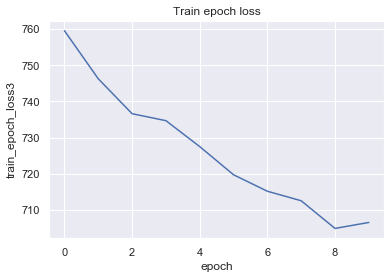

In [176]:
sns.set(style='darkgrid')
r3plot = sns.lineplot(y='train_epoch_loss3', x = 'epoch', data=results3).set_title('Train epoch loss')
fig = r3plot.get_figure()
fig.savefig('figures/train_epoch_loss_10_5.png')

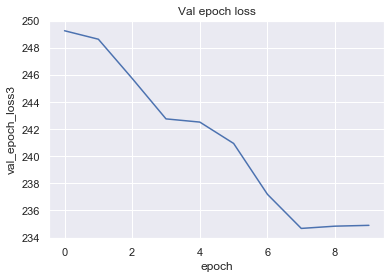

In [177]:
sns.set(style='darkgrid')
r3plot2 = sns.lineplot(y='val_epoch_loss3', x = 'epoch', data=results3).set_title('Val epoch loss')
fig = r3plot.get_figure()
fig.savefig('figures/val_epoch_loss_10_5.png')

### Find the accuracy using the "model_" with epoch = 10, learning rate = 1*e-5

In [132]:
model_ = torch.load('saved_model_5_lr.pt')
model0 = torch.load('saved_model.pt')
model1 = torch.load('saved_model_4_lr.pt')

In [129]:
sum_ = 0

# This for loop is for the validation set data
for  i, (imgs,labels) in enumerate(test_loader):

    labels = labels.view(labels.size(0), 1)
    # Pass one image forward through the cnn
    outputs = model_(imgs)
    rounded_output = torch.round(outputs)
    sum_ += (rounded_output == labels).sum()

print(len(test_loader))
print(sum_)

389
tensor(522)


In [136]:
522/(2*389)

0.6709511568123393

### Finding the accuracy with model0 with epoch = 20, learning rate = 1*e-3

In [133]:
sum0 = 0

# This for loop is for the validation set data
for  i, (imgs,labels) in enumerate(test_loader):

    labels = labels.view(labels.size(0), 1)
    # Pass one image forward through the cnn
    outputs = model0(imgs)
    rounded_output = torch.round(outputs)
    sum0 += (rounded_output == labels).sum()

print(sum0)

tensor(530)


In [150]:
530/(2*len(test_loader))

0.6812339331619537

### Finding the accuracy with "model1" with epoch = 20, learning rate = 1*e-4

In [134]:
sum1 = 0

# This for loop is for the validation set data
for  i, (imgs,labels) in enumerate(test_loader):

    labels = labels.view(labels.size(0), 1)
    # Pass one image forward through the cnn
    outputs = model1(imgs)
    rounded_output = torch.round(outputs)
    sum1 += (rounded_output == labels).sum()

print(sum1)

tensor(573)


In [172]:
573/(2*len(test_loader))

0.7365038560411311

## Creating the confusion matrix

In [155]:
def confusion(prediction, truth):
    vec = prediction / truth
    
    tp = torch.sum(vec==1).item()
    fp = torch.sum(vec==float('inf')).item()
    tn = torch.sum(torch.isnan(vec)).item()
    fn = torch.sum(vec==0).item()

    return tp,fp,tn,fn

In [156]:
fp = 0
fn = 0
tp = 0
tn = 0
sum1 = 0

for  i, (imgs,labels) in enumerate(test_loader):

    labels = labels.view(labels.size(0), 1)
    # Pass one image forward through the cnn
    outputs = model_(imgs)
    rounded_output = torch.round(outputs)
    
    tp_0,fp_0,tn_0,fn_0 = confusion(rounded_output, labels)
    fp += fp_0
    fn += fn_0
    tp += tp_0
    tn += tn_0
        
        
    sum1 += (rounded_output == labels).sum()       
    
print(fp,fn,tp,tn,sum1)

17 234 47 479 tensor(526)


In [158]:
(tn+tp) == sum1

tensor(True)

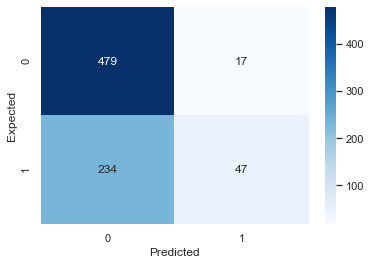

In [171]:
arr = np.array([[tn, fp], [fn, tp]])
conf = sns.heatmap(arr,annot = True,cmap = 'Blues',fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Expected')
fig = conf.get_figure()
fig.savefig('figures/confusion_matrix.png')